In [1]:
import requests
import re

import matplotlib.pyplot as plt
import numpy as np

import html

In [2]:
pwd

'/home/gregmcshane/GUARDIAN'

In [182]:
with open('../imagga_api.txt', 'r') as fp:
    #api_key, api_secret, misc =  
    api_key, api_secret  = fp.read().split('\n')[:2]

In [196]:
import requests

image_url = html.unescape(imgs[5])
image_url = 'https://i.dailymail.co.uk/1s/2020/07/17/15/30806036-8534097-The_apartment_building_where_Saleh_lived_His_dismembered_body_wa-a-13_1594995440321.jpg'
#image_url = 'https://i.guim.co.uk/img/media/c7cd0464b93402cede34dbbc10e988fc747f1bd5/0_0_5472_3283/master/5472.jpg?width=1300&quality=45&auto=format&fit=max&dpr=2&s=6f6b9f603786f49ef6d80f3decda2266'
image_url ='https://i.dailymail.co.uk/1s/2020/07/17/15/30806054-8534097-Detectives_outside_the_building_on_Wednesday_Police_are_yet_to_t-a-15_1594995572773.jpg'

response = requests.get(
    'https://api.imagga.com/v2/tags?image_url=%s' % image_url,
    auth=(api_key, api_secret))

xx = response.json()

In [197]:
xx

{'result': {'tags': [{'confidence': 31.5660228729248, 'tag': {'en': 'man'}},
   {'confidence': 30.6567249298096, 'tag': {'en': 'people'}},
   {'confidence': 29.5381546020508, 'tag': {'en': 'vehicle'}},
   {'confidence': 29.2699279785156, 'tag': {'en': 'machinist'}},
   {'confidence': 29.0129566192627, 'tag': {'en': 'person'}},
   {'confidence': 26.2127132415771, 'tag': {'en': 'car'}},
   {'confidence': 25.0991535186768, 'tag': {'en': 'work'}},
   {'confidence': 23.3939399719238, 'tag': {'en': 'male'}},
   {'confidence': 20.4350547790527, 'tag': {'en': 'worker'}},
   {'confidence': 20.3365364074707, 'tag': {'en': 'job'}},
   {'confidence': 20.0961284637451, 'tag': {'en': 'automobile'}},
   {'confidence': 20.0300674438477, 'tag': {'en': 'business'}},
   {'confidence': 18.8695621490479, 'tag': {'en': 'adult'}},
   {'confidence': 18.7621021270752, 'tag': {'en': 'equipment'}},
   {'confidence': 18.2705917358398, 'tag': {'en': 'engine'}},
   {'confidence': 18.0213603973389, 'tag': {'en': 'me

In [189]:
image_url


'https://i.guim.co.uk/img/media/cab350ff47ef738ac6a952b4d4bfddc2cdd74b32/0_84_6117_3671/master/6117.jpg?width=300&quality=85&auto=format&fit=max&s=d178ceb452a71b05d7da988b957a5c5e'

In [3]:
def get_im(url):

    headers = {  "referrer": "https://www.theguardian.com/international",
      "referrerPolicy": "no-referrer-when-downgrade",
      "method": "GET",
      "mode": "cors"
    }

    return  requests.get(url, headers=headers)

In [4]:
r = requests.get("https://www.theguardian.com/international")
raw = r.content.decode('utf-8')

In [5]:
p_im = re.compile('srcset="(.*?)["|\s]')
#p_im = re.compile('class="responsive-img".*?src="(.*?)"',re.DOTALL)
# this is a cunt - these are sets so take the first element
#imgs = [ x.split(' ')[0] for x in p_im.findall(html) if '/img' in x]
imgs = p_im.findall(raw)

In [6]:
imgs = [ x for x in imgs if 'media' in x]

In [8]:
imgs[:10]
len(imgs)
#[ x  for x in imgs if not p_qq.search(x)]


414

In [10]:
p_qq = re.compile('/img/media/([0-9a-f]+)'  
                  '.*?width=(\d+)'
                  '.*?quality=(\d+)')


mask = [ x[1] == '127' and x[2] == '45' 
        for x in p_qq.findall(' '.join(imgs))  ]

fetch = [html.unescape(x) for x,y  in zip(imgs, mask) if  y]
print('\n'.join(fetch))

https://i.guim.co.uk/img/media/b05318c5e7de08440637a7584949422df34ea9d6/0_241_4000_2400/master/4000.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=ad38a17ae3fa5ed77425806158cdb8a3
https://i.guim.co.uk/img/media/9847d2c5219245b07c73b6f9a69f2f97e26947da/0_217_5008_3005/master/5008.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=2ad249bfc57f8518f11dd063937774ed
https://i.guim.co.uk/img/media/10bbf893354d33c9bbd6a32895c860536dfd2710/0_95_4831_2899/master/4831.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=e6d892dc82d3103df8acce33173eec28
https://i.guim.co.uk/img/media/2d980b0a6a9d01fe4786c1854186adb7f2aa9990/0_291_5482_3289/master/5482.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=d2e42ddee0c81587e7a8c29e31bcfcd2
https://i.guim.co.uk/img/media/2b7850227ca61439652b156dd1db45c640b51844/0_400_6000_3600/master/6000.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=ba327e843a3512162ca065cedbe964d3
https://i.guim.co.uk/img/media/9b81273bee15938063754c0fccc3c77d5a8158c7

In [13]:
pics = [get_im(x).content for x in fetch[:-1] ]

In [12]:
len(fetch)

49

(-0.5, 253.5, 151.5, -0.5)

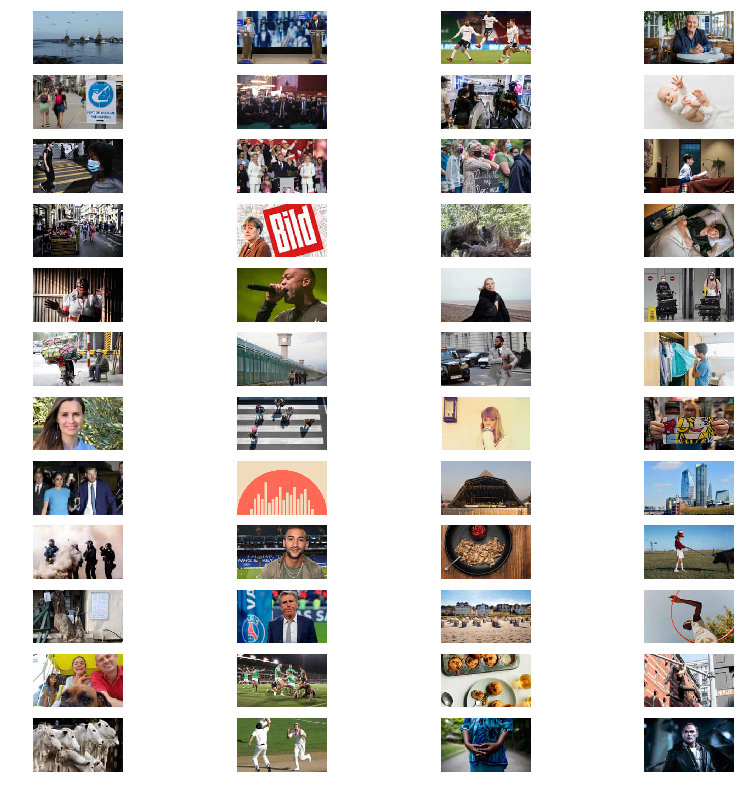

In [18]:
import imageio

fig, axs = plt.subplots(12,4)
[axi.set_axis_off() for axi in axs.ravel()]
fig.set_size_inches(14,14)

for k, x in enumerate(pics):
    fn = '../IMGS/xx%d.jpg'%k
    with open(fn,'wb') as fp:
        fp.write(x)
    im = imageio.imread(fn)
    axs[k % 12 , k // 12].imshow(im )
    
plt.axis('off')


In [195]:
! ./.g


[master 780ec16] web
 1 file changed, 88 insertions(+), 22 deletions(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 4 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.12 KiB | 16.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/macbuse/COVID_stats.git
   e4ccd56..780ec16  master -> master


In [113]:
r = get_im(fetch[0])

I pulled the requests as node.js in Chrome

In [ ]:
fetch("https://www.theguardian.com/international", {
  "headers": {
    "upgrade-insecure-requests": "1"
  },
  "referrer": "https://www.theguardian.com/sport/2020/jul/17/ageing-is-not-fun-tiger-woods-reveals-injury-problems-amid-memorial-struggle",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://assets.guim.co.uk/stylesheets/a12d41be15a7cb81c71723a8c31d0f4d/facia.garnett.css", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://assets.guim.co.uk/polyfill.io/v3/polyfill.min.js?rum=0&features=es6,es7,es2017,default-3.6,HTMLPictureElement,IntersectionObserver,IntersectionObserverEntry,fetch&flags=gated&callback=guardianPolyfilled&unknown=polyfill&clearCache=5", {
  "headers": {
    "accept": "*/*",
    "accept-language": "en-IE,en;q=0.9,fr-FR;q=0.8,fr;q=0.7,zh-CN;q=0.6,zh;q=0.5,en-US;q=0.4,nl;q=0.3",
    "if-modified-since": "Tue, 12 May 2020 13:13:15 GMT",
    "sec-fetch-dest": "script",
    "sec-fetch-mode": "no-cors",
    "sec-fetch-site": "cross-site"
  },
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://assets.guim.co.uk/javascripts/0c9fff7b1dcfc49bd6d3/graun.standard.js", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://assets.guim.co.uk/javascripts/4f9012efee021e41d070/graun.commercial.js", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://assets.guim.co.uk/stylesheets/34c092721cd48ba90dfa205824941d3c/print.css", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://interactive.guim.co.uk/fonts/garnett/GTGuardianTitlepiece-Bold.woff2", {
  "referrer": "",
  "referrerPolicy": "no-referrer",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://interactive.guim.co.uk/fonts/garnett/GTGuardianTitlepiece-Bold.woff", {
  "referrer": "",
  "referrerPolicy": "no-referrer",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://interactive.guim.co.uk/fonts/garnett/GTGuardianTitlepiece-Bold.ttf", {
  "referrer": "",
  "referrerPolicy": "no-referrer",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("data:application/x-font-woff;base64,d09GMgABAAAAAD2UAA4AAAAArGQAAD07AAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG4GBHhyEFgZgAIg0EQgKgalQgYpRC4ZkAAE2AiQDjUQEIAWJCAcgDAcbjZg1eM6Qd3AegMgfb246G1HBxgGgwD3NSIS9YJyMs///c3IyhgONMW2+OogIRJThjAovVdTauVSVO1S7wio77Iz0bZMVIjs0XKJbk4wyCE2rqXqWRI+o4Mdu7oGDhkU9VEQDHuhHL3afIp5wrrOvu+H7Q6Kw83JvfFBw40KNNzY83APd9AiNfZLkwhPPZvZmPiEKK1YxdUhKVk50z11bZ3jebT0UcAIyFL6oKCog7sUQcAAq4GCKKO5VrtU0d8tsmA3zzKyuaWtd2Zj7quta/NNz+OR9M//vbkoDiUmzxrEqFKUQ54Sg9TFUl5Y6jITnFPgJJ+Y55CD/3qMxN7vJI4dceeQLKqVCFPFobWKhIYk0b7jmVfwRU/4pLvb+ntqBHV1TCQaYaDOB2VIM70JK2ALbHipZuAlhzZo1a868eVPTkNRgMDVNCKaEoAwYIe5obm1WwouGNMyv4TI/QiM0SpgUQIAvHtKrHn/+RJsP7M/BY9+qVCqRSiUSiUQilSeRJ/XHfG1BRXgm+IsptW03rnf/Oc0ZaXHGWmBMUsIlnvkjW1nLjrPoMjg9WoVrX88ElPCXdSsd2wAES7cNUBsIBcYunoQg1IJBoATmC+7u721apf/5659bhipriDVXKo2PfZADU0as/r8l+ffvtkZqo9qsIUkDlmzPjqSZrZY05WrDAnt8wCgveVn2LvuIMyCIGCIO8guyTcJLYs4uuiAMMIjuf6cmjeq6w6xjskPXgwVwb0ALcPTlqLak5MZ2xxiPe0pRbDmdA65FAPOxg3esg6AyWp5PT/55NLAD4lpTrLQ5wcmSwac/md5uhnNfveBcrWeotUFA8oPQKFM5IacsZv7WdzfIE2QgiPVoKTn5vjvp/f9Ocu1Cl11HVdXeiogYMWLEiDE3VvR9j7HZ9hG1RA8TFZA7Uv39TCJAgjaiGAz4eL4n6BVfRg6xBgcIl8B7b0GXfxs4BL3FAHFuC4WvdSLxNpgEwIFnJmu5qZJZcgMi/LUzqmeuiXvS00+aKzXPEPnUxILLmCdLfRZd1yZUP1XX0G/NKnZu7QP3CHI0UEp9j/6Iga0j5MnyHq7qJfDXFVklY3KlvTfcvuG5gv53ojKy1x6ELZG55//RFCRIc6QHMjqib8iZLdLIzUhjVGK0xGjO6JMxyVhh3GY8bTwn6NoAE3PjO8afxneRCc6EZaIwGTY5aPLC5JOpvSnfNMFUYVpi2mDaZbpRUzCgPhj5AEUi4EQrF6YSrhzVrlx1p5xnvkb5mi1UbLH+c+oaG7TYioZdpu3W7VTDpS67qsdDV5/nDfu99YEBn2da7ivfWJGhWFwW0i3jioyXcWWm73Qqs4tubeGF25owkYkkSU2WmtxUyjSm06a1q8xy7K6qavvrlG4ONuyWcbgVnyAcYcBGbSn0jug0BG0VCXrAMlQeIk7Di/NDAQneIaYtcGCGIX8UwJyHj3RULytjiR8NdF5S+zQISgEENQAM04+jzl4i5yAAXYge1ZeEomK2KSoDIayRIERDW5vjPfW5PY/eOwH1VjwRXqKA/McGUvF3BIB4DZClyVpjy9jbHIEzMdQ0nPHifBg/ISDBSmK1aS2xhQm2yMJ55iELsOqhL1jUIColzqaJIopx2wtg5w5yp68UAgUBBAk78i3VioEKBdOgh+HtQJasyDNkr1seY72mFMmSsWZsgT1WRUxbZWqhPbUErMFpGwPt6vFKqD31HRerCLxYoQRKoQzKoQIqoQqqoQZqoQ7q3Q0djdAEzdACrbTt8faoA9AJXdDNjXYeWnJPcv2uLga4dD0Av2hL8Xjx8ioiSpJCuQplXYEagACBCxSynsU1zhJK+XcYuATcMApjMA4TMAlT5h9MiwMtK7gDcZ8sK3tukPAAgPx4pKefhnkWK4zEZd0XP6LqK2FIPms3TwqDEI132XBGIAcHPZn3lQ4NV1DBRQDXJuHQTgGQ4QSJEm1ELBnQEXKscAKncNbwHHOBXMIVXMON+xnkgAse+Cjop+aoUoZ4h7mQkFZFWsZavvgkJEGJkGRJRAZuABiiGO4pV7/ZzFVoDQjusM0faL4hhtcxBo9GXjVQowowXkxdVh6nUI8jf4pwRa4VrM+IzAkrQHXIn5xrNAkU9A2PSLTo9E62Q2kM3ZlDuUoEVGrl7VLiKjQzWABxaYq+MiFp31PcUxs1LfoEnoa0WBlLidSMgEEEKYEUFquJLYwtQ50oQsI2AjpzwVUndJMTCD2VRwTw34vqv24JbSUw+hSfQ5KVkAk5wo1LsDIQAhjFeHupMyDtxS+gBakYoNNULiOcKAhQtNpcEyi95dtQA9EOHmsV0HRIqyHRBvIjzoPh6rUKxoAQbMWckuStXULQWqj44BuUoPRUrYumS4UruEY3VBosX1C/WYlISSecsJH6UhbOlQtuk3lFSj3czscXJQwaCm29yGmGAgIAClnODMlhq9O1/BN1JEhQgs0YL7IJVHxTlJXBdHcyDI40y1hCpHVVRdoyRgGU5tnAtkzQjCxFDrSZvXjEKadAkgymiDIJ9FNH5FQFDKo4zdF1tUaWDRhjRiHRTx+h2EKZUO79xVuom+/xsou84u1uyo9PbAUKbWGJPng7SH3Fiv5Qfl1yf3cpYx07E3RoIfZIaJfAeppV5uv0eXEze9pm3wwTEoyKMZPyShw1bOWkDlC/0A3wH9EwQ2xZp9SlVMw12BWghNyDLXD6SZNDYY7x4hH7kF0G7Bt7CCmLgV630vk420uieKo6BMBuNYQ2tE1ClyN17WmNrgKt8+YRXhTjs10PaLk28l4neaCQFk6pCkOAZYGxkfjrhVk4k5fHT7HWTvc3ieq5moCBvOE1U61TSEJmJEyPA9db9x20GOx/kIC+hz7LkwwdkV8nEHWQCf8bPYFkwW40ZWUDaichfZLJO2TVdOYcLsnl53xVRFDn1hssyfEzu8r+8AWBgqg7Iy3cCwY42DkqAC5GjnswtTAR/BRkDChOvR0GkUzhMsWGSBdUex9air1r5LIilFIZwIxhc1OXjawyd44HlW7g1EwLgjI211kWpf3OlrHzVwOqY3EaXjDgdm9l3uuAsMiIVphnUj4PGMj4lRv6SQDdXojx7TQQ70OxQpu5WfCA9lhiWtXte2EJiLoA1ByHDWdGf9ijQqiAPalX67utFfHDjxJFI4wPPfp+0alig8v0S+ApNrR8MIciq5WZ5AbBZRhRrZ0Mt2oGEYCz0RxHAIy7dvTb6ZhyAk+XAzr0Y1L1kh2XOpTMA/8cB7LDjGIKg7yBzAa4+eqd4aIR9f3uAGZJUJ2EJ/+m0CPxYlTRHa7+Z2MmZ3Nfqu9TmkMYSQlkGtba37DJQy5HeAV+armQUE1MX7uaPmi4ye+Vv8DqOLRtphE4zQ48eN1U8+8p8HLIMAq71aImVG46FrOu0HytRGkwZo0tgAXPBIvMIJPbZNfY6hq9VrEgCPXuZiwMtIsLISPFmIRVeV2L9hMZPBo5wAvhiZcKDC4NAg4/qKih85zYLkmNcpKnbMJ8lpQ+vuvqhEWNg1EPznQLxqJRJUfOKjyLQV256kqAdi2KNzGvJz7vomzYKgDqr9UGAPQtnORFfTbIYSBFws79bJrxtCQeyP5hq4wGtZZOjhFa+iwKdlnYbg5qa9NeIWEYgoS8J1IaxNBGMnL4vAa4YgEQTjCThDVNHVtqgZwEFIyYwAITNgrLN5FFAIKjsxp9mJXxItljnAfAmIyE5OZrPAwDU4EUtl9LmKezIvAwmzUyAFUH3FaL4piTOFU9SKdVkWu5J990tKi5RA0/UEe0XhYvoEXg6EBQRt4OGn6g0E4y7UCrv573L+oJm7bry0LEVJdFmTM9YcDSstSkwM4VS+pxPiB+qTdBxv7Wd2itq4mv9U5cAUxG8NetM85mO+uCxnw/eODONhXJAzUgld5NanEgxixR81qBnidrv8iqY/YtULvTlgIKL/n117SZilHaODkGMlaCU0aEEmhtbWXoeDqiSOQ8KJOa9SFKuKhciKd1ZQyE5tGLO1G+dJv1Kdkoih0B0VY/emogsvK5pxuIHYoCK6KEpfTYa8KnNlBQtZIhIb3ZBaClxAlKyncjOMyuvpqxUPCCeJmBNn94FrBMMhGt8wtfvs98S1H5tZ66dTzyVtPxwWPPItiK6+nLUySczzEwOMmr5aK7+6J49v67m8MBvx3SxGRrQupS5o8gajqmAwj5jTyoSRR018br9e5YhQ0eVAGx6e24rwJLK96d9Bz1LStqy9GiGeQxUBZlyyMOiAgB2a1S82VCRuY7W0nDbt9yL9ReKMcrcg1pUzWxVinHSFQeMMZ2kKG9St+qHXpPEOHz4/ab9uyG6Ghtx+yK2XsHDwJdu3BEKfm2Djir1wEYeel0FRuF+obrhlc678knX3xRhgkCSYWNB4bcd1bewR+vOC0+o2EPjivfugJPiQrV6ARyTvQP39db7jeGYQbLCtfPyb2zr9MQwyvege3DeaJJt33eicNgKpSUrpz1jksHpcgKo2fudxQ+gr4s7Y49tlQ3rA8AzJXtxpkGtw+edU+j1HjosgAv3P4SiCEmjauSu2brASHwy/kuQQJa3msGl104QqQp5kgkRbuWtQGPR1DQchgWUrzkxAvqQtxtPaWWQAlLZn5Z5CWIxC8QwxB0uSsX4TzfSEMvxtOCPXoXso8O1afI6EgfgRO0IovuSashD1gwghUrsvC/kKW9pS5ilnB6w1TMyTvM0p4dfVvbP8vNWbze7azjNX/H6e0qJwOD49QGKmy3v41K0E8F3FNf/7I6gh7lqr7Tffz/ej4opRiMLQDb1Kkx3wdqfeY77/zgF18EiOGkICTJWbGLnqF0LDiU9IwdrrjEEUtMFrmUUqOkLCeHCirIs6KK86qyynyqqSbf6qvPr8Ya829YhiWgKZmSQAZsAyNJPSjySeARMFmy44iCAkYdTpw48+LMmw8aX37o/AVhCBbMWYgILiIJMEWLZsBQMQwZRsSVmJQbmWTuUqTzoKODYL5snnLkQLJUIS9FSnkrU85RhSpM1arB2aIGU506NPPNx1CvnosGDRw1auSuSROxZgv5WGQRX4v18tenD0u/fmwDRgRZY41gozYIMWYjjnF/CTdluwjTdog0YxeW3XZj+9sBHAedwHXSSb5OOYXotHNi/eOSOJddJXTNA2IPPUTxyDPxnnvO3gtvJHjrA4k+8xmcf/lCkK98BcUJ/oPrO9/x9YMfcPzkJ2K/+EVEQKBfMBF6ZSBKlwzFMGJhIyRCREdsgrsSJbwnMVhNJE74QBKwmkkScbvEIk01WWaa5yZFIZclqyqjujZsGti4VQ93/Q4PtUfH3ifZBOPGCb0sEl1cLPRuorD7UjFlZcJepkCfMhW/spLRGVX41dWMz5omqraWzbhOwHQG0mwmkwvrmV40C+bi2ax+54BWR5RD5OA5eA6eg+dgDY/rlL9hzJlzFHjaOcMQtdYqTf9ZSZglR5YcWTHkTPjiAS4EglMM/hXsVapiKeTpiJ7HUbwcWS5D2UIiBtX9jAULBWKKxiHU3o0mUtZQfBizZsOWnUA4ofAooCDz35DnJfq/W8ZoYH0d/MaigWocNVOvE1QVIDYOniiR+ARYIr7cXHNDz52FmUeh51lc8yr0vAszn+Ke7+Yi2GMiA/HjGz8BI6kyY8GMOSxz4Qcj07AxvCAYnsjCkPgLXl6On+hDrpAbw8Wtq6AdNPTxbjU3Aa6v1Rz+Z4LbJZN1pQ3o2yJKPYi+XwyA2wfbPQj6ZDUHUc/VAiS8tzOgSjOF2IubcnEc12NIkOOxSJLriZAiT9i98sLGfy1YEal43Mc/uiqQurt2JYt0XHXTpXcACIoNFgGx+s2wjHgkqEuJklxhJcINSoSLBXSXMtZc4C2rtIAvpNDC4sQtquhiii2+hJJKrqTSyiqvojZgGlgXVDDVv0g8OVHzZUuqtsz0ZRU9teDlRKcnJXrahWxQMTLBcKXxTGHdTEg0nFHhuiFjcS/lyivrlMQguVMawOLnRMtQU9ICAvSYpgIM989ZZvGPZb/KSuCOB/BpZux/LxYEUOcfuOGJkAhUEi/nTRkAWjwXAeowByzAAA0ALLfYEMEJF9zK/fMxAwuCGjwFa7De1gJLr6Fe+aPVJ3BOzt2Fm5hJmSa73xx63/70j73B/j1c4A5P4PCOAspooY9baTHl6J7O4vK5MTeHW/j63Ndnvq0/IajDS4hRYyYLLrNe+V9JEzgn5sYCY5uEaYTsMj39faXv4hw3eACWltBcvKPT8QLM4X/nXeEf8zr/+t/gP/2X+4f57f7671f8KwTgq79sJJ1f9a+H/IfhMuyX33l490HH4fb7t+9fvV94P+jA4cBu96bp/RdIhBkAWwJiS/44TQWg1+vUn39d1+okkJvZOlF2Q64c9OYur10UKVMVHi91lWnyLy2tHl1BVVVXU8afbTBSOBSwRGHPGZ03X/6ChYgULUYsMZkUOhly5CoqIn38FohfC2m2yGJ9Bqwxasy4KdNm/G2Pg0465bR/XHbNQ48898LbIqtNUF2jklWHdEqXDMqQLJJhPkpcy2WxrJB5MXJpCU2tlOyWCtMnScw1t9zLYbD8n7IINlHWQVOMiATC4ILJVYVQLGwcXFHNVymVnIJSnmqfadGqTbsOnf5liUFDhi23yWZbbPWVvWYdctgRR6v3jetuuOmWl77zijFHmHCUKcdgOM5CD6xlcHoR9KvxP9ZWIFvJxiq2VrMzwsFaVOs4Ws/JBjQb1fqBmwnutvEwydNfvPykzi98bOdnhwA7BdolyG7z/Ga+P/SwT7j9IhwIsDMYAx3Dd5zACQ0ZMNwZQmeJnBPvvAQXJJojcVGSKxozZIbb1O7QuCvNPVr3pXsg02P5XitQ7J0S75X6gBmecl+o8h9SlyS7Su+JLE9le6bQm4RJYiVKGjtxMjAkDOUAyF0AMPMAGQIUfE9A9c8JSJQC7D8BAGjo6cftY5DgYg3ZZDlaJB7MLZJerCw9gln5CPtZ/mghZILEo4p5BJZ+BIFi5YPRgh/FEpYIZr9wRrbyayg3IXQViigPBQL1MSPHoqtna/EDKxG7AsNXPvaXIvP5rngVAbRib9CpIxg6oMGmsuWAKLIVJmsztKmzbPlJ+ZwoCiiPWJ53CwD8KFP1e/xFM5pQHXmA2C/TMTJSZ1yALF2UuLfBzvrjYnOy1DKXuKYOymwQ+zO+cJZekcot3OgCnUKRNeltqtqTStpNoTLaP/6z76qhTRn6W7s41Jq5J1PZqkq9HjudTvNOlsurXmW4DIGIQkMKgfA2V58M0P5W3bCItIqig7XSyxWC94n3IXgtfM5MQjQmECMsIVR5NgTgh/IE9U+sLxkCLXAMvoI3MZoRp5yb4O+x5jBy8/UeXALpSSFsTUtlXJN1ByptUDYUpbFJvwXvRZmD68tA5B+McSVRILSUz35/FqoxV+rtYcSOlhj8FoK9EV595HJ+d7ZKM9pkh1GWQ3iBPO/jrEA6jib9vK5UGtkRY/GkDlKwVcn9TvJP5fe2PJVs++diAWVPvjGgFLAxzHUUROMKayqFeoXtEPlhX0OHDBJ4frkyovD7CicplNDCUqCwlcN9tX01/saewKtmn4LYU3a9/5wCnccLFVpKWLoznM9yyiBPceqlKu1+dvgSj/QxQpcZXfe2vBTMZ/I+URVFhR9shdr2By0aebzuoxJ8dH+IQH1XX+dW6z/Kysl8OW+FsgJV6G6otp1j/a32SYddR0748/6xQ5qPGBUzlYRsphIUiWqjymjX6KaCJ+KP+qh7cxCEFSOqssyznH639fJuEx9SCcV6LalsGeXkzIjLCItU4q9BjBZWDucIvjQOxhqbpoklIYvgIkgfRc1Ihvm4mw5nGkzW5ZjDBDlElxYgLRI2TKwjYNDNWXHMJJK8hSUHzUSdpJLJ0Avj5QHXP9YGNR4BVhXNzwKFavATW8pUTCqskq1H37RyC9IeRyXCEm5KVrLX4FXS68gb3IgCv1xNAxG8IHp8tWKihqEZNc9O4b4wTZprk5Ghq1ChcFy1QKBzfAEHvid1CWHBzmFQ+JC0hl5FZcI0uwFHswhEoX1wjMdbV6ClmSknd7JDmx9wUXYAWyTBkJ1KhwC/nM0+AaPNbB/yDZ2kIAuQ6pKfMS0cBkQvlHJ7boVR5zEkd21pDLil0ItHdIA0HcWhWr0ThgseKjvTupsdJMJA2uUovvz1p/Z5DVq3DDXo/qCeT4Frb7SUboyqzLbQsHxs2Wp9NOwT+Sgt0b7SP3uqXy4GJWeUOybiQdOG2jfgS0X/CL6TOFiV2eekvA+ogkYB/ugdPzO61cISWcB/FOybGLmWRg/n122qfu0KQpmCrFwsJ1pvd3pNh2f70xXhe3VoLFhSEy3KaV2fNRUohuQr2qQjpqbQg71RcIOeYyd7zBsfs7qiLud+v1BGI30UYijXpBpxgDaR1lcaVH/V7dN/jEWY4pY81bkIf4PoKX7c7nHbOnGCZ7oyJ/uR4daYKt9609XwLp+T6j3upz9Rc5Co6L7eCOdwogfM8Sc1m9i7tyQIHDZv7fWWmmS8gOSrcP/WFAe+phMaa98HLx53W0FfksbtB/0YSvAsQqZsRHxZer192LG+FqMOxted75GJiTCgTwYeLFLnBxeJtzwVut1vn6OMzIfTwl7SR883Bkj9utv8PXaPh6/WqY6TLfa1W5qrbZbcPIzNBtCOOU05c5xusDv5Xgdujr/LQ1DF1KsXUNozr8nQddRA9FcolgeZCFDNQi+rpZjl7DWi+bKWBHGAzA8qZBdWG7RYB38wanU/4R3v3lDsJbq7EJXZ/pbI1gQZUcrerUj9gc3SRrjuXp9ZQiu5KNhAF7WFl1HsEzdQyG8dif7gu5qCLMSRnV+raD8c3RYPKfEVym09dEBG4nOeI1U4O0qdqMPa7kQWXh7FsYmqiwuskLTiKxuT99SvJqULQeslTl0N2i4ksaW5f47w/kqRUHsXFQUvkG4x1k3uUWxGyPmIvavuFr28xW66zBx4eUPBvuozjb6xc32NjZ/jy3/1MkZwud3BmmfGLX/ZE6t/flh3BW8G/jeOTGRjRd3o299ktuGr6hY7VlPtkUZPrVasZS81LApEkCOHqEWmEAdLe53Odjd5o/H9eASNJymk7VutUkmifbk7WlVCK8BqgsmHhuZmOsLv9DqW8AIH62F9UUj9mstaGSpJtKokvxQPiBG5DpLlUSKQbOqBpzS9ov6aAVX7oJDtkufuj/p2QB632u92V/uYHzmMzl23QroGBEYLw0aq37VOCP8YoMnLEn5lniDQsbXRkR0V+AlEaYuEGccwjCBBfodoz5lQ74QUtrktAZ/qVAaZomfaeC4y7PCXP5A+RMCrOxu2SoFcl7e2clW3FAX+bqtKhTqpDp6i35Hyo7UfO2tW1IE6LLsXYkgBg/JhL3NoLMpfvakXui2an5j8eXs1yBwr1M4b0wqxco5Zs/OEVblXvJTK/iqROhZ+X2SE1SzVQBIZt2BepEiLm3wxzBQ8Ge5mae/sY7XZ2hQtQpoh/jLN+Wor366jxvFcjOo2YW7BoBejNzHZcwjv1CLHdovucqrdtquVPKU8yg8lu/Z4k89SBm8TTE/j34TV9Dbyg5xDvRJQDNUP2EraQ3PI3Y9t5fj519iO/Is+FYy4c2vywjLwqer0CCdduxk+S7v1ZgeMwcA3jryT163ht3JG/bcQeYLDTIBTiCdg1l322UEmdTdaQYxD7EfBHm20f7O0576o66JPwO0JcoEAURY2+rABtTrOeY2q7R1/HXQqT0k2fPANO/ds7ncHSZ28UmoMVXdo7DnbdaLXuqZbo2y77MakyRepZPQU1cW+WdntL8aM90YZFquB/N2DWl9ah1qWfq6EkVpnshf7bF/SQ0TKrf4099z0cU98lQ+L9er8ZB4qdEJtjqtxVZh0CNDLG6zPTsCgJCotTXzfbEXKaHhpWvOe0pety4yGKr8XWjgGgrGqXiO8Zu2lvZgJ0yrCq1YPSpAH/7l3ScJlctJ0t+j/QcFIMfwc4Sb1+rY0rFx1OvZfAWQsDQ/jpXFKbwaZl5JQyA+FHEygU5Dhzo7Xm7GGn6OH9Lf72MHczXfM6oLHLVfV2x0a0UtqI5Q2gUu7/YsCHzOBDmIsnzba2FZfALOQleZwI27Aqcu0B0HXAzmC9bjuTKKSnEfeLi58mVkPb00+X3IEMoWm0pRHCTD+Q6dIbA+mvLPrxQgu4BVhD7KyMXRpN5Afofg/D+gWBxa3ODom+6CXmqtGzZCXfsI+cN1ZBBUav8WjHtvGkWZCHLGuVaUmqCXxmLtdF35a1dAu41Ukn1wn+EZaFW17YkOpDBvtgt/GIPqaE1YsGlIGIcrZSCUd9tvy34GhcY6i+jIlaNJJiId6u9nr3WYuCnpBKkuplH9wnwvw4TiTRA1sjxE94TjhzPFLJGagNd/uMKo8APqRGrP/AIoKpaGb1BgI0VGXqAqJUyeYGWWjlPLOGn1KShwvjsNVwirbm5TpnMQtBxtBoZVmtXWPg+F2CaV53djuXTu3H19XkGxlsNnBptVE0dQ8yarcAZbN3zd1eIYApaGbNWjIUodI29jR3rdzQ+XwCoPCbkAOXqQGNRb6aTJGtW12cN5IyqZ8o5ByN0Z6OY86mB3LnMm8RY2BfplMUO26HNy3E9x7138UQt523yw0BOpRG3dOHty569S68mQr+LiDbesNaWvHlg3bOrY0c6LwH7Iw0J/5xhgn2QIypME0ajCQEaTFOGU7ZWAgY0iFaVR9Z2VY+GX7aS0ggNO8hRuG32QtKnMINJhyvjiVegWzwmzSsBAc0mAdDReDQxsb9BjIHNKgGzUWLNPAAm5voRaioW5CnrmFhwgLzUEAunJiGnyR7GyLVjJ9J9X8Zt1MBcPPXEyEn008Ic4MBpASUwu/0+35uhtRm1rQHvuCKO3j72xqHMJRh4GeQ0moLb49o4hqvQUElueWSLb0KlIW/nVmYtPUaeuJs5Hry6o2jkxUjdUUzR9bsb58B6ChsluKqzxeEkstIBKksajXWEC058hfRTKVSKNOjFYUx+0Cy3NXrDpXZYSg+Ea01pQ7Vh/urmqawK95DdPL1pfvqK9yhu01GwADnyJPOQDfzojFBu37BAvttB+HxpAW06jDQG4P4e/U6miVIFEkSKkKBz/MMpRUxDjVrj1empQq4oeEc15pGVwbvkwkLtRlaoQkxKADuepyDCuRHe7j1qVj8G1lGrGuPhv8BelQHYeoqx3MDvubHqY6rD7QkYaCgAbVUNuov6jW3LeDw1kaZcaeE/vTLaCHUCLmZGlbfe5eV+G9C7glgYHGrrpaRPlFgcDn2Ua2BfQYkloc4MFneRIL6CTEtQjMGvycGmNhoRtQDLaLCV+X5LVFA+/1jcVe/S9IHHb3mNfmZMSGZJDGnBMc9RVbQB8hMXY1cqVBvCV0DZJa7HK/FC/GQG+hBIsdTjOO8TjSFQhMQzqM9VzGA+gqFI3dHgDfFCDCQnugQ0cyrNMwECA4j7cZih2GqCb7bjlubocXUHqpxrtAC5SGPvrbPCLFkE5ALLS+mQOnWlHkBHdvvT/wbBAwFY5iV4o1iSnX6XsMS7TX0vOW463Aso72PnA6rjwra++mqdOL84Qha4Ii0tL00+aUniH0D5Q+uafzr+OGAKnk9+ru5BEfacLPNm3R/DH6zK+quA5U6xI09dkVjkKTYa0FpEUxbrpvWSER8XTnO+6kUdOaObuas5vJ9tTNaqr6DuHata3ZV0Ut5fiVk4RbBPwdgtUEnrDlsfenjObS63JIb9DNDBdoVGBxezm9q/CFo5wvTizvBngJYWAzddIWf9/z9/iEbMb/pMitB0a75e6JmeNTp49SRw1Nkhue1HSz/C2I7xUWvTja975VKqWi2Do0NUoolIvMiDauIXikhO0cHCWNZ1evtrH8InizswedhFLmwSdtuUwyzicwqDb0Y+l/ZT1JuoKOqmVLBxqVCQ7nxeZWrYS/PQwlPvTfMn1h26MpNp+20BvgTKvn9dS3LO5rjPxcaY9N3e+n1VWXvT2Q9IL6AeSh4PBbKWbERfhNjxPMrVqsBjzgiX5KRcXiqsXLevX/sbi0henRsuyC5mfgGqoKVOmrNcksV6fmoqqmpd01zb0ZubmdVzJ60SeYyEOAf5xJdAgqifxCy7G1lkgGpUV5MHrWUrz36U/AmKPSnPiaKDY/IyIKUYoEVYY4cFMRxUIss9UaV4DqYcdh8PJEXikrmJXnYRgIkb25dAN2eEKApECbFFwM78PDgmHlJnAWUybN0yit+edtPEJ7+UpPdmKHEunF4wnCwllxkXxubAiLLWo8WyQXeNNgYf3pTiwVoInND4tk9r3f5IZMsF/qKRRFiHNE5sQ7RKFZek5BtNRpQ5wZ8Q5oeom+MmXP2/FdLxPNiY+IYvP9IjNQ98rylmWi15JwB7/MA2mebGa1xLI6ITyaHelUR6Vb0aIigakv4QN3oLEyEf5jh64YOxMLruMQk+cyiXuIAJZhHFOHIfAweVKEBLS6y7Nqxg8xDQ/EWLmraPDCAOFieGehqIJ7GaklpV4sq7vrj64HxMQBuQFf7NaLs9H3y01V7Bc5qKRXDMl23eW7yRJV0rH83aKRrKLOvnk1i9bsgcmrSqvV9ZL4lIqKKlU9IJEX9yyvD1SPatDE90SxWbPY1Kqlxg84qV+qrqCD1fF4O49LW8DipeTkgA9G6UXt1T3LButFaTZrxGbEt0QN+hRc4sP4LcsubHs8Hc2iL0wHeFgzfjgM3iB2YeKDypRgkdyc+EqR76bW7qh0qZqfZG1SS7GR0wKiOCHuLLGdzOYKmxUUmipLjmNZlFKwCXdCw3a4OKtfC2E5QP7WcH401X5vX+u4tsx7IIx+nUwKjmB7ccAjKXqvwHXvtD5zntrn8WbENpPxVqDPFyQ5j4jMiM0mu+/GmVs1WI55yQ0J9xeyKxubyJWRdasNcadHgX84a98NrDLsX/U/cTXRc+al+/6XnsR9RDBosXQLoqiNhyauIb5b+sq1d9ywedx1+NU94n4iH102DzF/Lej51Hx43l4+iriH+H3o7pbPfOI5Yqxh1z8tJ2NMiHuJ10ZebnhmTTxOBNohjxKe49E3McQTRAFquBfZs/QBcS3RZc7FOjqEE+riSwEOzpyTiLd2WfYm7flU/llDI8d5FPOV4IebSxA6mLLcgk9WJRB8oreGmm/CdVO9SYhzgqB/fLXNROSxoK7OQtPvsYngsldybmWaurA2Pim3TKvMr5cuCGcrkxRRmsgwlmKSpwXLUFE3TOZRbFWPfQOrXRnq4YSjznTXGz4cj0AuKyIpIkMqWGrhvuZtUFKuVeYncn18o7iBrhCcdGRFki/fm5csAaGmrZEpCkWuqzviQshBPtc6SMKRXPInjc04FSby0IJe/9y80uh4rq3WMVpM+odTuoVekipcLGV0xi+Ld/sZS47x70xgNAkzU1IelGM9kRadHhlTKlN2dtA/QhIV3WDI0Kc+9OUexyfYSqfd/pO4rP+sQ/2RTIifODwgkgPeNbU74SkTfFLWzNduz9tivyXB3z4zDTJ7Gc/nUhpvl4jsRfFe6hlvGLMfW+KpOi1hbc6JPCzsVQb8kUbfot1m6ZW0FYCsZQiYgSKk1XVviMyb0etLQOPmOJBJ58NjfNqo/V5kinWkXK3sW6TIiC06khfD0UNObA73CLfK+ZWujkwEVP4U+EB7/qCFPtVgv33/fiv9pXYOWO2ShNIZpu6AD9Xz90ZLoq0HKho4aZH0ADzHMpP5sV5Sz251ug7S7rrfQkHmZQ/OKNPJZRzHR5Gm6Qzks/rl5Yvaz39XQqSIrwtRl5ZSqFLwTmW5hYgiUpP930qMFSnMd5BcVUokN031WbNnoiNZ4fLkqFZMoGcoleUk1dVrFWzrq7XygMsiVTxexRVfTYuFBlerDAh6tw/Lo5Wxgnjnk6yHceZW8y3X+yBlfuzorQjkGxa4cb0fWhlCPPiJbyAcmDB5A2/xL2HT1AQHZuln8ijOmumhoVoI+J62g8GgVe5T0e1S2c2pzADGXHhFRmUGt7LLpaILzImxswKPWXAg+WBz6+aVICc5eJzcCrrAP3e95dtoyhDL8XYz7Iz0DlUTab0FhsL3gd4BT+AJcLoINjecgRSuQwoZ4RwuwIfmXylwctFWLG4rYyEOu/Ci5UIsbqElYSUOuxJw48+6u53VbXVz34o1ovCaeBQj8FZ3TNnPJnRcSe/FAVKfiBeV/RFbxRWgE5zkoPGdfQKcZ21NTYZVMhJLYBFKYDqj3hrWEuE0e/5nAbA2y188uWDx0u1FuYsmFi1btC2Hpolb1tSW2peklPQ2dqiXgSBSpRmi1RLaGYbmVZuRwEVeGBpfTm1XO6ZI85MVkqKleok+0SAmfZA0vbyvfX4vuBDNgAjzqIszyaHqfGUSJ1kVhYOnWMjThYr5uQV5iR5UKV2RopDGrZ4yCPB0SUyWCgZAaskcy0l0x/NWJb1yLuYraj7CqAacmi9TejhKaWKtPFOmTE3R+LFw5FROkiXhbYFzcXV5UX5rDXBEFbfOrDyy+cYyxQdqkLC4cci8Tx2eIS+el5lX36WjRSfo03cPq0X+ZuGgroQ+gIi1TLE3XrzeG7UGfJ1IrM0tzGrUpvBT1BJ6d3xxdEHadJ5CWLKUn8KUqy4vD4qU+sdIQgI7q/05QhWGL4tPSJbFh0mkXjH0ti4BMMovbmm5RCrFsVtQ0rzaZIlbl1pSq89fkEGLcS5XfZJtTBoE+FS7eXnFYRLvgkLHNisFOb+LFSeP5gaKdAK/xFDkx0gwIBblUpaF+ka5e6bWutFcg/h0qX4HTmKj13F4CUF+qiJLZFKMf0CImgOoqcRYk7IEI2Ipnbw51oQIYGmuSldAJXu+9PzssHUVnT7a7Vz0LoDY+/CIUW3VlzylXizOfFKK3rEDpNQVXSD1mzv1m0Egp67MICuIZUtei2c+YCECv/xhljxiy84KKjMgqczYdB8GWeOHy2+yRTRZIzkWvuQ0hjfbRWUCgnur40WZj4rwMzOVBYqKD811lR/AVx00YOY0YE6aK9q8U+SmfAdvhk2WLwbOabVGNNrMI/jZ6Bk+fIrcnFRmkBPEcrAZIrmMchGBXKNRurXNAJXdDgCbZfO2W/fPgao6oJrt+/syQM8cLg8pE2AVXpkAfR7SXuWX6gXGMuroI6c+gpf/rwcwLXjZpkgNNmmheYH83ZYkEYGEPorfS9uHJ2ylbQEiC/ysgDCr/ZwJ6CkX89xKqM9K3KptZpk9mkCu7bluxY8Ditwq7S66Ak20O/+aaMqeAEfkHI0+RaHN50apcpKkqtJ5ma9uByLeoVu1ISOP4do56jzC+TA8vHIsI331evDMTF2YmyRK14rc4vOj4tQSXqQilhOVksyhTTxlCix0PAI0TWITLMsDk6O1b6GKsMRk9bjcy0dyNT0gJsTXxdXDLXU3X5gkTOfFHPztv54tAWILwqwAPwumhnCjTZmXBtmD3PtNup2H/l6hbm6IM8S+2JRRBmDWEaqRiQJCpmcmSMfh9xL6KjzhNQBkj8XjSV+Lz5OxJTL8ngP24LMB+c+Hi71Qz1tnw7QAic9yqBbaSGQ56rhwT8liDYCsnzg2utGwPbnJMTHhnIMy/wTYR9sLto/sunh0vK3k8ZmWmlW796xaUjGpk3gYRgWFhvFi4xpbNmWEZKnIHImqmMRT9tb3DK1bVLC1Iu1i/arJ8ZGFae4OKr/DX595ZB9/1FpTCjtlqCgTRPd4W3ye9AEN/3eWb+lfMi2LSiCJwH/fDt/IJumWgXi9fXWsjVSWqxKyfCXxfl46W+J1x0Y3jwAV190rNjYc0Oe4W3G4C3Fo34LjPjMA00DHL7RDI33ZCPzCdWM4bC92bgy/zkhADzqhh8awrI047Pk43Hk0strvjDFDTphBUHOaL/D25fOy+Dxfb77AXMZyeW6WOOBH8/s6GHC1IM8KomYvhfaqFIgneZ0773P+rNdZd4HA2/jVZ2mrz/grxhWbgaTUfaP72JTbRjegiA948AUa/cOzpwFZz6TnJIi0ytHfp1HSIzFW56i1SWjn7VTQlmdAfKLHPxe8LpzzOPf5GhLdT7uDxoyPE5u7PT5s27JtM5jY9PscYZNbgI9tPHzO5+Aepz2e1hwMAAdID1759z+sIJ7ofdobFHAWM0oT3bv5tjZGnxfTC0UuPXwbd6oB4wKAKZfAwUG3ca+2G+4v/Ze5BSzrdV/n3XbF7Wl+zsC7spGztJEz/upx9eaRTe5r3IHCs78fXapx1eZV30fcR8DpQuMsITIaQmyk2rWlVNpx47k2fEmMuEirR3IYSO4nFgHR50CuiGgh2z4S2Erlcbr5+kpjvQHpGIThJ7DDAtxyy2z99cKUkIi/wIVC42y5hWZhQU1db6mJEY+BjPqYeIojfmat25WHP++n5xUwirGup/ZAlbPrmXVY4JPkLKgD+bXzingswhJnm+oh9zhpMqwEVnXZ+QpMBWvgRyLnlZ+11IYMlIINkA4zMkOd0c1QN0wHP4DmoGjsOjp8Nf2k3cCx4A3UHbodeo5G0jAQYCCcY6zIMc4ibPfw0nrh/99v886r4ZkFtebzbznfNaDccb6JqsguVGcmuFDjA0pz+htwvYAyOe3AnHJgjNxcfRPIJkQTiZrAiIr0R1szXRpnXVIy5vfE6Gr/G+94AjTO62nMRGqSr1GuU6Ws1gbPEU+Dz5Om+pSHWByleME+Q5Oatvezfq8bU97odZWTX7X03TDt4rWqK+gUh+3rESkZTXLv4l3VUmSBQscW/5ksapw7x/0RWG2WOZGu26bPTJ+Y0Ok3aOI/cNqJbRmZzvKB5KQVaqV0xVCKPHUwOWmlctHeI/1tsqJCVVpRqcqdg4FnUXD8CLtwXqpwptHjAFbiYFR4GVh9yV2wMDurc+GNrgXZOYsWnK8s12oqK3aVVWi0ZeXmauyzE8+xuSqenzfcL8EZ6xWeyRBtxFrXMXz8vQOcwO2hGKWax5GnDaamcXhKNRTMywqOKgiJygrhAe/SWzOKErl6+0NEMqTCWHtTyiggsNR7wdwdctj7xOSokJP5jrIjydg3o/597mWIEcAA4cPYr0bfsJXJX+HSrzXYb0ZfsUuwuwzgWktKlhXccCNWh6WZx2DEJAMd2lAHYcQx5jSs9L43sIXEIfEAcXC4KDCWJzRoJRK9D35KVkk4BlxwJg3+KuGO2mGyEFECTDJVBhzTpUNGSMauTSZ/L96U3rJ/6u/pw3PilT7v3/bKcPMzsArJuk2dcW3Up9cx9hJefOLPopeYevJl0ZEseTyIvbwEeeeNjUGhG316BPQ+MpC78L3E/GhefJgPo1plYPjNw18WI02UswMZv5voUZQw5//dXU0p4QoTv5UM51iPq/EUntwcTAwagQFR8YgwLf500xk6vQ7j7PGWk2jc66PS4y0lzTZvmkTDEJBprXGSUsTZIKC223J8Fm8W7Fnt4OZ1WOK4N0uZIbfLMnsJ3jXNpG5ZE/YglriaWEK/AHh9hHq8adiGIaic9mYRWugp4wJAC+MB2H6XwxzHwRuQ5uD6LHmGWNWuq1f8rTtniDWUNDr56rDdQa8Ozzvo1eHFDroUrg+evOXhMOOQrhyGgEzvsqXsIrw7G65noe5NAhvNl55zAqP975p/8Kp6u3Mo2yNayL2aWi0ko4q/aoQYu3AKZ3g7jtzlIXDwdNMZerwO0x33lqOww+ujt8qbRmEDBJUH3RU0mNJj0UUxJUdsxSASi3vo4pQerlm/3sHleUW2bedx612q2qdgVVQjMtxekwUreuKUXR4S06ebzrDS67DIHq9PiR5vOXrjkK4chqBy2ltKuW1mBd3M6Bno8FnAeT1Om16aERwtjJ/ruRRxPsnFnUiunZW00IOqF+XYRSdPFqqFlB9cTS8rjEdClTJwHx0kG6afcv1L24IAtSUJsjRfbPFefpOJApyfUf4j3Q9R+juk/+AVxJdGO5GvlY/nXNz8eY43mZbg5CKbx+GGsq9j7rKIaQ4Qnz/gyTQAJ0r0SadADzzZGJCr0ZNzGmJA9gy+5kSNtXQ08E0/f16YD9ge1NqNHscj+pQfhXTAEcRzXEMd1n1CoKyHNO2rC2tGc8YUv7eZ6fMeOU3f1B7K60FmKFzdGrstdBDvFGQ6gVMV5SXgV4V0LQiq4opWOk3mT7jaw+47+ofM/3QnxPFHwP2Ir34zL8PtpVO6hpcCZIaC00L0KW8G6bb0IE5pG1zRtx5J4n3MaS/algUvGca58lP04pRpd8cvIjr2/tNbMiWQPYPd0/VvKZrBc03f0HUgqWXcGRLhlPwY5aGXF1vHD3dDccDjuUGOCCy8Th3INr0y7Rq9WXi92pAJfRTGK4Wpbpb3mMxVK0QmSQUmkb8coYbc17r+jgAP4OMu0DXVSMYB53aVeHwcKT05AvfCvfFAPAgPFsNzxSjAY8UEnNzZgLRHK634wjTH62a3AOGa87DDC0ot/FcojGQRwMEyvgTgCCNbBdzXAiSpX/ck15MbK24qV21uAHr/8Pr3trZeEdr+/mdpz7dHl3z0/3xSep4PPf1j991/2x4A1P4p6OOhQwGLncT4JvN5i4NWmllHpkgPqSHnidoxWMJaD/Www5m7Dv1bu2fJftJc6iAQoKVmGrK7eV13lkyRGqImg6hSupCWuejSp6HepxkqwRxZB80IGHoXtFcxw1IL1ENLYXJ2TYF1N92a+5pssT2gQqYazqmDpaqyY65hJVT4X51myoXW/bSWeIOdBfIv0cBPrevF7XmiWenQwZCY5kKs4CjPk/1kFWkjuWSdOAB6gEkCCFDg5t7uOQcHELZl7p1hFqM52oqm+SiFbsZcZBL+PZtTBYBMkRrSQ9RkkJy/yu2YgrnfTF292ausgQCdvrNkyhICQigfSGXaNEgw0hxKvWuzwsxJiNbcd19mVr4a2KNPwFiyvU9dXdStdr6Rl/qLGHEgxx1PSuxv7A/b3woBfakxqFr95nhV0sCpe1+nx9iigF+35Lva+UZekOPkif4qtT4cN+zaCwXIE8erstcOHtBu+w4M+N+gKAIk6pzhGXeOngi/u/PmxT1315yXEIsj+txM3zINu/mmr+7ORWaKHPCHVkxNjH1zrCRFh+b/Mx8vrJQszMmUrbJPoJcFTu37NMbG8bV6gvxEfiTPhb512wsAmYy5SSaPtVdAqk15MiyOhU4KAVygz6VRYVQGziDY+zYBku9r5xt5QV6S444nbeuQ4wb0XwaBczC04Yv7eiGDVFzAteoJtxt1AbnTtegrp8KlFJ5fYhbfg5rPbtFFNqOvAdC0XmR7z9djrj6hFHB66hk0QFi4Q2/o2TFYBhR3j15C5Cms75hN5jIcdJB1Z1bS0un10yVLcL2lLBJ/c4rpTAHXI57rLHU3CX2tICOeu2TUGNggppP/gQk56R5W1qwQOJ1DPjW1O81t6Ju93upnfW/HRuz+usUSsaGYN2585hcIH3ilEwBun7uc7r+a0JgkTtoStpnxX63LM5Mxblww6ZdJCS5D5iIi+CCJWgISnhcYoPT7RVVunZ0T9puxkfkRgPdvl5vgnH/7VpwfF7COWusB2CgAAv+9U9i6JYE4BwJj/yIjd8kbQG/C5Ode34I8uagLdwDd6mnIEHnz10Nd8Bz5egsCE4SV7qsTKoQLR3tBwUpNQ76ZANC9tDnIc/VW2w+VB1tg74GdkOEWYwUuzYW+9dyFCbrw9ponmT7Qeh1onQNxM40QVuwJSMp9kDaE0jPl0naGE1o3tRVG70VlLGyP2f48iON4XzrDfsWEcrjT+xfKPRuD2FfQK7Q/fIOQFIVAUJEzPAOn0A/VRBrYJDgV3rFijChgaVa4l7YJ/ETfanSUzzQMWltyKB3+dovHoCzRQFFORwZUhOIWg/Yi5jjS8H+43e5yOLVmcG2AMCLEtWZ7Y9RNO1bgCoUWDnwCgv8BuCPEicxKgHaG3z5v7rwhLuMNiBNGJHNuKepmbng26/6lBDwXgfP7YT6MIyvhEZgLu/XxMXgc9pRzsSoItQbMbiL0GjROkLpbctx4947jUDH3Dno1zMyHC0PN5ROWx0vgtpPxOwi7aOa7/LPaCWXnI5Zyv/Pk6FHfkc1W/5oTBSSRWj+uDsBZSPCTOaAC82qZHTvwsIJX0stvPM7Ks8kHQyb2Eb9/5p5QsJAJQd5Q1FmAjX1CWo1zapbjfOPf9+epOsy1zTBWgxmPSR6LvS0249Q5jO7yL5XPxPN9bIXqALeCucW/X+kVCJqaMrkSJkY7hKRzKaWbktqCy+Sdo2paWGbFclhci0ph6aoijWoY6+VTwoKGDaEruXSevYNBKIJKWATroQ5O8W6FHtCIQowsNE02DHN4P7VdBE4rrg8u8rxDCMVsATwaIwucVS+0ONhu3ibpeSjJEfnKCwdDXz0kRWAgdxHFiIkQ9pZpUCDPpXVfseLADmD1CB3M9ygud3oMgxy0W3FPhBrBPTZtsvdEyZTgidGse544hWPsSdJubDwp2ozY47BkGjwu/eaZJxdjGZ48pmbMW/IlqkOB61e5PCcBnUoTgU+SL1BSUFSHldsdZ3V9iU5gzWfvxMP8ggmHJCcHOqyYBU+EJ85mYDwpGspyRsbQERMiQsYE5/yMMQKZRedgYI4S32JUs7DWZFFOgSBvF4NXFhbamIWWwstV/8GRB2Lq3NKhkh9ZnJGqR+iM6AIrQj2LiARlJgmRINlk7I2b9aPMpTRipJJce3oHbEV4ERHUwiN5/lry8iQcPVq0XKRQskgPMyfCtQVLMNW15NI6Ey4QOZHESvUyuVsLsMdPaaHxBqpwT4JF6EvhF1JNzJERinAObVqFyDcJJOHkj0RLrSIYPc/V5AqL57MtSFSHAI9ElaKQ4rkqZjqz36P/UU369NDeKA0=", {
  "referrer": "",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("data:application/x-font-woff;base64,d09GMgABAAAAAEDkAA4AAAAAq3QAAECJAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG4GBaByEFgZgAIg0EQgKgacQgYgWC4ZkAAE2AiQDjUQEIAWJEAcgDAcbpJcV7NgjHoeAVE4ciRA2DgIBzS91JMJGTE5U9v/nBbmGGDi3D6KtXSecYJxQsopZTWlCT6sAGZfdXSotVCUna+8afDHgJlpTzq6Znk6peMKjOyH/oSfxSum0tb/H+dSbo/cfXxcmEJADMokxcngwMOQIjX2S5BL/FOf/f63duTkPgkfGyOAU4Efah+x635s57t7sFwNJizkHVgXX+amgKikaeIh0qwESEkJPQgmBsEmALD0hhFJDOiSd0EogEaLQQysiYEGlK4oFEcEKqGg/WzlPTyl6d3pvOc/S/0Q7yj/PH8LOfa+FJVxA6aRAsokBbaCYsjQLaO3/v06reut2izK+fl+/RZnLkLqULk0ODBOSnICRYcxgLBvBSf+Q+I/Z+/DP7yc79w1Ww0Jb2hBLNBTBFMzdVIUP8blf7uXoJfnzL2VSwEKWfacOUJgaIdZ05JKk0nLln6EyHGscnmb9IZAxiQ6w8zqSDfhgL5C0/uNa9iZDP8nMJpvddvYAQZ0mFKoE8nSBhCN1aqGtO0a9tg6IUYXLkC5sB20B/Od/AMBWzkpyBqqk+Dj7JKAh7G456ZnAAqFz93P2fd8lJjs5BsaAGwbAN+//96dW+67ll3wF9lghzbA17EV7sXU8CwgVwtd7+vr//adnyZJB0g/Y1oAtx5PIDmnsyYitSAp4nCECxUPkzFLiJYRquqmWqN7TA5aZ7abcbsstWsK62LbjotmiW/9zLe3tveRgU0rpTSV/XeHKep09wM0voiTQFQZQV5FStTXaFJlwSAPhWAOQgG52k2GTS3jc4wPMsRZjSTF2t+H3uTMe2bt2A9n7Zd97hNR6ngx2kEEGEdfmSfo9xmb7yDAwYYSXuPyiFDCBhniM17orUQOrgx4aioATBNA7wltvEgc+LSsCVnMIBG0+Aj7XxoSljHIfAnwyXdPdbayjd2Jc7Xrza83fGQ0t+WdK82PMuCL7pnYp3Mhayb5bW6159Liuzc1ff1cNgHWdCwWlBwinFnmIK8ggW6AIaRC734UcNtV23hKKh3xs+sMdvz1ziybk1Iv2P0goHvGMdxo/vL8wiDeNuhHoYqowLTNdDXat/JnpD2lBvgwZFYcqQQ2jplDTaDw6CJ2O3oK+gv7I8QxO7QozyCzo/JpKNGs122J2D2OM8cEEYbSYVZg+zBbMFOYc5jfMC3MLJCFUYSQbMLUoWCLlIlTAkq/Kole78ovVa7LEUh2KrdGn1lYTWhzwi15XXNWtZswZ8tCy3dOqI157Z4f3VXf56JPdvv3h3Bsg3JkJfbicKQ1cjRTNoSKLdDpJUmdSFe9cyaW4UFqZLpVdtl/Tlu9alVW52fKsNN1ABsy1MRvdbjKT7jC2zIIjq0K+orKKpv40Ukv0cnEVcOQEepBee60iQkVV67Ku2vrsjFZjtrtyGl+n9MFe7MUcBj/M0usApShRGD0KQqP7hUbTUFd+Fg3rD6m54kgvpSu1R4r8RiOFOjgaOA1jILnT9TlHFxxerq6IleAHGtOD6aXtU4Q0Pq1pUPOglle1FrWN67xT11Y5Md08Pfbrdd7P2/260+8H/Q/lj+o/aHSvubIBDZ98oLlrfJFj7r4tkLjGw5qEmo9qOak11HZY58O6dspJ6BbqcUSv674P+jnuV9bvnWjFuRfrekX6xxFhy/zUBsvt9crPPA7KzDMYwBikyBKDY4iEBHYF0IO9wHH53tEXc4WdmlOYfvHTVhl7PEcEY4UJZlhghQ0QdjjghAsceBvFueh1xVACpVAG5UQB7ZVtVYBqqIHa9jokOMDa07KTRl9Gw+IZH64/sLnBMZwEy6OrJIslsxLXb+6zKQCHBBzkqhM1bRTotsBeft2fi28mHm0T0kgmwit4DW/gLbyD952rHDv6ekNZPE08rS7q9tBPnryr5kTcgXBOuPi/8+F1ldDPKH5+GMsP2lAhP80AuqofmqNfuwIWYr+Ijpl7SJEiWWN4tE9K2hE/w7wpNAzRTrsxgC56UsJLln5kADdYYQiGYaTq6MaY0DhMwCRM2RZZG+AFb/ig7yBsrUgek2vF3BHVVFzIlsKag2qUcAmX7Jccl5x6nQq0s3WydYnrccMncb9IvwXy9uqTMIesSLGs8nDz2HjSAAG76zzKYnRuibfbAvN3tqAwRTZtvZWNKDAjkwrUsRn6PYOcCfigjFiiRGL+ENnBuGLk5hyMxaQBI3FusWw2ZbXhlpcMPssuuoGQ84PMXHJ79LMbTWCmIV4WRCDAQti9jo9rOYHklkpADoP6pgxvYCERHgGb5dxUoqlrqyeIRFqNeALRv/j/+LbtfEQEf27oDagk5VEGJs3MkskiKaE6hKBZxGhAEjEiANY3grRRviLWrzBSQYAiyfY0qiwrRXO4lzuaUaIZkisJfRUgnqLbVaT620azyPCYyRqUpJZnCC+DtlI50U6JkfBvkhEi4h/pGes2XmECJtFU1Mo6pWKm/SfCs7XRIZ/mia0UJcyM5zVSOLeUm1cm3Si3hrsLcUX7VYwaDQ4QABRU3ERmwmCs9b8kO3jrVJGUcZQE1ROTpZsQU9RYdEzN3EUrF1E1WkzVM0sHwBKrbolJzigHOGGFMVuKjeQopXdL7NQqfWFC14uCJYzrkEaB+g1gtiIoF4bB3CRE+KnCWU+aqeeO45AUgzTCsQ6+Md4viw+pBjQaVVbNHB67Pw6c/xInnrkDGgqRRpFUTN2Zzn+nSBQCGqE+DNk/PMwB0AsechxgBGUnHv5tFVdIF0LjDX9d3cKWop75nIlA+AbNdB82ZQIJZ4TCWAmgAVBaylQA5onvInNNRlkw1UFpADoAAjJlm4AIqxtjnoD0S2Mdo8By3XIZnDgKuqaMoueBCR1G4Fcn7hXVIAQMWswKDxBbfwpqLOqMh4FAbcE2b81Ud2bRSsgjG+RI14hIt6oS94KDt7GgAvVZXcgyXhulBoe3Xz6zLSQyFouDgQJ+8czIDCnrx8iAbymrcA2pkIaSIO6tWC1ZMtb9ngggok0FUyuKQzc6B62ofmEaBfn6ODd1ELxy6GGoMCfMNGbfTfXzJowdcnOt66qWC9fEvMmmqOD2pwRFhfTsirRojjzXLmzZYRWDeyqoVHk983eZGIbGY7NQiTqgOnKTCavvueXallxoZvAoeX5SFwOW77do06/iO53jKHtnCkzqavVZ9CmLzce7xMvMl9lYVeS/wAkv5/FvpLk6pLuuqFsOMoEt/BDA1QpS30uk1qK97tBZIE76su3Pk0F4sYjCRZWIXElH1tTxfJGdsAhn1mB2Vmgg7FO0Mm61UNXy2PIoFb57yx4m0fi/KjC8My9aAfkzrt6Hltiy+nlLGNiWUssxC84CWdrMweFbtih7o6L9AH60++kL0RXRfNpvPIJ8fbUq5ACqblKMpOTqtWw5yVkF006k6mJQwDC3k3IDLvlQasZJ0Fv3CTqFbygXByC2GxYtZV7i0vPaQi009s8OFdAamCEQUZrg3Y5jUGsGSEiRMJCwksEoqlJU7fpWoSnT+yCTfZshfwgq7YqqRd+THWyS7FAt54El9YwtyWj7211AnVuyJI8eN1Rq2rlLHzI62Y9Mk0ayqSOyASjVsc4Zsi3hKOCRYnGeNH8bB4oVqiB7Nmtp1VOBXYu5Q4l3uz1BNKjxdguIlm+pPJZnRInHDLgVXg4SE4nWg0C57oVAq8iB9dpbajpanLaTdSWi9IcQqO0c45EIDUo1CUqM6TPv8zN09s78VKIzoIYFEsAMfA+UUumvijklcVCFupk5VMe8VYYFBwzHlSODlDREEwSmfEsLzdTza5sylQJK0dJ02FDTV0Z7+5+kKxHu8iCV/ZhrV3qlbLXdtKNTqm4loruaTj4QD+w06AVPVrvyRGVKTbACCagE7oPBMWBiQDU2Vm0CeHpLk6NeykrRkcEA6Lt7lGrZE5WNOy0rOgxtL3GD5ortiVpNfI6Iuz9MbtZzcmhLXJp0ezKakc6cjgbI3CKvbRdJcj+DAmgSgidXdY5cBkrBVdkWDIY0j9GpQBEl74HzLIbF6MbqK2Fo6rtWjvQNzmUCNGb5AsavSAVa6cIiMgR57CswVveWho5VzWtlK4fq/lKlFbIWOVi4PUnSUDUmaK4VklAAqkJ5RyveZOri9qJWOKbs8GzOVM0sztGu1FU61mTwFyLKVMu0tIxCmbWIkYkrEld7eL/sDnts8ZlNxd1486Zu9JMNi6aW7+F8HaK9ufm0AzZNXJiqmSJ0h3humqTzxHw4PKe53EEjRkSOrjabnHgEFLzYA6kIlbdySbc6pjzPIcqoYqHbDB7ydU+eVV9C0oeDY8rGlJpsppioDNyXtdVQ0Lh4SyOkfzSoqQnd3Kk4QuGmACye3QaSbYAjV35KjEex77Jf3OCZgKmbU4czA1tlb8wLIEmS6KpfIoaa9JEIAh9lpqx82lASKUjdQMqbsj0AkCVxJ6Gk9SF45KACpXa2xpJMhlmTFel2tPnXxoEboyM0Imw0Rx4JoswOUZL0LsNFcj1eXHvLTLnNOXC1Bk7ZT+k6cOCcm8fZBiZJLfJE+KsRuHEVCLeAZ1fr0G3tql5obIlb02IYlFOMtTGZmX6wI7SyLnlam0LPRoo+mVusstIlVak/ziQpbscnYFE+vCJYVbFNOUBaqjZF0FYDFH3x8UgvDaMWvd2avz4JWKzUAPr8DIeyKdyes+1J6GGnFwferjQwsleXeok5hvTRmZ1auylm/iwrPoQeHvfeGg3n6Fum/1ZJrhdlHfLYUbcN/ONFvMYusgn3zis8+i/gDRbf04jNreu10ce3yTzSHydgFkBKLH7dG1UvthKX1qRL5V1iM15wQLEMJTq9c1aeDzrai+zw8wVDI7a46D7zb912Lt72x3PcWUK5Paj5Re5veuV+F2eLYFIkpLs3q2tGwvODqJVlrTBKEW6dFbFVJUmVExes+IVkzr5oF35MGao8Ococ0fIvpXoXC6a/v0+WbgsTFTOaMaGAgVLnjqt/eriYxMznbtHSiAGtFXu9C7gBVD224pewPdxnAaJUJUHaNp4l0i/F82W8Cz50E53xUSH4GmZPVYIFpXm+JHmS5JNxX2SeBVVUdbipyPDZDTxIjikxKccl9vrbk3oL061tCoVwZseW6uWYouB0HG0KYBegmQye/cQQ0L/BWo2sYtSSHkkTduqt69kZlrGWRkG38gysci626gBJ8QeNpUk6GZ5SSqtQX/S008daR2KmxJKjs7V7DvLbHlJVq4ciCqGkLN3FzdlcpxV5ia09DJGnyc9OajMe2cnlJ6vOsWD8lD9wNZ/PYmR5zyj5jKwEHK1WtXrv1Hjvize+WfAhgA0/gqSJPyFFy4TNCs2S7YoJmzhZDilTRyyp5FxLKz9yBRXkX1HF0avIloCqLcwaLIE1WVgNWIKaXNlgxlYzYqrMUjYVHDwvdkioXJ3NSEVu/6+pOzp3DAE8MAWiYQkBCxXKXZgonqIJeRERMdZLLBO9SXmTiedDLZGvJBp+cuRAmiKPv3z5TM1SiK5IKYYy5agMKnmpUgVhpWpeatXyUK8erEEDT40aUTVp4qtZM5mlOgRYbTWmNXqw9OrF1qdPjH5bhNhqq1BDRoTZYRTHmAmRJu0X5YCDok05jO2II2Ic9QuOUy7huuwypiuucHDVb+JcN01sxhyJ2x6QeeghV488IffUU5BnXlF47R2l997DmvdBiI8+svTdZ1xffMH0zTcc330ns2BBVICwRkYk2mdMgZaZUKJvSPrRPlMG0CoUg2gXmiF0zIxhtAtDAx0zp4n+kSIh55orfFAQUuTIXKJEYRs1KpvcckPMPXdOeeTBIjWiwcUqVHCRRbIrqmiBsYshTJxYeJKkRMmSCU+ZUkSq4sWmTi2ipJJYZWTJBKWVBpWxpROUUQZ0xpeFV3bZnNOUI6jccjmmTcss09LBZHqLWGdGeezLLx+hggrwKqqYtIoq8KuuGr+GGvBrqgm/gQwwz9VMimRsCSMmioiowlI2OziuqCBu7Lijo2IIgMcUhSqakB0REapYsezEkaKSiWdPLZGJETTc5cjhJ1cehJnyhdErhDRfKTdlyhlbygBSoZKdKlWoatWhatCAqlEjO02amNikgynXag7W6GEpqQ9a2haWjtiKYMgIjFNGeRgzgWzSfhQHHOHhqF84OeUSS89dFuCKK9Be+o2T66Y5mzHHxW0PkDz0ULBHnsB66qlwz7yC89o7rt57j2DeB6a++czST184+OortD++c7JgAdkPP3hkRKI4YwqoSEqUC0k/KmdKA0WRIonJNVecoCD8yJHxokQRHTUqQW65EeaeO3YeeYiKFg0373zQ8s2XV375oeWfP+/o0dFixOBVQAF8Y8bkGatQZukWHzNBQqj0Scw8fZOySZaMeQalZJHBxbNNnZpFRpQksuSSWWd0qeDSShNSeumsM64M/mWWhVh22SLSlMOx3HKx0qYVmi4dennlCSy/fKIKKkCssEJwRRXzqaJKVllXA6tsqIlV9mYAo83ZLKjJTCIzAhPQOf0fByOdQbwixlSGXP0BHwI+t1RqCITcl0sgwHvIpRBQPFViCKT7GRR6YTJNDLM2lgwZG/uYMjf2i8jigVI5sXGPNQUGYPj2eH/p8zSg9uGLcwtAe/XmG2wHhDBJEzmYVayNbYtHnRAhJ87kA08443AwWkDMFAa5aXnZCnXhCiu8iDhx4yUqtrjkKUoosZJKK6s8Q62MamBZSKGk/nnj64k0X0ozRWanTdeiOL0GIh5vvhKml5zLGQWcGaQjxsJA+VSmEHWhouVMaH6T88gjZYLRLVfTyMj9rGQzqYrNQ0KdXcmADc0xZxes2JZbvAa4+4bYwetozUsqBcBsfxAm37sD0P72HHA+QE0ztwCzsQAD0MBcgAFMNEGTYUEMMn9z7IQNqZS/UI2221Nwmhrryc8qmeC5XH83hAzJiKy5J9uZWdpm+R26AV2D8JATRIIokAdEh5hQGMSD9s4+DZlCVpMzKViKiJJN0bld/Hj+GvGzg9nQhRmyw3ihaevJ13Kc4LlUfzQgh9KQ1YktzbP8drNXIRzkCDlDkDUACp0YT04zaU1g6Z+gpR+BYY3eIuHo6KiR9Y9JFv5ckP9fAvDp9+E8D91fKp4Puz9s9zDi2/Dx4O8H7Q+Ouf/m/tz9wvst75Pvk+79ibk/NAWNBRwZ4JDZ4zYGoG6qSbBl3VDjgG+j10KhL1d3eiueUltSSyu9yPhlVFFmrLLKrkeVqqyq6nJ/zTISoeSw4wrijoaBiSVUmGgiseLIqCXJkSufXlFR6RK0KoF1WGq1NXr122rIDmMmHTDlqGNOueyKq66bcdtDjzz1zOuiq0lYbUNZVHuWZ0XWZX1WZ8D/I25D1mRj6oLzbK3mBpNXZ7z8F2WFt8dt8hmT/8vT/x6zmJV8DhwRwDx58WYQji0GBxevehWSpUiVZrEq77VYplWbdsvNW2ud9QZssNMuu+3x0XGnnXHWOedr8Mkdf/jTX5774gW0nczsgmGzFmWji61uWD3w+lT7yslGRIOcbeJiM5ItyLahGEa1nZsRHkbV+MbHXr728TPO3wS672otCLBfoIOCHBLssBBH1Pmh3k9tnRDppCi/BHBcRujmAoGLhC5pzBh9/EriGqnfyN2g8Dulm1RuSTCrKROMdVeGezL9Lcv/ZLtP4wGtfyzxUoFib5R4q9Q75hzlPqj0WbxpieboPLbIv/I8UehVklSxkxZfTLLUjLB3GUDuBWh7AFkPmPImADO8BSY4Bxj+AoDqC9k9MBLVKdaWxWmZ0K2GJvZPGpfcnV4JCFKMv0zIRmVuCPLFuSkjEkwl9ZpFDWI0UV0mp8nsbXN5NyLWIbCJ3JoIHEdyFDaiK/ndJNRN7ApCyF2KHCnGY/IknGTJ3kDstp/kA0LNKp12FcQ5MdssyZtgzBzjlVgSWgHpFnzH3QdglpZ9eXHclKYpJSutszXPZy66rp9l1Qiv2R5CO4ZK84UVxW4kkl7yO+qRl83Whdwkas5IZm2md8HcqQva6W2uUjRhvM+UJ4d3X1MtzBny3xvbZMRcdIG9KoabiZHFMhztenO3D9u2zETEkcQBTtYVNS461brTQctAUc0oa6Wlci+7TnbMxsXfGJnbZqSE4NmgB5JxPgJmhjfGYZmH6q5yID/tcZzkosV9WUqENVMacdEdy2Sw3B2ZgLlHHHtjjPQtfel6VGDMkOCy0Cz0CGyMlrUOKoqFXWWeIaWBWJ/hzlqIM+1xKhe8xrz8ZjSVNZs7/WBn7d6wVvnxCEq5QTcCZhVEH+ZwoYT590RljxfW0LzCJDFViAmKmC9xQWsy18l2Nkbr/JB+0jun/cG6ojlAd+xjg58cfkvAmlfZdltDjlDuPcdhIrqghvDHyavhuLG1cpmGOCUWd6hd2ffWQR1eY+cDehhOmPXJ8bsftkYla4FGozXIATF/nK3dTs7Qzl1OHZSmMupWXsCxkFZ1GS21bLHOD3f/prWt0W+zwFLisbaJt6agCsZTAhEmci6tC2g4p+YWTRoo/+pBMzv5asCuvNRqdh0Yw/paInbxW2LPAJGW3W/V6mgOuA2RIgkpLwulMwDEMia9hAsJ/5WpPgRA4BiMBN10XXWwkzNVU0Qd/BMlNd6aLIlNqENs6l+fluugl6x1fhCjaoHIKFjRIErW93oQy+AyjDsZBfngjmDlGhRADrSsCio9lnocs8gxYLkAyryxeegKOAx1y9IdqcDGmMWqsjUwKhOYrgmLiil5Mz8x6lRr8NAYQYr8KefSmYTYvqfHrHWUC/eN9B0Dsv1IuRiHTJFU4ZZ/k+zb+TvalqhQgmoIKLsTwkYLbeV1eIkdip/6Ty28J/bXyJYTKmq1TeqkKvY0L8L8/f3W0cpAHDHYaFdPRk+6Scuw6MIgTGUSg/4vn0lwnt7mYklkzsWUG5Q+jnkpA4NbBeOdY/SUagEdJt34myE0141B23YSZQmguiBGGrZIFibF0BnMi0cm7qOaMXtkAiX5oha5Lxa44Mjd4h7PvHRJ8A1COXDNGZdOCx/mdBAP338R191yhNAHrzyYMfYqmCe7Pp131uXpWPgp4C/+QYJGhqKPxQw9lVMLNKFwC6ZVw8DUCw4HFjL/cc9jrflhexNxBzt3cI3OeGSBLxljljqWZVAKg8NEhlSH4fQZz1l6SKiJ+3SYDZwA25xpCEX+bPrUwE3rllbAKGorl0oc0Q6hG7i0LT6kdt45TpPImG6TgCC7r6ds3v85lQe92a/bVVXFydd++dTT0sIFlPIjSZp+JZ2Hv0xYqUJuQUVlh36EEkD1hUw+U7hQCFXFIJhkG9LWkJFG6i17yU9G1ZiI5mLjszryvXhKjwEMq+UoWC2mKpRQkFG1atUNg2PLZpNomOMiorW6oAX2Nmcwf1pz9aZPm3bmwEExV1c6SfZ7vnQ+bE4LimnAqVlzQZ1hfWhlD971FO//hB98uLN0mglNNXBMIem/GQ4w36VpU1YEhh79RDjrnfGhlpM/3pSk0jPf99u03zdSIQQGnVI0aqgMHxZpGSJ/TifEEFkc2Sg1TZd9JbK9rvM9vWtxkIHKO9rHIeSmukjxtAzAkJxyKa5OAeBUDI9iOaH/ySh6bFhshjzVT0etRCSIIZvaoVgRHRBBIaQg95XUsRLZSGxtkRGP9CkWk15UALtwHpYojLDUy7xzx7wAMMNxmkLF3Y3kMI3qiURpB/QbYaoVZYjrht0epCJijco1StiZGhrtOh/mW4iicsDGN12kPihtkbzfxFcOJqJju6iPMUGXM1Yb6xz/EOMoH9eIkQppzKp0uiJCF7vTSriQNVBM3d+s0TJAGSYjrNJG9NKh1VHonT0xkXLxjpqQKBmf5tGl6MKLcNSRxP5SgdV/uqE/3bs/xNLUtr0DN/egmeyTYG+ZKMN0dW0dzpMthfZQncXSXlcyzJHtYOcH4Zcnc4sqnxoEYTJcMPxyLt8uoFC4TEOGf3RtOFKBOzSOEmStem8OzEXkxQhfhiGkfxeM4yJ2DmbL4Rh5uoqOMPts66q4etHWaUOwEZ7DTLWG+IQa6uf0mlKnC+mrfG2IcXlGTSKKEi/YW5vw1kGn3TfhHB5owmfPQujg0hnb/jK3Xui0dCNfhHmoDeoO7SpdhrhSrxoMhA0Ncg6t0IW0J+Nj0GQHQwaEqy5z6koGdYUu6In511X45HejfHknhG+Ah677/FdaTyxtM/gnRQ5zrUMav+fBkpWZ2BOLt40k/9xgoLcNrs6B8BHgWy8xKKw0v0ZnQjWVkpaFkDeRUtVrHolhDdlDbrHhODKxS466SIq98BTIZB+2hhU/TRDC0axGA0YiYXaYZTPxTG8ZL/5+rT7vAnjJI5OOTaGh9IN5iomWbc0BGhxm+vrQoOBuOrXmE3GjzYoykple/aIVDKO13VyzhDMvOtQ23mzXRonz2V5hbAFtsXRmNoA9V2/6Si40jpselM43ve8wc0CT1qEAd5OwztU4iJP3skeO7Z8eAuEOhWn28lzQqaGt/H0Yt1KcpK/Ojmph6MIvN+7cK3flfeDM+KMPjFsWl02Dkxe8lafYn/QlQKLOu0SRsKYf+2z3K2vuNGS5n14r4XWkl8wSdQznFQGG8+biPMjmLLqQjS4k/foIc6ArucJOvPBKwuKa6J7Zh90mpl1Lq9ItZpmikWK3esMhpJbxYvLodZKvPatTznSr7Su392chweFowCjWQbYlKwdZ331BHF0txTUQY4xtTj1i3DuK1WQO91XN9Gp5Ku3fq5WHsyldFPGM91qMSkTiQ+TXfb1mhQHgwylf29AzOivZx61VQagGrq9Ypomyp5t6QUJ+SrTF55xpIxPAInetsptV2oAlPdSVVvrhr8FDlvFjZ6zlJBm1zIj+X/z1zJ02VM/W2i7uZ47qmXyZLJEzYQ7ImZWHRCaPtFmK8eYy3ZnnrwDL3vvanPrqX9+N1PqvQixHlghrGNM3DF3vo7EDqZUuKCLUd32VXZyobZqjt6C69BNTXf3+PwpN92nwRhrsRw+a+3AgJPSBjb8p7kjU5phVzsHOz+Sng5v+rVxs9Nxwyi6oK6iSKrbBPf/mPRhi00rR0BajC3k4jkE01ywMgWABI70YtUMCWPQrLK4mc5iSX5sxOE4GkQDr3MaChcQxBW6qIoni22Q5i7NHATz/3EaawMtl51WW2GNrN9ujRb0oqSPUpNUiDc+bwWRBW9XmShYNfpAX5q03Qcqkfpmrewr88lcfJ2EBWz8xt0pwtOtwz+P+4n/6D8AQLQvWMq/nMMHfNxnHaNGtQu7Mh+pzXJnBS2Q62XkOW86QbdJvml9PlafPEPmwEpuqwMG8T8jdkZKUREuk3iI9ubkhLkIaLBN2yiV56SJxuGLDGqMc0EwTH3btCjc5kkRt3Lv/2KHDJ8/vqpUSTA6HU1eqBL+Hj2i2gf3VR8+cGWPBSmyaAgv7T4ITE/kvi1M7R4dTOquBWA8cYAU2RY6HIdMj4VDLa8t6Qjp9nk7IqIc+wZvC0dOlZtvU1y7F9GQ4pe21/XLHDPpnumP2cpsULAyWW+4+N3724JnL4y0yoslUuPuqR7zb4buyhgqCtzyMx9IINA72Z7bswYNLKbPAPrAEi/KzyLCwLyzfyGRvfhnWgTUJkxpm2zSNzgi30rYw6MHI1gQ/8GHZhL9V4mE/WI7/FxwD832paizMhCdZoTy7DNjGbvbNh8Xv4FMvMgmfnWLt4EcwsKv4nRkCJ+Gy7vvtj7R8ChxoCmy6AkcDu8wQQ2YomgKfosDTaLQ4XBDykCbzigYZHIelAQdYiU1W4rw+eX1DnlXhaA9goc1AoTYDQY3H0cDBxTuP3YAPX947duT6+r5DF/esVQ5uHpZu0WUoBzeOJ/SDNKBvr1gK699l4+BoWIFPUuBhwQ8kwcARxKals/l8RQwLHCzq7zzegDXFk51yO+vmlU49Nce+VqeE5vGE/uP4r5fNO2RbQCpGJktQIDY7TNOODwXlfJfhaD40FT5ZZUeLf4vEpcWGScWqyBi+2hf81Go1FbUvgtJ6VKTg8gOZz02LsDp6em1BuU7hhBoOhWro3FBOKNOHV8kjqqDMtPScpbVgGE7Aala7bQ7HTCvMpiOomzs0aiwM9Jar25cuOSLF0XxpctzubLlctcFk5JACR/uLxsPtLWpcWf6SPo7oa+UXhYV4Mol2ntOBjGMe4YYQAN3vNcBEWIIfNkOOmMXh4Wtw3+1e8O/20ZUzh7n4JY+RHWTtAA1peCHCw7/Dj9OvgZIuS9MVlmBw+GnvY97zMAyzcW33m++x7eHbsAC/1+F89HvYHeZi+z/0zs/bGRjshhPwH89rcmEM/H69M6LTmY2Dz8C5hzK/xONhgAtvTEeY0QYizK4bhzVnINxpW8LRM2AprMAOvU3YGouj3YKHY1P/9k0yPRLu2vLGssGRDRMdMxrO9+naS2XXywFVGco151PtGMOmOOxxYNXFY7eFbiNl5RkndoMUaVn+oqOT+xLMkwfoRexMrfbQzmM3+haJ6UGyp79nKAc3N+AF0JSXMJFbg+W67vdipwxUvgw3AFbhNPEd9dqErFa9weNogwoPq346rKM2d0si2LEmncdVQSo9t7TFWTk4tF4ZpDzOr8OUrMXmYZmBxgd9nHaZdDTiKMl1IGKgrHlO4BJdBK/G3GZHpeyjEgcSqeyYeA85fGkjRsN7OWGBb+iVJhm49jSifEx3uRz8ZXL34bOnx/AoaRn82RY9rzBjzY7tKd3VAIWHjm5ntb9GInu90aPR+FVXZDCPXRXhctwlP6TdQBLmZsWppWwsScWKe46sT+WrZdyGIRfmU+bCZIaZDJOsqe3P6CGcwQmYByiyNjS77T+y6W6Zecsb12/sbamVwxMCW/IEAeGNjA23NI6R6JeVCjI49K8rqoGjeXV7d9uyvnXL0oY7Qx31oV5b/r43ocjx4nAA5BY2cVRkTZkizN8U4MnjDtOBCGFIUmZJd11nZ1/zK2bNig0BbKm+/jaYR2WYXD2g/Ne7NtuLt3R5/4rGlf2llUvWPM4yIM89ROkCEkDOTcYRt/AyroBaJTqbdDAwLALsU1PbZeNfbzOBChzZlszFTfApPHxcQr4mJXxDSwAuGWEvNtYVNgY3gs8zTWVsRnQRBXlUQ45RuSPKwtTB6jKdNoKK7LZHKlH5ONN70kSDRueejHL0DNyuTGUJ1GsXubM7NVlr12RpNMsz40O9g2OND7/yTQA2HNw6HpY8QZj3QqWGJcYJORINB0f+SX6oSE0OYBO6HpJ/gq5vpKMkF6RFu5AGst4fIDx+fm4zJXOx29qsoOW7605Xl+In7XT5W3WiZyyWfNRpVrR9lK7yFeBpj4OBJRX/Py6OgqBwsOt5KXkpkYLXbj1ts0AZPoyx2XteT7lCAbY/Jgnz93lYCpLCxW7kWYFMTscvFmgfAcFCJEckplsiUiNT1oCubC6W/J08LclM8d3dOU3+QH60SmpG+Bx5Adian4stNE6YZyFTIlKXxIal/KQ8eP3QOU6dDyg/Acmyqmuwob5nc3l154avPVsqTBqfvmlpeP4KhJDWrtpUGz4xKMdRbChcbAEP189LRhCRnqVb2bzWIMjgBO1etsGPK9OBfzGZhasaOns2rixJcxvk2b7+slPiLiPjwqyM1z4vF2RxAq+tSALWqHHC4wyE36JMh/LiXoVtjhJLxpL9+g4d2LFZvjh9SWKis2krnZo+xQwt9nDN9/UX4UVijiA3Q5c+U8ewVw2ytDLXdQeYbClI/EdKleCK6nAta4LXpPrxAt0q4EixKDZKBiyVZifzg0++K6z86lTxBx9LmcQheoxlCX4cpxYeljKOw9/l4KE99sahiPQI6QDoMZjZihPFqDLDVmHF7BDzPy5O/FtdgKgvOEfZQ5nf90/O5CMk5QsF3HKqqzVN5E5RdlEer/wnvVJnsliX3vXPY8r/KVPJkab5BnDrmW4od1MZdYoq77gx8OQtZYHyy+Id+m37KccpxV0z6x6coX6ngtyuFLck2ytvHlA+U2JwDUnIuoQ5yjjl3XUX1/hYUSSD5g+IodR9yDOkxUHIDb1hlL2IWUp1gNlOsOBLY3xlOPfby/z0iQ6hgybl5i4Oa33DryHGxcFvgvLaHV1Oefy1Mg61oQc88kgvrb5UXpn8iypeuTUpq7MmpnIy9x8AuywkR0xX0Ek5Wzx8z1DJn7vkf3vDg45enHSYERMgEaWcoeorwFfbXFxSVJrE9bfOF1+0wC9ZlxAkD47NSAU8ixU8dXyCQbD6tzuK3FVqJL3JqVy8pjMDeXVS9a/3qmyv62wpWE5QuX+mJi3oXWSWur3WQHnLyu4NDdUdW/SiF84JcdGr4yoauYt5x0QEEaNV0GaIPD/8ral7qPJH4+NXLQ1PXoB4UY5Q2ojyL8qEQ7kCdmKcZGlDz5by+M9vThEan7JHZylfo15yR2apr3gNIBj4YF2rFc+AKDwFqKlUWObPkROR7Kre4LMhTGQplEeiSeojdRdLojJdA3k+vFCetdIcwab1Puub1CZsizpAmBUYjEyoDRfOZdg4EWwDjAhOABRO5D/ez4w8bfYWwpFFVJnkDVCDGWe3jwYEqFLWSUVoXO8W/qCC7X4yN69FkCxKMeiEv0aYmM8P864fpWMmsMoRQC8OiWfQOS18O1RLI71xJ+eax4HNpPzKQWEJ7PlnWHZ6/rBoREBYs3RFepEwKNZRZuYbVokrLR8pDZX6vQeiaeWcZyYwFkfGAOy0aSq1+ngeyScxK3gmFIYyKzK72Png83F0E2aMDl1wDMlGWK+cILsptTB+cUsQLrGKlo8uBFrOUx6WbExmYycv2ZBkhOUgwozKdF2w0FZpFfHPsgmFjd1iHx5IFarrg+vd+axVaPOzbp2uSIhrYeES17vr+xUTDhC3bPxAnBs3afsFMm41LQkW2irGWzsGu5kWaghumHDMcWgTBuB4Mf8Agvg7fDx5Eoc4ZxUSePp03Z8cPDRmbxRmGsPierqi/q0HFqcL7Vf7Uz95+x6PyVqGvmfSwC2W+Rg5+wRejbKasLrr2f3RzyZRFeE1mQbq4o9X9XOr+483pALUdlxjSnPK7po+bk0f+J1tcb0o+jo4prpfyU49PA6aVS2Hx9mpYLD+l9CwPoZaJrDTeppRHik9Kvj4TE9rXA8Ya1fgFWB3Wi8LyRlBcli9gDSTesC06RwITvwQvhOBj0xYyhJCWF9KLOAiD4yJYvjFRAeyfvgzfsTxeWHEx658sCvFM2dEHAa1wNrt4nBAmLHxpZn5yVKLSCy21QSmgM438HIUnSwrYnENRgINsL7JOOZBfiWjMJInCJ6B6xx/2wNP8+q+PWu6N4zXVPfsWdu3YXcZkx/W0L48oo3Pi2q0iGoDvh5L8JfKsN5n5H5+S/Ae4PdQjxpSY/j6DGqerjhdHV/ZVixMizSWolPGecPLW8oq28DFcNphx/rQdZkuSfnFaUmc1GSJDUJpXpiqzmgpMNSpmP6xkHy0a1WnSXiUR29nBxCWXGQExP6pmc4Ky7qo/fFSgvxXBGbqCtVMBh+KGxtSysRqr5+ExVmmWWSby6rwktLK/CUt9cDfsmHl4eHze24MLFrkfzE6vbrGrC8uPCdjcaOuoGV5CbPk6K7KmF63vuhWkF4SWYAMdE70Qx86Jv+8FFjvVzUW1lU0LlLWDcW0xRcrKnLy80rSJdHq+D6y0isx8+6OhIBUNjeIHrg9gBHOiYeihXF8HpfD9HveHpcZCfBLxt3shpwdjEpexoWh+yRh2elL6nVFre3FzFJXUoXYHxi45LC2EoU4Nl193i7Rv6wmXpEq5Abxk4Q+6SHI/xwRGJKlFPuww/LkYp0X0z1bLVZO28j8FvdJ4lJCWGkFeGSDtSZiERc4J5PjLKUKJLSW6TMotiQDIz07iw1ICDVS/VLuaMXWsN+zrSObIoFXd+uiikdtS1veVaUucKTpt5o3pc7wpIBfW/0cbrSyaLSAQU5tnUlBdKwLpQvvVnKHd6fEDUfpchEVRNeZeAjM8DT8uUABS2qDlNvwWCz8WZqdAA1adrtyxJk3mzdnzHGlLl9OYpe1vAWutXCzhUWzFfyyur/saDwztgf+UpCQJbFGxlnHMoPxl2A5z8yjxriELXKhdOE81h7h8TALQ12J2EI2OK7oO+bSd5yhvKy8Oti7ot5VUlxWXAUHbuIGEByDfaGoEMhv4gf9S4nV7JyK0307lPPy2viBp+KkXU0aQza7aI4xAld+GoA6335LvDau8muQUqeKGJ3B1mC66HQXIF1huAq5M7TvfZ7fo+5vjBhkd0SsAsp56G4p5W4F+eXCQKrLhUyh3uWKVljsNCUsvPcgmCVc/Fsr2tGEjHo9NPN04Vd6wTWZVKNPSc0tkYq1iw+ktraUF3djaQiEVkqsTE6Rq8liiYyseNEqMZSnaYvEEk9KcghJvDyppeXenmTxxgsHb8x1ZfpUUVK2jBaXK5Tlf79NqrLF/Gh1kpg8Mu1nIT8Ln6RN22tDlZKcNHibdbq4ISlSlJwQmsTYRvUYTtzGEahEsWPnF2ShQDVPvltKvgu2rCNvrNT7yPvp/XQfWWU+eUPWr3Vk6+jrXjwbAaXAth5V0ogvj68B5dauJ1xJx13Ju0muewCmw5Y6Em/LHNFQqB51vK+oPVBseeyNr3S0j981dtUqA9g7oiUaQnvjiFl55WkqIU/F86y8SLbpD13sCfcrIy3p0bl+k64bIwZdocGIjeDolmP3r+1rNdy/0di488KprZ0tOxfl4MTIYF5ctEAlbWgc1XOCG9iRvOvMCEVHQefmTWsL9hRmXKzaPLF7a1cS7JPOOIwNZNIRgXSmoEebBPI7lLbMERVYdGFqV4Qj4Xh+7wPPz+2O2BM1GLERR9JZtxmpc7q+NN3DV+7N2n6YbL4qLA2v7pG1GZGMaAMgH6zYTaVdWwVf20Wt2Emldnv71bv713tTu4HPSd0OF9JvBtfrO0i67STiCh/iyu3OuaMurtcMRR5ruQ8X6bzSx3kF2H8qRCoNCpZKQqonOKj3CVLqQ6Q/x0jEuaaRk2Py+wKAOk+8W5Z5942XnVYGHIzk3BXFlXPzX1VcBa+FOy9ySnGFoF+wDvCXcE9xfzmRmoFUqHySB0wpyuTVB4QdI5IREGVqVDTuA5WwrH32B3g3JJCLg2xgwBeLzp6XnD8rOntOcu6MmHuDC5YlBu7YvmOEOXLzbGcmuWuB4S0FeAc4a52dFjm7CJycedc8RLOiFxnOuiCdsws/iA/O2M89480+Axwz6awUlMfs8K5L84ulnnImPH446lWd4t3BIXhCqNFROV3o9rfT8/Bgh1dNCryG6+QJhl0Du3q4u72rbvPeBKyKYm8PDz3cNzQLeFO/8ziXLlgSuza2a+dV7i4ukLJ2/s6xp/7PpV3gRLWFIQn1B2pPBLn1ZwWx8oslSTPFaTX5hWgBCy3iIS6gtoS4Vu+eJv5XLHXNTEvIbqpstSiLP+h3jk94NMQOaeHaEBckgMNnBsWD2UaLyhxrbW9xw/L+RlOzuEC0mGvk2hlip3/yf/pUT3yLF4dTa1lWvn5rsqf/yAob4CUOEeQZmhuqFVy79ZFOFfzwKImRxrj6YMgUCV2WEYGst0h6GJLK7FSCTXACvnWCMZE8QV+/2SkXNobfr0Yg2hExOPgUnNvjtJ6+N3kvY29rPB4GkAmTZ+7AZ4rxrcMr2zTvPL+4wqgd2b5b7f86xTyLIp5hnrDMz06OT4ul+ip5rUWDDbhuQDi23V7G/pCePb4RJD3/5Of1LLyg0xFbn41ybX8CyS7ugCb/XMinXiff52eWAgxPWTk6n4veHXuXStZJEOdHRiWj4DZn+6xK5YRaxqCmDfsvkUHk9RHLAvV+EZKeqyK+Jk2XzMbXMezjXzI0Utc5c02ef7C6Rey3Rv6R7RjpL3Kt9jflEFnurO+g11y7V5OzT6fV7N2b8+u+nOw9v2bv3ZejZbZOHMGW8ta2fcesfoV1VKpL83OziouzOHKTfF8H4UpC/pZ9edAqvNTfdMkHMIRuXa7RLmu70daqy2lvtyvIT00pWLxTvzglVZ9vp8KPHdiJr4gHMfTTJr5xHvgoZiaJm4e3ryLB/l5ezmC2U5KtWZWdLRFnZq/K1Fz1S/fJjEiPAtjS6z1JpRnZh/5EpsJyHIpjVWgFWsbQUkurtLlllUlpJYbmqYnYON8NzEa/Xz6mgNvQfPDPvVceQQ2XhAPeALHq/9XEVbxZBGe2i1j9/yoif94R/AAh/8lUA8TDYGIB8cjHYCsp1biAYFLgbikN/niEKNE1imtyTQ1KIe0aLA+WCGTbSla6wicDeMlyDQNc6GM/S7j3HpYaRHKRdWZgGnDpgAp4Ef7ZagHM/oWHhbf8/uedTOMyuZkeCr9tvei11vOSoV3+zI8NFyYl6Kk12LfGqF7vzJIPzfhqEScmVQXCPpYhf1vYG9Gxyhrbllnxa0k3+IEJQoVMGRkQl0E0LrkuD8uITU5Jiwl2333OSjsE8iXUcieWyCzlHvRrz4mVZj/BeB5GYCyOJLs2Sa1OFEaYkJR028WVa50k5BkVT4r+8Zhke8K8XpUofmnrIsvLYaI7eytbj9Y6NIvCLCckrtrIsIX5Ji0unTGrXUoQWDsUWjt0U7skoFQ73hBau0hQNxKnNjCe9BtQjow+gK4V5jqxkZhCR/bj6rwqSfvjR/ym7gHpSk6Bxt71XYbm+lVDc/9vMTTXDwZajlzfF2ipuL7L0EpH7J7mkLcecBuO9yMGlHFLLerA5Ffck7I44EZgWaesMJyBy+tcCLs5VRomPQY1LF1lypJhRYjGYxqHNkmtTRQmOSEpi0yIq9CweHJtk5gcR/bS6kI0jjwt5mTishvaOPSB7FoLc9iMKGQ5WdXtVoBVLFSw3x+fZmTVabtbUENxZUi6duTatUlq3aIw08SuqzzHHZKcQpPk6E1SQX4DJKHa6F7a0hDNJY++11EcH+wa0HGpRHYxVj1H1Fg9Blg90lRPB7Epek9mxuMCDZTlQW0ti4yuUIGTdDg5plha0+uvGpUB1JAmwNHST8M437xRT4vqP6b+D90OmCgw1euK/a89j7vCZMfZl21Yk/2tBt6ol0JVivGZxlLLFnoLZojLmYZ+5ltjwFDPhyrXVJfetBibHONTjaWWL4beKQMYGwOMT4j2Jwrojpz6Rl6H78y2zoTUd6A6YKrL1KXoXSWOXYKxYvKc9ZCQ9XAgPj6/TtUbP+Wdmdo6H/qM7ldwjKllUG+Fx5cWW+1wis7UqJdGVQVTc6A7J3rzYGw2xfT8zlXqv+Dx88TWR1ynHkH1GaPPo/VVfPxjM1N87W/cpjM76s1QtTTVZWoZ9FbE2NKYWEGcXkUf6eHdcXPS0ZHUjqvrFZ5xurf8G93ZTVWxMwFeU0+P8SC8Reh8LPyx+Ik8A9pj5m9XowHmSfUBYOje29zdA5i3xorDfjiTRyx9pyrS7tMVfrN96ztdEXavjsNTdfDh+cJSVhA+dtwuhZudMKK1vKp0mWZt3yIBWkatbqMyGPj/PQlDTk3TDhlojw7ohu7o4fvgoD8GRUNvozIByFScZkXvy/J8b0LT887ECyRg6s60vyT1dDrgtPPpTMAZ59VVLOawnQQyoTi14tP4bMm5KysCOAOs+v7lj9q+56ru8v1n58rvDZ2W6Otwktr9CB/+JD1vbT0RYNZPIfjwITAa7wf05aP0Bhgf6uF2A/AUHsQdeBYXlG4sMjiBeGwnfv52aH7s/oXP4KFi59kBdV87wsHds833Bp7CHbgAb0R90vFvmFvQ9Qji+W/GYlDEo2hI+v/VV3+D6ytKT9YFNbAeoNm6GiBtW29HX5DJGGQPosBX3xhrVEIK0X0s+p/tblNsQYv7JJX21fYGOzmio8Jt6uttcEU3pINWbfyIFGJKohiDz+AxvB5X41HjCkcJtRuQDlqqW4qkzHs2FS3fIDxEtg3i/RaemEyZBWuHW2WW+ngfpbnFrP824+3GBU/hDjyIC/BGPItONkN7jRSo6cYtdkBCHb038FSMDXDu5QD3RR5hCu1JzE48t2eqPdQQkbLlfFgUf7as+jyTNBT257++NfdLKXJsfRYfDPbDd0rfFhmQOB3bbpY70PyIhpHYpARXZM42Asfzvg+WBFCKHFsf8B3xFrBJbxxUX2hsFglj5u3YRQzFgw1QO+9/AJlu3WEdWtB8vtkWXeT/HzdceT7055bPzG2zzh3oFZtj3sIe/wjzvf96AiIvEpla9S2BYrtLXrCDPWgWbtm5TGPZmaJM1FeW2L0Nx+H8F2Ut0VqKHDuf8Qd8p/Stg7o+x1PK1DC0rUzIWWpUQUAi29pCwJnQxTGjbjRzNjPvf06CNQGWIsfOB/wZ3xFvAftFEhhDm+6IA2twn28+9O/Hd8jSASoIJNykOyKQVzHQcVryLUGD/J5Eg2NPQPO1AFAfabfj+RbM3ApbwVa0bWEd4MfP1R9ikwsOA3H8eE2zSqroGpJVSwFx1a0IJVRb//ITZyC93M4O+y29mCO/aPrpjHi9CdZo/JeE5tpzF+KgARMgMCfAMtDVQ29Hyx3MXiGfMZ02+2+zniHwoIEhn3fTo3V9OT3J3CDQGWvyNQEl6DoiAO+0iMDHhkgTaWZ9YYfMWT5VO7HJsNlmxNHdiSE4ZG4ZNoKCWEDDw2IESue/3YPILOuIb2iU/ALw0eW5Hr6EP73bRtf0FXF5cAIwMQEItL+7AzD4fMRsoi9cZmTx5d4OYa95htmXx/4Ah6lCHP8bu/u8mAMk3fMpxHELHO6wDEAjpHQW+rO3Bw+xgLXrEYd7kLJ7rHYZh7lzn/2OyAoscGPX+zjCvfbgbW1kcd+5w+wxvQDdXjF7ius+q1oPeQ/94Nbau0yJ9CpvyCHbQyywX6wkJG1pb1J+J515rCqE/C+PbfT50AtOYyf+Prbh+BSXBTdOUOOms6kSDTYPAGHN5xu8Rs/NzDnaFbT4/xqsNQI2D5A77GO1/WxGf59FcPhIE1hWN04tZ3O512c5T2qEeejUbOaPogbjVvIUVm3mVeV8f8BeIpaPsevOTU0Z3Aayv5mJ5DBB7A0185wQOZHHbMOELUmazcwjoLYlfSblbRzvq6Vs3wI3+ooqzbsLHaE6iXRhm5eNW8zsh5vAaB9YD5aD7WBruARWgINgSVgXroXDLv6USubSOh69ZddXWKnX7D/YaM++cJ4AlH5RUO3w1bONwWEbCc5rA9K8R22f4PckzJXfQNz+7ZV2fsTlCuW9CHMg3lx0DnoKglrR/MGtCsTuo8rlkBJEk0OBxzys4CEzOLofr24fClmW+FB8aVmjbQaM4XHaDC4zzsEMRpu5eITqOc+yz4fLxXqK2lnkLQaVDRlGXVf1LGIzKN3lm5bPnOR54R8uscAwNft88S8xIr5FJwV3IvBHTNCKydwj6iLSpMpAPAU24BpY0fa5CPUhX3SpX2gg3qU8FDf2kw1Z25D7lVPzqglUUAjLYQRKYBJaYDUoeCHFqrggLwwaG86NgacIdCGTw/yUbQvZC2DFrYCMXNRP5VjNd/RmNpUili93tZurfRTbHw2WEeReQigDINvb1ggwuWkmOAgDjgXeUHP1BMt1Uk9n2ufmVxpaQOPcBOkShdTusbDcsWJqPBQRDUdNmTmtLJ3nlUzw+sli0YZfvpS+5eAqVqJGGb08+QwgsFyeIAHoGIJBVyYrzEx3rphLT6NgKGo1Suj4gMQqkssPNkiMgmyIjpdvmK6BjlXGqlp+hESgQAWNwrWUUMREM6ZJgxfQK6IDkdJBe4VCqmjJU0ECOhj80Dmy8NhdTkoqnDTRlHia3BcSu5cpp1cc3x2AmSbKVFJcL4vQSMPzttzAgxAFIIYFNIZO4e2ktgSk2KJ8ZMrLoqYPQFSNlzh4We6YgQNh/HO+XBphmISfI4E3r7obfgy0WWWT6muRKSZphotBciSRVCjJBxYpThwSj9XMeb5skMeLN1znIC8OeaFK5IRML2KgWdzkJLh/liCXF4VnIqfxOlhYEiy0KSYmcM4qVwGpsH8eH4UX8/sOLWFieVT9HSxdH+nnafcM1gAAAA==", {
  "referrer": "",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("data:application/x-font-woff;base64,d09GMgABAAAAAEpsAA4AAAAAuQgAAEoTAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG4GNMhyEFgZgAIg0EQgKgbVwgZNKC4ZkAAE2AiQDjUQEIAWJeAcgDAcbiqMXxN33QtKdAC1bpnqPHRnI40A20YGORNiKRcqR/f9/xtIhQ0PaLQC0qrofchtZnTZXmk2EZJp3mG09prdoa2CJKpxsMUF0oTxO6Krq7K7OLi8hK03KE24EF4IkDnpsqns4NeqiQvHH1mE1WtOK33ixZN+XPWuz5w5cxLFITDhxEb+o0PY2hQdhvakGNL9N2PgC9bnnL/+sO/7d/jwEWQ1IooKmnIFtI3+SnBeid+2dZPfn3qUMQpGsJLD1wJZlhfbzf3N6d7leeuE/hlI6RB+5V+Gq6sTehI3aalH4GDFVIB4ettk/ygAxCBMFxUgUEBUTqVbKJgTBqJyb0auwFzq3ubpb1O1WdbntKnfxt93fLh2a1+ASDnyVuvS/Bj4cEpQV0kwQbwf+7L4L6CpVvqwKUg27g9FKiW/pYb/hO0M2FlFsFjEZBmMszZQWavnw/zh9Pc/3WbLk6MfZG3XOAVAoKmFFMLALdcP3c/uhb2GM8Xl3DINJNGk22DVGA4D///6A39r31aegQNJANJSMIgqiZjqHOv9rt9u942qru56gaa5ouaiQ+SHmoRP+iUNGkK1YsWUpGpn+H+5pc99fpcCiDWEJCgASPlSsba9lSy7fTIIIMibL1SdLIAxSg9qK6O8u8qFaG1/vkW4yGJKgpnR/gtIteepuNXcbsKMK5FW6Uqr7dSNHNpRRWbi4kBPsXe6e1jJ4BRsSTmHDh7V/4n8xxUFy4IF++t/sPf9PZpKtxFHahe72CbfKY0ySrXdD6FuyobVsf1u6pjchMYqAeopSn6MVyeA81mMF82/TrJ3v78nKUcAThUi3T0/2oX1UI9DM/xqP/vz5kTSS1pK/ZQwIlmSvk9jywUhaR7Z0Gy8E2WG2DEveHCJ02BK3QPVel/LKK8qUaY+7664o+qsabK/ojqA5UWcfk4cOos7ZWN1RBmvjZiZdZIWcbStyHMjP9pCI2AtZQqTn7cT890mG9v9tGemu8iihC8YEYYQRRgghTDDZcZqsZsgEKgprEiDVV09ePWyzumJSz0AUSJiIwfbe96+khOhdxw267VI1cH7edRXAO3gIXBF6XYwjv29NBXBeHgtRMNJI6ERpfgEICnXFH3wSOv9datH3rkKfwK0/hf4jNsx8wxbYDXjqGrvAq+Fc+PVrEASEKXtxG/8PgUiHu+1M/UOg9lsdhXC33TIO1dn9ZPcP1PmFzvaB9qn2aiQU6vobOhyCq+x321/f/M6LPqr6egfzsf1rDo/gOIe3yR0J5VO3Xu5Yt5v753VGqpGnkN+gglFtqEdOMU6zaCd0CXq3x1nn37vEcdiV5WqaP+yk6xkMG5OHGcCMYxYxH2Mx2ARsDrYNO4u9gX2JI+CsmDWgIkBgADNQYhBLrOhZHLpYeAk/lAcRGU9qWr5MqpHUqxej0xCqKfNSLUmpdPCPyHDYEZmOWqO27jStC67LccMjhZ54osKHvlfplTe6/SXlgH/KTTYuuXLQS8HmwS8FW2Z3KRiaw+8IhoeEoMDI/AoxtpTS7VhmKnuXVbb9y63A7EyZLM6czdIaanRkbXKp1fV/hKPbFJutbZtc6sR2LrAOqb7QGo1jFn8Q7kc/+dmLC98UDwE0oEV1+EM4MtVji8QbKxcs8hdVOJR1oh2Vt6c8EIfBOVjDdUzjDwh+9JOfw4u/UQjA5caUYAtbBnOIncOwjsBbZecYR/fjvg/FG5S7UflgUQgW5mlZx9rBrQYGBiwsLCzsNIOj+pDluEOYPRJYiVt1bPwpzZts3oW6kga0s6buFKYwsyhijcXdKVGqTHnqrM77gtRKUICBQ7Bjz4EjZEA14i1QE7Uf2RqUY5h9H94PfP3oJz+HFxMhACp4XOMLwR9TwD0DciZoEG8KkJjYsQUGCk2m2p5qR/d2Nrcrzd7lwKmzuZa5yozyT/OxAm0V3rEaLzZ3tdz9Fh628LzY97X9XqjcPVQwtUKYzLvLunE7IGMPO3g70uzMrJRpzK/m4mDUIU4OC3NEgBWYardi50pa33eN594JuZ/toQ4FC7URQX1xgBc1HC9EWQmsgh++8GHU91Xe8Itq+ePg+uODAAMYBxvYPOJY58YbgdqtImXnTqlUq2UUc6WWYRxi77BoR/hagbWq24UaLxW6gkaw8VpX3vu63t4TkLas6qek3ysGdRjKEXAopkyFYWayKGKNxY2UKFWmvHfRfzkeiJjF9DJHh/g5LMQRiStcrTrWX0lFRAAi7x+cazsr5rM4Zp3kSnkrq6iqHex21tjq858s5YwNDjd4kxnZ1GI8xSWWUiurqKrpPj1GmVnOupsNDjd4j0Zzlk/o1Cpml/6Wra3CvKtfrD+VkDRN7AAGKLoLQAulOI7jLefJFKrGrBNUKlhZRVWt72ZCiMlkMv8qM9wgSMppqyLRuEN+VAEsVfY8B6BRGbBwY8Uy3QRrvmFYC0IsalyCseygQw47YsWqo9Yci8eFOBHXRTrplNPjn1z9fYr/wvgvbCwIATDxRMUXkgBRCh2ymAmX6jwdd2z27aHtQAoWC+fh4eFZ8Wzr/kux5Hh6DHLrKQmSRBmAcj91hrNicb48zUGRaGiAB62O5w+GiX0HZHMWMsGIqWtl1c/VUkqry0BWTl5BSVlFVa3htAvr7n9QHGCBMBSFEcQ1CuMBAZOyTiOhJ9BfaYCDwbjNceNJk9C2g9ohyE6OdrGzl4MD7MzWeECZg8IckuewAUfUW1FiVY1jXF0MXA5cAXUV1ntgrifd4egemPsCPETwkxC/c/X/aoTDUPQMN8YDEIdgmIWiuIjASTVfGbfTK8xe4pDo/D3YAK2s015btdV1EKCfiHEEIkqMie8oIHJrpAaWmxZCrMduTPcV37jPsn+6hqPVM3CSayfWicAoUhgEimFfXeaJmwT+Ee3ujE70gK7AKhQwGCp+F9AQvCuP8/oq0F/RRoNoLQ3S1mtL6qCAFRSG1SjA5CkifWhZPrBnOXPIkTr3PvdD+HM02YmtkUFACBC0J9jFwK0buV9Kpdkx4MAdkQUHJFchuqRoczdK2FdgYUBAhw9QG/EFgN8Iz1cCaUvID/xRlaHqc2rryw/K9mq3XqctAAKjUAwGiA5DkceKaKD1OpDEZINaLt2dGt34V0NuMfeOvNN9WP6gWh7kGZcG7eREATqqzQ5s9VxQFIKIEuH2jnaspW2i7Q4L1qG2OoIrqIhYPhdM0DldxpOv6pYYQba1N/JUYJU1+imrKHA6lCmDxBAB8TcUgaM/AJTClRaWOLa0sBUmWimUOsq0QWcA4cAg8ReALFAalnRsHFw8fAIi9Rp0xO6EHr369BuwyaDNthiKI3GjxoybMBmnEqbjTNxW22y3w0677LbH3tl9cNYQHIsX4i665LIrrrrmPddnbyT8EPejn/zsxewrOP8v7o23B/8qETRAEODg4OD+E+JkCvnsivj9QuIG+rkBBMQgBQwhhiiL4JIgqbA/F4pwY9kMAG4CWk42mvEiqKpB2B2zOdjp19YlTsQLpw6SBOfBhSs3GCT+ApAFSsOSjo2Di4dPQBR18lKZXKG0tLK2sY0XpEHHM9hvsDkAkpkZwEs1D3ce+rPvzKSKHC4vAtce5Vjgb14gHH6q6+fu9bZJG7T6YT4I+WlHBos05LxV1ecSy03qg7N+DvrvwIF+9F2s9LZ+GzJdFDAr+LsrRON4olgunXrdP51WIIRuokBxtrAwZbXa+AZITaC7a6kzM+HjA7BG78lKYxzLadoVVKDiw4+jwqHDHLrTr9JtGlitWwYhKTQtKdgZY8eYk7DiMgx5oChb0AaVMLokGGFBmxXxO0kHyTh8Ej0xTyOlY/XfbjlyO4R9jheZm8ALwGDX920lVV1fHnufQyWXnIO8UioUWHIjSp0hooKaugADIFWSAYtRerGlpKG1j+9JLhA+PwEfSsKVfoCCTcnN+aGgeEipTDXXeKvk/pRYHjV0t8wPhwdCqBKS6R8L/us4iPDGFt+h+9Bw5s9hTjp3KTKXUPwRMfZfGJYwPtLk+sik8HhObEkI4YMxrGCiQqPo3FXkxvfNdWQBwO58TgxNkdbxq1Lsf5649MtaLK8SW+F8Ga6M7okiLGyWl6V3gNGhXRdJk/pUuN19MOfGinup6Bfhm56CE0O9FpLYP9L2gG6bTU5049MB2KO5a7/BQ/aNBVQh5YwhFAnWnyJKpkjAzmIUXfhIa0iPhxVObmOgMhWqT5ZITKgTbLsW6JoAThzRzMlfTx1pQzIo8sTkvd2wxerX94uzJL3/KkcBF2T/00CBVy4ySoIo3XedUHYOS02oFgdUsSnzjNWBsQGtb3WNqJMaNivGylbbt+u8ugRCUaq2KO/p7+ac0XrftYLoo2NGo1ND1sdQQztcxiPVhaOEpgM3aDC/pv2jU4w9KWT0Ccz6mIuMpQPtlUEzV4aYgk1ADENBqMstNsqIOeItUkohEUr6tLLrhgwr2g+NuijFSo8WkQt7+0LPrnIABSytrq1hB9B6yf0lFkI/ZgvI5JNC0W/BPhirl0xX6sH6/9/f6GGMyuZnzYT8XlPLjvUMxUwlk4tXTPvoOIzGZiLcEg+py7zeLpxpEdeIaM5zjHYlG40b32XTYgyjQMYpJObJTdYD9GMIvRiLUULTuroNRddyFu800u6ezmeJwAKFfjSxstWFIwhBk9Wxi0KFhndt/yIBa6w1Q5GHC7X+AybkQQmSKKtKxSDyvAk5gEGUF5vgAQ53WC12OqYGh+mDa2d7jHGkgVhx17Gxpe0//isUPHTHgchyEGoJhFBJfub893KfLGe6V9ZR2mRWOaorA14DiT/T/drOXdDR9kff7U8SQvq5MWalzI+UhWWRUCiWpGTkGs8sf06olOAYHfHQprNcyIrysICkr+7TFSgN8bUTPlmgBTkUDA3RIpNAQoUhsTOYyEPIBYDSpwVjEbDbqYdVSCDlF7BbbxOma9csKjX0jLaSTVJgZInQMTSWlDeeB6tk9jQwBONTzxnOimRiSCYLSr4gY5vtGfKl9sIisvo+sgKR1fmSmw5g7Z6jwLq4WqHeEO1SWGac8HmFVktis9CQctCx4pTHiSxSaW4NpC8mOZKtXC5YYkPAlVItDt1OPDQ9UQJR7oQiQ/Xh7OtVh1R4NBOFpp5DKIXSv+kKB8YcWpJUJ8vNCefW4HGL0+jbofDIchBByukM1Q4ICpIWedZkqviuP/lbEISNRUc9Q//dsDHrsv4q+WOAJJuz4xjoLDcGtVuYCUE80Dk0nGSj6x+TPGQWRpS4Y1yQwcVD7n6U2JSKbxKgkIAZGK9Bfx47Be70oQ9m7iFrdlx6sbomGCXqrRoWVVJp5coTEdVCBbL3oWJ8PiDjJQrzVykq0jt9lwYJfIKcjXJ1LSFlM4RviFN3ZhaSXOUHZHs1eTiErRxovED3Lf/RdqurGzPSanbAnaLWPjFHwSIZirAAa8e05orarsXWEiMVH91rgms1Keoe3Lp33TkpEzPeW9INZGN7l0lJ9ZvRRRkJEJktOu16qQ0PSvtMy+IUZpgFOuF1QlZlwJQirSpZOtNHRJ0rR2VDaYFB1W1FOtUo5cfRsKSnQZL3yJThH8N+5UFR9Q/yR0q5QDDMcxEUpLlOpbaemF3MG2vlvoCaFYsNf6zKqisuww2ak/wgX3jefhP+q66ICrn1b2s5SsWaUQ+VxeYWBRNdmObD4RQZkVubsUrcj1LmDc1NJvWgJGmSWhCW7NdLddmAk5gOU0QjhVgAjJ/0FRyt4FkamSvIiBVIbakN1xiJq01cXZ4dfdmJJrmgJMifDfjcnD2RYnI8bS+quD32bXkEli5vQdcadg4l1MTI31SBH0Oz45sV4VM3y7CdzOqUgjteowr4xZ6vmGymb2kVpS0HjnP7tU9dJ7nzTotPDI3uYpP8TjliWCErgBt5APH+MtyCwg0etmhzejd4dPcgyYptmDx5pSCRbtiUInrCfTKY8RtA6dmnjiG5IXGex+y7BQrncGzTAmWw0Ox8ys2YCyWDBo6XXBFOk8gEghMR3UCvPezi9QHj7acCF0xNGKUcWgKpMs9FI+h42ONLzjBTejqs+cKvM+8MHdlT1mffb1t6arerUkDqqKg40V+m91TeuhPfWdeb578L2nhmtHE8KYy4JHaLQt5+IQzujIzztBJgTutB1p/PZQA+rMBw4bvCkGwjoDlqoqSWllsJlzRmEqo4kSUkE6sP0u7PzC/AznpVLDesGnvp1DAxEhYdgGGNA0yOOnVjvxkmXWfdM6ihbcle3DSSjbCVazqndmQQ+a7KDATNE96Ia/+ofzxX9kYCuS1p6WSu3JCXqBkNJG2coMF4AkNBU0iU54Rv/RUnKhRhdy1eiHfhQxGWe7Z2PT0LqVT8Ik6goSY2CmPOInzauZU2A/YE02HHdrBaGFMH56HNdI38gQPx/Jq9695yOGKhp9D4jXd5yZTBgquQssIrQs/ME0+wVTy7hgwtmD+pBgMbkcZ1Ej5jTz7khuO5Ulit7InW7rrqojfxaLGxpLp07TBVNwQnFvzycuwOdaFVb91wH7zEp7ZdRWg3paZAK6rj3d8QyRpQyol287xRCmBUFzpr1a89JzTVa2kAsJtf0iYa6Do4Ebm1y8GcnPcNjftQbdpWrBr/at42Gruj4SMwxmkgDNBc4cNWO+fb95s8Z2Q93HXRMTf8Tv3rdW1Ksxi+PIv2P2zASLBnUK+eTiXLEDtmyI5y1EqcxTxmzr25GZ9ckbI4hVtJjjVtZ6Lj3Arz+eRGemkxd3RdoGxDbAwXy6FKAPmePuY/BllEayRdVTQVVvWy1lQ3TUt6kCM1qHA7SvC6lrGg+TQr5YXuiM+4jtJRgyU24LIyXWuNmjhE1UAWX3PBodEoSwu6lqhYFVO0j7NaWiShoaxoye2is+1hHipVu59S3bmO8VUamtMsnriUolRffEa39YItmSRkuNPAAJUzGFAhXfXc1vZovfWtaEFyJEVZIRbuc3xCjdj9UkkurdO7C9yek/9Ygd84PunMDCG+WqvnV33cp2yiNv/CV4HTb1vO1fCuv3+kEfi8cWuVK+5nuKBHEZDnldPCCQu6Vi2Iowuyvob+0bQcizfVkHldY2aPXVo2eEGxUGTpDNLSzoF3tB4ilWmw9KVHbkAYvi4dCFDKnI/5nibbfMa53LYDDE1I2GEbMVy2KMd3TR9bA6kLF/6HjfMK8uhGrk9nMC8pGPvVgTClt08YJMCB2fVBy6eMT3/tJgaLLhC8mf51+tpwGin8DpKfnuivYKOFH4HfUPfklXnoI1BAvNGk1nzLA9pfjLbseKc9LapDbT0n13xIy0GujWKrcMZElDuJ0VSC8Ki4b8xIQJdRdNhxsG6vkKSisrCPiTXk10rzmClmuDACCPlpFs3liqAVoozW29FmoYoqA1YVYipaFAWfFejfjTczxBJu5H2d3gGjuHFMGa3rLzAfo9FzJCiOmQFRNZxy4XKk4JgMMqXkxckCRAbNqzQLkWHzZDOMc1mSwzFGqcbPO1jMx0deJ1Hm8Kw8rAxgyCZ9wqJfmHtMqi3JL7hz24+0cYKonwjAfZors6nOsYDNGcQeDS24Eh1MwXg4o8WotFuLp0JGRikSBDBztYVRT9MViPYCX/3uEpsT9TqECTejYt5aP6RUqnKMuaPBxcfxkYNS6lahJCot4Gu+NsJaB/++rvvx90v/n27KrwKZ1rIshbCzXZhcpUiHJyHnLYOanyxfUYBcJmRmNhHKRIpRL1E1STTtEl2nFGu7xLBPinP+Yv/PanzQJgjKC43xxuIC8H4+RCKEFEgIivGl0vzosURGAonJ9E1M9U8TBAiFZJEoQCwLlKuC1NpgnTHUZIIWWsNsNlhxeXhFdURNrU9dQ0BjY0hTU0Bzs29Li19bG6m93b+jw6ezM7hrKHJ4OGpkMmZqKnV6OnZmL2Pfvrj98/ELi4lLR5PWaBxL3jqRsnMqdf907MH5tLPrrLv3o+5vuD7c4XceCUYfiCZfRFrfiYPvPcIXEvS7lLxCrf9gVG9Z7M8o/lfq5u9E8U8k/JvcbKTWPoBDxyBmvINaxQOYCQvCat7ZWeCRvUXeOFjDJ0dLvEFa5hPKWoL8+OWJiBjaPFLu/PmHFyAgpCXkHC0LDCtIUBjBgrO3JiQnuzCjS5GSs8PSisaSXjoJSQmkZHHJyUuQISOmTKp41NQxZcmKI1ducA/lxZEvP4TH9KUzMCRkZIrKzJydVyxRFCnKwRvWXLxly02ZstLVq4+tSVNs7dpj69QZ23bbo9lnXzhrztNaSdA6CMrfySkcjYFjieGkQHhQTDiVBqOnhqcJ4EJhuEgEF8vC5SqEWmunM9qbTNRCq4PNllhc7lhRHVBTC6mrg9Y3wBsbw5uaoM3t4R0d8M5Ou+4h5PCw08ik69Q0cmav6759bvvnMQuLuKWjQWvHgo+fwK2fDjtzHn/hegnB3fv4+xvIhzv4ziOf0Qe+ky/8rO+IwffJ4YsQ9DuJvHJb/4Gq3rqzP534X8jN3zjxDx7+DZIbYR0rEDPWQa1iA8zEPoTVeNhZBvjxS4CIGBsJKT5//vEECIiFjFyaQIFxBQmKI1hwqUKElC5CZJGiRBWNglKkaNHFiBFTJCpq0WhoRaCjR8HAzMVRrFLw8ErCJ8jZBZICScnyIicvUIaMsDKp8qamDktHF0OWrDzlyClKrtxo8uTlKV9+dAX0eTAwRGBkiqxQYfHMzMWysIT2hrU4ZcryUK68KPUaCtWuvVCdOgu1w44S7LEnpn32JbRmraAgIXo/vP+2mmkEkK+IoZMQy80jRa6ZalLCoZCSuKdCRlJemRJSXhnHuT9Jsw14mktISnfR5AyXKyWgzDCnNvZjLKsDdT8/0J9iqxG03GVlYRkYuMquSx0IUCJQgJgiZrUDsdrbVxS15cmKBs1CEPVkCK4AMof01YOd1xYpGFaiJMnYOLiERMQUlDS0qlSrUatOX5BWMSRgSnE+E09JKHwx4rZsAzOLIjbNwevRxydiOvVahAIK5YiQ3RIkbL3ODhJg36QoB5riPM2uJkndfNIRJP/UGIJNc15nhup/yhrt5umM4yqIgbXL0nqldwCP/4Af4HW05TsIFAjSPzjsTT0HtGV+BFwNkBPvIWA2J0AHaID5gA42gIFApATvXP94HIQFgSAaU4c5hxefsY4mYyN9Lv7ev+cPDnOAOcFC37l26fuX81/Ss6RvVDqJWdg4uLg5oomyPhUY48cGW+Z7/3/1726jMFuMRPstWB0zc5PxV3pe/F2/jx+ADYQhYcHE0ufynyv8SqExYKOdc4NXudAMDf8DSnWy56n/4L9t5ZneVbr8N/Lf/9fsCtKnAD//WsFW0Gft7y/5X6ZYyd+Hv8zn5lfM1s+fGmPj3Z8nGP6G3/KT533+YQcg8gBnDkAGQjAXeHVA3pdrAP0dUSrCh9R7qVJH3B66vzuovf7IMTMvbxsrv/oKYqTP4ER1aqixpgr/wIJwgoaFR0QSJAQVHQNTojRCImJyajomhWyKVSw1S/y2RGxDug0bMWXGPvstWLLmuHVnnHXB+2646a7HPvSlr3zvB78sreYEtbQ/ihqITTEYW2NbDMd2/wtJO2IkdkZroYU1qmu7wtpYhHsZGQ6vtNk2ULC/r+9/j6nhzJ0HT15ChQkXoU4SlnRsHNy1qZclW45cJRq90qNXn34DNnlt1FbbbLfDsoMOOez/3nHRJZddcXXt3vjIxz7xqR/96ScOBjnaDGkLF2NcjXMzAWMSzrQmf/G2k49dCHbztYefvfwdEGAW2ZxA84Itava3SEdEWUGxKtpRMf7R4l80x8Q6Ic5J8U5JcFqr/7TZsJF3pTgn1fkBcN4ggOcavvcIXNcxKJC4Reo2mTsU7lG6L8MDmR7SeKJzMJDnqXzPFHhO7zMGnzP6gtnXSv2sTKVfVflNtd+hDKn1hwZvqTyi9QGLbxT5ltV3yr2YtMxYyVKVnjw1CEiVUQDxJEA7Aoi9gAk/Asz8FWDoXsDAtwCQtaK326WBLDoKcBXtlVfeetRanrMuemiHrAR51l8iEDYac55gn+qPqAQtueurWSsjAMtRsGGAWWh86mjVjCif38avLuTGBLo5KEgj2BZCAGS9AFsTJAySy+MBoYMhpRACoAz2li9HhFbM3UQDWa4XgO49AowPgGpdxbe9DAJZsrMthPFW1GexFlkl8TigMiHkpMMBSMNhtf6efJuRRqpZ9862aTEiOvgxeZQmIutt7E6xHVNcUBEaw43ZkEead9Jmu7elzZ3tyCa91YsdZI5gTKCAGSouAXos4XtUSIeW2uVjfG12xyzwf2eN3taaWyztPkDqzczrxbz66cP+n/94MWMmIq4IMAbye2oVgoNtd3bSZSdJ0KJZW4K60BunN8zK4J8TBKLxccAL021pNJXqu6Ya8Bay/iHeqazQCWoaYaKjXqz4SbBJWdY8/kpxr2abA5MxBGuSUAn6Xn7CSwtpWOsCydMYvURWyjZrO+mkFg8dVKECYheIUsZvs26CGPiYL4U2sq0cPLkEoEe5Z1pKymHMQHnOUM1iyPrgvS7cWLVRUFhebANRWG0SJAOKtPd/t6wsgToCImNpiFoIFZCH4uYIYhv5VJQCHwU/gJPzuIndElV/HBPgyiuJGnqekJ9AM9QC33Pf0Zd1C+wmiKITvrZdWRtlglEMKJe5jLL8WKjOSXUJyKm5twEmfPwjJIG61JqPAd0dB9ANLVCg7cU01TSMwhZa7qxMHpWTmnDDO6NN/r/NVgUzZpIgo1l/kazLv6a6U5KpNYr6ObzW2iSLASLZIteh0aL5W6cCDhV9vmQ+iDhiPdnkhYIg84jpKLPCYM0aBY2GVj0cCbeCsowASzMb5Qt7gIoxkHpj81GwJQdgzT33dS/7Am1UdPNlOr+Rs+SY6M3Ii4iiJgJE9DMkTwPkzNW+HTaRyw2Sdjjp7iQqBMcQ+9ynpvJK1MR721FD+eg0ZDAXbYpw+zRECYY6NyPVxoYrKl+m9ybi+vbzZ83sIcJRAiub8/5lnKv0VdQx5+NAmIYsazuYvCMJ9JTNh3cg3EX5NnAvuZ2QyNByIeqCiqE1spMGNDcjzpReM/HPnbcYNHufU98FYJ54AutKaaOrKrQN+81TNwcjMEtcg5QIGG1V5ASoXfa9VgPvUyyHwL1UAJ7U+fgAtnJdqxnvmUJ38q93qZEhZreXtEHStQjQpdmgghI2fUNBaaf3jygVpG5IY+Exph5v0Bt5JfKhofhksF0WO7Q7libTL6YnrKAkjrqqrjfqTQpCC6HuJjcSjjwEjODae4DjTHlhI/6VmCGkbrPjquqkhxBA4+8B9LFLJkqh6FRie0M+6Eoh4b3uDnGB3iICt/JkUfJGFXS6DHy+Cv/QimNDn1l3HlgvDq3ODy2rMWVYQNTWbfUORUVug2qm+kQ1yKjN3aioWdxnvMSheO4sPyP1gvR9Pz33YLFJHk2dMHLg+9bajlv0opFY7rAdIFPgoV1TYnPxMcuTyBMMbrhDrtJG7AppGNTZFx4PI34u5Fin9aCzQSi1Mi33pmsPGfI5RnAc9t63tvVO4hv+FLJZ5yvL7TAq6KAgOiLb6rbbpib31bCai7bRUorbe3D44etuH56yxggZvky7Y547s4ZcuhzaiboidZk8r7HUqF53HAn0bvfE/w+l1xgCbOh+xY/71jQVPegh7ILIENhPnoTyQpsG/nje8Q3Lwz3+pCKTRX6v6hXqgdV40Yef0jU+EWjAqZwLKY3tlP9AJyAs6noSIXdeYf1NOEK1oP1yDXu8wstuFB6Za146Jub4G5/Z1jM+mSCjYLAe/+Cis2dt8++p00nNT+d5t+bWqa6VkgSPXMMZPZMDMTk1Vq05eXMpVDBDMGVOJwn9897SEBwpYsee6BCh/7S8kz02KXpklStZEGlpotxZt+i5TCZQk23z4eJbnt85lCwPCFJrNyPdVyuyjnRGjlNcAPlVicU/T54MRoR8LdgaDSlGxEMmdCFyWkONBZjNqaxxwerETbnhiZjgPQ5MwDOiVQtLGoQGT8Al0J7TytDOF8V3tYjybDYfZr/qlWo5VYfBqlqdxifhGSc3dGRazg1zVoSiFwYvfBIV0he14G1YX+gfAChzfZDZvop1d9KBMDPs1Lkq0W/NAfFl89Ww4IRq+UtipZhbIgVAlZuCKuwqn+V5PYvDeoKoOdx3IwvyOUFiViDnbduOfqStfzK42KQGyVYSjBXk0WqQZQyBCvdpLUq4d2L0bDV752LUe92Yy+ag2HtDlz9WIg71hpGgQZmGPylJOkP/lN7kgvDBg9IOs656FyW9bgG9Y4U5GgNc+xRjQaMuemlbPiCP04tzFx9OVwqNGR+VJET+qeo0BNm8KViaI3dnsr8bkYXORBiQU+JwQCwZUGLKqxV+lPzRlSWR6UIfqRO0ooZ2DjdlXu/tJ9IOJegl02G/VnKPudb1UJ3YxoqmBuy6Jmk05YZEiRuj7h+PfBLvMqmu9oF2RAz5fbvZr7yv7c11c5ni6Bkgnl0a0gbT9VYQWt8ADuqMo6m99FvcFElU63CudxPljzaqJ5ad3Cy38hrSkZAS/AzKOCQtDr2gn47MpySe33XIGPPxnCJjEF3qY7cUZmWs9IZW4reQGorFNXdI6n36A3e7WK7zBms5yRwbS6SrsJdQHjYFnxfv8mtIXA3eNZEX3yfrDsbSEN2j158vKiVIjO/dA0MQ68qnEhiSuq9fG4hCbiwez6PjDOqJ+hiiIccjRaNPpbiuQw5+sYM0LAcJjmwgRLOWNNTP/xN/09VxJ/PKXi0dKQqfN44+VlQ//liG+OHcx2v6jBUuaE1LhYHmO38q612/QIrIMUJKXBsrpq1AgsL2XsgKj6RB7NPLhf6PdRtu5QswLVhdzTlPa857LVI5FRYILV6DUmXjV0hUzVwwDpWVrGhJdPRMvTPENTnVRfpM/1MlGMDAqeXpld3pvso+6LIXQrxQnXVwwEM/7aJPyhu1Y4uYlNPCCklIsXtHwJO5KOjNTwClKKcKRcMDMhKFzk9h66gUOkdY3+qIR7SNVwEIXvlW2Gq3WQajth2w8XqyEixZWtfn0pO1Pi3IkQiWJnoW7MPNFLWZZSPxBqUB/e52bzjHpzIwHWVlFuJk6X2O5rPELLWh/ZOkCNioFyRl0PKOVOlAsX1ttAzo1ZGw0RqJlKD5+Ax9CAAFSJI9N18ZSbFs1AwqLI/eZQ89yBFkh0kqRJiRUltG+iNmbUvLfCWrjcnNoO6gi3clcHruaijpqBOZBmhGrhRlbeD0fX1GUb7hGBZhV5cCc55AO3Sj5qjA/rTFc0Totj0amw9HQ2UlPPVBc52RwURhDvqF5axylaXFS3PIEJwiiugzFdNnmUwNGvs0+m2BPyrIN+gfpwKmekE12HSH8YwsTQeasvycT3z1bTUn9u05NdasQ6Ww9Gwe+qA2Ndb/dpoZf31gwcEV3BQrMlKQrnVZqX7GxRCO69WUPcoOtlHx2dYIsuRbg8Up5RCJpx+eZMiY6MLjoUfhg8pD1tNjzRk7LvXBIPQN0ive9xfV4F/raRTpV9yVmqWbmUJpULBxunpGI3KeAII8jJVOfnF0hcqrezWUPWtYnI2QNu5pHRSjCmElcBwyBqP24+WXopCirklGiFMzMFGjIoc5dGybLusDXU3i2wAshbEx5YPsyKrvikoH51aKCZupcnvO8PVUbOYL0ruJuMWvMxf5WO2HOg5GM1NunJm0ehXZe08GXQgMAk0P9DzpEtfn2Vf7VzEmiLnsHhDtwWjCwAqxwLddgk6LLcmSYXVhFdUaGbvAqEXbiZB5Go55f/koeSx5drGwCCosK8rKyNJn1vcLQX5IUjBjPJG4nhtcPbh9uv/Od9CLzf/6HU9CDG8kHBB9GFxddw346DQMn3Gr79TukZ4bn7x9V0FXmBKFZ+IfVuaoJYq0vc+lFKvDoU4z3Xq+j3ZqDs6nBb+mOeS30IiAuzsp4tGVhCnJfrvydjqX5Nb/UwyuMzCfHvw2FmHojnbJxlhBDmpm29bB/pJHl6qbqyVk75UUxEha/AHR3dCaOhOnJIuqDHkmxzS4FfEwURspAj5WtVRp4VYZhmIXAgLMSDKZuASri7DeFqe5Y6nuvkUHvC95TGOmnL2swGVajm2kTt9g6qcBV28Ko2b2hRrdi8F0iPXCUWOcj5cAb/25UYF/+dt6sXducbYCo6Pr1NhinRRnpVoBwaqhNrpVhSnVfyA7lsz4HuAPnkHoCdLsEX9Ep5PlW4k6AdYchyAX5slMCDMjfesDkr+kXlyE2Svfl2Otz4sk2LqZ0i/zEHp/BcYKjjzrGt812GF5cLze3D3RVxS9bBncJBT7p9qlrpLOsCNLYOxBa61BXTs7MBj9Q/iveVhduk6DK9bKcNYfmzOy/nu2p1qSkMYA588sHfttzAf+z0RokbymgFTT/w+jk2DpGt/pambW7GvVSvzPi0EttYYMWbaNjYWX41TWo5XMgqj/RBgdql7Nk5k05eWAB35BdedH+y2lQjrSFHw5Oz5827o1VcMy9tTXtKT7e84lgxZaTBormZbEiRCEicPFuWLLdCuo0uVhy/QD8XvSwh6l+zxKBXv6S/VqrBWI0C11VTqBaFaKtUZZMzDSYxF9/ZPEfYrLUoz1Y6sQKz8f+g1gAsUVZ5Ukd7f8Ot47alIj2AG+P2ufhq9zp+esXkVyXOq/iI1/fKz2E2/6wwKOREzTrfZWARbzLeJrfws9xO7Kz1ys9WMrH+s2XUNB2z9Fg8O/UzpDr1l9rRxs9hfzzz+0fqqT4J4R+hOvWr2tfIzl9ZlX14o+soI6azYu4o9uI9lqb2VjCn3hF/we6i5bJ38zRLxR4KzAbeeDPNibvduTyXdfHnyUD0Mn7k0Oegx0Oi3GZ9/v1ft8fG7ro/WclTLJ6ToSXa+Dbt+9ZdSh5m56jdudsjF4znYuxdE7x412G9o+BBzza1myLgyNZ7Fy6Ui+3Jgs/se25rWyY1hy7QMreOo8sk558UNnnDUnf5OXdIYBok6DLcbp8063arBuBssD6F7b9uaeCE/39jyszm5jq7tdsCyjMMdQbNE95Wcz+zMxNp8MYIqDeiQzEWW/MpfNMU8ibBTjVoTxpuqPZKtTfINjEthEv7v+hAwi4dLuuYKeyPyQrBhmssnaKPaXJAvZhKnuDqh51WV8e+dLe/HCBdfv9Vs4mHSqNzwmXhCF5ECzPczcFKav1K3n/7+A1zT8oZIu0AXelM57y21KGSgz8L5oyVfJFdg98YSU3unesBf2K0+TPdM98Sko/uZnAMlMyUgzac/N1KqTpIhKQ+23OZBeni9P6sJ35cMLR6My2XltKRvljKq3Js6KeeADKRNKvE5OOWIKSxty0qf9rzs8RdarUnbMK5ve815S18OLBvRMro5Xrj2/3ZYTldnyeXfAeW+evj/VzQFsGvc17xdVni2ZqBJI4w5KRWU5lqoCvWZuOj9jszYVjCOZXB23JPPdyXJd6qaoW8qma16nF59pIVMsX57QWeScjjANx2Zw9R2prgVhyuZnPQHnG5yVbk3M1QrT1Zewdj+07eMdKmLw8i2VeoN2bjpPyZYlxsl3Fx7HO441ZcqT9NUpha2uuTanRmU6E7x4EMEJIKRkRpwk3s+zPT2hUkcZuIUiLrf84xP1IYUbwOC78y7F4g05gTyVwM2nc3NXPp1NDqano7wlbpqIe7Vba2XXKa/Ai9OkNx0enjf7AzPcb8XwNhtbhlu50SEZiUo/bzpTFyYLNuR1VRVEl604u0rKPF5Ks1urLVFhX50w6fhhr+YNOt8PC2KpilmJkE4MV+LAhGMGTi1Lofj7kksNFC4noHXxIx29xgq2IWL4rabUCFgUflClyIJO83zBi2qyyJO4TghkehNn97QqsercrSpI0fs6fDDLTahfyIP23bA0ff1LDx9twv9oupHPJfm9ExbPHEAr0GHxr8b3zb+wLIg8Ee4M5w/wc4tJim94iPbHeduavK9ei6kuwpJPYj5eKhPHAfTiRxlN172WUIXYgwm6u/Z7HzHS49LjvC6p8IMzjU5yaP8IiwkMjkqsenpYCTq5y88KoH0s3/XMWTX1arnpKnhvQF93SRSyH9GgjEoXMtpzN0WRfckW/RgvtK3ySyWkSO9LS3QReZjhdat1lO2ho4jKfZURuAjPWnWmbph9u42y0wBrDk3MDWgzXpKL0KsEESPpsbIM48hU6Eb5AWmqbDSPHb7W3VbVF730OiMKYk965ytqNdET5aEV+JroelBwxyh3G2nKaND70hLQbHw+vGR/qUu+FIsz3pmq0CVvClxQuGUwfmfkFcUtKwLOe/P1g4l2zuDdO4YcTJo7wjhY5FCjlqrPbyvJb8wOnZ7mSZ8RNyzPOJCCsYth5JiYK8qA88BD0l/KU5looXcd3HK+KDUl6FWtK++1uSJMnOYGVpG63DhKspJkag2jtgb5v3n+LUMQz6vI1cnl1BAmG+mtCyaHBwf5wJqlTEGctCEH0L62yF19uloIXXWnajX12XqlX0jmHqOaciYcp6kHXDnlYnHBRXEJ4FvdEWREJiqgXSGTQ4pMvlSWq1DELHIPJPpb1HeE8a3l3+ggvSLfZJmrAqdFtC9Bs0dE73344G1fxuVgAPZX0IvAIMuLFWGD3sqGmmESnflRgtczQ2NGYGJS5oWI6hJQCQaOOy2T/DFIDS+FLoMWaCHc1kfX2+0WgkGOVxzhcCyCA6nthUvhb+6Mh3eQPc9VNfoHJibSSJL8i0cP570OSa+e+A0k8uM9VrUYSmYr63slrJ5LTEr4L2hQsrkjIY3ucVHlwmDzqtkvsuD9DxPYntLADlYbRwGSs3349sH5ie2QbpLMWSQS9l/U6NsEAaQOJiw0PGMnJ1ghAenieMWZnqsjwsyZUlkBPx6I/o91L3Lx7+WmrOm9AnqcFfhUQUSaKDVuX8KXIzMdzWtt4d7QPjTP+/foOLY4hTmqugK2BsXQWPSO3des1CW4SJ7bI4SMvR9LNGS9B5dWBqfHCyzUmzpiivlYPhP8SFbkFCiqBvfYFNn5iprNu82hIXYnAzczCrjBHjdcG6l6kPC1SuDm1TncVaIxxMdFrp7reh3+cXFOgpIhrs3NkSuoYcnJKO+s26QoaZDHQLkxhhsRFs7ubY/lipjcamxtxtdRb1Zj79dN8BZZRZUXZuhZMk7K2FX/NryXxSORE+QVrHdOY0S/+TK71YuTydHH9pGHihgRf8f0VbqXyvlMNv0jqr8+076BwvPN14ppYulSE0dinxnNGhM3DvLdOJobnT0ca0NKRcO5Q0tPaf9GT0TRjovrtVLjz98Bsr4kW+nOGcosd6Emr1n189wVJ7Gv/kCkzkGU/xAcU6LDPtDRdxH10IJ/CVGgxLm/AJ2mqpVNV7xOZ7UhLKOF59nSZHdc3vSuaef0HHDK+7RJd8k66Vk2VwaZNVLM2cVpfvIIbaO7RuN/zSWLL3UM+bkD60S70txf0Hg+7n/T+Lsy07x4AZ/zA3g0QCYnRBlyPzNUU0v4BQHeflgqjuN7iFFMQnv+rsoIesLQqHjDXuqT6NmzL6JwtTI2aXynnTg7ZgavNkYj1TSE1aao+6mG/zStTs0KNhNgqUdTfbuFcUieHcl81Bx5NRjtCBt5DbiuWd43owy8hbcomOZ7jXQP5lUI4kSecseoxAZsde18NVNGeQUM2iSmR1YQ7R533bG+TgK+SePEVQn7tWxuLTRe+1VZRwCkoD2DusVa4UoU9BjxF41YvFnnvig+HQl1w56O45hx+kVMAY0L6pLlbOmyJGcGhsemOPvIaWaV9Puk7NP8sSRix/O2rxYpuVuNNtRl1blIiUvLz/S3SixfxbhTA6cZTG4pzlSxteI6n04IQx8t/QefZyerAsNj09BcoajEoz36OKWfLgq/toi1RLqxHsN4ciMndZEQTx+ULRCfg/UnO2/sp+qt1YyrMaa0vgfh+FOke+07jmTXVcWlOnOEwtxAclC+hKZQZYqXrcQ3NXi51JUHN/aDdy5uSv7FrzbLytMmxqS82ZGwRQCNi/aPJA03XcfmyLI3Q797kzIwCrCu6piaYOfP/FWeA9BkbEX2WPbIzASnYBq8YcXcrSy6Cy5kXm+Q5WxdAz2ZnA9XYnLAzNX3xKyNRq/h+cx8iAoYoMXV8z1/qHXGroP5AbQCj1aA4FxJosKZTbVn63LQbJodW6cA2AKqK9hR/5WHD7+O22ZrQfc1BXwV0YvRdB43gXIymsoX+PgQ/BJjvZF+yWAl+0XXAVaiY8/P3fvTk4AXTNpXlvmNt9qzqMK/gJcHRn+1jiMYJAHEq5zhwi6CpNmA7wMDTzyXTv076e8RNgyAIItaeurMqpOTltyipp7aA+ufb6arCh6ihrwHjM2xP2J1vEHgrKnE2d5rwJQ8UUR3RVlxGuDCDPZK6Egibi0g5+fmy0TZ49MTKn0clOuTveTMOdJ6dXw0Fzgm+Z+itTGJW3MIGXlGKRBLSm16HCwdniUVW/Z3d3Zw6HvTSYpcq15d0hP5PERusqr04I+qyGvRB9Y/MZY81N/UR14L/u97iRhOEYCh1pZX4/vleWUluY0DgQIXS0muj57AfJ+WoNfrtc2z2wAB175joa2iZLB6k+3bS71NRrujp9g5O1vDRjRxapXGWHcEpIdkMoXybTmVBvZXHtg8AKu6WgaPjtFG00+ecJP3dAP4+wXbG9vLy7LFIzcF+cLCrP7yqkKDkj1wKtk1PSxZd34lsiGhBGK0spK4MeJyFf1ekliupId8ntnalw7IQjNjlB5pF2b4ObsuBM1YBlXH9vm2itLBql2ngvu7IQ8yZRLKtwGPrJubC4YK9enpj0N1Md41bE/hREXlCUtVEvzViBAcles3dpGStj0kQQhJPB6cHssOime/DJBTPIpZOPGIIZwr+BthQiq5NRkgKKtKjhZLMxCdO+iR+TsFaAPgFl/UXwQ4OFplF7SPdjfni4bEnzOXI51HwGcTR/d+sPtEwF7bak1Fj9fMO3l9wLHF8XHTd9Z2Z4c5p2anRkBsaQS6uFiy6IyX+06WI4ojdHwSazeW3SHuhVrEDju8HWaDJMkFLnCx05Zg7+RL3qRbJ4HD18i1fY93ngjcV3y0sTZtNGVo7FxuD4hqsXY5OUw5tThbv3d83ARK/msEWXF0sugdD/ct6Y5OXKH9R3R7trUlDlu87OcY0FnwAV5TgF3KhrPS0+/QGt+Pubn7u4ra8DyB1w/CB7DqekqFrgxMPqBMuIqq6a0KfT390P7z7cBuZWOjOPUmcFG2/ptU37PxHWnfWWrDWRTwXktn1oUUFdQdpaqjajS25umRlZpSwFbKhBjQ8LxpH1P/me79J+1z30IS8bcA31qi35eg6TXsaY3oaf3baCAm7ZrRiV+WfsOm2moS1wVBmBSEbSYUv5yxWVFy1is0wmREi5pcPNmT4DM5T6STGGq3ZHNkWfK8hi13s01PJfopoPT5No/4NzBUzNjEaWXm2T6+RNC/P+Sw5Tp5ftPmzDBq6la5KsFvS6l/HVMFHqHyzRaZ0lhmDKMqOBkNxQViDTelbV3ReTUCLZiwnm9gYXzymUpeicS6M5JrVtJECbGKYrYhgxtKGV6OS5bwJM/m/7KwQWtnnlJwZjdjuieLrN5FGOYwBNZG9O58JGNmtbFql89IldD2JEFAWeSgu7kjsrOoHPCcCTqZ4iFQDfnUzmt8eudBV6Ku2siEGlIqlC/6JdeIINyeSK7we/ry2hKbl9freeLJmFqm51Smt05bwZWzZcZ5ozcKC2WOe1Ki0ytlsSpGxq01IwCCrN++Z/auvn9836aOPz4f2bLj5OGtk9uulMa2VSCSuApGkojdOXmmnPP9CqtAQSQH8Qr2NXaNjvTWn+ks/rx50/6p6b68UKk+ZgYT/LUYDo+J065lcwF5SG739bwCnNYRRHwaNakPAz+P+Wem7x+QrCGIXRn/mJddTG2i15TcJ1dbwVP0ymcLUlBQDHM7aWWZIO0Erm6WDL29WXJ7jfz9EzSOEyU1bUGYtpaUCSA552be5wu/U8e5e9jPzbzXDzZYGrt5meBqOuALu13HuX3Y1820lwDbXMoYBCsX4jmsBKZKkxbHS4tn6nQY8oUsCzLlniEeYIqeXFqL6VsGCF+nP63ufwr4bbJm4Gk96/zJAmyk9MqNjBuXpZdvZtwEvwiW32OH8kr+DH8r4JVyLnDOv+vbgEyQsZAZklF4cwBgCKmalyI584CH8Kd0ZhJrmXjyk5jwLh2pKhGPOwN4EuHlq9Krl4WXr0ivXJJw7nFAjzZ2YW5hnj4/PzfHme9tc9wnH0TQCGaCdxHBl+9N4N4OFj4R/pRPsMRZ7EuYF8cDr8KCe13FwYWugO0oeyIDtekLEa25FBH5AsHrmy8Xw5uyI4bYXmEk+0Vu6xhB4HPvZ+OLhfDm7NARjncYmCXGjk9yDkU0fsj9lbYlNZiT3F9+zq9mLvBr2/I7HLNsqWhUNL58k3OQA2SMtcjY0vf42/cg2NTkV69yYAf4LqVA2r9+y7XLpqeqWMbemnYsPw4r4toJvOYSQQuqJuk7C1OSKyqcaJnwqyauJvIiGQ8v/TB/IXzAJ/WlRJ4GpjoCGpVoRZ1k4p0b/TC8mOEuYcM2xofjYcX/f9h+bDxDxz6o1TaQamla273mBTGydBXESbZxXCxudVPtDYp0vPfWFER9UIX/hPfM2rY1FMu7ypoMr/PRPd1hjcWPomTAaM3GuffOd8076+bHxs3eZCuwsrHafxEL/z7WXbTOnfMeH9vvojvQdcC9V4GzAhKshy98h9cjiWg9N9mWJ/MinEpEDhPDhTYbufp4z6lj1PWeFeilfXIleTiHW1fbPdoNaGc/dJdXu8fXH149DKZqrGJnyyF2rJhid+qvIqG1TbHEOuuqWaXRaqoih+uiEtaquiEOVF/vxsvdUv6M1AU7L16QihbACl/YVFCXxfN26Y3B5NZEpnYH+Bh5ubR8FypTpTYEMMUt+frcaVwL1UF1O5qaT6bIs6MvUOhxPN3MYGM+meuXFI62Jnwp9EmJKgeLKPMRo2nFYjYeOWK6tWIyHL5lOLJiMtP7jp7GhK37+lfOOv/+GWpQV9sK9ZWVerYCZovyEGz2su1dsZK24GTRdqV/gACHor5NRnNvv9XW32cxDQwEldlysstKlm0l2Tk2Gy4Tt3R8GVerAenRa7BIcRwuNbbAl2PFuTf6hUaHhxPAhTGDcYvBsFVv2KI3nqXkRRYk56WCW9XKO5lSg0hR1NPYBtE1ZmIdpuzZDnPO5XRwgEkNPLywn9LTA/8Rtqjr0r8gfvzRf+6Q8hDQbhdvCvtdKB4kPYEXPZkSbw//3SreIbYGfw5v3YgNAfDgL+zFpeKPwl8zfKWB+DIv5zIykMZHvN4mHr6vKraTmBOX7XdwV228lC8/UNVMDDlH42YpjFSQVVB/lr0Lgz3F3pUVZDNHA3wKrdLDyrgbVYXjX5FFj7KHewIjsjjBnOMcz7IH+8YjL8POXADF9qqolYwQ4WeRbD3xpvA3Bw/R48AqaVQaPylOUZsPUOQa3F10RNBQinP6d72gpDOuSGWWqOJMGeyyH5KTzDLViDGEy/bNiBqROUhIzCRWgINfhOQmoS8wOtGP8LIsy0kCA+hCEMCgGFLioLLNTY7a60aDdkfd07rMuYf12OqeNG7RPaLejGtcm8PGoiJcRfp02wB65sAYO8oL77bOO7m40WDIu+4JWx1wOoMRayJWajPP8C3BfBEPB0Q81DN8E9DI8LxhhogH1obknlBjxjXlMoAqQ1sBibGGYHzaadeEnQ4kBsbsmf81FnSAdnMyQtjb67IyxF5xZYh9453KEHv1jJAe2atvhLRir1ZliL0UEOIdqI132eUTNSlhVBYwCtKds3oBkQFzg8G9YK/kdAFHumKJWoFDRiLa7TcSD4DjwxJFg5tg2pwhW5zc3OSoA2406PWue9qwo+5hg2bdI9odcI/rc5rPWFmgmI8a5VQprjhUFEMTk5e0yp1K09GA6hxWLpig4nRnEOsYpqqYLKphgaHerdgC6uYM6XVwc5Oj1t1oMOGoe9iUre5pW825R2w24x436bB70oJFPuPcEaOQ3AaBauge8tLBDUYjFFe2hz0r5ggnxGJoFouhmRXTQXVlxXDFyTVBagbJI8gErKYyXDLqcTILzp0dqAMotixqeiAHQlAAkK90/w2MoQUvo/uCpjG9EcPrMrm1dWTvOb7WZ2H+xeQ37e/vNdL9MuB4GV0fNJ6JSU7nvZi5DY0Ao+uAxjE8wToC2/jIN/U4E/tvaDs03sA6gTm3ci50sWf45fqHWbnqSEbfBND7mL5PG7/5GyL/2BvH++yMpXPdPbrp+7reblh6nkXTW9pGj9xxWC+dWXHhNjQGjG4M2o/p+QzPYWQG41PlzE5x0+g6zF4pnR3irtEhAPobxr4EnL+Tsz/Wx+3BpfGhocWMHgU6meEtjdPrCBjfmMmt5cxx86v+9s1A/Wo5a9eo1d3CfQS4fmC0rPsyPBk0Vg6tiV+MzmdiEEhn5Hxdq1p4x3hTXL0ZAJbSBlkbXbCX6ThrJzicXFRH+p27E0vxlGMh48UVY7Ts+iXSsZgJ4hF2AIq1wt4fSjdKhDBdXBW7IV08WpkcjF+9SmAQs+oLHyYAZrp9ZO5na9YMqhJ2kfLhD5gK0yAP8qFAknxhQznMAOp0+9CLDkeqr+7Q+5Hre7REDR9+gOao5ZPfMVHEU39P2Hja1M3mzzvOebRQbOEpLorLFQdfV1A7sARs+vtneXbzz9vqZUs3vrvxJ/vPP/2anx1rU/5L8jZefs7fdyHArD8J9ZcDT0EGv+Ww/Sj9jI3vgLys3QNxXdwtDopPxDK4s9xN3TmUvTRH8rkI67Xbp+IlcccVXp0H5FPt9M06690T18VBsUzcKYzY9rrwPQR6mjK23C6huCjssP3/x8znUNXWFvzOuK7dA/EhdvOe49k26Hj17Xbc2MqqH2w7/XvdjT0f1r2ujZSzsv8USM9Af+rtArn43ZsbxSi2FTe5wnY/hXu2PdOwp3KmFySyJPGSuCxOi03iYt0bc4C8sN2z7ZlwPtxGT3PJYvj3FMFlYUzwPkPJ712DgwmnCh4jHHy0VvOh3IoHgd1L4ro4KO4Wy8Sd4pMrPUcKdA22frXugUEO8iVAIK5re1XLfaeBODL36ZoB7Rf047bJPXhfagj1pH3ly+ZnMdmbUnBBXFde1PuAiObo+zOtfS8ZZcs+AvhbOfUnEve9NJ5eEDcv+7M5vnsIGfCtY6Nh2Vc59n9k35Y4/s6Xjh/vI8eL+63gq6P9dlyvTK+HwLXvN/Z2b7Rg6Fp64e8lAjYr6QWJmxxVD+HYkX+SZibesldEpdZH930GPx9u8f2d08bfsSq4gkfnxd2fqZrxgmz//wOHQcA6V577swJENHvcnxC+lyB+BH+rZj0vE5Cgy6w9A3lBuTEQ/9gmbN3EKJ1siG1fGku51R/klCpYqgvt+2i43SJtx8uWKhFr30vxT/Ej9htAymR5z4sX0MY8BFyNoJ3dy/rEXpGu0QMa+BB7s9noYTB8bzEdy67+eVBNaVsetxc1X5HWe4s/7t2/hzw2eYr7Lo3bD9N1JHs4Zl84AOMhd1e7lNLPiw8BCSubf5IY7eOXpi0xg4/X3uGYKn1/NqE75RG9EGPfjbkWwXV/ianmhwrjtUfa5BR4xaYhr9iTUPgYqqkeNYjEL/uE0/K0EODGtoPV31eqr636QVxocSL312Z+cFAWhU6jgBh3z9nV0raD0gs/Vfmjt0coCOM+4Ijeu/JjmCCQbeztHgxyKB9IUb6SD7X7vDLuLQggsf9MJ1T6Ucl/HRCwHwC+eIftT8/5Z2q+p8t/urXuHChHUAABtGX1HNB9kwiv9wpi/SQTT6YDAPnSlj/e/wPlXi+K41x514oOkHezT6Kst1H/d3z6+etdnbPZ3Zp/U5K5D/PrXHI35t1yN1ES5bPuBvd6tBy4+eFcNmrAudU8lnt3jpA+5x7mW67FNZHelHR5jffbZu9XLD2/yQ24YdbWu4HhL0ASck/5Nyj8TjuGJcfhmu7fONg+5r7piWHv+L7ifr9K9t5+r+NNUwV9xwRd5CWw+ewtm54/9OZB5m/b6uHi/zbxuIJrNnTngv0+42G7rx4Iznru86ESsEE28r0GmgUi7w4AU57Tw3j2G3+c88bZt91XYyt7IrYPsc669z4YsPswM5x/cBrwpP24L6qcVSenGol0oi/XuAweLyejbLj21rek3HnV3nfqvfc0o8Zr2PteK9ZJ9Pkt5fbaHjge3wL92Y6zh/Ud6GD32NaZltjNzU76Iy/OLP5traJfFvRXTS55617W8HgovQFPGvzxhurlWQ//qIJfI493VsYlmPfuiv9ybO+kn+KnPeP+tkspd8fBgceDUzB3HJL/5letTQ2ik0FG35yP06tn9cXgOs3IuH4JG9ZdXZqYPv2kHwRVc+k1ex9BMVEXasKc8PFh+FX8sVwAvjrNJ+PS8invBDePtW0Poa/S/AgWhv0Lt/yfUhZdxn8qkTKwzWXjX/7xtC4v6zHWnnIKM/qdA+s+pfQx0eoIZthWqxSZQdlcACous8tsnEvGOwm+LpZ7VrP3kC8H/5QUch3H8V5Q5x2zpPlxeZln4Eni2u/cj7jwRBjXxb9b6L12V+xy3BlhLvrTTVIjcvTeerbzfSpeKPq5SmhJwVUQvUq8yLT9XqdZIAm7bRy97BdjwCHUefWWWk+Z7SlUy9xsUHEIJKg86uUYPTCo4q6naPmzBALEk+TsKSHi7RlroIAxHoGBdI4AOBd4uSDitLmgnBx3wahdcMFxh3EhENK67KRW47I3ujWXg/BLdTnCnc2FQrs2l5OYW3Wh2e4zlzP2w3e5Cn2DLjfeb+1leVPecwtHpSrNahSzsqlDEqpQGBKaGFTxSAWk3Iml1y5UzKist1qzKhaRrC9SoRAFhacryz0eHa3dEMsCFtLQ6ptRCAiRovWMB2qmBBVEmBGjjV+mWAULEhkLZNYrJ1LHuJ9eiIoixuvTJOFQkNEkymy37LdrKGqXYDSYdKfaFkntppXHGI3jbwqVGS0WnBlFp9Ytr2O5RcxITWnAyC3KaU5rpUgqFXV6oIokteIoSeaiVRlaowpSx2iiaC9WSMPqboySyVJMGx+coo62oOamlUpylcp/KuQkJklAPW5eIanslCReqlkdm2zASis31JJRXlVe0GiYjijw1dEsaP8mWHQvuUXF8YHoab56GyylYuaGc9Kpi8rcIOlTUWuJypJQns9RKRhQ/wP1EYa16wvbuOyJbgQ=", {
  "referrer": "",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("data:application/x-font-woff;base64,d09GMgABAAAAAEBsAA4AAAAAq1QAAEARAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG4GBXByEFgZgAIg0EQgKgacMgYcvC4ZkAAE2AiQDjUQEIAWJAAcgDAcbIZcH8KZLU7oTpErafOV1A+6w2yGkEvLESITJ4vSy//8Tko4xZFhjgGb9BQQyJGGaytqL9Dpgwgq37HLVxgtyJ4hAnuVm0Luf8ES3f1d2QQ1soJNA/wGOBCRHSZRdYbfpz9xVGRXVacWqyCpbWaxfmBRWQG1/LZdOAW0PEtLhgPzp95yCtvd1ycN4QPe7cNty5/CkyxPcp/1yxYcR4ufKBPJJUd6V0iFHaOyTJNf/f5qz+/6fTJKZ+ATaQiXgVcFrULOU4Al43Xadds0pK+w5RbyiSsVWszWnXbLKDM9v8/8oYmDUBFRUVAwkTC5iEa0SZSQhCmZg5LQXRs650kX3+29Rbm/x9uK/XPvCbY+nj8H/nd37vmgIxWhCl9QulCg0oQnPmMFb/vmxZ577noJgTaLYDMUmsrT1shDSh/5rv89+98PMP1u3ZmcJAkAqwkRuxaPaikMHJHSkXqOfCmpSpwACKFrb7D39chdLNPRmFTQnLoDULtm+ndub/a9qm2HYYWzj1IeptGFpfbyVXu46mNJMNeicZxR8Mc5PlGKUCH/0fvina7JWy22+Ua6Mx4LQCNV0LeMx5mOTEiAySa5OrITsJKuTX2DTsX2iyf1eLPVapudXe+d+zbyljsfRjUJ/o1C+brkuzOHQHhIZF/6f52DeH2FQmOdBVNrxEooHPMMhDfRFwP7nzCRnoJXiEkGmRMm89vT15dhDGShluURO9+a01yWAMtrxAl/3p7l67U1zOeB82hKlSHpLiOp23uTmZyfzgXfzgWE3s5lkKR/ZlsixBAUsT1ZWIQtVSWAUsLur+8LV2LLwvsL1ylRtbwm8/c8wIyjDGY4KCR57eufWnXo1FXD3IHB//+AjMD0YALwCACo9oMAogXR6go6hyqlyRUIRkhOoEELlUMmdpU5uWueiS03BpnTTq3LsVDSFm87+/6+ldv/eeQszoR+6J5Lf8RGGhNkT5xb4vwBiW1Uhp2Uf4yoc+vr6/lrpTxBmo1PgWWZDiBLterj0TqqaqtAN067HGqONGBHRSpQoUUpEtOz913Aqpr2WiEKQvJFAt30gQQBJLxzmj2eyEjj8fapLgQcLANRK4D01Yb8/laXAYesDINxEwGBM6Wph1q7kpV+fNY8jTM+xgzlXbzg35uMhaGuJpqhkvpYnTFWr2bC9deBjl06msLZyeP/eGjaC9VuAUJJFceEBzKmnxTU4pOplC+Czi6X3w9e5sLt7sIqGP7Z8r9lUbQu6A14NxGGsVSZH7WbxG4xbW0bcMYxmybHMt2yDiLTxM8v3MsBfLi3aKsEqz2rcapvVFWtr6xBrqfWw9SnrX22sGRySHJsVNiH+WCXa1NsM23xrsyRhESGINEQLohcxjNiGOII4h3huCwD4AzPquADwk8CFQJU4NbAZ1NmMTNteqEmrIu0GlBkyymTOXh0OOG3EtcF5zj0PbPDKttnPzlv84a15H5y3W/KXHZbP/u1iyw0ENIyTgMaJJGHDOibC1sUlzv6NjciBTY7CoaUk3ZGlJ8exeaJ2ankxOL3FqXNhq/OeiytJiSsrTamr25ANrmFYBPBBAy1yMopyvHHSmSmPkfLXq3AVAdVVagF17HwAJBRFimtam1QrQJ0e7kVJn8yzsLypCqcxLALUkcCwqDV1whDqdGFGTqwoUsumjp2XBvfiJI7jYqb02WQykme9chkpb5xCZvqeETJyKhSRsIifeyEf/JLInixt4tEzOVtJ/iiFAIIPGjDUklAnUAc5gLdqeJuAd1LeraW4ntUElBRaW6IaRw2OWh3ViXKwTw4VOpx0vEwTDm9d92p4DkaJQOkTZQJ59o4vEsKiAw1YvUXE2wK8g+PdFhWHVhNRUmJtuWo61NCgVkg25/0EHCTg0IjD5YpewkRn3tSFh3ZzyQPKl4ZfGJrLAwwxoTr8BqOwwiAGs6IDGg8o4c2mxJr67mZ9GiwCVNOXP3AfPkgI5ARMTZAMLkiBVEiDdMiATMgCN3gg25HTilzIg3wogEKsgOS02HTADJgJs5KvAww75tUUJXSB2sI8QmH/0Q9hWF8l/5kqZEcsydPfk72QB3+IjJghfLCaABhYlDok6XlA1X9JqABUAjYBNgO2ALYCtgG2A3zQohVIZa31LN6q2CQ15jjIqsloz9GZhhITeFiuEtFil62S4CUVMg9Ln1F4EspbqQBkBJKgWbcAXKJUun1CKSJsDPuychvyV0uPLiOu8lgMKHMPeOTcs+NQlOVjgD8yvZXgNtyBu873GrlPgwfwEB7BY8dLtTUiaEEHeiTtFxzF/DSR4ANBQx33Mp2AgnelkD0rjEmBQh4JvI68jrx+21zla4QShLXaqc3ZVeUQHQ6za8KG3+TvOYAWBCL4wKHHC0gUVLSCZXEUySstPMkMeDHRZqahRMNUEOFSIiWAhWhhSUsz+j6DQMFrte3y+TOVArSGavSwkgOAG+ZYeMAOUBANYUcoRuFSBC8dyHWS64BjsjL9l67Z9+vQUTCJysCWDsApIWDIImhBizmBZmcqBaOKLZMhC5BvjYWAKXPjK9YTNEU3IGYg9YXh5zQvZ2rEP5Sjj9wiSV3qEQxvyrCwealgzU1y8AjDVYcVsBhj8QyMAqUEAgYX2/EUGfyp2FINsykGcQzHWvGyAJh71ieHsTGhb55zFpa48QswwCgJ/GjWlE6SHJ+G3pLGue9FfiT4Cb/Qb8wmpNFrR/V5xn0r4xMdlbg24ZAaJ6M0NR2oB6vnMvNl+2zcwrNyhxXt0HtcEACISBDMZaZS5H/nSDcG/rtsEhcEDRHWZdFD0c8iIzobisYpNEbEVJk5ZMZS0l9aiYmJULDghNmIjUxpJjiPlVolh0SnsWEx40XUGehXBxMhxVpEJOL4jFJKhbQjD9lxNg8uUa7mF/JwHZsPUVhy1BsZWuZ/VuLyMcX1/1uChx7ALoozFTCTFkupwsMwG8f2ojzTmAJwCieJZKDkzCah4ychZNob92ZdwBCDG9Cvu0dxiAkss++dc0B5MjNLqiABqGDTgRzHLY+243ihofJKzQNcgRnguiVHrRHoqk3S7mJ5IHBgVYjHSCVzOE9kwzg/KV7QhG7fy4AJ1uQx3RGzPNfYQee9403vCiKyl/ySCHfZGFVEMjuboEuJICFhwpAAkx4rQ6hBMDhaz8cV2VQgAvbm9N9dmQESqWfUrV5gFte7F9bn+vTHI7FiIw5pwArZeQymq1ImchIZQpoLWSvhubZK7IRlX1xpTkOFIdEHdxtKijJt6qo1CNd6FUMY0f2fCYrq47RYpHyEPN+8fc6mKgVHPOxTufZ9/K8jQ9iLdFkhrLE29sYnt/PFvQqBHTOap018wdlmORYKvWZzXPXrHiX+67nNqLFGHcoSpSFrPS0CxkdjsfYFZ6wYP2UDJFXeS5TYio6rpNT7ltDe3Jl6YL9mEisTw1o8m2Oy0VW5vBfyroOYszYki4Rq4eBE8PW1PZrYuOqm5jCZExsCsk9dw057oq1+gWrXk9mUFMdANVRcFhh4+inZGl2fSoFdvTfUzG60GKXI1ptVLhJ2flFzxpq1BnaMu/4C1oPIDboWVrWiB3TQVQmwgNMXWajJ41RitlKbcZtOiQjMJDYWtkPuXw8CMmciyo4mXV33sH8xVwcytWG2G3A9FHioWhlnMuZv06tAUEib0MPRuAv7XM3dQ9alhK8/Pez701b4a0GBPEzpBsMg6F6PQ4EYQSlwk/Zw0eOzqDm29RxvEgRxLM0UAQr1luYVoWopRAcDzppcOGk8rsUudZU3d0Aj35KxnmwDOzwI1GrhoWbuukgsztlyOZsnUDvok8PFBRIySdstEbmfQvDaMWxA2RHQuIAQjDiW87OyyHbVuUjhY9S7e0Mqbi5uFcQ5zZJNqJ/L2nNjJicnoW6OEcuntCgthvRleEqxmVLzt4GdlGNOSdFwtjcvqhrVtaVh2y2tWHrDttc5DjRVz6leOTmheJ3ognswxs63+cwA532eHDvpEEBU/HwbWh/0oWzUAqJqkHCn7G5JP/VraVtBmxzWDOpORdMsivyMCvFPDIj0uCdBt8xbQXuPKpI2aBpUW5ggig8I+dx8z333yTCQASjAbC4mA7h70KmoiR8i6wbHMEEY5HadA2j9tabcfNi2R6rhMUtaag2TmeKXSSlumLNi/I17C4ypqrlpRYRFkClaBWl7Mdnl6gfapjeBFlqGFsxup30dcJE1VZg0SlfKZNZ0l1CXSy3lTA224j4sgYTVCK9trQRs1Htbj/O9Kdj+RFEvC+49DaqXR9aK6hkB+qpABtc0xRUY4oskybUQvcHl2d211FeqiNfEaHppjgGoAQMbzujRT0iuxbAyahwALueIvigVk3g4OQY2ig6YmRgMeGpHHz9dwu/5bXh55R4cmYFKjDV74xTMhWJVVwc5YmHbM5ZXCfJanqvBmunJ+bRVtQrozJbfyx49kYefZbqaHaUGXF9ZiAvIZAxrg1ULyQYkykNHq/aBkzd7P0i/G8UGwJl0HaFg9za7XpqZrIrFwqppGmaVYrdp7J0S+Cn7tCvgme7kAJc0GqFF17t5PiBu+go47XwTC255apQDzowP3j6gnbktpct3czbakCL7wrGcfFxSOihsoq2LcE0M4pzPv92qWilUoCfI5cI1Ev2TYU3+TwLSgFLwdgc2+bDNg+mwX7KliVEkWXTIn2glA73iBF6yEVdMs7E3JA5DqGzcqxc7fuu6R0Bf1Xvq3eYHDubpk73ki4N44zB5DkZU2q7tPPBFCVJ+s4GqMUg9t1BRBWywSbEtU2l5+YUlWglKGPsMCjc2Z/6i0/JSqNvAkYyx0h5m48N2GiD2YVXlo3tR2OtLez3O6kxHFKB24ShcDUR9vxjkjqxILfuUfRKy+eyMJlf4pzYnSHYTvtdFavplzmZ307Fvlilc70BZVvMSerA0G8uuGKJNACgUB+01lf0fhUZc6bBkwru0Idx4NYKjUGgmk/27LT41KNC2dXmiRy2gue52H2s312Gw0B2ppkgLH/9N9Yz6k6T2ltzzhirMbiyBTqt6WXXkGYsje7WmQSBxZy9Nbbkb1rqBHuFcZ9VQRtrVyNAjTrKwlID8Bus+YAi4IylLgovaTXq3hXOM5ckhZk3SCAG/a+y08KFRMz198uanUK2TBmuR7N78bA08Z9gvAVUDjUXQJ1OpiqCBzRpKmZt4xNiLEH66NVrgMILSueAv3/8+27MjYodkph7Acib1mrzV4IN//GnZF58ahtnh7xnJ+HysH6b+l2Yp7laXJ8VRryp7fpjW50tD34YtrrjQpZUVtiZoEeu1yM1a1FaNclKD7nuiVOaWMyMLZs9GztUKIdx48+fDGjYx44D7v6YBwgQIFyFQpChBKKIFo6EJECMBHh1fCAEBc6MIwYwmQiCmQKSUgiSVBpmWFlyuAqEMDCxNUyJMqQrhKlXxV61WiDp1LCxVL4SJSaAmTYI1a4bXooW/Vq1I2rQRB0C7AREGDYo0ZBjFiBEMo0YxjVkv2pw5NBtsEWPeApat9oq3z34JDjiI7pAjGI46iumY01jOuILtqqsiXXMNynW3JLrtriT3PJDsoZfEXnnFx/d+IvGzn2H93++k/vCWzAcfuPjok2hLltj7y9/Y/vGPSMuWsXz2mdgXXxQyIWAGsMyIkBAihugwcSTDSYOEGImgxUmL+ATpwLAhPeJTJIFhSzLE3omvqqxA8ObMSwpnXXMyDU/b8nAdu0T0XGeXUNeucVu/IWozEz9pktjTIgJxsdirMnHXFYTKSnEPUzkkZRpe5kxWyZiFlz2bdbLm4qirzQsmTVpQunTQ5ZXHpvz0EBWUz7HCCiAzZOBeccU4lVZGVE01uNVXj1tzzbi11orbZJNs29A+8cwtYEZGDAxC2LNx48qHPywcNwHC+AsXYYVICfzR8bkREPAnJOQmkYg/MQUkpRQwLhoBtLTIdApYKGIQw6gE3GwVcCpVMbdQNawatdzUqePPpJG/Zs38tWjhplUrWMZpN8DSoEEoQ4bZGzHK2pj17M2Z426DLRDmLQi01V6+9tnPzwFHBTrmNA9nXGHvqqsiXHONtetu8XDbXRj3PODloZe8vfIK1fd+4uJnP4v1f79z9Ye3fHzwgbuPPrG05G/2/vEPlH/9y9pnn3n44gtfX31VBoFBIniEiME+nDi8oqSBX4wkuFPC9KmwsIHrm3H8Crqu8XANfkCLEdhJ8D02YVdQb09If1/Q4ABheChodCRkfIw0OYGfXWKTxFyR+/msMmYS24wt4nRezDaTythlcgXn20p2cU0V/ziNY9JmCH6ZKfp1Fsdkzhb6PpfnZ7U4D9GkhU6XDqW88tDSpxdWQQWiMmQgqLhinpVUIrjSyhCrqZZDq2rm0Ou1cqikSeHNNgtqX/v4MgNIPo7H/zUoxqDWj1Yw+O3NxSLe5Uqs6JckGYtzSURY0luehJUFpNlEd4x7GD3TqnMSsy6QWXQNAysTrXJbu341xdWg+nmpP8YCDTCdsUxXDFYHxeFvbLsYQGAKV4iB2da7GOwHfzCURaKqhQmJqIpETNIgNoJhkguB+mXoRkl0YhKboWGHE0GESYwk0qiSkvJUpDJVqU4XaoHaoEQNjk9CEvWEuy8so6qTF33ybY8GQj424IWZ3r9de8EiowdHmapJsPGWiWC9pgWrMRe2hXNxWQ2DNAZtyGso/nA8OOvXPTQAe78pgDGvG6cs/TPYvvsfYf0TQpqnadhjHAlw/BW4b22A+zwAfAEA828TwMEAQADAAYQCBGjOQYqkCYLlzyPDYBq011OU16xTt4HJTkuGo7LADuzx/nIC13EDj7w9d+DTaXrpWOf4iDyqIAgchphgGbuoZ38WvuUsscmheCTfHG05vCKoKsChl2g/qtC4qORlOP+0bQf2WK8fuMglHk6sHaPmXX9ADmXUgdAYS81vOF3JU+DwmyWo8qmh9Zwf8TrmvTe3vv//+f+E/8kAeH+9rh12bP3e5rXj27FfwdfWL60zv//BU5CwH6IhCDr+vrH+t3ciCBmApQMkkq2hXQisshvs/Vh5G0GthTVX2J7KBr0Hn56VSUtmshKfxGSnJjmhxB11O9qJ0qqtrvp0zyhmDIwUbnxgBQgSLhIFTQw6AaFEYkqptHQMjEpLqI9Xf1HjN9oNGjJizFwNXjpb7XPAIcccd8ZV11x32z0PvfK9n/3fH5dF35DfdMP83Xv2Hj9x8CSbdOrQ6Y2D469ybGbB1UM0yxISkxpw/9npv8f0ICo5QEJBcxcMLwRBtVgMTCxsnFaqkSZdhkyF6nzQoVOXlbr1+GiVcRMmTdlmux12WnLCWeecd8HFmv3lkceeWPSLf/zKWi8bfRD6OVrNyRrO1nIxbIVR9f7lYZqnGRjreJnlbT1fG/nZxN9mOFsEWtBgGdEuJLuR7RFqrzCfmXwRYb8oB0EOozoi2lGNvmrynzgnxTslwekAqyLiuoTnMr4rWmKU5IZkN4ncIvENqf+R+ZbcHSr3tcYpy1PZnsnxnVzPqb2g8VKe14r8pliZP5V7o8JbtgZU+aTW3xTuSvEAXfPdVuCOQnfN8nhjIw8joijCjDhKBFJVZgCgjQDwHKAkUL4GEPAlAOlzEJ8DAICpDn+cFA6iS2LIR8s8oTj9EqSL8uIHPZVMkGL+eQKxoczjDPxJvRoCYUyl9L1me8HKsXAuppF731s6nMDWBwN1BvcVsog/ISChupj4oTCV/OyFGOcfKXIETEZxEXVkojdiS9aA80GMVhWWxbSgzZmtj/PGmLAlJDlLAg0QfCTcfAEAAJfGi/Y7bPVT8tRTcLaOXFX0nfg67opYgvNSuN1Xl+jiVn6iEBXWYJ9vFKOYalcN7uESLgqketbtE+jAOFX86MElEhRLTnlz3nmsGj9Y8P/QaDg1psKAjRnp0mju59Ph5uXpnq5ZjSEiEwiwgH4MVkdBhMuFVV0KKkiJcmba62O7cZ0xGrL50YYsUUdM6oKjtZRoIQh0jS/aLVL7StYAy9aoGCJWg9xc7C7tSZIZddW9UTVuZ1ItjukRAB1CJvXGJlGL5Eb6EXopmDofW2+05nJmVaF04ETqsmQEiJp+3JqHLPke+6Wohkx1HYAug62nYodpcVseD7MZtd6iexooIbmSw9WHyDs0r7slKhdp3tXX4mITI0g+lC1C9h2SMyZ7wpjOtasm3dUUWTtBPmhfhYHA1sWQwTGbEOe8FaigFNWe/tcO1RjGGHsqvekggLg6+doEpgK6oKwTyFIzEghBTbY7SrQNv2Zr5iLhhGUnuCM2mmIeKM3Z4KmYdZhlzBy3yEG3y2eohdrIyYNayvSSFNTRbrKNe8LYB+4xnHSaSiaN/dCsJRjG/68vlnX2nOyAkumstfDsJO18Byi0BTR8PIGwGboIF6YtRdayfM9+4IOa51dwD9zOS/IAHKSTIfVquzqB0ilsCw6THbNE7Z/KOdm+oyZ2woBY1O6h0n9U2nLeCRXZf5HoN2+CQOHtjoIW8snTwO9NEy0cal4x7zyDNXkgOtSg30QsygQBpjIaqYEBfI9cGTH5VM3lAlo67Pc4EyAjtmQAWhC7HFoPtlielV6LS73OkPVsEjAz+a1pj2K44I07ResdeAMeAnaWOEdx31lsD7tXpIy23TFG+s7C2TP4jASbPH71fniB9KByaZp0y4WodVAwevcIHTwiK+CTIYjC/SuTep5w9SP1DKg0yRtWjznSDo1TmuQkBJIGHTVv4QUSJE+BSnUocS4Bp6s84N6eMD+UDmogz3DxKmXrC6iTme2HaQtQZ01i8yXu83lAz+CO6poh7g9Op4qdBCGYKYS4x4zxi9WpfAcpviebXKlU9V7syExsBF+pdVWrXykUOK4253RkOTdKFyVD2HwobxyYBCeQfWredTN+cwGp+INmohvDcHuOW8qDbZqQr+26KdEBcJ7tVZGb6D1we2ySjRg8zIGumqlAWvRVtSK41KyKalNhB/PsXX8bKUfzbN1jisshJUMdsUPCCJrb4dnWxo7JqBgGyhrN2uSnfZUs89bLsduokmXsilgSe8hVlvRYZohjByFXkM28+bY/FLllYsoiihS7I6Ft5AvtVbXB+Lp/WTXRx3WFJD3og6yZL3nHd/wyNp1QCSbTwo/lPdwK5Kv+lU3HTvZySctG9lL+KYIFxbeplO8BQK4Gp6eKJ45Eou8UV8x1mwptgyC+QzR3GTqLR9Wr+UBS8GbLZqmqOraSp6H0jhcZOTrM2MGziAtpwhRtx8qZpn8QeeJZHtUcO+ecbSpFsUyXutaawst+IDCspylYlrfZZwO55MXEq9e+JG5qNnUE43ynr4BvzXtAKGFsfDSyROylpA2uPD+ulz5BX+dyWHf4s6+JazaX6Nj/8k1Hs8Bl1ycqne/sZDCkclUKz06tIG2VR9phy7atSWlNNcJ50g03SiPpe7jGBMdxiG0C1cMCguja2KT6KlyhT5DK5KZSNjMSPdWf39hzip95c3+6EuFMlgRbKvVGKjQnUMp5+dBriYdk8iNJKUKpyl2mjsDgxcQLTfKcBc8gzGRWelZOMviDW0DKKctOBuL6VWzYkPdLJudpF1WG8xnYclec/CxuIQ6MbGxkC5maGntFGs07B3FZH936wrp7nZP6gPQT+uthND6f3lYX2YOWvTq2hxZ93+2WY95DkZNoe2MTt6Uq9mynIVNpjxNyWkW0lgx79t0dJB8+TJW+Gic9uiYXyF3lYlmRfER0pZNsu7Jpsyq75yRRGdydc2ycPTdqXfTd4I/bjS4URpheZ0+U2w7H2XX8te/N/R+cDc9kdadynkEiPyRcAXD/DWIEhTmXCMuHB2rbkaZy7OzAlDQw1JE7UuAavrUAVtIGF5htNoaX3C4GlesE2hmImd3GGHCdWdQx3L5IAaBAMqFZTCJkzBLyauESZnEHOwwI5HOGPLFwHfe/6IbANVlzc9BKDRJb4YYkyvWhKfwyhy5lzEakYNbjgxALsoxeaMPgKzL57hE9iIPzHt3pw6IpJ763jAe3Ib39uvTKIvh6UwhfExFo5THEYAywM1CbL9uhkKW2BLiNEjgHOS816ELqc0Ym9gVNTb/gysuOjIg0ZtUeRUfkmWRM9xOL58GlPTj/pW/4c6KsujblkF3tT1mSp2iD4NVuerUdsXaVbpUfkrDIB5Q2FeId8KOTWlQ2wm9t22Ms4pGrHCuNhTxlnbpILQt0HLEAIOKxhWU9bqc+e/HdNy9hLxVYNvw8UgnL2JQBgielQdP0ezhe6pV5pw+m3D0gIydMhF6pKVsr5UvdhAwcziOLIQ2Nc0J5uFyQcGpLk3/SIhGosRqoPOpUDCJWxOT2Ej1APmTfX030I3wwSEmx7mZPma0gLSohTDLm9HrMfA9yiao9k1FJhCYpJ7irHYNI4N5mZdeU9hpzpqMV4rTqTNcLm/M0dJh/d+BLDRdphxFJb6mL4d8cA2B9N8/SIu0Gyu/OgUy0yweHtwSPfNRN8lpPavzjUdWdd4bXmftNTkydATC7NYOBelcMrUGRkcGtDwjq6sQu6CgF6IIa4+7ZW5VAGrlBxQv7xAVz0ETy6pFQiRd5ytWf3zhAulDZr9SV1fOw1mUSL5oy72SObLuyfRo4VbU/pNzeVi/FYBkgPNpBRyy3BB0msyeLrmgtAYlMduWY5u5ml3836lOcCW0uBz63hT9HueL0yploZ9qLqwAPSyhAm5KyMbNPdxo/3BrEk1Iqy0xgyftCBgPi8uWRchhK6ZeeRsjPIZvbH5T51G+W13QVBMhjlnKS9fuVlFDfUVy0sf9Ovg0CLpI1Zavyv+RL7uk9bY5LJKpXlVeLc4/k+nttyKmJ/Dlz1x2lffVIBJThg9HvJL4lXwd/SD55YPOdezFnS2xJUibvtsGCzeLCpWgP32V8ieiLs/r2Va45eQWpoeVTswLCk/dkqIvNtczlx2hxKgJh29KjMHXyfyRaQCRrEaf571cnhetKF1PEtHPhQclM6kNikX0p1VPdkR77PvgHhulAIrQTLehCAS4FBFthZYiK/iHRVCDMiNQgk4RYks2HQQnrxrG4tIWAESWtzYTJ4SVSZGJH5NfEK8bd4EXnJgnGlhysqFT7DBvZm5YwqVRdbidvfiR19BfSvBy+RhEDMSVcb2p7/uCQfqwfew/SN/4EnRn9HTi9d77IiHDN3wU281DQPejnxY5dix1BUAqU/K/CcYfUEdxYhPghBL9oRlIw7dKzKv3vVjCJhDC0G8XFfrOdlt8u+aJuunARb4A4KAoLSVV4Hejb4QkvtMlJq28PJWuSRPTw0KToqPz1A5FUMEyl/odbq4SdSQtsOXT25OH9l68cXMnDwC4o8auaoNmg7aI14ELVrotX94ggVl9FJB46d7jioSSmY25zbKciQghcmjsUxURR2bDrcv/Ok0sKDznjPcNDoTA/FzKhtHhR+FmMZKKpPNhNJa7jFHBjFIy/GJiU3DciJATW2J09fcpw89LxHgkWdl5JXvuZIpN1b9hDH5L5991hukEREOWTPhi4QGwUhY2CZND4L+d+GYekf0XcXGxs+dzyGHTUCknNonKQFE7z+IF5m+z7wtKgbHP1LQ6KmkZloLa/BsEdFj+YcdHUj1S2x65Tr+tdoPeXkwELCWVAbHQEG01NpWqroiPj1kG5EB8Vu0DZnWL/CS4UNjKajaJA7Rctai/yKUv4sEAiZeKD5RrawDwN/mkrZVMdBxkBQ6zf111wdee2LEJburfQPOHfspAUcLu4KmPHpgzthuOXd1am3fdW3tyJi9ktTMrKrXsiOnmsiO757eF94OMPdZOlzQHbrotRUD7ERkeS67LTaHh0fVgENy0jnB0aHg1uV3pZ06wQjr69qxqHCE1H+/rKv+70uczXrIjBDdvD+7h9or1Fgg/MuGylObzf0pXypjuQ9vQKRULh2F/xHpQ6AB+YTnkuVixHRmKAhdwn97c5nBLYJYtpVBNenUhKLUgp6q1uq5BibPbI/ZufxUSG4QNI8/n4ZL/YnMSqiSYwBgnRcemBsyrr10XWr1P8ZzPihGgIVNkTv44+osgoS6MZTA6LzuKmjzKQlHuUnm47wO9UdpyzmG7nGWk0PIo/qzQqDx/ia+B4e2Et/oHDjfbHkALionv/B+//HxsNfQv9fbUdnJ9o/z8UD/1fMmdZ/edEzzurlE08NPQIQq9p31d7xarkCuAm7XXe64+GciBKyYmCo8HXz/e2zbDDZDSUTc2rvVx92Q26C4GNVCH6/tGcR1A8lNJsDq+DqaCrEGpr+hMemgpcpSkU+FXilMr6RYg0DbJ4Qd6hQrxFG8RCtbxiNDNR0DOIGho1Shu3uK6A/tWV7nLme6a7QvlhKvgLZOUe2WE58BSIab9Tx7+VS5HlEQyBPnipSFwEj080i14JbkgrCzUn5nKwBhFBmcLMNuqOVqVt35Spy5eERAl+Oz+rg4A1PBJcDpJFwKof8dFpYlZEN/YFdNQOZlO5SJFg2Ky+QKUbMlYEX9Vx0RD3neUHV49gRzhF5k5zhVw5j0YqzimovDZPc+kVadPnROdogBZW+Gfmi6Ax6WgQPk+qL/LtbVQvkIujz6diVFGx5ksWFUaWwf0/sD5bk6rg5rIHyaUwoXOtMy1O9SXG3nNHduy8fGkfyYMrdJkRhooS2tdtiu1VAu7lXsWC4kego48qyQt433Si6EnRFWEeKlyddKLCL73UxM9m0XDB3OxWywhmLlcl5jUN+2oeYv/bQflXHiWv+/hIOhqFz4nVEv227f/Y3rAs9WDH+PTU6klp6NorxCc+8iBLvpRIhpOj8jqLIqVkj/+6yoC3XVv/dHfnuqmVVZu2yXwal7wb7t7YmGgXwVICZ3LC2/FDpGc+rNO3iE/QZjT4LWV6dd/A8MDYupdY0spyf813RVGZwNmcC1MIZRnJLyJySmMkA0PrujuHJ5trGzo/JivOTtsY/JNB8yKVFxREr+Vu9S2r2t6oRZmzKSTYqpqpe/XPQCDPnRBNmBqLJ9+kpZZpjYJfxzhI7SHHcDNetT5RD6x+synEMgnucPyNQJkWBz8crYrO7sgzciasVqERBodsjOUcP6sz14D/ReKGIx3OTI9NTJ2okEoVngm2SjHCh8lZs15K2HDprheOD/7tKzlKfOyjDbKUcAq7zXt1fQQ/QiBDxA2UNCMJfgChOKDrEwVXS2uK/nupfP9fTwgm9PZcBdaHxRE10upjGca9RnyJ9WVePs/dHp3vIjZPBk6LTR373Q6RHs4sH04nBRL7So4QH/sMv997tJn0mATs/vzFR367j4g3x/EK+Le35yjhsY+MYSniZOVguBZSbk4/+CR7kuBBuEYXMTGSpmsEBOExXcTAOjUeI3iC5b7uoyFPap9wZF1AZLd5r7aP6EcMpIu4OHUjkugHtjtMzyKmJ5pbp6e6uqdnmi3JAcbGlkBjFq6k0YQzglTfVSs31NFfjTNQpHBST9qukEUfGd0ymq3JVPedmSyPlJJ99rSs9dKDRbts45qO0bGJteNK4vhW5W9dbNRly1iGOVzzsjRSSfbZ2yUGdsZFH+cmeEhnrmvV/D2f5I00IZoQQ+jtOQqO7T/7e5HMC76Khc9xiczgen7t9hFH4AQR0tL86pKFbhZG1UiSMTxDt+OTFED5RBwq8tAexrQ2JDawQn4g+UUdSJVJRWmAKoGf6WWfIdYU5mdeP05c9KqY9mL6SfK/vm7Z4934R2gZ01LIyZhaAFf5NqJ+D8aHodwo72OYNSuhgs6o+rfxv2dZ8Rb6+O2k46RjC99NbHn2C4lCArYhBYlWCTAb0kHSL13PhtJxFnLcYN+zf0gBJJt4M6sUAXB6kdSW2NJD3kve0nK+53EfkUy8JmqWNC4SjxP/7jzV97SOHE4GBf25frKfb7/pIQWTtmm9LQq8rpNOkB5dd8LlpiTTI/sZgcAtGT4KH/MuTTLfdUL23yqLjX41HPhhoF7HESyDXT94qli1Kg9BmoYqWK7EjEI8KeyOMJrOiC7pdqcdQ9r3R6xMZoO3GLXJVKCvq7/SUH+r3qQd8vbl6fOx/ARffoHelwvO2ckXLMZY3vkZ7n5oL8ItCVkBpXp95RmicGkCmbmh9h0Pd92jZHWReW02K2x1Mnmfq1cWH69hFiXrdUDkMJAkl8obI9ED13rK16yWp4tpfPcKRWivgOZfApyCoIyS+wT+EcDIpPwLghxap2bam1fNGGIzs9cOsO7UUDNiazmoRFJb/N2CsDxR3tm2vskNrZ9JgfqlwHwyKcBgqvM3gBShTirtXjk90Sx7y0xlZUhEdtMzLZK32457w729GXvqmXOS13n7t2eEyLgS1Ps5EtksI0LXZb6rsBCm0fuofQFnxfC1t/KpfCtBbPdvHzqeGo/bH01eS2svtbcioiywM77wCY8i3eNAMSon7xpWrbdXPksPVgRKk32uEFdaMGdlZ9Wlub7Qfh6fyU06HHOQpOoS+XdiILTW1LmdZ6EQytLFZyNySmIkVQIGl1HcIgq+whedT3f5FIZnClAiQGx46QoinVHKspeWGuiGMab9NA8DqS6UHUzw0mOQ7qI1gc7p7G6BA4+L7Fw1WkvhBwZzsjBpamKNS4HBgZdPBFAQiLgaIeeCDQQ8uN6X++0P6QyPnqxYvxNjPHdCOAE/Npw4TA19sTFKaKkAINOdENlkp+PgR2xz2PajycgcEy5iOzdO8rKe4EcIHp8E+IQQWiNPpK4zq4qR6FTo6OSvFkAUNm0hhCRCck2iZvx1o795q3/OIPRks+1Hk5A5036dOcQvewn+hokxhjshwnQYSRyh2tw5RNGje8MN0zxfrqQnOhU5sm73EXFEWvMIMSRmBDZ2hJuhaOFi1P9AwLu2K2TRS3N+ItC/8Mjhb3fj76KlLEuI6Y11umf98iiI38b3DUaGzjJixVFJlAzLb2D1spKMyMM4iO5Y47bbej9uzQGasz5bAN1oBJViZ9PGLNNG524psOJ+vdJ+qUvzhqyWDeB8hOXTMdlTcFTypTC1/eIFMCG5fuFCajtorP6zs1f9EduncM8PcArYecW/X4bsktphwcn6cnw5CFDNzLM9UhQxzHlg63QIWintCsJXS2vA05z/OF95DhxHgHPkOOD8/+S8ATlSPjMynM8u57AiIjnMCBbbwGaBS9IW3aF8uVtrS/E+rRJ4umq33cs+I3ItCkcdC3hasP5NeINlqC/XwILqzEQkQyxwW5TkzjhWQop/vHWJexK0NhBt2zk7Pzq8eVdX58zWtbn/3S0McnDh4IB/TRQZP5xlGwssAr6RWq9+rWPsTa0YnesVCW6TnR/g+xTbsnG1dZXqTXUNtbGZZJjMpu1KeV9xo7auHpwMPYhplqzX+BT+dJidq1A6WmTYVKUp1X2ljQMqWizHgznV3lBuEZ8cVQxr6QQDyo75MbkPR24KRcJjbRY3vC0ue4DvTB2y6IRp7ngfj0tP8n2Gamqy7iXab34i0NcXVRR2tIEYu77hEwvnd17dWHMy/kB8mq4Q3t2TisVnGxsLKwY6G+mBfuIMRTCfFBRua8I3AkaZjAX38VPG2zz7puS1FgQdTu8r7Gzo0anipRlctzZFVWqLvra0KV0WJxfPKRJDFNnf720R0mTBaSnBo3QaLYYTExlFIKU9ubcWOIq6x47uOLfr6sbqGwkcV0qqvsiiuzcVG5xVZCqqHOhsZAi3y4MFpOBwu09wSVOVZ4g44uS4O65ydsM/WcpsHovGkyYHpRMtPohqsFOsXRldFp7CihGahzIIPHM+Nw7mIGSUcZAiiZZGyTCugJkc1fRSNkCmhSS54KUWIdsT4oeSXUKA2QKlTgnc/6zzqzu7xFHdKuWZjaSTUhC/eq227fVAZ9+b3uw6hkJ4oWuCc42bBiJN7RbUQsdP0x0gkG0ahBVJhRh8lxNmIxMhZ9pu8HLCr/QUFkkGYRSUM8b+RngiRekEVzolUsPtr2NckIC6+ghDIbrYOSG8wUk5ujqv/fv+3oHfgZsJKnb4NNORCm8HfiaKZRjG4Wa4kKpyhKuchZRwh5tedCvKIKxYMpLdaw3Tdm1zGEd8j0disRTcSN513jdmMHh3eHe3fO0YnXuHexfc/db1kvNGVJ2uBaz+1mULTDaNHVQae0+e7tGVUdEoCoTJDL3rRBlzWBO6y/taJfB64jwOy93kUa9pPnXta+hOL+vhrbx6U0uAPrnmhmf9GfPqKf1Vxr9F0sI0k7QRpDwhL82ELfW+rg1IPY8qNVqPXRlqg/sObUSNSKeq1C66K11TsODTEWqsw6Mby33eCFrZBYU5WYZKlaKoOCu7sGK15Ndnmb898+r0cmcp5Gi+tw+KLZOjBG86U/JLMhfrFCpjLpBbWKaI8nZnKBVoXgISRxXJB59si2sLc7rXMbmq9VW6Ir1eLKhdoM6cP2DNoFOvUOfQabRksXYRutWRm6BURTHF9wQZdKbySIJfgkN8cfyX7Cn0DwbHw4dLimOLRn1Gvae1lZSGj3SGjxaXxRWNeY/5DGpx8dK2g8Bclz0w7SFkb3UveNeeNBiC7yeR+/Ehg8C82rlqpjK5JOSjKvvMS/uUgyRScbfb8ERrH/u1v7obbJ5g+XfK96Z45jY0Z6SzOPI+8R03kYRJoBblHCNFZXpsJjRKTQSiu/8gnFt//pcH+zvqvntg6th//+zC0OBCGZUTOWpFFKcyhGnSztaZIsnEHj2NuocUyW9Tr948vnbbzdf7Zvfv3jCYjqNlknaTfBqIy7ewgdCatETQ21PhXDVTATSrC6VFaY1SU1akmv7qKUCtJvYF4/uJBBM+uMH7O4Vfh3yv3EP790GOUMkJDJn3jJMwCXGMCLFHpBpgxhe2RcZevRp/bVvUwkIkdQtZWEpMLCVTt4CQ7d0LQYRr64jX54O7NwXhGyPwTZuCap541XZ1IahgcFNEcCM4ejBeoYyJU8jjkxoX87yL4KHwN+nCHvcp1xu0sJOHujvPx7vtsnyAeeKxtK5u6Z11nU0LKJ8Ljl0su3is9aWyS+CPhIPncuLAReGd4V0gSp/+MP3BZRcDDHrxXO0sbu/DbBDTPW2cBvFL18PHNX6NRGco8ombIFkc7tce6kgEsTz14aOGo0fUR6b+DvHS76WDXiGfP/veao7Pm5mbXs/FJevXzXL5nxoQxse94bzEBbzkvLnBV79Q/8nGvfT1e4MLeOPn+xJcWnHzR+WNHwFl2fjCCBroyd7klfnk7gQUev83yT6kDn2UOHjeKwhj2xwntEsf1hWP9m2FN6lTH6oKGcUEgTFkWN9Q+u6A4nvpH8hd0thqJP1gYPFi+r+XhcCTlft35qAYXVRNVN3+X9MPpANm7IEduQd25lXR2v0PD/b9+wQNXc6dass0m/2qgM6MzZhnGyc4q/RtZfVmNslshPhH9gqb7VJ/E9XZ/Vqq3wptbG3pSF2HUxvlvJ+VGnU4F37yQ/DUBfer5VbgySrnlYUOxdNVneumuhASBkImgWVtE3uY9FGjHBkxgiltgzm3px5qexbWUuoE/JlJHFXnUJ0pi4uaU6Gr/AkhTLMU87rRpHELsSC1Edbs1LiUoSD2RoJRqgBdtIOxQ7SDPtC//AiKhPJrXsHLv1dBFyCr1uV++rxonjFfxENTgbsZg27uwmAI0K07u4aqeRjYBUXI6hn/JpdzmxlbvdDzjDnHrDROkvJrtFQ+VbWpxW0VUC6O2VWM2/F7WntaQXrm0xc3YWG6HEeZy4lyr8s/TCD7uTUwr+v7fKbTt0W60ndFepVjJCs6MTZ3GVcZLUemZ42z4DHn8JtcsafFEAufKw5KZWKuraJ0hVeTIuQXbq4r1FUbHnexvFIWg5Lp+O4ecjmpMCwiRcUOH8lCOQcGu0zQ3vuS/gL9tnm7Ndrd+jzNrt3aG7u16p031PcEkrGw2y4C2N+Xv3/NxqxiY562skit2AgzxnkKHriJprKC+IHuS2hBHNyIAksemvb2nNzWdp22s1Wj7m7NIYp02SqlTi0S56iVqpxsjACVNpeKbpSBhBCJeSAnCJUUkuZKQ6Ocq1198DgfV9DWna9bk6+Z1GvW6HVJicHHpEeC8Vek18CHivPlmYUFWWdfJ0Ms1CfFF8MXQHP2Utc2GApqatWa2lrXvyHBzOvfO9+TP7Mr5l0f/+xOb19evsGXn4AVGPJ9ud8QxRoxSJzEeSx64DZEHLKIn9q34hCLCNxm3OJpC8avXPZvFmdO4GpwiS8D7EVk81ocrDbMXoR7GYNz1/uKrw708sEEnpyrh8QCGTPn90Dv423h8qR2X3AmlX2P3PxDbXNhRWMupZwsgMp+8nLNrPYbm3+DR4brcY/82jBMNtPgsKNtB6xpKyi3lL6ImcVnJQnTfKKdPjlbab6xUjpFcZUCLjtbBQjvU2Gns2Ostomz1hpBywNYCplLy+HtUcRH8nKQFuyroXS9MFuTw4z2U22Q5RNi4jyfIokQghODea01hXnygHk4CmIGQJugxJxk74iO0g9XUJZ5rTBYr4pCs5pRYU4NWmunI3JtCRFJ1Sze1FfO/kksZHhXgictdm4KMtpfmtA8zlRpm7j6KuvMrSRkiht04ga+uRUBlbnxhkjckGhumdOZZ6YLrgEVgBTYF1Cd/Z5GmOw7ShgIV4r2fcmLAAc3H4LYJ+qNKChRL0ZBhf+tTXSan9WqnrdeTT1p7XRUj9nSErFzwf0gqdfJLJwF0CGSXzGfUe64FSjBOf3Hp3T9PxRi7glqQsyJGD09YjYKYU0yVID+Imiw0yt1mBSUb79WVNqhimrb1VBsViOM9o03mOy2RPJuGacoMTtREpFu4pSTMLvcBMjFgZpudzg4wYSzvUZVtH2iBC8og8V4SH0SVJrzmiLVQUEG86qoNasV1darocxajSiyRTOazY03NNkInWKY0rwKHTM37HS+ljmhfTNyRLcYUSDGdE3SkKDCSs+kxd50Asd8RR5EW2VmfLIa95eVDs2cqgHo9Q3hjQB1Mkxc+4uYiLzpEYgVVpu0hpj9pA36oqkbHq8wWfetemGo+in9mx6D2GCKXM9bYcQwY8MVsDDGfCcC0rsi1uYqLQhjACbHdjmODUANGO2YAta/TNh8TX2c1+Ezs51ySN+IeGOustag1YtjBbZmy2Y9ZAsOxL23HWo3/phX0aGdb6GfXhbHWUehe7DHiHnEGUov9L6IE9Zu0hqi9cQYKW5huP6d/wfsa8X8wW26BuIXwxnkP77/uuhe8cwTDykD0F2Is7nKOhQtEWM85uHiFm3f6+G747ZSwc5Sxy3TpPB/Tqkhb2p3cxFLJ/xBD8SkLZ5ZwTrYq1z4LfiSD78BmnrQYsNGWLU4+ecFdirzunXjx/hrGYbXqkqBoYqmSIPNpC0mDVU2XertJHzqHXiltv0py4R4aZQh9JL1kWojf7c617/ydEkY5KLe1tJk+N/rMOVOpDidgHgkIBFJGOHHSMB4THLOt7XkBvzJXXf2IXfsD9x13/Y8D28gby//n7d4VwAo9ndFgNV+fZnAeDmQbBUvqZTqbM2/MhFVkPDjkV++hz+oG36rn8Rd/HF/mVn+n21xrTE9deP3/643AKDTr0HOewak+4vuVqYf0wPs7P2MskPKpUxufmT59pPHRfZZmtvvkHnVe/+XS3J29g02YE23b6mieybHZO5jJj9zsLCw3t55+wz7XnbbT9RQ6jL7C6+W9f4CmxyUGzQbag6iP7bl8TeuDD9aeFtiZoLOXK5iZtf8dw+S1ZacoboaZ14O7XRUnKQ3Xt1zWIFaTM51z3Fuv8LH7js5Ihuk7mPF/vsXKcAu389YEz9e3Sao36fTWmPIPUA4iizV/RXR6bKXSiUtrK6TVE5Cm2bU3M33M7eDK+PKcy0PcTeNx+gA/useEa/vZ2MZDcBKSARuRxaAUpUF3EHjGVqA38Si9l2dc/dCQ1jK2FpuLJ8ugxrapSWz7EUdF3fjFE7kmDWmog+s/wYfcVq25357+16i4uI4hesAwcbmNp8/2x7edj0Ap1hZRR9Y/624DtcMnrrPHXhKef+tuA7F9GQE2Ou3BABFXRzjgCYI+5eOA/XCUXjm6qNIxlnGHFF9QDbG919GNYzamtSd6qYMOKVs4Wz+IVO05Ic3VFA0O//CuRRLYPGpja833Df6MasvOkTqwXGunKXVvKK/KMvAAnLI5ZQuDref7yZH273McRFBQZbq9kEItrDTpW39Q+93HVFt7oKLB86VM7daVvQX63LFxV47gADw2FOuL87IwNSgxoCAF6qU0AI/IC9yflKwlkLXXxq4gUtdUXj7nAkAeEfttjza6l55wRmwmjf6oIz4s9eVphjctLRhTUC/4nEDPFtsCoT0d65nSVI6U5p/ZLelRMftxlWbbgJ9XrjrPqGCi9Bv5TTowgQPyawLZJBgNPhDIAY6GZkdfbin7Q0gQzjnA2Vch3uebFPRaz4Rexvta1p14fxXxWeejfp/Ce+mggH/t+TYWrKfkjH7BuVSyhaZkkq1R6aFKWuI5pV4XgRy2yNTYcq4EdDwUwIBYBj6t27NKPc07qnT8vsAXH1s3f36EH/HRlpT36LhwkWAggEACOC+tQFN4EupYt44CPtbDG3MY2BX6b8u/l62vsve9A7bfvEamnOUR9nXPRvbgfNGgViy5RLcKRy/Rob12D22vcgruR8OrjeO3R/s+JzppcUvUfDoY3QKfU7ar/Ze1H1EfpfuKrPzzOw7miMtoKx7z2mx9JQ3WsPuyLio9VLkQDfs39n53RFrGFhXlnb/ovFbnjauHnZQpx/rrmxXOYsYWfzUJmsYy2mEhVfbrQC1+TCkyPFO2wnrsiWMB0HDS3jNwbH3jt1E5lc7i8wy2dPAeDv6n7Vt8QPtacPeJp7NCAIfsg5LIO8lOzH9ze++zmpbHfz7DSMfz3LbXiczs3HxWfQ1wXXGco3DChjpTWnikSBZH/4VM2/7+E5IqQf2oq8JHf0toVtEJ8b19PTKJDiPO1jjArSOhjHQExwwHBJgCfhBKijQDYohe9/MbJ22aRBUAf7VQ2JT+FWExDI5ymHvUAHPQu3yBSUfsWYy220DPPLtL/m7f/7DSoFXH3dXm2tkjXs+yQLgki9Yavkc6+4KVyEkFlU1P+95twfZn22qYddESLoOMjZuvLWASWEK5+17XnIgBcGSQIyxsPzqYoNHDL2t0HOX4leRzXILzpn2cNRw/ENqW+Z7ot22QWZido6EbE/YaAdeOLQyQRtYj3f2hPae7qGGhmOUXnas4ZZmTARNmJgMMUaml2J6wcYkcSPExKWQ8cW41xVSij8uTR8yHysDxFpaTVuPrrD3MbISUCEPOmEL5MMUmKAHWKyYYloC93WD7N06m+Qx6ZCnei7rCEtItwdA5LKzC/ZLDTUmSes96WEOLYWq7rnYEe5hGnrv+OwR0D8hKxPA+9sj4xjA6i6OTnoAKwGnkz6adMakUeeGO+UX4rheHIAu6hFG1/o4ibpOlx5j+bg56LI+g9QNeo1ANyqaet1k6LzULYLXT7ey3tH1eVLGkWMrU65BJaMCBtWwgungYUUIE44Ku5olwdT7resYaRQ/FaUG5fSIsIRK6ZCRYTEVxxLoWJVn6jPSm7V253nI+ASwsRoageVRotJaPHU9jTzFjErpYbGUKZZHTq9AjeLkIeHIwviZsXZMCRGRWEKnxXkpJqGUMStVMSrL64tAiSSyCmFGKbhGDlbg29X0SywP1rLKZFuvhOb2VgSrTH4NZCVpSsZBWHJGGa+ssl5mNcdihIZsOhpevXByxCGZ1T1ssmpaX+VCUzWxMlzm4DJYWklK1ZDiY/nKHMOKN6RBNYNsqICVeUwfwQeRF9Vx7ZkepappgvYtgoVWCelY6XkZNaUaSE8+yfPKE56GjfLkWPVlKshCOE1BVqMIzH52aqy/0Xfkv5XjNAQAAA==", {
  "referrer": "",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("data:application/x-font-woff;base64,d09GMgABAAAAAEGYAA4AAAAAvmAAAEE+AAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG4GUXByHbgZgAIY+EQgKgbYAgZUvC4ZcAAE2AiQDjRoEIAWLZAcgDAcbvakVctM1ge4ARZ0zL6kogo2DH7BpgKKoJH0x+//zgrQhS8Ppp4BsUz1ptWbpgVj8HF82a39MhNu7g04rukiTEnR3yp6khVanNEph8iwhyr3K4VGXaRAGPY6CYeA7sOxFRXgY/Sbu6CaiMYfrPeypX6X+K37zMkdo7JNco9bKXjgAniOmAD9xgFVYERnD5aNslA1Ecc9vd+99iMJMEy3iJmBpuiPI232tmrFuP0H/SMgoKFlGZXWPYKWdPQAijxAsIAifwEOL6V/TvqzpX1IIL6mCbhzd+9g/0MLLIb/LQGDovZrL3X2+EoILlMGVr5CZm6lwrNgIkHiBJkWwpkM0Z02AhOIhaAgSgRCyJIEIEkKJGYljCWrBrBQpajUq0Dql4tdrqcpfReTu2qt8r3rWo5zajFWcsa8vRNjdcbxNVCW9ugBgtz+5QEdATpGzko7pdT/w/3/OesGXpHB6C/QLaGfVECt0CwQ5YywBGBG37AbYtsEBvMPDf/zF79rRjnwZCoafJMPLqyWLllCQUUIRDbzRxcteLlegXJDPtQU5Xj4eHg6Hw+GHuLFzLNFS7X0IQd42bQs4CzDAgEL5y/7/z9S0nY/BmACpwD3o3tqZfDYuOCv1yjVPz69PuV/8nV1gdnYIA8tw4JJZCaR4DHuURF4EQEogzvceneGQM3kp0zGmyqWsorNLVypdqmjdFTEVbWX/c1lJpydcDIznDI/w2zf6Uu1oNXM5oeiIXSOp9dX5UqAuA8xNYLdRyMxlSuz7S5UvMTpwBvLGPKxgksOl11oTs5qWwAZIOIcQvJ8JIgghRCOapmgaYYz2/p+x+W39I68XTZogIiEP8C6noABCKZfQszNaQfo27p7CjAXgfwLQf9RTmLXq5p2bMN5v7O7cPgW5EQAFQQqN6/tdo/D/shLi4JOj6fHwAAJCFAkJhowciyC4HCp4rrjGZc8erzM3+dzzTsAvv7T98UfHX9wdIXHMcTK33aZw1z1Kjzyi8sQTas88o/HSr7TehGYIU4hF9TRsrJWtNMkKGNiZErA2sgG+OwMnfUpn5Vw/D26A/+Ib5SZts2BzZvNizx6u2Wvf27y3e29u79bR1r1/tneO9u/7HH05Rh2jtu+OfY8z7gvsK/eXnCFtPx3n5fmPHV84aDyt3P53sPkMVTEkss3AJXNwDav/OPTh7/qQeTj/0HCYclh9uOTw3NHW4OyvzgnvvMXdDz+CR+9UUh2b9kc6tfDU+qP9p5VHPkdhRxFrnnOUcIZaXTLjaPI4Y/tp+1+BRQXV+cOARcddOfpiN2s/+qezFFF40+wZ0qN2+wm79I57UlY46vhC5LQysv0PmWVPX2DHw3mnX291jL3TD17ktbe1SSTFCWyvbe9s3/EVpDLFfK7EKrOqWA3gaRSBRhNpDMnrxpIz4rCwkbNzUfGI0okrQpShhTQWF9bSFtHVEzMylrAwWspaSzuvZVzUsi5rORvHz9uyrWBPKznWym7ureKul6oI9ltCa5nRUk1raTY76dhGZcR2y6TZuVynoeW7qBW4Fix0131FCNNSsDQ+V+YVqfgo9qcqn/1rgR8JwH4OMCdwGiq08TBRrIgWw/ai4tgTP74DiZL6uZRSHC69dEcqqNDRiit2vPIqnKgaV3eqjk8gp+tvwJmGGnau0UZdaHGCyjd/FMEQBXFMEw2xUNn4inWZBSEUInmCm6TjsFad0etcsetawC38JIPZsesFoNRXx0p0WicLmsetPSFn0eWR/EQ8vq9h4s8HiiBEqA6+skhpLuLAWn6rYiAelQ2nyblZN2ewSLik0VcFRQaivvmKfy1+Bosr82HJIlM/5D4GcmbXojvDT6nWyYWAtfgq+eG7aimvCoZOLD85WhPVYQiLyAIxiIskGR9B1DasWenwU2qBhI1llKfdhR9mbyrIS4ZrAhhVmTQCVMHsWHwjhCmltC7Ydz4VMhmy4rVM/ghfye6Hbvg57GbVVtiHahubCUYfNm9JS2Li3eq8LCQRr23VTcuySFljEY1KVxzE0340kzJxMBnwD5aYjZVZtXqkTB6yoEC5FMKO4Ay5ccJLvuMD7dCjjwk4ixmJnD+HCYQIUUuPEI8LJyuUXeQ/YN38grIo4MBPLAaM5FWh9YpYLODR6o2QUK1SfVnOYE918DBYGUNLLWA16qi1HYid5sSuxZDAsBjB5NFirBrXYUbMLhPnaB78xrbVxi+JdQGn4yfmOsp1dovoyAAdn5LGbMeCSIgGdlcc0RP06Jq+zkiNSyxM6P3Iap1FIm83vgmlNZsZ5A1jQAfW9ACOzjD2mKQDuTaz0ZmlL+fzgU3Bds/FQbCjAZBW1WxqAYxqkp+ec7A4Jy3s5k2tTfigEp1Eaj7mB4CJiplKSmZBMKGQcrDLiwHs+Pto77E65tvFw27+gi4lHa2NNWCxY0RBhgq8FzOhrKBQDWBqjHKsAlDpV8UHUbOIXoY+0Q8YEEd16pgiayPzzcyPwB8CAAs4gW+JlcAaNrAlu1amB9huqYygLFEHXSnfBp1CuqKbDyIQgwSk+CmTVEQ8+IL0kB7BYxqEPfqH/cfOYFlcNpfD5XJ5XD5XhBVjJVgpZsHKsHKsAqvEqrBqbAm2FDSo/IIqjadgkeQ0v0ZEF1OCLTQGGcKO96eFGzBKofAbMGg4WmFqUBPOu1Q+u/ORhRX9HkAo9e9yzkmo7qYHPRuYOvghISAkyzzSx05NxzJ3vHSz/IatvFrqe5V3mYsqgZr8pnK0HP+4DB1bCgIgEIKASII9UlbQMKfNs4FWxxWg4ci+IigMnhoMZQhZXya0EAN8DvBpJYb404eMoeRs4NNiVrXPWNZgVawJrFe6djMIm6ajJXlnpqoR7Fza0JQfzka4a7R6K3PFbV5IhY0TlA9vlhXIQ6G6qtgQKjhblhnj9kTVoW2Cz7rLNEWHygsuU3RjQRvX+VuYDhfqHQE8+xRlpLEBtEEndMHzxjGYh015bVIACIKgAaI3GwLA4pAwRMMwooxqYzj+OE3BjJyV4l3/+FHWaB126RRcE27xyMQgYhQYCy/O23FCnoiOINEimf2kdbiyhT4jhEcaaAg3HrtgmQQKinbxgdUPUtJ8PX24zDka+rf/AuiCgRvmFXeJJN+noo9XeejTLduHzOjzGXaAuf5OVhQH9vYJeaNdCIecSpBJyWFd78h0Btyv6rb1rXuiBoISrJOqT/ECMCRQknRn55QA5SvnZooj1UijxI6UZDi7ooOCxFHJlZEXclIjlc9FMRxbDv1EhuYLyFLVykPu2h1F4N86grdrgC4h+DWBbNmGbFQSldzi2/6quNxi9PjtA3zQ9Oy0uh3oBsgEYyvAAPqYo+fLyNA44NbiDW0mq+vF1c/FwYYgyzcubQ5gvCppa0Db4gnV0coAXUILtcQy/QkkxDAKQVvQeUsaPNqoI/DBM6W6oPi481vTZpWvxu7b1UROc+n5c2uAXKd6k/YQ9fsEXi2VDuCHKfnPxeYGydQdwtBqpZp2w3ISSvVuwV9SrwyXSZvslNIAu3bWlkv4pmVMNaLQ2pPka7Y7TmxWq6vLCCf+Ypj/omxup+qwc3yYrZI/v3x9FnCNq9tFPbEqCRP1OfzrGAiXE9dg2jE7azbAtXorQM/Qi+YvauJ/wVqEkoSRpZQ9HBRiSaWkug/Ia/GWA3ESLY+2VZcGtvmMy3/OmMIq+qWdLraDayQQvitp8A7rKT1xSU5Kp95OzmMEn5+cDah1PsBiWIRSYp7mgj+5hhOZAr31RHxmTFu6v4GCEOsScJOatCwE6RFTueh4mH78kEvWmcaSXguhlF0W8xqskH1sbf1ms4ftbKFLxgAyMcfPgEzOM0JeD94jpLwyDzOFmKUlk5zCm93zSH6ScMmfRJ6K/D7My4ScAZ1Z4kgByUPGDxpL4MW6DCTEqFGTTKvMDEed72XMG00C2TLodDVnYU4Be8LaBLwzlUxFzBvhBmkU1/WLqQk/Ga1JgM4v6S5x9oXlXYK/yHoFvPOpN9HTXVbChOp9rav2SGdLY2uFlYs/qQBaeAig8V3qZENV0EmuwDFNt7NCaqjAdaEWzFVf6rRNXjaC+4xEBh6xuJRinXCS9092TrxlV+hUKUm8VcTlBd8v4iNJeDHKV0OXkLV9EiyB2No6Igb4c3xmcFlSG6t7BZidP9nBsiicnbR/mgZtg5jQNkEiHWXxsgSTsMKfndKlf7Cpw+i5be9j8YnYbxfdwAZ/5rSTeXvEKtnBTqwkuhY8EZlPQH7PsjPDLwnLsf4E3OAtFsE9vEzDTww045rLoQlA7In7ISfBconLjnKPRjmfqOmXfwhhp07ds3lh/5DBNAqdM7yOl+rMgdQYTHW0T4caZFLReA+dElzc+I1nhBoQtQiaAzFcqOzxqRTxqgJncAoTXt922YVnySti+nkjnEiNzPA/yc2E4D92Hc1SzLlPX39JeavEp4iA/lNqIPl2dNpCEyP3wugc9Lff7Vn2D8holSjkdLp1VH/uMVnJpXkFAtcbF6vjWvXRQTu/Tj+pHQQh4BZ2dibbqHNZj+aLagqXhYUCPkaYSfNfdIvwjCafv3eQx7WpPo6x3Nurn9UJhGW2pX+YB90D8trpGDVhJY0Uj+iCZM2xo27y2hQ3lFAz6vQ5/hy6+Co8Yam2LxzvRdhW3Yqft0rDIwAsmM7zgQlCOVcVV+BIQ85z/hN/98w70+A4aS/P+NpvJUMh+bZoTyfXMdt7tL/9XvttpnQhHnN6dnvlrfhcFPOhN12bnIGJydwFINWk/J7NRqkUFyXa091mxnyM2OHqGGHU/M2PLVzJM0uS0Z5mkiO13Pnvm4U9WZmpOgBXXOVLTVt2lexAFxnPwP74gz9xTjo4H336+jvb6hy8FOiww5wSpqsr9nVwjDJsP8SrixqTv6bwFDmLSHkGUfJ8Ck4a3VhOjVOrebOYvS3+MJHFGc0NnC7IPOJQwX+d4K/2G8hGXUYcc/bI7JeqRv6T6r3NVDQok8a6vHiwsxI9dp38p2OsUZGWf+ec2zr/l9tPM2MwAB4BiogZiyjTargiZcOGqT17Zg4cmLvppoU7/liy4pATxpx2xqRzzlvpqmtWu+22aXc9ssYTv9rkd//a4UcC8JEDDO1ymOI8ipc0a5i8pBxgKaXkk7nqMPU0HLPRlsVpshUJwfhaTh7wAQDAN6AFCPT15PVYOGjYWCkpmJlIqeXkAABgIOQEuIS4UTy8vHz8AryCQmiMsIioGK44noSkDNHXjz0lLaulqKSio66hqaWjoytNb2JqZoFYsltZywAAAJB/WfGEEkCVqO7xa4ycj7ibi5t5mwaFWKypSipelFVkdb2jG+/rWrx4VhbcihKTjOGRseELyRfrMWc1i66HutYvSwiQwCGzkhYAREwlrfWFBPkADY0erYce4mYeHfDaeiHFgCAL0TCL3PEogBVjcUhAskAoTnpbkVWg01gH1G21ZbtP1QmsSydseseBGWDBlrCC9ROmlaQRwv1S2GQhSlfnwYgkIMsiP7VWpsYGYL4zCh3vVOOByRZ4tl8WJaXDp1PpZXJPV0PfgKEu1GwDHyyguCi1sXelOODKn/tXsXCKYBSxHGAhvo3lyJLg0RWuhtCIlc3IiJaWRBWPlp6BUQZRYmcCAFx0xxMAEagkkNVD1EPRHIvQKZXMuaoGp0bCrOXadyEdlDEIuwrKe8PaBJ+GZeTwQjpknI6biBgApEWhgQYEfT8zsMMuEnbfGlLRc3iZNPNHmWZZe7QeJWk2EveQQgqLlOpxxy2AMCdjgAVHCaHKefIoYZBQWUFAVNuOXVrQnRPVMv0dBwwAIyNgB9Ppa2z5nk0BPiGbFAQOrFQhKiUslL6msnkN/3+lbtG3QRyeDG9iv9QmQmOxInJrNCRaOR0Ts70YElfyfAr/u5iwVEAaZwjJ4iwReZxDTNHBJWH5HK6N47u4+7qbv4O9DTy+5bOtY7ymT+irG30NoLCUoRSl3xUAj1xAwcC/dFweD0ATUqJwgW6rzGQjhY96YKDPUf9g5auwrpSVR0TGeV/xiZVLbth17LaHcQxGVxMYlVJMliUmryymqDymrGJyfEWsaBV7radKrc9Vrb8qbaBqbdC1+qGWei1htPMeCGCKtuVD59jTupnAgH1Y6UujGEwVcgqjxk1YbInlVlhpldWmTNtoq23ue+q515GDosSMVWTRsYuLGy9+goSp0qRLn7HEzKWxhnKBSd55w8X7xLo3x0qMQmIAnmKYDzueGotdWgS3ZeT/IkajKJvGUA6NpVytrP7qhazbqOJWOyMoAR+A4qseJejbDTfdqra66muosSYw9X66JJrPX0vigvGJR0L+YWwiiJbXE4K99bUUrKMlsXrmViwyTYc9gh6YWoobq+MBi+w/w/7m6NBIg43X30BDDTfaWBMtBhNF6LbOhxxgHpGiJc9YAZgggijPElgPTiPgYLxyJAFePfpGH9BP0XkKjH24NRxujZhnPUP4K+oWd7nTnXBh/1TrT6sdYP7Ds4sCeBPAOPe4CrgojsAAJnBOrCFwTmwmGfBQXHD5LLTORrP2OuKyR9774J8iy2xhY/0YphE5zo6H08Z6nrWj9cok/07/P7F2WFesO9YH64/FY4nYMCwDy8YKsVtxeJwBl4ZH4aX4DHxu4Om/6wXkHwsXZdoGm2y331FXPPbB//1bdDmN9dfwHpHjzLgzgW/f2t6aeOEn7f6WecOelaiInpgJqb40QfJLl9kHwCOJV3L96r4FWN8AWJ8H1qfXm/sUeeui69N92Mnb/5+xfQB+9frALz9kg/XWmbb0Bd8f1SXguy0Bfv7Dn79klm9Xf50AAnjgc60CwFPR6/vqAN4V6IUNANCrm2hZK5tuC0AlaXlvbZl3Qm8GPNJ1RYqVKK2jThZlylW0SKUq4N8At3Xq0q1Hrz539BswaMiw2f5b8MBD2/wR5E1kbwv1IZqPhfszuv8X5lMML/3mW5E+x/S1CN+L8iWWv2P7q2j/xvFPMX5U8V+x2cAEWcF4AbxJ1jB+MHDpV6+Dw4QhYKJsYeLsYNLmwSTZw2QeeZwDTJ4TLD5HmDKFV34PmSZnmCoXmNoOO0Olyz1DbunzyJhXiXmW4ImnoUsJU3K4MvMvLd/MYcvIr9QCSo9QdsTy7IpUQSEVeua5d1G8j5pr2rxLyidTG9rUdFPNtKatbWxd61vb5rY0W1C54csqsJyCy291q6qrsVpP+fW5qWJXXctSBRhcy1kAfRxg3h/oNsC5PwAu/EXg6CvA/rcAwECIT4APPsppB9J8yDrYZRaVeDA6o5imKgyT68wKY7AWINATpbVsyiut7bY14Go3v08LSgWV0ErrBXR0ymj1IqL8+UYHcmCxOINkx1YbInp3k7ub1xqBp6i0Jbx8h0OoGxgpm26pW0sIXNjZeZYWTuBTVadcDeFd/GvT+dH63glEPa0Mq5BxS1ZKk0wDMTmRuJVJrAStaAVmz5bIdrjD28JxnKKphl5DTDYRCEhQuq2v8+VY7eOaQ9uPxSVnUlcIpttCRkGKKPdRUUuOclnFfDEO/kD7LJrZ+jplVrQjq5aWoErkORGd213B/NrCbAjY55MWEWawVsGa9wT+bdNARcgZZy3tNj6EgizZ1ZIopFoiSi1Vnj8+1pn2WPZ2v6Y+4Vezu/HMrEk6eGG5jZuD7PAR/OOGF7644rN7BKkWMqnROEg1D6bAvm6HdF6swltxx+clFJWR2tJn4FOfFRm5vmVhVQesjiSCHNJ7iY1h/dFQOytGErn0+r+nNZn7h6muUQScUvTV3VkqSZYXPpvZVEK3NpxluTtl/+xX53kFTUHIAxtLyYcPgtcyeTxZ6UQMMkxu82kg40wh4oS3mS+WydvgTN9rSaUzQfzGPDJ+pHMg0iNCMEFiM3ohg15fGXmuqA0r0ermjCbLyEBYBqlvb+0fJMvFWu4OUO3saTYqS8Swq1fzjox1MWz/AWdKHJ2Q/aHni6dQuJ6GtB8OUYSVDSrIqDRK2YZ6yi4O/A6QBiPm4RvCf4GaNOY5VZGn43mUBX1/fVLZjEqrD8hVIMSJc+Eq6dSq2aDtFA6sxrQiycCa9d6O8bZKQYRp3Ai02E+ITHF9leE8/IhLxJGi8rmS4MGXhlVfyUJ9/reowOzlghZrYOkrsB6IBnn+UlONASx9MUUGkREf7q4tvY7Ml1rka93j1bUw1pCD6HY1LvJR196cfVIc23fwmQRcrjReXq/5otqLz5Ua0iiGlAaybN7eLjJe6hvMCN5ct+waBgNHypbE35ySJ/ZfSw5rc7OFlSMtpEk4We+aaNK5UDrFwsAMpTJuS/fcuoiGdHDI41xzdSIazMAkcR+CSTnj/ZVq/bNemsi+jZfr63AWXuHOIUq7XFjK/MB4AXcrNFBOwVua69PLFZH2ZZb3gkJOZSkXG9KptyyEXj2QvQF4kFaZQYTH5aIOa738xc6Z8+5xppXWZd9jeQrbxwX9JIK71T8G6J6CSppCcfMEKHy0JfIGgydyN+4Wo6w67kQ9+XWI1LdAKFuzWu1RLIgcJ3uIPedf8saa87Wekj8LeZVKMJuvY/MzKus9m6NJsLnyHlYIaQc5ymogEcyRS6bJ9j5scbr/MJOkeM9n0aZo8XeSFqZokFdXkLlAVCDaF93Hugj5wXrjFp7j8UN26uE/dyJYvJktjUflQBCa+galaYpfMe/uGakrvTUyE+jzCZsGt5CdilSXqKdBhZFuw5/tlRHsR0OpHUU8dEx3kVn9/IhO0E3pxSChYCL8DiCNvZbgVWQxWWCkgKHPlH6xYS8CXrWaYsgBW6qrHzrk1v5Sd3OFPewCFK94kxx1IP3xAe7T3xn+WjochkNLNKl6Q2X2/1UtGmbw5s3ZMk3bE236X86x+zrwJwk3sMicXlVpW3wFqFw2sH+zt+09ulThCwkY6MWiW9B4sY8CQXrRejpaR43f/tlet4/HtYLiBpvCsHCOtKXu+eSjAFKOTasNAedlZPmZ3UEFmAqRrCBDaeCGw4cuyq+ncKYkSVS27+w0PR3Q3Lnzc7f+kM4zHfnPj3/aOst1mVsM9p8uZtqZNQ/od/VUIEdq6sDGo/A97tZgyfF1BSX41LnJeSQT0JaJvXTgbdZFrhpMriH9Ogfu+m0y7JMKoo5tC24bNzT4rgakk1v3x1/PCMad2pGQm9hiXLhTF+hKVtt36nhcxE0e+eZQMdJ5E7TEgUd9NBX6n++W7dqjd0NfrqCtc5bNo2NYqADMQBs3podfTrzRSZaHM7bVnBsSZcC1rBcJGdwlkSvklrHhMDDYUg0MEtdddqTeOqp+U6vevQ20vlRX/w3/er34Rum1wquH/o76IY6LSRIHo4JztZriHNIlJToSHKpp0POkX5jQXFhd9qEEdxCnOMMVKdPRqoa0wDYgywvMcByGeIPADNBFIENQAiQlZBjBnAeibRiTFFkVBENuylr5Kj+lwNEZmNSpIYk9vpuB1bVoMqgaXhVg3dleVvvCCuQjUbSoURNXv6oUW+FzH8Te+NtCdwFrgtCoccL3ZKy4U8u/nDymrHA+6y+LgnCWYf2cGaXOWuQq7sbWIZeWDCgHXwQ99W5kbWh6OOuLmLZ9ltpO8lVH9dtG2Kk7B5l3l3Z9S7pgI4YfBD+bwer0l7tiDXCoUWZgMX7QsjOm0DbvqDe3jm5GwZVPIbZU1xeS4ZLgZXPHjjx73nTPuC13M4zMsCAwEt4nbw8Ike3JjcLnul8+S76w7mHU7t5aeiryw7gTs6niJ52Fdr8DwQ3AvV5bXw4/7ftMh3dP+mfzp6f9QQeY/sJI/uCRbpg6A7RIiKAwjsA2gVgbnkWkrXMdHuA+MhvZJOl8ivwYRFbSp9KH7M8fzD3IWjmUufk7RQPBhJZO6lW+0yjK/tu33xs+XFPFK2h9xCF/TT+utrNXUHhoIGtYOxb094IQpmfatR9V0kfJxyi8DOSQJe53WH66Nw1Za04GC4MuTwXC4cX2nUkpMoY6RnBA1dM9V4mqxIeuSKrrldYz1xXNWSUbh0WQL5QMRHsgO5BJY6YanzpqHng+vKCvu0N75oCCzPS+VM7+3Zs73m8+Hkr9Xh8HAHnrSlFDMZYyD/gihVz/6qQwpnApSUTM+B58nh5jVMA5lxgS1sj287FR/aRs+kda+mq8Hb6cq4vmptPztTTU9+mNrJEr47sUCuATIlZ4K70bSOcJ+G7UshlVvXjAi6WZY1x7XefQt2jIPdetC8g9n0fyNmAwK03gq50qQ65iQQaWgBCnMNAgdy0/62IUg1SmGanli2nEG8003FwaflgdrgKZ+VsA6VR6/vi0FtOQVjwAffom/b0YTdFDhd/s/VbHYboi69fOCNY3rwRv66OuGz0kBO+takSz3aA9FS6C48oEny3U5lzYzJtwr96lUNdCkVUuMNlt04F+66PUJ5+BVb4XwNVS0trMNlaqsnub09pCLFsGVy153hcXR4G/AlnaISDOFYSB2Eo1NehRIjkChVbLH3BtaMy8AjmC0rFGpe3RQVEaT9dVduwaxmLrl6/2bTmDUIx5JapFWU1hW7+Jy7Q6rZBjehUbtX5ZmlsJG7kZkVobk1hNnxElxi1bva3yhVGMNNZyehXfEpMWb2iyXdLHF/BhAc2lI6/ZQWNLjyLYwMrrq1v4WaJ929Qf1LY/Rb6MfMIDpUXZyTPTWg9KHUJGnbpmeQbtHO6QtrY3i6QlTuku69Cn4MKdK+daQps1G0YkBcip4m3ZEOEO1L8aqc9oWT1r2UxY9Mod00FMqhuuS8jNWV+Dcg0hQDP7Rs1OO6Hq1FGNwhL3sPvdT9s8wL0EPiTLYVD8BJcBtwEDQQiKntXV4W2IgKTV9usz0br0Uh0pFj9jTlStns4tmXxgnBD2+h29EIg4Q9vy+tCeYaRXLOh5bJvrIrSPgKn3QRvBv98/8vwYd/Hj79FA/Uc2Zkdckq3z+QyqDK/Fiaps34NxkK1zfv5Z1DzZ6j3VCs7azbURoRETYdhM/G204+uaqCJdmTkfZpfBscueUHgi2sJ8DN8avN7VpxPFxvmpNXll1g7tnOvZOfne38WwOCFiJbnld5zHw2gxC+yeJ00zGxIzMiWy1EydwZxZTzdlaIfXKVshSU83aM05FZXSZ4ek9fXtfTqDI4tBCeLywidoZzdw4qJFxQlcdXZKGNcg01kyNZL0eG6kJCWNufdqCBepUrpD98gSd490gZmrSERBa6P5GapPl6p6tcggYl/9vJSLIEFbCSH29BDf4+l0CRDL4/UHhPG2otIn7W/OHc1yVick3i7uUj9ITHcB6CqVMelmaffJkfjf3rnlTXPD++oM8MB2dyFJuDzqaUz7aCrwmzL6rW7KJwknoybPoHBdIM05/4vol/O8+RsOSJ0yQoyU8sTPK5y9B0s0Rnb+HPMn4Or+1v4NmlwvcJf/kQGO/7ZcTtYJwVGHwfVLlw1u/fbmPKx3S3O0QVHf263s2KJc2NWtagOJTcjrnfbB12S+0Y1IUgZ4GAkdxBSyh9IIxZnVJnOUuDBTubbJKm2e+gxt84iCa66N5vDl4B6b/NK3iD2U7WvIKTUn8pQpQlebTT4r03pKymr0NJrR36DJlAlUCkEKiOQQVQkybg/INEvYKVdV/6uNqz2dZSOH/9mxBrcrU5NotNQAbkJOssKYqEzH650w2RnzdH4u55YzqxurC0omWgHFqbZ338rD++4vTqOHGVSljYvt+owxOalV1dnFizoskTJ+ukotMwgSuTQkCmxBwqV+6tB5a89InXssgOFU15NtikvMlnnDhQHz9XGahvyMvCaTtraXBdcEJCVJUheV1Ufo4iUchpDfRa+jl/J18oryM5HcKLaMH8eRxtEjpCJwvSaNEXbDWF09bDdijMlJq6zJKmzrLKvr3bfy9LbrmsykgncyKeVnrJQaQCutE1rjeP/uHaCorI1/98ErrCCxNp6X6SZ1K+RAuXaON9c4x50DCRsvMhsv/Fw+wOZ1DA81u1zua84oStPGRWpk1N7GYN9tzPmkCHstr0PYsHSHcf4F8Xj63OOTBzrqnt5u69x+6eRM68T6CpOTdR6PJZJIqxasTw/Zy0mixsauDVPnLrRMrl+zeM/dT+WerPayIGo2ZZcLZSn1gzsrRtiWmwj6pa6/jSU8HZO4hjpBOhRrw9fcBj0KevXA+0b0HjfPIjihFdhXooxmFERubTKa+Fq9wgGR52gyGpMG8hvErGidPk6l0fHUVVizYaxZEsNTg2xbsMBhZubAnv0HzszW6HxsdoSRa7no+TWVU8Oryze2i0LJrQzEXh2B7ZtnMLtBobtgOzds/2nm5E+0sKi2kuG11eGtuZGVqvS7i/d12M0IbbCy7/PNovxD8c3uwzpFLmE4XQ43UVdjvZ/DgQ9oi7XXACaT8i/VJ3fAOQcFhYJxpyLL/iNnZlvVaNtdYVBNjL6+bvXIptpVzTzU+XRXyAuKd/1mxgL7JRwm4qAUN1uR7S5nTHH1g2ZXtAg9R4QlCWaUh0o429mInTiaPUqPPBX9B3rbu+0Yb24QlIYSYgR8FPQMEqMe/P/XTRUKWnc3QS2+nuYKBa33AEE5qJTPjC3hjs/dgB3j88JfLHJsVsBSOONYewdopYzpSCFfSI1aZX0OPmiLj6y7X97e76+D1sB5nlVaFPQNzKt0M+IDC/3+5ckK/SX4P1fcoW9knfuYnmlPEB2Eq1LdyHBQ7jC+5+LM5gMX8fvOJPx8cZCdVzk9JHpQYFk3KAD2S7p3QeY36/O5bVWV7N5/TooDni77KVIpExnUQp46F4QUEH7vs+OdeyqRcBUfnXyu01ohdWPy2VSFMqS5Qdz3NuX2CZrNRh8ZirzyAL8MnoyC8OF1IqVcJhXMVxdigBVXJ+ER6+i4wp0qkUoSSeUc1fqkR1YkNOYXFUvRiOXhvmYynyONpIfl75NdyYqoyOyoA9vJ6a6mqeAJuv3/xClFX/cxZUpzhULAx23YWPZTimI+102ojQd277Tevt2MCv0MqVHby/vagWaU7wYhIL1bsRSX59sIJ69YNKRzg55AfLdnozqgHn0OfYHi3VQUTIVnMzxgBcaUnSNOTw7s8myCh140alVu0AtI5rZr1Jiq9pAG7IJTT5R1G4H9XNTJiP1+KhTkDslRva/hhdf5U/sNpELN4I4x4l0hF0jpusIKvgymciO/BsfJJtRfVy/+Cf0FSdw24WyW45Ru0A3o+SnTtxQUhAUtYxk2AaE9DLtTnwaMZ9pEUXrpdqccQf39a2AZ6p9lidBXQHT8HlV7MT/5W903cOVK7FZc9Ni55/8UogFsWlZEFmi4hlfd6USAW8+9az2N7Gb7ciQ1SavQMrxXsANdyaIuRGOiOFUrZEuEZlQvhq5U03dy9k3VzdPb6dMB0iE3LWiXyoW01msfBP88CIgqKOhYMDS+siYiQV1WkSvP0ccur3ABZIeGvuH2rvHxLvWprkj3xOV0tamg5N5cUl+YgApcuKhhqKlvaGknw/mg0YU047XvugpJWOm1NwLB4UtiDpf8n5ugKqn4BYQ6LOwe7a3rXm55gC6zzksrMKSIcLR4FkKcylaz2+23AsuTm54Wq1bN0Pyh9SYkwZ4Qj1yvIMvRcmCozMpgyJBVbPD+cW69OFpnISMWsbivDMHZ2soME2f3Hg/JArjNbxx1WWY6LXoFicjaOgVak6Yt9eykklgm3wibVfuKDKNTjAuxXC6bRp/jNIK1KuTStr8OIYgMhlqhiFOnqpCEfwhKpDCyLjpK4N2nPC4Idscjl+tdSJu9N7x49cr+m94p9PYRMAU+3kIQcovYAn00w9KctnfMLNEqgCB1h3//SXVM40IABJXLsnJeAZixf9974g2i0mXxvn2fm0jCcCW43OCp899pZLnqrbLaewMV0aXxj079C+GzTYM23TnxSMLfBAVyPrsomsH3EuYpzJK/CPGDzAiuV39VN6d8IjREeoSxSTeojY7her0/Q5yqhhe3LJhYWVwzuKypcXzq+6Qir9RQM6EpKyw21AKvffHO1SoX0krvfXSEMtpUkL+oeXB0VXtMz1rFZH2t+8jVCxSZustt1UMg2WdGXre9KMRHFJb3LOgfWdGSlxmwKd6ZYO/jHnO4hBMYu+bRL/X67BIiRAq1R1ViexKyKhlJsAO3nBYk+Nm20DHKjbFVWuLtl1JHA0ZcpE80cN3qad68p5F5CvySo2yOmK2oSAZv500VRMoydGStd2tG59L5S+NpXSx/MfEd+H7q4dVcFTJ4LXJfaVT3QqHfAuWBrPFuxuvkP4lshGQ+ED7eQfyVyHPI9sM2wHe/KqbwHIjHiTv2PdYC3uMW4gOiwEUJXBYXwf1bC4SCnCgXXQP8AlIWb89zIZ4gtix+rDQgA9fByevMSCXQ/RiPJm49Jv5OfFC+26psN9+ReIp4eeTSssc/Vn8TeE41+63q9vOdCGfBwJ1wu4h6FyqT5y87cWUH8Q+i2CnPDmOBhwxofhe4EM8Td9yg+ogFfNAWvQV+2z893HZ8JCx6m81zYjXdafMUaFnQYtUQJ8Rje3yIcdJ5fL7tVDAa24MXNsS1WJGznVyD3b27/QjbuzDwLsx2gr93hycRluMEAdN3Xh0PULU5TjCip3eH//2N/by73YNds53ITHeBJh37PElg20r0We0PYG2basnY5DBUMHpdcc3uszxIDm4vd55IRWX2lyxoHq5zmJfBsUsXWLt0RbqbPHeR91zVcP3DBNQKp8He2TV5oaT1fFtlCYgpFBotbU1loj1DbL+csUWO09bZB2PnYDYFW/9j19trL4UbGbbFwCQE8frNs3aLoLeQyG3iKxt+7bhBZ6CqabtZ5jHVMfkcyUhFQX5QGirjKPOo6ihA9iQa/W2b6b5yKYvxkMhRBK7iVkck5fTh5eQUUW5CulrsURU2eJwd3kAMiiyvo6qx88W0oh5cCj1RUmLqJH+54mSp8E1hiN2EAEehD5B1foh8oBtl8zY/4DhvzcmYPZc5uzXzQvpszNp6JnPr1hzy3iP9fXvm3PccHBjcOzexRJuRqk/MzTRw5mzS8X0r/DN6RZA6irwUIyEgsneBc6vHPCTsQolf6tQg0tNMJUzR+W1woZKvkcbm9fp1okPn/01pikodSkUY5yk1IHZ3zZo11TXT07U1a6foo3L9dCU5r7kjL79lUU5uc3tBftMiVB/xYLB/U5WMVm7D1uf6CeJyQ/i3/Bo7+kNDg0YhPbDc8eB6gEf98ozMgfR0hTw9dSQjXcqiRnLDaSxuWLjZPi08kguk7ed3inae523fPbCEdxs0r7jTiVe9TgXBJkF6TV7K7l/hFZAWheR5ZXvxQJMD6P3y23ZRaiNCo/GmynBBi7WEbqHWWAHHnwtbe550DmQUtXaXWzqGM5g8YVZapqRQwBNlpWXL8kE/1zXNLLKH2Pa76aENf9kfwGRR/6FistuxNlFL6I6XiZAZNftxY4sOBT16uhY+v7LrzQ3AhKvBx7Ieo9J/oGjY2bMyLKo+n87lDvUGsdx0TZ2pyZ3afODiaINRwtdekySpMlfP/nyxoLnTW5S9lyGuKChbd+9yXtWawYU+0qy9TC7Y5hS/2bacgRa8IaYp8HVDapGcwo/kUoQkqpAxsZO1fZT6eIJSexsKky0qASVSF6+Z9MC+qBdLqGpxZhIwOAzykidl3BRxhlYYLROmug2gmXKt2C/R08CuDKj0pNb6atlay110oe3lrQapX3z1xc2brJU1tol2enIgU9BumxqpZrfYbwXTzX+2VBg8k3ryx+WeAl50u18Vac5t3u1ffk1AYwwR1Rh0LWvEuB9fA5KNdHGRD7giTeMzeLK1IiVbXNU4PlWSJ4gWxe/2JSvVlblSL2vsEu1T4WPgZ1EoNZXj4csF1h05tHnbT7tOzv0Q7aZTGr7aFzAB/M1hsluxVlFL6N/l2aj0+N7KsalKZltxVJ3neSZGOXUxdd1w4AXmTbPq7uRxe71Rm9g5SPhAsXaYPNv9ZqY4hPDaQJrBUeRRtSh2SLUb09wIhYcxCHykRr5GA5LHu0bDu0ZTe9N70gH8HcQ/kVr/VMH3F2paFS3GRRGvcFXEqDUq8NijjzqXLxcw6NKQIxWG09++DvkEfD6/Dk+oA//9LLMrJFAoHw8b0wVE8ryCfIFsKVQg8jWSkYEvxkKLhLsdB10DJUtypkXhHd2D3psxgKtO4aX4X2QrrxUs20P6O7xrN/s5zz9W6vkQ4+XEHgHQtZO+ALwx8qVxcnppo4PRmzxR/zMlY/6ekzd5oNop6D6Sdx/FtX2jx23jeIF7N929ixAjdamuv7TJI+RJun+uQOdZlSo6Rq20aOPZURo1EIbZ5WEeCHeUsW4doz90hk53k5JTsUH27JDMVpiR8SIZOZoqTiZzvZfQr/5j9+NqX9e+iQMb4FN27MHZZzMoviLAP/cWgLUO5cvqPBckMrX+ThpmonvdqvYmlc7HZh2FXG5kbvI58ZT5KtrtBfMh0pxjTNZrsZR4FrhXEEKBgmY4GwMb4W7JzczePUH9oX1BB4O2PCSQ4KFd6isMza3gVjjJSvLzvaCV6sBoughtDkf0FNn20NdXRUyXBR0DvKXBRXrKilB/n19+idg+SmiQcf7GaKBc+yHZwksT+3kbwhpucY9C3EUAZdwm7qZY1sZ9MkWXolsOfoSGjSK5ojslO1mABYrwSuT6d+uV/9tsK/GKSIwNudl56mq2qyjPt8tqUbyzZBB1/wN87+9MCdPXZ+Yl/jliPQVuUzor5VF1sE4FNCbK7wcw4XhTvDpePQ+E9BjtkuuJUCrK2ejhv96jy1zsnFtBcm5sWCcwLt6y+dn7cMvMzJiZ2bThsQ/sl8Tfnz8UKM/NYPls83Hagrxqdm9XHgqinP7+QVu8iCuUcbnKQjDxIzBHxJmR+YzHfeIF1ptwUtqkwKc1asfAnx8PNj0bnGht7luRLwgIf2V2E00qV9wp1tbKlwPH9+KdK9UupHVee0NtFayEQPJ4Q+Mr22Lq16aAn5luhAyYMk+8rsdy9Th+4tzr/T2Hl5ph6fPoZyokOZXJgxsaMvfG5UXzIDMDZ9POXWrSmE5U/d1MJ2j0qZxnNGIIfwYd7ZZe7+yd3aRo9ig5Yl/k22zAM/lFm2UgMLMGu/119Vy53mFfbQo1hRYPlWXESg+XMSdkpkYlQ/bBmxKdQhVdPILJOvlw2O68dkHDyWNC7rlJnLLQyZ2heL6eT3dL7cFfPmaUX2lmu7KDECJ2hRA4Eq+fABIqzWtbe55o94jF9OLDkyU4f2YPl/pYykRl0yZVyai1DJ8YMUK4dDAbQiYD191Oizdzv9vASp/2VC0w2ggxEwbtjZEj3SNW7558mTsYfDnJmuTlD8ZD6a68SbBLdE9m0ND4s7aphOAiU9y2ZA6n7h1g7cPtE4/juv3Zmk5vSRh5Dwjm84lUcx4io22nksGzGMzjPyfik2C/VadEb7Pz9nE+/PGc3vNoz1HnOqPTFKH+OsTmAKfPv0746rR1TC42Rs8WKOMRokRdrZHsvjyXkgoEaB3ZOeDGWEgRb/fIcCfmBdy+XinsWnYNu5Pd1eAVszbnqu6hUbjpSRR3fnlyCavLHg5VrCtJ5YZLlkYtnUnnHFma1z+nA5fE92IUJ7A4CMn8ogSvc9qtTGVO0/RGhSmbWflv6zr93EfluYxEUTcuuTyGkiTQ0vzpiR8Km0Xv4okrLxRCdbBOUExQ4j7xRFnoufKCt9BW13sqI9flpeDS63fxgdsvNDDups9qlPzlT16e9OC8+gCesPxlJEmlxT7s2+807+IJ2y8ymZ7OkFz1fic+Fk7IplyV/fES2l5fdiWzNQNTtaux5b7M/GOvQyKXZjdQf0/cu/hA782rgDeBOmH5AQMJ52Uga1yApvtl41H+fwec/qO7kvDQw32FFzoWg50hFXV4gGAWz0EpRfi3hPlP8Bxwd4Ff7OTYL2JjKh8ppqVt5qxto8vMApaMjXgSwwCrnZUpIeERRXqZClFO9cxXK/SVP8oqDHETlnizN4I4Q+Mk88Hr7svke/5CjJgqrtKsOWNz7IQ1rHDmz5K0tPL9FZhvrs8+rT0+bwPcN14v5vFNKoAeQFygBcJLw5lbuk2g69OcoAjX8GUSdSSDawyyItRQohPERkMSJzqw6LHwQKY06POpJjZG2XB/kCVUE477EtwBlCN1LNUgcAMs3GGpY+B7gC2dmRaI4lPzK1HxzPz7ot1DUdpcGVvDRXxhJurA9uikUgrXjVFj0hhtrzC8KxL1pj2uInpWl2RdgzHXx7beLZ+fJQMeDILE9l3c4Q5+1zllZmXaZ4VlAG7H//M8blvQH2o72J7uxENaWssUoL6CpuQSe9JpR1B2z9dXnGDJTYpKaWCjFGDBw9L6fmGyCKpLxZ57+rLDKZ2TXCfhSqn0YxyA/8mOf1zNOKPxNkfsmvXZ5D+2qoQhYkc9L4L8N1TsOS6TSQR3IIgOnAVlY2X4FoIyzjkG2Ic+CFCw8wYwoyHfM8N4GCsiPMABRb7loalgWS4VWd3UVVjNZWc1OgpMKWI9msyINIsRwWxTjDNScrWyfo5LxTpiltStg2Fy3dqjaKzolAprTOtYGG1nYVBvxxqX86BV4Yi5ekgXxrEC7VMRJXQR8Ml++3/AT10cA11OoLsndD4AdahYV85PF1eky0uq5Zeg23XlVXTxAbp8n1r+Nqquda9ONbpyKbq4Dl1ele5eWS2/Ck04paKL29HlddTy64ZTQjdUbNFIZkAwh71c5SOq6siBPrGj9LnTZUh3r8AExPVf2gWbRbuQfPxBLW3bPY/CaEysub+PWjiVOY/8lORSL1QmWdaKW1Jm3oRjcwEGsu/8PsliaEzYVH9OgMpHBmIA5qi2FFpl2JBmIsrLGEcuba1V1EuaMHhtzHYD6Vh92BDabFoutVvt21qyWBAtUEQG1KSI6VOadFsKsqNqRSqhPYrUCgZ4HN6v5ukWLKfdKiSHjrlkqluHXPJ97jpwWG6s7SaEq8NqBVWgODe0UegJiuIOcMo63Ejd5tYvZk7ohmFanY2K1jFMWcGg8w0A9tcs9XaIeyasRjFo+ex+T1GMwHJ4dTBzsqVRzBxKV0yiZJdJoaVYxVQWZoWuoyLY0V4WQZewCGixD8sdvRaDC6tVFFaAtKlaZp9uyrPxlWxJsdlCvk1K6ZjGVAtCqraxHVG3/t8xxs65tNuZRZpDtrAUo/Y/AIRkv+zqi25eli6vQNopVwRAVWbuOMe6WDylqdsXV2tckkqPtS6ikxfV6zrw2J+VTIoemXve2mO9SYza717SskKyhVLH0GVVPLraOjdlfLKu+2L8VvZal+4Ttwcyuc/FDjytErGHeQuaW42X69aV6N7NqTWuVr5ZUlcf2C7pa66+Xug11DBH/C/E5F8yP4e+K42kd1/5DE+5CVzKrhd07w7oxg3oznXVujdVSSDAOfveVDrSlDscU+x1U/iV3TDWKlenJl1cmGefc3CEB2Ws2t4TGnLcwv4NDzcpr24gjmqdSllMv7DmcFPdEKo2Yu7kiu3aKzViuWlFO9ADLIyOMSblsxgqAyHZL7slEHUj9+e30K3DhtBR2EQuO7APYr24T3gnP78zyayYefIz5Rxj3slXY8rJE8VTS8TJg2tVc3KRGf7myU8Uuzv5s7BRuH0c3PSmF/n1jz//7t8t+PSM823/EnOH//z45E/379v9um+efOOOzQcBP/zjPwA3X4scHxkoYDzaRzQwHt+/T1ffmpHJDoyvzkNf7BSbYcPaJ7ize+g8xE6Fhr1uHjiBu7hHizgc1V2mjN/MGeT71KpYYKfssOIwp/W3rhSj8CmMCZydjTWeEcMOrVZf4mqjYMr4vadIDBMTyMNB59OEJ5GLRtf31HVbK633gK6xMAYwHj0dQNl9jMxFAiNa4XjjC9f7kqkIhYkJ5O3XZYrEkTqC8ao5jNfefhvPhLqj6+OhiVzzosxSr3cTrkPQTUzquAVnQAPYrqhxp9Q9VGvRE492n4JZX0K6j26egbwB48plYwign070vJDmWcM0VbN7uFRuQuv8hibprMAusVNyUkvxaY1rr2ajfWSTorR3+GM/zdlATkW21DoeBp4j/qLl/QDdCRwdg6TfrpWymvrwOcPrvngQtZW21N5xVQPjZiZ542VkPPgNJ3mJ4DeOlJoN7BaUwmOe2/xxskpgG5dSHQrkVELLw6we8eyBJ4InVHIk1Wxkt1gpe33yGa6A+Yt5iJ1qHo6Wls2nNLW0s3c1ibJCoR2+m7UJCa3jT+nbxAIZsR4Gqs9t38Sgr1DEAsOwSeMu1GHzbXFiRCZ3YVaYtAH//wR0qR7paZ2xsB8/u8vJol7MloKG4e5faH7dnWceDS0i2rLShvi1DBhfHw+DDCzpyhvYoFB7OGrSuMt5/TwWhjGAnkPuS0oiNlvIK3wgwQlt4c0jgNt9tXsGcSu78sYKKypUDEe1jrtBGenkDoCBecuJDxPbx5cUt5wiBoW3mE1BGCi6wWmyrDY0RSKgFG0QeM5XjKv8NTHA4AsKbi36QvyGMcAhjp56gYB6oaUSSqaEEilhz0rY2lhumpcVjJN+0TtSnatnOvx33WpX3STumlq0yieqhOrJgbunFSzDNPa8ZgtX94zaPa5mJUz8rqKu1Ti+0Os2tH+4C9+R3Z1avrLG3d2jzvn/7YHdsw9/DBbv6P0V6zUwgMCgfuF35IP+O+efhoP1bwDfvsv0SwL89K9f/F7Sll6EzSzgFAIIzH+sdoC9u+xIx3kRwGzjer/fgOfv+TZAayfJYKKFRplOIV2D5TtJ6Zim8/G6qArJihJiM15R1NVxrR7dPUKzB8k5gsyKYULBp0RtHsgoGzMlinyG+KjJKYdB/JBL7LSgOSaqU+zGBFxjyN2FqwWuRrj+hzyucGbBeYxX5+FKg5v1cP1wsV4ilxFh7ysSilYPzx5yGoc4z/dca+1tKcch4m0tTXWCsTeajxBMW//5SeNwh9DmN/xPwVUJzV+wVXwjQ9UII4OnQetBwq9PHffZA9MCmLSCK+KVWagTMF5BsoVbC7gmYz9V7IecZzz2Yx6ocAcy35nbgeZhONml2nJxaLhKuMYQ7CdJU4Lmaxp6h1Lzuyjrl0z5b/SThaOVv8Hb3z68EHyH5mk0GUs9I/OeKS1rsehYs8C92UHSkoRUSH4/X9lKUWQEZk8V/OkaMsCJZ3R9b34vYVHCHhOL4yxjQUTC0ilzQ8j8LFjXSa1Yu/okhcEEWXAIFsIgyFcs7QHetKqLFgq9Rm54odBreRNpby0ip5V6DyVEKoo5OI0368Z1C30gtAz46CKtmDS6+NaGmq4wtYKmbWBMsMj5GRKw87Ph+kEEOtI54CtsI6qIC2KJaJj9unexHhhvOAyffRUwJfHUMvlM2qY4oYVssuykXC0l/Khgn2VlscLAfpREA21nBz0UzbKiTYhLSUKLFhDKZdsVw7SwsqnAssVpVTJUZyOEnVvWZwRbOaO45neD1kN7J5/kiImnf329fS+BqnS2vf3UryBZXmAToluS0CMKCBGx/QLDCjPHt+PRlz3xjM4NcjzyPInOZXIuU9UCYx8P3s7MhQhTCjcbBMxi+NnHf8r4ioWznb8Wfq7ha40Ai6BdBW+sQGfgHIctT5B87fGWZRCtpO6oKXqp/8le2S05sFfkek2r+KFfbpM0wHJDt+P4GdbD5/GA3WW3apvE0y33eCPw8za6d9rcXbDLgYE+TsHWKPjQkvPYcTauxQ02dgDsgDWOavkvTmILjfvMx477tTsZDyj2Wjyo3i/xkItBjIetjUvxCH0y41Eapz4erXO2xGOszRfxWOpGGY+H9AyVJ/D6xPll3uxHQiAEOmGEEQWFMKLBopGpRgksfJkqWeSqgiWTRQ4sAgUqFapSrTDRiEUvW9blNlZrFEprjM+gcqFc9bKVqFHlRS3nsZQo9FouCx4fVLWyKjI75mQsAT0xKFCmVGlNmd0aSvIGDcqjoJLPU/KO/HL5CgiqZGUHWICNgzmoSNQ0SOdEaeAYrIZFJL+awGJYJ1f+CyXB/JIM7AXYM69brB6WKPp/9F+01FqSiyV68XKZwAaq/DKWWoIacLXrnjVRjDKzPgq5qEJMuNgqHxGZe5A5CvuVMpGQpbcVi2EpkzcTVbeCBsVlD+xDhIXI4bJvgTh+o6qVY0ODRnYrVb0o6oci2bLusfXUIk2lzDaWzDIZGpArIfJYVTLPNaj21ceFLPL1wIGMi++ii8W6ymSV3LWortM0rp8Cmvl5kMwrC6Y5fblL6a74GawdCvJbEJfvUKlRzNp2sEf7+pf68ZJPbQYBAA==", {
  "referrer": "",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("data:application/x-font-woff;base64,d09GMgABAAAAAEWsAA4AAAAAyTgAAEVSAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG4GWAByIDgZgAIY+EQgKgclsgaRDC4ZoAAE2AiQDjTIEIAWLaAcgDAcbMbI1bJtKM+gOQFh6/RpoZCDYOMAF4PdHIkzpKF/2/39OTsaQMYPprPKHTGTTQrlQEDyFQmH13AtLqmBYjtuFIsrcpvtyd3B4WqswY02ImrVDh+W8Ek1fh4bgzGQa+NHDzYUKK9SIJkqsxKbWdU/4/YPHt4Y9L/3EptJH6dOzwo+InQHu5EiJnPwDjfvnf+2ZZ6mBH3BTApCoCKefJJw71+/XdvedmOxpxKyd4gkiWezNEJons5Lwb6gPwTY7BNyMgs3CAEWMQgHFptKgVCwQWsWoibOnM3KtLoyVm5su4//X7zJc1u+3/u3/oT4OXnfv/odYCpKSBjDiBQ9oSUtWqnCp1Mk7eODn0pfkgOAfcpFJyA7QiAk9YWfNarKafQKESZClqrQn6r+7L1f63QlXSWGzPFI8JoTqLu30OvLsbjJ+mTCMrlKOAGwgXHNLneQD3nz8x9/gAN7h/f+vK9uv1LgNvYF+oApUE2g19oqVDjdbDsizD7E2CerWcpeLEYoxkqpK0rf0qMJlyAe5sFWlC4FsNrDx+EGej4/L5XA4HA4H6uvka2sefry8cPQ5vEdXFQ6HP6gd+CQgB0YDVgle/v91vq5SiJ3yBhTgYSqdPWPnbl1Zvnqy7CcriuWP1mcwBVj6kn9l+/8fQvwOAZQApo6ZOkyE09hp7cmWjO0wb/X/f1olrbva33F37dpUdOQYAOvpDcwhHm40Bqz09KW3X69+a0KqrpmMyrW5xiH3ry+pVOqecgx4BhuZhoxsFrAhyoQaMLVjL+HY/n/TXqlGV2+L1k2e4zNuTa6o8k/NCkAGxHz/aLRt9H5r69Yr22MDYmgAS2tplYCwhAfQABYczmKyVHMnAh0Ly2spWOXx7PCdb2F9MiR7DZvpFYYhFDNrjNcII8RDqL0/+y7q38w/rmPfvcbKSJIkyXj/j6mdeXTtW8k2AQVlOiIgX6A9TwXspAs5i2uum1rC/gkPfbrBAxhgLQSMf2sh4fXwpzze4X5r4Ifm4QZ0fQABT0Qszm6G2C6mHMxsfFiIMYcV2JEDcnMTvHzAMGgs5Ulkjim5sOjo+FOsRACV+gQxZQrTDjuwHHEU23G/4brpJr7b7hC4775kDz2U4rHHUj3zQpo3uSEJZSAt9bTMkkYbNcQCGBy7N4J0Bxjw6ymYoqmYZXPzPDrFfiYvklAZ9dNHgzUi02i2m2vmjnloPuK+tfWs4KkNE1dxjb8LLlnfSrEVdmOCeZ5J1bKmp3LBNas63mGaO56scx3uv0mfYAAoLek/zJJkxBmdrMsfmjks4+wk53xu5524D/x0DgLMQvNa8j2gcldv71Ukh3x0AjXozlaoKjdVg4H8ycYpaiH2SnueZwnmeZ+s++kZ1pk5cGemKfdI/LcmPtgBO8yAZdE9WapkdY1BNbkgqtoCCvQ/ltfvudnBPemlHEx0b9MFddDPFiS4TVAfFLBRvq1M8UzFyfh7PBPvVCw+aVqe9PJZ6KY2gNYg0RtkRoPC/MxXsQlQC4uyiUlySsvwyqnwq+kmDKAJNYwpzCiecFNSECwQibZEhmxdpjibssXbp5TokFoSx9FUhTDQlDxSdBVaMXRZQWaNUfk2m6Sz3ZRCO+xkctJJJS67otRtd5WTTUarerE+Ue25F2q98UmdL35o839WYCsbiB04DaEbg6EMZTSCBHZHNok9UaM7EjOO4/ESOpG0DGeSJzdTdkrn02dwtYIKXK8okxuVVOZWFbja3TouudyrvwGzLW2ZB61spUcNttrjRhvzHOSsWriyCyBH2gULh1DRoconGApxA/ATAoQgXSgJgwiIYjEQx4zqAwxFcKqNVqOPcSdxp5GbL0DhrwJVsAoF4SJSxQujqsk60oJAoUY+EALRKq1KR05EZpGIXo02qIlrQ/3xLLm4BqZtC/PtE8Hl4uroce0AURPa8SkkT6m4hs6hFxMflobnwKzTEJXV9cnI/EUQZKmJDGG0iGkVfUXKTqr2WNVwNSNsK8xxonF5MFe34ePsVa7NJo/CEJKsdSiLO/AYr0Q1QFv1IIvfBM3Lo0HwGK+6KtWA0wEQxO4fiyCpcdfL2/AUuIrH5vaAQCv1+ZA0WwlyTGTESmxAjXbNyr6RWCtiHVh3UKGtE9cng6CfxOiPYOQFE2loJJBkGK2WdczegKgDGUVCX5Led6IjqzGA+PrpNIqMIxOg+uXZ4K8dA5ZeaGyYz8Jpkg6OENrR2yEmdnm6I3uMaZ14KQpMGrtV8SmSSEgpTrxuCeEauoEtzFxD8Urj2oqEQkLGZ+kzYksF48c9rd7FDKoZ9siIegD8QmEqmiFmx3PZIiYr1aonv6l8y37kFdpVw2pxrQPax70wqvwoOn0MYqlx+VPbB07Mad2uF/HV57p0OcJgN2rEtPPiugaK7SkTlIWJOdfaVSAea3gduhUjR6XEiMH5zHlB5qLyIz4kzVla/Axd/r5OY2AB+QZ+wMTAagGTOlDRSOIRHbLQYj5B7P6FHYyhLltFPwxBjl3mR0BnHQgCD4U4RIk5Ajq9pPj0Iw0jqJlFy64CUGTbhHZ6RhVEMxJHiU6TLdh86p2+3nzKEkgiNUnX+RcolIySxrY0TWomKRzCzGbV7zMxcloukgcKkSKkBFRNeXz7CqQSVIXVSA1qUUcRycdi0icmx4tgSbGMFbMKrJmPwDf8wL/O//UlgQpaGi3DIwQQQgSxkRBSyJCODMjDbFgOcpEHBZRhPpoKamighQ56GLASgxiya1JOsbWj9M3DrSwOXMnDboJCb0Yetk5Lhg+SB+tlRzStORGbiZrdy4Rc4PwSohsFDdMOedg1E4a8Ne9dq2vWlUYBZCGKAOka5RFB70ycGbXy4cTWEOyn2eOnOyn3TrMnZRTl0DIjO8qWKApmcxi/S/NzHM9LKJJImbQlmQw3veIkzOW5khQgiEtMs4ZsWced3AAGkWuwDhAizcgXCp2Nbi2UaKOxaoJOta0IJMvJFgTfNDBYhTu1jgzwBEsO6YZFs1zeXa0pd85uRWrVKijeKhS2Mmj+MW/v1vJN5i42qVMCQ4fAXsQW4CqU3DxG7/GLdpbYuWAWiKuHCiygICyg6v3DxuhmwDe6H8TwaESYACZK0dCYAomNqL5CgvLCNOecxOmFuhwsHyhAY5rFuN25s+6euY+rn+j5HNWdGpNggQ0OuFfFoHQVv2yPzqIb6QG9ePu+ahAbvnWEboywP7LDSWyKlhrPYnPoLPZljbhJ92HZQCD4YmjFGl7D0fbtSbBotBgba6BJPiJFUk2BGOqTwqQvJkehgBJa6I7pYYa3YVt7XceXcH5TwfHtWk1YRy1NwVuJ4hqQdQFFjOxwiCARq82ZtX6T30gqoyAJZmwBCKBEztn+b06i0z80JkYoRUu39m+rIMmPW6fh8dt/Qmz3HCyexc//kbo/v2gsib9xHlrzrsv50nZM9QnQM2bIMirUDafAbBqpqfZLj6iM2EGnR9Ex1RONdZfFmeUZWc9A6g2MgEL3Z+ilhCFMmw6a+ANA0VarG9DOkrD28rBoSyrdSuf6LAR60FnEJdsoaTpSW4ifxEnDCSTTIkIrsoy2AomjYYJT2wW0w5vIMn9d2WKcLNtoaafJyTkJUE0WRZo1eqULKztalou/yMSywQaUdh3ONVxHF4I7Wae19xecuGjaWhhVmrWG2CSbdBM6mnHSRkEhX+MW5BVCwXlDj7YdNJfZLxg8pfWdgjxvW1BP92HGN3SQRPFNvLyY0L4aNFQBbTnIw9iZbLY9CjRR2kL3A8NtsOKzXY7GVMtO2LlpTjW5m93Vzsv6dQhgmRXbAgpinL1WNIIMkitPea1PwVgHfYj9y2JXbi3EGZr4kDpcj/7lalLJQLeKtO+ElFYz3cGmmB5s/1m6pXo6H2+3+pIK905XhulZyMM4zx5F1s4bK63CsZnXoL/6nCp9sZWiLxdS2FRb/fiNbPTz6CoJ8pDlUW4x15jzInG1s87nLlTsPUP7okGDY8uESo5xHXao5HMPcl670nuTYyYNaqc0JwULBfYeRS6+9aJoD/9jTN5hKUlwl8XqkZNrfkkv2H8S17bGUnPVQ1OY1rImb1cYa13IL+9dWb5+bWuDfuzc3slbupjYFV8Db9p/p9GLVFpnJq2n8nT9VPYEHp4y7zhyJAX8NbUyOLQn/dv58uZoBP5oam3rJObZ5O10y2I8UU66nUC6Rw7N6IfWDafXma35keuKtss9JPKSzp+KiPb7DreZk+lVxlw9+4sQk0runDkF2DEzfCd5WXlmpfxKPVIxL9Fsu5pLFeStdss8a97+wO9BipNY3L1xqQzS2RKtLyGRvKDLEnfLQ81ucC2qc9ygQnA6OdUCTd4a7UFIbLSXbp/mgm+GLrA+ESRtRkizxedLMnWkHzySuXSbJWb1iOyfoPedjR6ZepALfk/WmfGnBQnL19AG6UoVucoktZ7RAgiccmN/5anr8fq7ipHMlCgLp2asS1aNMrONcnArO7AGh8xTXZIYbcNFlUGZ6msKiLaJXpYCvBmfRJD0pZle0hKYj3ziwwwJoIZ5y/I6klE9PtvzgwMgGBtZJ23Tzr8moh0eNpXuilr7k32FV/OaB/ZtODrdk6lyLDVQ+/HOjSZzVbBVSDdtyQ5DiZupUy6cKCUsS8jYSGWjgoaVOy6ylkdQgXyKLjITMC3vk9xsoYfWKJXyx0rmmK5cC+WngYj1rbSLXn68O7fwehA/NOvkNsJNjY8u8dPSE4O01c/M3gogqLWUrb+40CJfB6yLS1L4cNPJxg8YN2+ArwU492YNy0XE5R/DzGS9dy9/ZwMHwBWY5IUSN9apaodGdiPN7aqb/Xbf/khLscU/o/wjO6tljjPNBcTq5Vf1A63YnDa6J11ctHYlyuRpOc8hzlWg+Gzy6wyJ+tfxrXuMivhU0njE3m30Zw4+Thoc7vy63Wg0PSE/y1PkW0DzokkbrtEr1N/1dTyJ9vfq65HdS4NM1lmae9FZHmZ8DahvX050cAkLOTI3xsgfXYuZTHOm5Rnr05+DO9Z1YZXWe47sVu7Y06+P78neLtbls/8kCrUkF9SRcW+vyku3viNIfGuVsBB3TuVFPxXh3HKDGVs7z6++amUufOvzR0+Enbxw07nQaU7GXqXpLkEKlH3fu6Jtvm+bh2c6TlWD2WoeT3KaU+IMq64sbK8SfC2oUQeTToGvDEgNfimpU52ejrBlOjTfvEgGLwoD2fmEvsveW4pelO74XET9T52fle6oHc3ZNuB+PN7n8UQxyx99XUB3/dZT68sF6DkfGE0KrfV41qvARbMQJGvKadysfpYjnSqvBSDw9t7eTwTbrnekrn0w03Gdy+rrvs2MN5VEgEIOk1juztbg7IHFvIiw6u6DYLabnhF+PDlY6Mxb8pvnHMjEnf06XNU6rx10a+p0Iy6ubhwojpnhZ9rCNsxkVmlYy24qCgve3kN+qfSEUXO1nvk564QnpaMCZ52e/v6pPzKRyVuta+jCM3iJjjWeFxxnsVSscnbIOGoeNammNJ2c6czreCq+Kw9TyXDadrTF/0euwZACSgDbs0NOKWCYBJyhyUZESSmFjk4qA4M0JUqIlNtB7JDfLXHSKUPOOGu1y65Y66abRtx236iHXtjklX9N+T8r8JkNxI2LoUziftQ4QSG8MrKByJPnbnYVoexpWURXtKZ41zUWA4RoZI6BCwCgN84FGIxhizHKS5yHEOXkEBZi5damDQAEGCVAUlGKJC0jIysnL6OgSKZSUlZRpVWjU9fQwgQAoEmzVoPidOk2jIKKho6JiYXEb1qyFETz0mDME4mSPSzH9wS+O3sFJZ5enZKUCjJaSuceqOq7uzS9ulOrTtXXY2Jd5WC1hfOIUt++DqD9mUkCvA/TADAbVd7UW672oT9/lyKo07CZR5IHZTMIFnD4wwuyoB91RX3vFaVUugeZ1C/CQ1BQxaCkyieuALWqqqGOhmOURm9InOrG8DEKQB+7LYw17bAoViBUyXcDZgFH6vOA6G6SLs0M0VnpIR1FkhZMlzVAq55xMhExQyrA3E+H6iaRyyQKa4ek6/HH6RcpKsItosckBjYWGg4eJjouJGcJ2zRYlBIoq7JV3v1Dt0rKqFHppmYDTRwAwC5Ly0VLx0svIEhPLyQkrJdLiGCWEhPTKS0OwAFgyvFafNp1aRWHsG5//9ASBVsVlXn3FvaehlYFeiFhExUmNTKh7KeeYtz5GSMTPhA+u1lEkY/fQQug60J5kpfAqFeGpWU/3UqwiYvWBZsWAivqux+LoCfD22KtOHESVGWUCmrYPEbVXZZZrwguWwzUbutyKQTfEwQhJU4MZpBSMaQRf0wd2/e9lxR+ES8e0eyKlVbR6rFi+DgIchn65wUvCRh8T/zuq59DK07d9rBQ7AtLQtuYmhSG5uy0MLcWJoWttqpE9yg3DdCzhAoDa6hiZAvVTOx/bQ0zB+fZv3qi4sM8v+en+5jnvj28ohuNaJu8G0CiggIJ8s8BWjZ5HSa8rcXwzAEyAweJBvLe7auOkuhIV0P+ruoHs7+7f7x39iLSylr0GJFMQk5Bq1CZBaUQ1Cg6KaCiIrmZJK9iya9ECirdU5iRhVoFMRisLBh2ORipPBitIhhzpd94q792wyBMjbEwBIIM4rAEJpfDLGzQC26fAAJs17BNBSC6voD+sZZaZrlBw1ZbY611Rowas94GG03YatI2dz3yxOuCDBZvhERJRhtjrHEmSYkaLXqMkktNlDhp6WWXmzJtOlAoA0ToNBpeXfB4cJgFtzxxAM/Ux52pHJDYEURx00b/JjSQEYs4xCMBlKC4/tp60DlcnHUvgvy4A1Te3cnixzXX3aiq6hZUk7laEHf/XuIi/DccBYTgg433YssAlq2tJ23bW1+rQRZ6GWt7DHZbge1lY+S2BNpBvOQppV8fYHsUR1hIYdPylrSq/gZa2rJWtLLBhkA4SYuN+5ANZL4BhstLmh7EcltLOSsDHQT7wcF48cgAvHT4enYCfZNIHgFjOzgUDofazYX+YPoIXX379DQQ/B8G/TwvwPw7j48AXgMw9stlgCOwBQYwgX2AQhhgM+jC+RAUcEy9cRtttdtRF933lw9+Fa2y+pb0/0AlOqczWxh0LtQWGvC2Of0b+gX9jUOc4Aznucxt3MkDXEdPLo7KTWJyfRD5IR+FjwZ78n+w/xdwBCM22GS7vY655IEP/vZvMapb0j9xTXRO5VaB2A5qDcW9rUz/in5Bv3KQY5xiHn5FB/dfMYHJItUE2N71kx0HrE8DWJ8ErI/uzaaRKuuIe1iP+nr3NfsI/OR1gR+/xwbrjRux8kUP+7Tx/tH7Avzwq/dbZ7pfcO8eAAK47911esCzSPv60gDeAfSCugHopS1rVasbaQvwRnUbtte36nLgrwU8wlVGBQoV1VEnk2IlSmtXppz4/XBTqzaLtevQ6ZYu3Xr06gvbvwX3zNrmbcG8KYh3hfChcD4Wwaci+Ts8nyPwzEvfi+ZLRL4VxY/IfI3Ez2L5pxj+LZ5fxfF/ifxXgjAIPQsINYCXC4XQgoALL7wODmFkCWE2B8LKCsJpLoSdNYTrvgfZQHjZQYTZQgTxPfcqR1OzhyTnAEkxZTqEouYpCam4+UpzMT1nZR56lJvyUGaGUZmXuXmYHVpFnubkbV6+qsKptaMA9QVq8NgT7wvlr8J0Mi1XM3I3q61ta2MbmmpTO5tsoi1tbnvT7chPTT7mh1Wdv7rWN1515qoyxVFbwY+hj1CmSkHgWryAPg4wHwV0K3DAH+Co38BOPwZs92sAYNzvpWAmoGsJrpWC1nqiVlRlhBe7yr083VkUaEh5ZHffOi+DtdDOCYUBTf3+62BW0IpI4hEAaz710Du7i+iqXLIssjdUTM+esdrBqldYb1pYuQ4DhAKh8k8P0aeF0xUUN9/7b5eQuz4Utpn9R/NsEwUFcqd8jRBAuKLCvoY5TCsHMjomL8N2HAUSojFtrVMlYOk9xVC0EChAxPQE6Z8LDRyRG8sJMrfYD4Pvd2djbQ3jehil+CI93uZRWUy7mYkd0Ti0wnAUuryq4ucd9DBPZxuVmbRlsNPZTA7366xSLQO7Wu8LoBiMVbXjSKBEGUExt9su8+0xy4aAtrOdgZ8IV+cUgpwJdTWl5L5WIqzNOdpZ56ZpkyN3cVg4e0E7fqQD6faaULW1CLsT3l3TJOKyv78bKm+os0QnJ1xMzk7DNX8E/udv/uv26YWfrp/KaDvoiZKMqpgBuuJltC72/02sN9zr91KRXa0i3huUEmwHe0SmRzE/LBxqIoHWGwwyUlWCqsCVGMuo0spSpiNQ/DTJTJ9Eh237X1wThoL8fjANKgQLBI2vNeWu1lI9GDKTbTiv6x99bu4RfAGezp1MIbPCYxunXuv4P7VLyrEOMSCWogKYb3XO2r6mFKalOmISJF178BceZX8X1FRyf5GpnlEUwu/UJM25TqWRWFETWoFBiYKA5Uogx+9CtkWmV96IJhItVUzEhWEYJL0CdY4YbgQt5uGEbChkbFeB1+lVGxhjBATGQJcgjl4VXPAFoHrO9KnQ7OVhGezTZlDZ6vB8rOXYylTOtSbnbxoR/iKI8Pu6YJFlGKUa2Sk21YXxhSd0ldzZIetiUzKRgDX6oaZ2C33gY5medE6m1/86EJRqXgvZALgqlnzgvn/QCIy/RP5xyVOo+TkLW5vP4S3yHaidzU3cqAIvZA2kAmhgqQfAWKpwokO/TU4wXKHXmQLEmDuTlv/5utLZikBfULeTAvMVjGRrojrm570GDe10ieXei8ZKO+M/0g92T1m8Cjx1bGrSJ3eZNRU8Z7AO/YDe6LUU++aWa5dANF41VI6Ow1Q29mMm5Yyli6txjfFp29QW+qsRVRJQpARsK1Tshg19VwaKoaY7Y43sMmcoubVD7WMNRMr+iLTa+H40I2Za1NU0TmMu0+sABnvhaaCoU0dZ1uvYSYhLm0h8OTUZJZ6FZlSD9ndzP9eX626x9zxw4zhe9KhmZoJrAF2zPPJVo+Co87AzURkUk+W3sW0KjypvhjJoU+jww1JHrZQ6Sa6wqbExniMGXJvGaD6jgHlEtRlD4S6NS6ObckJJwWYxFOwJ6tkMg/QqkG738hVoYhtoAvIjL2E1snPvlCnBjxYyGcKxnjFyHbMwxB5dMQv4Y3VL/01lZSXRIfeI8ehDthfII8lT448Ojwz6ZPJIkN+Te17D3M2ILH1zdyBOyJA4jdmYN7P6HEMe18keCwtaNc3Gbo/YyTThv1AuN9SZMILY2om7PBxxDzNzUDmHD8h0Ax8ew5i0ODww3Ab/KPxUUMW1gQ9cp+rFnFsXuQZE0886hccgJzmnXzFfStpF4S8nuql0Q6wAkZyci4/t/+8Qpegle6/cQ/3UI4Btdqr6YcoQjXRSaoiB9zJtmkj/dFPWkBf2XxhNZJ2o90MIO2FDatwDlywRkgFpt0Ab7lUQJ7sm0rzsJzGaTI4DPemGIZrH1Pg3xQYO9R9WIx7X9M79zKT/hjzHHw5Q2n5hpNPo5DvMr8j0SMkDH/RkcrfwW79I7FYoEHVE9mNSyIxdbBo6pDTeLddtE6+SOB4iHcwxiH9qGngidKGKiPDkAsdQ/YWHYX4nrJ1pS7UiZMc4if0JsRjrgVJ/XgVLjWOk9g7pGOnIeN1e1HDGS6bqtnHqaetuYD6MQGWzq7sxdwtKPeDUxPABfpi6PmDZ4X/t6IYe2xsqyoactAFFl/ok7If9WyZMWrwW6oaAoZjB7orUU6ccWBt82go+nSlWJJxXQYJ3QFLsOimy3SI6U+hc+EXaxDiW1ds+oEOz8wbmBRwLpm3zWhTscxVrMCNXXJdrnxznHFkiqLWUsdbgPxtzVZV5H26IyHWq8MkLr3xLAoN2xmSFuKVzPHzRrsjBUIVFOHOXCGGNIvnymzEkdreWKRHpWtiDT0mAFZZ4c8vkIH8T3lmH/ldZps7lRdGy9qizxu+MT56HreckBeO/h2xuJHsNwrnnv3VbXvHeIUNqWxCMjoCd495a3mTpKXKyVL3dpUINEqBBdGAV2poMIvEjr1EjR1SgkSJ4ctziCyvqoMZE5m35fkCvwOugMihCy4lMP3ALPP0GPpubczno1sgoeJkYZphKkcowQYLJEf3W6pmm2Tw9JZ5FPjPpsVafBsJtDXZc6SqoR36SEyEcdPXX6498mIfrlPgpWabliTEFQ0Jot7S59UzDr4ZO4NCVU8pUAT+LE4FHbXc/UevaDencunL+WFZBK39YBQ2+wtwNhAC6ySCo7k9demTraTZvqZm7jmfRdiNm9e3arhu9re6orb7JVcwb3pFo0OQYseI/MrKzD4QVClvJPS+Njb/50QCRqQhM/qjS0erhJIxqqKbXRygeRtDMSsYCc0Zrb0qjuzkaaq3Oj9Y6kh3CikYS476rM1XukGBf4qa01SIYbhbWUMYnz9xL95jsSF8k9rf0yW84AODWnat+CNnPoJY6DUxHIRLFSEyagtlFx89c9McMQrClCvmA1RTN6P2t/+ORTUVfeO55HdyPkRQYjao3wQIjzqAbCvzP3t32adSCruyB9ZIhq/hFCI0lZnGICkTuEwYL40UBhFNcWAUi0HoARPGkADqWGFBWxoeLVtZczC/9lt30cKw+QHFfJQGciPdImcO+8G6NIzx8T/od8t5KMEMX2swy39Nertve8bCTDwQuwRxm1poe7V6+SDsATKbBW+BOtVSWAVXRAH8c40NY6WA9Z1qnqZmaYLZEmE9evNgph/FpS9wxNLfoMcU6HuV6GOQ6C8v5NHpjitBHAAD/OrDTOPfnVZiJA3+Jia4i8R6zZqXC5iIw8UF0BuiziLU65kk2Xw36lZFH+fqtBkW9jMEVDYHliCBEvhPqBiZOagyQ7LHFYhZw1nBBFwun7BQUak/q0ZcAVyvdobluhZdgjMX7/0B6NrqiV+PCk+yRmgOAfccoBIBIKtD//EoJlLFKC7Cqkcgxi1wQK6hcxIERDPVlkqxcPegerwudIZCulMsHmjr/EK7Swgo/0uUT24qTzssjDIA6RS1Ap9JIMYKNrh6143fmkK4svNuILDQPyqtA2toWBM8D/WH+wT5zPQS37CMRyQJdGj6xwS7qg2LseWR0jJDwejwGnBax4lb40Ar5tUdtRWuQBLwRbckRFexuQdJDXz/UxgTZPm08+nWKgh8vSXYLtryOr7Xng+/gSaMiAlHV7LILl5b+ydm+ZJKaap6jW/ua0hpjxYetUPNAhc/Cpy7RPvL8lbbUH1UNU7TXjeF7g8lnr8h3gU/5g1DanUyhKy4AEix6WlGZDs8X3hNXw2AFAZvFM77i6grO0SAsjPYW1jowFmQ41A2JRQfWiDft0tsUX3gmkQpAhTMiUYEYWO57ThQpGHkmT4qvrLoLkQA1IO6+Bs4iIEzEwtKBFxXwDULviYxjgT5gt5xmLxgJ7EcxBHQDZHmBVyo0dXn5rm7hMBMHIgQRb6tu+3MFst7QnYJAxjj79VPd4jA1bB8EruakcaCl3LMJ0ALARYGTcCk6Ve9h3y1QkCs0+NcHs5b0DaTVTd8NqC5KIXYsd2sIC4vFIgE8KZe42L4XFaWhim2PodPlqoKZ0lYtHP6vbdklk3luLPKqj7uHyh0V2TUL6JcKEj8mjX90Bsq32uCppIZrLOpMsxPKsMuVCdrQg0ngGgvmxC+hmqFG3LpGsBTGsWXTsQHtAsUKN47VP02xClGNVod0V8SjdHTbu2hUrkDi+ZL6rqCJo81pMLX6NMdbJnqJQ+lf+Mms40sTUkOcEu7P7QAPAllpUrpcX5XKFEnZmfry3MiDL9dtA4d9iINghsVohJnc8Ki85Fxd5M4zEnwBTb0mRZhnLAoOYCRkVpdL2WJxDCVTZQgcuBrNdBFxkMY7Bt684BKeJJQmRhjXdClYojghN2riF9UrVpQYI+QJPkQHUJtIFWls/3gq6DbLXoDrSzJV/F15Q5s8RgtGWiurLZfvUq/IBmGlSxX4CvrSnqzZjh5SA9gOXXlerLHQJbRISmHxnLVSwrrOnF3t0dABsqRDkKw+e4F54Sz1z7ECoc19RNfcGRe3yy4YuJfvX0HcalOh61KQIvrpmPoTpDhNePu8pqALE8j5wXJrqWYBFxtjXUuDXjI9oBYbazqqJ7bfWERWFB4Y39WYU3FyxW6wss5RdGWxtfYB10NNXuBYrQCJ2ezBycspqTOV2yt9T+SHQmM58BAmFCDtCqq7apvVj3fXF+Wa+1YnG/oGPLrSorNz8lWi8u41pVHslOqspjYWLWREtBtcc4SxAlJCvMdO2bCr2k1gVWWFa0v7ljsvLp9bakVhZbd5SHl9R7lX3reSh6N3NzOIByvCJYlcRN30HATI382eGxe3Oy2AtPEsVzQkGuYB/thh6mHzYcphINt4ZNt47sF5C56PX3FPjbWt4DqzMzXpbAZXkY2XDJDnZRHve4Wfa8sMoRIjnkxODftLjPsjZx78sX9R9aObTa1Tfx7f0Lxioiz/KHQlg0RlQ9mW1a3rcgLXx+vDBFGvSCn6prKBdeNDu25/fmbnNxf7halCDziEnI77MI8Qx2+EaaAyECdw0iyRqZfQnQqsjDLE/A0/MjakIIwv57led78G50bDdf5ScFCJMEgyEWZsYUF6sjArQ2xludatwbCkrD3tv3t1nSUE71qFKNVpJJ4aGi8Ls8zOSOaDVKuewRVtM4/+vSiWYh0m8R4LBYkNw+/2qnMKs6j3Y+sI6J0FvkwPS5yJNPstH+pvOff04320/pI+J8cE8gpyy/uXXTy7V7ZWOwmeNV/CrDqC80P9fobaqrojvR1TVhDCLxIvGJwMkmcP0no/wbvhB965K1AZiv0VZq3pDbdTIIwhoMxmfHh1f6vx1MHiIh3FNQG+Hu9pkjCb1j/ee+9PRpnv6Wwns4s51Snkh8wDHFTQcsaYc5BhlsyG2S7TIJE5GTFGhVOEKxNQ0Hi1pZkIM2KkDzfabpXMisR4VnJ4+VnOJekfKqZnfPHYgHv4fmYlgkxPo9MQ5sdmDgL2aVHBQxiHR9PzONjLciejH9H6g806hDHzO39LRNgTZzCRhyhZ28dw/Lwmi2E4NiOm/ngVtPzqM0gUCKOHUYxgdgXdhmcfffUbj37c9RjcZSj1nBBh/A42K5AGiRxpfrWq1SvFXQXP/JE5z/y9RjqvYkD8x9/3gYvhBpkcWQMHcTYLl2zorM89OVmhqVu2qasx/+RksSKmov/VtF5cJq3o/zB9DRxUjIZvyrOsJkdWvLiukktHhMIMCCNxbrUpbmxn4gFuDgjxZfB1WtFxu9KnFR7CcJOuqK/xK1jqVMuMyP/PRpyBNGON1RlSQXqhdB6sFMlC1Kyop1WGwaQIo4+HT5HZQhPhXsEDIjmotVbiHddGOhpNBzncFH5caFAoxa+SUZRjNhoKZTi7pRH22beMrFguKS7wdJ/oZ0ZSnra9GjQFqZyM8tGkZZEh51nO5yMdlq0xyuVOxkAgt2to0ucyuePpCDPGnIvgrGYxkxkZohy+Yx5/OhNR+8UsQqScCLwLBgY+mS3MMmRMm/04PHXquDkFaX5iZiLTB0Sgf2CX+ZM5FemWCG+DpMPjRwOl42qWX7v1VTjn0KCSjzS/MAuQuAEphmmVtwEum5mqk4KDaYh/olo8+Qizo1mIULyGb3nNR5jfm9MQs5hOAtfJaGNMdTJZwE9B+Miad2BZUB4i+MfSzD/M38w8ZDkGdh7DRZpvmqlIi6zgbzKEEQ2S/lXA0IntBNyJb3v/KmFkakdkwAl7MPbj29wwYvHP5YjOb6DmB9USWU0FiLTDf4EM362eVH8HYZcSSjHR+jOHz8QBKit/Tz64eCVEcKhVAvbiET2oVhrHw43Bj4a/yEiMSUgSJukzDywt4ccQLJ+x1+fdDs6kfyL++jzgI1h0wRwmBLdsmBnEj7X1fAfdRpcNFDG8U0Igd+xRibYPqDlRstJj9YmJ/uECvFcMVjwKjtkky7Mz1xy4VV+X4o7m8lc4p1btrGXHxYRyvA9eTueDP/EWPajWlCR/aiwsRZHPS5an5WXu7TMIYzdhfhc56La7rC+fjeCRZATs37W4lIVnF8Y0glM2/DxlTrZkS79GTGfFE2VTuilbj8aSiGSfg2NiodMnWlElMkMwd6NrWRwQQTjOQbDHZp4HlpuAc+LwcxGlXbPtrL2I0twSedA4xtmPFnOJSBDYqxOnOWDjo6JmdlzOgVgyNlzLChbLqkzZAR+mkfYsFQyKi06pKc7wm0hBOir3xjCokcLa7HaLHjxLvIIvCw+IL8CEx9+oXpWfFhufwc0Al017nqjYKJ/EhAgK0Q3vL1UX8zWKlef4DroNLsuZSss2ITNDke0LhvD2NRGfWl/Jd2nVywJ84mLcUPt953uqiT4uKA0IuxFxVdTWyZfY8yVl3gRvIjbWU/8Bu20OIWfF72Z/JnIesU96pOyguL3iDwqY3AxK/n9Xiu62HvOPSFQTtzIj5yrAAP4q372Vlu7lm5iIby1PqSG2dQdec15fUjgm1JcXKWrbZOdfEzryWw8ZTXQzhFgaynPyLcv/DpoiD6W4XXVdZLaG9DaZJf9yX9pkF5QresbPVuUa/v3cl5BT8ze0DBgExm21QiIdxO1Jsy+uxXbHturFARjUNDoFDs/UKmlchWxw6m5TwMhzr+l0R5o1FZpeeLC2MjWcj/ci4Q+Am3sUjlFQeF96bFK8ME2iztmzukCqF2J7R7n2+dZQxzAensyI98xKzGo/s0gFskdJWbxMnkK2Z7TzEUtJFdvVzt33bzBizctKCENx+Ol5hIh6jHdceXIYLZKqT00TsolzUBkswX0MTunn/cacEsEIpxfJwQqSFP6mXZ2JCUTvwiUlV4o60l3dGxSoRS2zLeCIibarmJkYn2PJ53B8gvEbyd6sFNjq2PtnQBTJJymESwwLSSVdTClTgM12GLcphuP3yi1CnEcYciGMZ9XjAWXDPTg5Qy5VoVv03kxG1Ab30i4waMey7mQ4/CDa53DrRdAmCJORA6d0MZZHjNGd++AH7aFyeIBAucOpO6zOIxQf2x+Q2ySCrresFHrBA/q6v4HfziwTDySfr1pwoLWY6MONDu+yUE4mMLDeTvZcTjRF0MY4IMYjKsC54Xzi9kMjVDj+pB/Kx55BA6hbYaW7VztT2UFN8D+D/zkyfL+ST40L3+xssD1gwQljwrW3g/NcC0P4/W2R63S7ZwlwqeuftZPocXHkGBrRc0nM3qjAgPqBF/bj+xbiEuJi2ET0QAw7KhAQF1ZYG+Kj/emjHmSTrQ1NPGcBFjokLOetszDkwKm+NZRamp5NkCLgZgwLSxr38DnKtusAWT+o1VTQ8k/Fu821pPoYrvZ6L3FaD3bO69NBGAkegRssf7NnfXHldxBsnUu1EsmTV0xeabRxz4t3zyuzprujuVxt1XZZXuxlLr3EEtcbby3WcJ3LN4odDNsB28ByUDtqFperumWo3DTRp3kMfrpjhoN4/+SBJltKEP1/WLNr2kzD8XiJFcWayQZS8eZaK7H5lZmD1H2D7ftGR5rPmccvWm1pOW4n/G3pcce8TITR05iPcMw7tvSonfAYuNqel45zasDbps0w8YxwfKLIn4+ti5dXrfMMoqeWZCrSGd4OZaG2VFcy4f/8z/JoTVTqwlXe44nJVcpIPItKwJElQYqQkvlpZHUY6G695OziFPlbgBWXToBtP6lWbD2j3DqpPDepzJ88pZycVAftPtrVuevwvF0Hu3t2H162Ik2RI07XKCXxh2F5Pp3DXooOZnAKOWgliu1rqdoBrPbxpni4JzFJ8H1pJGJMLDtWIdm2WMMgAcuvMpfl7PN9faeMcjaSVXW4JJjtHZCWdBHId1aOjlZUjoxUVY6tq6pcP1IWpK1bpNU1tKg1dc16XW0LohN30N+rtpwbXgKLFWs86UmaQNoNT/OirpAQv4FgMTh8a/6D+cCzi6VWdufncbgKBZOhUHHwBDIzn0zXxtAjiPE0wGk+O82cPkv9czQgN6k3wdXBh62egnc5ACMXibXpwmtO0k4pwrrckWq91EUVh6GCJpulwiMrOrcSGuqbaYkqjnCiF1hTScXBteDbf2Vao6Ru+EBRZr5OVj98QBvFz1xe2aDkKFYX14M4htO5bIa1ORgYE+8rNBItZS0Pwt+oQHhu+athSzLC+ChjTFz/B/wS3tG9HIy0NXvcTTnI0rYakB6XrfwpzorjbMpZLEnW7ixVuKAY3LVVyeUKxLul2TvOFCo+l+3mkBb27QhgaSuXfppsrO5/vxun650KoAB2x6XQ7478cnrIg4vSDGF8WpZ473cE8kRneZAlWyGWp4gSgzAUbvJ4oJIdskC11zdm946k7Jx4BsfZWOowryS71P8+ceCJjRGXBd2TQyLHp7LJ0nVp66xr7Di+yQlB7DSB2ju8KCGtbX4O1EpNiGUxqGHyTXk75uDYHJLHPySqtnBe+iKInsJMmN1F5dJZ2PgqeEZYnG8GCNbLKBUUefcCkTz3dHTCTXPsjFB9k3rzwguZG0oSVYFyqyL1SzehK8FLm0wtX7AzPaMhcabqMD2CwxlLE43S/dWnN02/vcnb3asxoNgVtY2abNrn15cHTKs3di8+9/TjrV1fE28qNFRofvO/kQtyDf3LLp7RafOKPeSH6sIulNe1sVmMCMv0/fnrrKDPjJSXYjQ8TenMabc9GBAd10arIjqMkgTipmSopoAtm4lMrJ8HlkvZ5ST2rkLVt092yvoRYimfF6j1Coq2Fz1vV+aIBKxdum4gwjjQU543nAesf2b53xJ6/LIAtZnCEkCp8VABl4UQxM2hifnArzUIObdIHZsWieewo4gMekQklxmMWezrk05r9+GBDbOEepysO5Jwoc0vkuhtWeEDuldG6Rnu0iB7X0lZtJG+XjaWBmaW60Yp+Nb2dpdYGgvf1Q44KXJbijwQjQfdCPbvwtwP4JrK1K5LOklORbs9XI64oD8D6VW6O58/s9vC8/IgAPecsoMUu406u53PSprZNh+RMT5/bmu3cXFATE93cMOW+UB+xnB+m7Ons2X3AL55K4mLy0xW4szk7DrmPKdrILzl4idz6HQ0i0NMShfHkLhsUkK6NK10uxmBEva58TTTbRz015D/+5TTWrC/co7foG19Q30dD0YsOzH/0cGLHZy7xAksd+UA+jYJtmx6cfFGg1uzKHs0UGjSemQ/annehX7ccge661ii1LOAG5lb01Y7Z0Fui8R+TQp4qecmhdhUjLqNWDfCYxaoNm+v2JoUbKzYU3Eu+NKDl3BabfNdPOqQjZoFbyeAgxVDfGwmJYIVkh3h065FtkfAsjlx44EVhwF1pb9RHDoc4uV+4ULUZqTBPYSzJRsF/LEPhAYqoaGLugFfc4PyUoayFYCXtImyKYG0cQ+X38ZfzAP/ybUbmTz+YjP3ZNdIgNBxKTI2B7koqoHTwXfxbGpsKgD8b57Ky3MtuYfCoBEZ4sXXYudpjacTql16NUscULgIUmuafMLYhtXPguK31pApjY7jaZ0NDbMLE8mFmBZDAA2Guo5aTV1ATXHMfLiddFIaNjcR4hluf3jyMB6RDUmQL9+yOSfMbpmYaG0TmybYpRfjvDjNENpezP86XthZsZDR69L59t32x39HSel8iUhrhqhB1MRDauj+ZN+TzSSb4jBV2cSeNbN1uQVlyoEtpwqiRyzdBGdWJtokMlIN+5dZ0M+QRMWbm3kRDMDZk2Zv7VvGd6je4LKbKoGzpNFkKi83A0ZDCsPJ77oaZ0PT8Oj4VIYT3umV3IaGiFBYSuNNvr6ljrKhaMk8tfYSoiwy8ScpWZGU0Oii0MzDJjpa3bglpAue8fXWu7wXfXAtk5aZmVZkICVu+9nPWQ+1RE7sKyseYeDHj7Mudm1OXY42KRZdOCf9/rr9yGKZzZ1gvyibTb7r7RlZ0wsdt8yJoBkwbftypUNs94v5OV1B3s5DVpLBDyG6w27ef332OXUmsBzpxgII9bhAJmfvNIgLLnXSSEqNeuZ2fFOTKflwCgwV1IlTqbUJaWI2KjrsV2n6ynyCAYkcdktuKzRnKCL4qjOM1e6FOUv5HQ5k8+8c7KbnWPL9sjxxZuRLzzx+787BgKfpHmqdNbxomEzJ+UQZVU6jYxDoNDu6nHJCagJoBcnH7AR0RS9t0FchEdRXnAWBNHrrP4k5EVH7wILk6BiMiBD8Hr6clyTBV+oPIzBFfMhTqHjqVESzUN9g96knvfOmpGsNrmUi2+WuNdN1O7BHkgS9IDQtqN9ti0r0IP/WuwfvmDqggYuEmQC/ijQQf1JMH8bPWaVKivXmIx6GVM/dWkOXnp49N0+rZxLair0t9fBaEatp4zcC60BsyATpQQSdVig33Op7ahyvb1M/6d94evrBl1M2pToXLKpxi6qTnWwm7o8oRN1TFXO0SWy8egCM57fLlSpLbeHMrFfvVal9gNDhPwaY7/13NmwUN9/cl1Cls4a6GlPa5o9Zc9aGaKkqZGHXbDulL/Rja9AS7C8xyesk9cR8pW4GT+flOOsBcktpb0W3sV4cokEKQc4n5O9WDNe316PJ66LbF+woPkt7kPKeIyAE6sUnLFvO0ozMHvRN0yyxVm5BG2G/UZoEhaHwcU4v8TNt1Hh83EuhmwV23ySaG8iXMPJ9JUhmwbL5nJb2me+Ew67dzSAjjtai5TnPEnV/n87pPaRCHeL8RZgPtt8fbkOjsKbTAJaBr33SG6cT8LVofwwBv11upvadr4uZRWDzX6+83Gbnzxt2cUtAofcGxKUkiKzA+6OtWnZpMxtPYMSQJxUpgx6kBdwsg0a+RFHfJF6jtJA4p5wCd0vrM6n1w/x5kVKFSFzZDk3YGrRntKw6ylaePOgeWcKRKU3pqSyJRuIIa0O3qbrKwK2yalFsiSQ4MztXndGzLpKCFGmynEXOYWfNAdoig7JkRS9wsi1qzU/lGIvSneG66ALJoiKlxpTJXjwRBe+k1kv7SkqikiWCeDybmx+0JLI2msdZVcTyIHOiolmxUUlCFjmCQgHMpfD/B4KoOJo1ncK1Ui4meYp776iuAt+kbhM/Hs8PYvM9ajmJKa64VCKNz00ixOVosuJ4eOidny1gm6NYpxuMIxQHUdOA38KAPAspPWXeMC020RXHD1nEJwcrylwsBqGYeKUAfH7/9LC1HSN6Lm2E5l6f4jflOwndMAEFmx2EC7RbIoh7wlPyvcjxD18m7fQs+u7DpLIITFU2SO+x+KMv0K04eMObZjm465CalhSZvMAfdiwhRsJkcZgxQXw9FpbqR4uX81ODcwWeZJy3rb/nPu1ttm+URzFazIgAXB3HhqdMta5YFovO2ku3qXoJiIVjDewYsgSfLPKYSWUoUIHyOJYojUWmaouVSdJo6AdQBWCGnPmm9hclZk8oRw4CGgMKIXk8GWohl5LqHiTG90sS8Lp6DwuVWzK9UAxckLjxsZ47InT6/IJ8TyVLCeSLfnC3i5sWuFXFTR3s6SrfyyItX/VtRjvzFi1skOC/+j7fj1SREzFe7lRZqN5hxIKlQiZbsAMSGG+/ridnt1Nuw75vIjoEWy4VFX9MApl/xcKPqDdBfL7w2xHLHVvdN3ktWVNIYMaSnxiDvTaUtuFdx7nc0UEpktU/0TaMt2dPzfhZpvhvP+O8HQ4Rv66vZtaEC7Yef/USQL/XEUbXboDtWvidP2XrqtR/d+saBoDdUXAL6WchoMwZwPa3uo8DjuMsub14HOSGa9nfIyEsyvrkV+gMXpqXem5RNFjb/J3mGlU7raWpbNhiHePGgUw45BJOZBQgp+UhqLaytl2UXFfra3LrvBeUW9c4XBW2Mn4y8gmPdsKjmfFSt0pOq+WoAaikKAxTFJZzFLBa0JztOk8BTyUvB0o5S907NX0ugAGWqvwDKHkcUMqB/OlDeLttrTXcTHPj+4qkvNXAfWeSosA9FqmXVf4iSh4FlLKvunf+9AGQqQqg5JlAKcfwp4/35O5BHGubU+ewR26jnjwBcJSecQwv647HYXAqcOjxhkWPTbPeei4Sb9iiqrYWFnjJ5v6kFqa0OSuLWvpJC4sqfXkMiBOoqDYPK6n66k8pDnFeVuV/YWxp3EEfeP1GIxRDUqspj8yGBfWWXbY9nn0arVQQ9Nbh1Gq0tqcZWCENzFxUMJZJsSCWZXSNYL8myBmnALxz4epKp9TqIOOAHizmgFmi15QN21V5JNh0P9ZyYAsmkiBk1rHiZVZ93Ri/sP5kWfVuXezh4AEQJyGT3Is4NCXEn/Flsrp9WheiFnd54TlTHL4wdiThcG9m/IKoAF7eW8R4K9B4ZleyMOFCUjMaaR7BPZOJLSAxcSUQPKL7JSZ1I98jub89M8oDjlKHlRSFpYgqGzaWm7TDKiZTBQzItUooUdP56CTET45ViyqOFcgQVyslXWp1sbmotHP1Wbi4clzmRV1BdnN45YhgBLAMXCaPeCp1f0rZm68fkjD9r2lARgqtIEo9lNKPggVwlPZn0Ff5varriP70fzDXikUp7uSr0AqS1T/aJtVrhrgrIPAr77GQ3OAP162w2re7qP7tMhFZ3WEiP6/X0f/+LrndEWboaZ8TWuwpFHXQHfgFXqdvTvpEjPRHaferWAPiPUnjA0i7rsQNMCfSFbLldiSFCrLL9viLOhgIVEEoOH3fa/+AL2cQgbHGjC/BAlBGsAoAL8MthfyyXS7Fp35CljLBiGDgCv2fX0LgMvviNsJj9pZucFwbLvRqHRxTwRluBqSyZdgnbWj3H5xNheSeqOUeGUnCL7kQHj7nDRGxhOIwJhjOdvx0KqJq0AN4qe4zE8nTPcvLcu5cth3w+GDyonUzeZPKZofUNqNS3YxJY7NR3m/KZWUzIac3U/3lZmhwlZu/hljYbJPLW8Hydkts9RmjHPQOwH81XHFF9MX667Ph/8J3HrO/4d9xO/L3wb/v9221P4/+e3TH+wHwvx9/Xw/5/8eAfpuKNbteb6VivVqPX2OA2adEZRaL9SLeDyU/UL73476A8mgfgaznWDYU6zpgvHweAJ2gCeoLPu/dnJ43D9AJt6/SCA16V/KeV7365E3maZ0Qus+Zvh0NdKKACfukrY/1OBroRB5ljOdq2KIFuPmBtZHe+dpPyqPZB9RCP+Tn4uy/6P5upGihunI1NJImtCdppIXiiAJcgy2msPiKy74m+CjwcHlstlPzzzzcklRgfKt9jO22vvwhsnYMl8zu2RrcaCu/ve8csIGwZSXlBkSK8F8gHjd7kwOjblo07vuS4M7sJ2/hTLF7ChjP2or3zvtnkhw2fmpgFhjNhHjLW8Ur8reZeMD8bg8I2tc0vKEZOlEZworxhc4wwFuFZmiouwiRpUOlWJwTmXvbNmavpqV9XsJK6S2IWcKQfNss2vvLnVif9zVhmOTe5mUut4+zWKw+ejyreZGZeVp8VmaQaVjMFm8VurFjEcj6UW6MaHw+op5MmiJLNYOmOCfqrTUemSXR43w0S6LYYdjkrYVuUBG9nnGCFNjm5B6gE419xXjaeMLbyMPiyUNMM4Jx3B4Z/vDHKZt/hUvySQYHAsUO8X1xI2cKAcUJCoei8Bjs9yKaM8djIgJI/nDg7e2bV6ygiEI44vVAQHskWh+gLFg4ERHaEvL/wxZoKffE3dv4FgUJ1RXzy7n6UVH7aWUMiyPVgx5b2jN7HYUFc28L0QJiAG2SJ769R7uf2A0YQF+S0tdqMnuW8XjEftvOKdVtEzdr5PLhTUKTLzxZbBc0jeFIArEgbZKjybdrLD1ntAFJwPhn0R4unwoSR49xhdFRK2BbCOhcd1nRlT3lBd01lXFYox+X8bJGNY9bRJbZWxMtfsIuP2GUn7DHTxiwT7xc8LR0y5hulaWvXB4fzOyD6ZK0gPAT45ZbMWld47X57yNV73viLjstq66Iraj4PrBXFv0yVrpFSf0aLvlqUrnyiz5B2lZ/vp68iaJPW3VvR9/Ry87gasjtWzCH/x8O2Hr5fJbM8oe9/7qhhQAEhuqnfkY+Oc8a/2+uFfQlgK/czl4E8M2/7Pv4L+bePh0fEyzYEUBg/n1egG0vvZiRn459ybTjf6t3eQn4NdA2IOo08yASEjegsxVn3AHBD+by4M1bl72KfBikRN4V6yRJxs/qdSoL4N3FYlj//+PY/v+DFKzvsfv/NxGIyFzQlhyY8EGj8Ze2boZHNCQEgye930idx4nOiV3PsvUuiwXlJssNn8I85TmIddo789fM7nPOHku5yHR9Nj82nCY0hUXsfjUi7umQmFnSxiGi+RfScdt69Eqpg7meWgVeNXNVy+99H1a5a6efuTT4MIki2Au4JAfWR3hYvmr8e/uiFSEBjNjlJxScBEhtgEFehd+U/HUsAhj3/tyb10/LJETEJWhQtQDJuOxHcDvlvb13SjA/ZDe1nnuEn+3fP/UVl7jtXQpFhYCnn1kz2WLjR7Tv8UsdRp+Z6ojyYcCVKa8NA1pk0rcS9pM4Sa3+BsTGY73L9E5kLRqKmNn8YtZSNXAQKCA1L5VtqnD8z28l2KgUAAvWQhV4GiQPvz0qcgCgp47eIbgZ4Gs7DS+zn1kn5HbiSCWhlZkh48ieOs93j/haXCMZY9OyovcsKIxNyob7nnkd6knaTxsktpHf0xYMFYafYfsifxGzmM/DB/2QoLFr4aPO9CFb1ckohR+0swChozepmz/DkkIWdxbV4sCC0Z2UxO3kN0kCzqwCL8AlsEGva71pf1KD947DRRQpTNJhvITwO46ND71zEJM4caRYPBFzEfzwspFBYsfSI+KeRJFBvPhAEXUQ25XElaQQVwwnsrNA8WUkUSbMYrARGm8tL9pPT0His4+1xfawSkKx1+X0euZlBPwT/OyW8UKC2LLrA2WEA37ESJwXWibowlWdzuxjqbM+26KycRENosbpyUbs6G8RVyZmL0JX4WZ7+HcKrpfwKm8hMhnmQMCEg/D+fliFg7cZShOso8KshNWI01KxCtGaECxrSHHlFG5/tzq87sGeFmCQtyIL2mfNcPUze72ILdLra/06SzW0va9FLmCZazvDZAvvi+37cqLfTQHYuvBSL/cfUXaUqznBmW7VZd+C670pIKCPKzPHBDh02Hnt2ZMrjwO2sQJgC9hD1MJ/IXEVYkUSGIQmzcZCs6Ivw2nSaKq2odaf0VfWgZ8j1BuK5NCoI5bUNYVmZzETWgwkMbTJZlVoF8q138c/2XlQgEGB6qqq2pRUtRPmKFUqjGLgS8uYaJRD22eihjZIr4xBuQqGyii0RSpb3TqqglkInvN1ouxLjy2gUqhSOYMqGmhXDFQ0TMqv13pSPMSqKk8eZ6ISpmJQsSJFI61qtijcc0mNEhphqPYr/FTr69bRU5TbhwV0h568rVqYUZUT0nN1kSWN0xXQhumGGTR+0gINHa4KSr3e+bzlIToP2jE82Xgjq6lJ0DMk1o9vW1Prnrmx+f4RrFVkKlEuxW2TurLqcCumPDltKpT+KWeeq86eE6R9sDp6RHMRtfejMkpapOif1y2Adktbxu/bCOdl/ix/T2hpDfOfQaS+sEKJWJUcvH6nMIczbcWWvjDJXV4RIDkIEwVN22pOxJbpMDXl19UzMNHFHVYfUHpoTc+80sjvuWpSMaYBo668qobwkFdCWXGaFwXDcvXKM8cmN9Zu0fQ3nc7XOv+EwjwrAMXHV4ATx4v/9tE6Td8AAA==", {
  "referrer": "",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("data:application/x-font-woff;base64,d09GMgABAAAAAEKUAA4AAAAAv1wAAEI6AAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG4GXdhyHbgZgAIY4EQgKgbUIgZNpC4ZgAAE2AiQDjSIEIAWLNgcgDAcbZao1bJtGDYPuAOD3qqZpRhFsHEBAtCtHUUk6avb/n5N0jOGGNpBUrfp/yA25W9EycPaGE2P2nkjMhX1l9n4LDVcLI2TG5kW5eLMKlltPVH82BNFcy3LIEtKSLFV4C+Zrfb6DfNCv/DJlq2Ict9OfxWLhI9ykAw0joeKhat68xIMTr/XwyypffNJdY5hHaOyTXJ7/bz+/9rmV/9IwQERqFDCrdrNGISmSRJIoKf9rv9+5d98XzCTR9mMWCkNc5M1cJCQSlc50EnEN9ZgZnp9bb0UJbCMHDFhTA0aNqO2v/jY2YA0DRrSAZEuFIkpYgIGBfWlUYYNV6Hme3nl3Cv/VgX7IzOMnmcwsHy8Fjo8ChVIlIB0vFiwFLpWlJAtRHLTdvX94sdwTiCzSMMRmarrj+XDi3r/rurUtGQiDk1iFUB6jsAn/z3PD+0GjOOCQOwkMTAa6HX9T877EiFjkgzfDA/iXvgP0j3KSEmOXuX5m209Ceor2oRVekeuQr9qv2InOYkSTO9ZfIK0FltbgAN7hr2pq3ZKcVHVLyQvRDoEhRDLQa2Za1jpey0qdcoAvIPl1VbvJExjOAJSsVgcvAvt/u/rbr1ED1RjpTrRyBEbCJ5NUQJB8d9YnXyECIKELA+AXK+gDl4/Ly8fL4XA4PBwb1uxDA2FoStYrZr8TBKesub8hjhRAACRt46Ah0WojRFNUaPWnbfu/mlrX+irViywH3NHm9QBp5imwBHekgePikeDUqq7u6urSHyWCOFLbicceUhSUBgIkKc60nMx7XrYXmB1n39rDziLjcflw2sPhQnjbw/UG5P+7tJdanjO/oZYCYAjtFcAQED/r6e5a0jq1wqCKwqwnPc24/oZSD09nPICRmbBlm9AgEqv9Xt09hD5gUiSWprxK9OL81+9E4v/vJM8WWq9rrbVWrVoVESPGOMaIiOp7//9/jQ1nLSKNQkUeFaUe9PYjKmCOWRIhd9vj9ZcszzuZSyKCBvoPDOrvLqJOcupFXU2OywW9f2tLIl0AQKCesKzrxYj8r+ZiGXmVIDViLAdmK0bKlFEqVILWCQkj3URhbEcKGjlyuFGshDuVlvFkt90E9tpL6LAjRI45TuyOO6TuuS/GnDlyjz0W66mn4rzwSrx3caQKMZ6WpifLDWVd1hmHBKV4wXSIXIUG37bhltoq8cofbyf7y4bbEkdto8Ojq9vCI+SRPtM3c31HG/nvEbtwSJ1bMHQscPOqHGbm7p97L9aMN9ez2305z/uXZ9yC7uPj7TPePDvmWzWLMz/xjTQpGnnIj/Rn5uzmol5rZv0y6+Tryxd94A7Hg3VEHUmzG2fvnlsQ/MoSDtF7aa+OIMK1OTkLui86s+EtU280P/E8ft45H1H52WW2b43P5LK5FPO5j49vpPD0hjLiLov1Ds/dT+xe9mSl3kIQ5Z26Mh/vA7fPHbfn0PR7VWx+YuyNtMvjEEv+MU9+bPT3CsO/t/016tNQySae+XH53nNzvKnBJuIzBUgFKAkYK8JKFiOj7DdbViWOGCvBy88sKMImJs+lqC2sqytnZCRvYqpgbq5kaaVsY6/q5KTp6qrl7q7t6anj1auuTz7p+eKrvh9+GPrrrxESSpTgqdCBr88IjTFj0q0zJcNWW+UCDnmJffJpQanIaRjFLo5f4robSt3zQDnstAqqk8/UeEnq/qbzWYMvvusIoDngIuYIS3AZ6zhaG2J8bAorgX5LaEIdSlQ4DgcK37EII3Yy0sidjT56F5OaVJeSl3yXU5ACV1OUJa6lJGVupCIVbqc9nWbTnwH3sizLPciKDHuUkYyZV/4whUG0iTVJlAaQbFJNc9LaTDbTbZ5Ks954MMRCIiRBKjSDfpoMmzgP8mETxhI9x7WMyD4d6mg9DmsrX2Um+ZLIRsd+kJ9jCgv1MgtLKVIJhTcZiXoY0uWQfpiwmVSmi3UJNiG/4eFRXkUyFKLJYtOpjl2AUxUbOGMpwOsgFCSaKJDWucNROtqCcb66qGwoJ5QNnmqPAZ1TOKVxtwt2YzEetSOPUuDHRTFNThDnRWkKYGUGXybaU4Lz7YrhlQMdnNe2hsQrVImDc4gtwKl8y0EG+/7gmWJoy66jI2fk5xPSBUreAQgRC2Q2QA4IruQQ3abUpYOLQpARXoZkkqUju1SKXUSV032rZEALErDYxyRV3MItAADMhR5iKei0j4r2Rc26lePsmoyBI24rV48s1K0dWqGfp3IkJr9TPM6e0XOLHQSGVgIOQHvmq00pTqHIs5oQlbPKLrOezE5WZFZSjsgiKhKkBn6e5+5qQmqyMpp52nBmoD3CJXpPNrechqocxQF4eRAVwWBQWnV+pm5o1a2ib1dt1F31iLz6yZ/AU3imPNdeQ71J6u1c2bnsAO9J7Gb7Zem8DCBXqXZXS5VGWguqjeRAbVSZWJuicqm76eofhReMFKCkGIy0r+sFLpQoxj1HiMwhKKANCuhr3NMW6HoHRNc8UFsyCgtT4DxnfXa6O7QLU4FPRUYQpaMav9PToEdJt7CJFlPdXXxvaU69SjN02nRUjDgSS43U0cfDgDoM0OBgXJV2hSHWb3rrxkxtPmMIk8sybluAC1CaNYTO0GnxtIH1Jw/xvY00giZAGVtwVm35Yi/DFbgK19SP0VtNC0yAOYMLuAIJyEBJUtsiEIUYxEmiyO001ShWt0z/e5yplFs4JQzAsBpJyfdYNAhBBDCIiSTPJ7uaAkwnZ+AL2VhgGW1f4Rt8P+QHlltgCmwrElhcXJ1pn6KJdoW7ABo0NlwmIVWvQmeqD1IATQLbvAwr9pZAYm0Uw/3OADbHEq3DUIEX/8nbXFm5BFoe5tdY1HUq/d4/KHe929DPC2TjoOB5j2loym80g6D4EiX9hVMJaGwokDYePmN+hNWY0DQGAmiHHtjlCX3lQfYG9IUCuqqAtBk5rj4aUa4ar8FNn6SSG8VNfwMgYAgTlrG9FB4H9uNrHUsnM3U5o5hAIDAIBE5T7cfgmEjnHLYFA+myzcnCtLvscyXHWR03vXwE2tgMQ7b3KsIub7q2UlP+ixXUGRevm3DH8evpz9VjWtNeFfWk+j6xLabkLo4bpcajVVFdl5p+x0MbgmFtRFuw3KGn9JP+eG01Wn1T20JDQ0MHvQs7A/o2iBopNzhVbym3cy7Y7sJjjtBr8gW8gbf0mdZl7MrYh3nJLCOzHIxjtVhbrJgVQ7pUP4Pm4IG2disIywBQ9zzldVobjMYebPQmt8lMmWraqmOc1hz9u+FhQ5Ic0rG/4h6g7seF3I/GwYc3mcXD11XeB76mnDnPfbLT5a+vzdsX4Zsh41T3K45+jyzE7fUaPviVzQADir13KJiV7lMSXcNlCTx/aIzX6E6w+wMkW+q1qQBcdoK7sYLY8MHFCMxMnSn6Q9rFS+8DKi7g+Br5vE3k8uEVq/4Jh//H1GRIItorc2XOYKEwX2JGRI+mLA0raWgDemN2H0gA/D6CLAQPsZyN9JxckmTOeeZmYviM0uNM3jfB0Qo3tBWV+pSlGPNZjAuxou+XEa3MZrjEPrAx6gAaKHU7Mp1zMDpiWn7MNtcNiK/IcY+Y5P3Boc/m42fxyiCJAOwBsTpnlsqxqcDrRcqcctMzGODA6P0brBSIPbtwVrFCiigv0yk5tpaOwlmsxKmUnRe6wbUpWaNc9wPbjlY+8Bzrah2+0InL5TlNJR18t1K5MxmalVieSlDTria7gjq1JV5+/tsPM8x2NMDBsa2utN4x0A8Pr4vcwIcGlREqOfcqHjEgRA9+UA1dkOxxpgfmrAT35tPMI5Sw2iGmG4Pf9jC+FVLftf5TtpVtCJRHGeYdULCnFiHGT6ZUyLjqGOzap+hyJmsF0zKj+jUONjyrZbXM6nVAhm6HAgzB8TecGDdpvEG2hJ6mId8j7iQx/Z2s6hOBfGM6b/flWSc8uURLB388Jx6nZI6SYzX+NatZfjh5UPCz4z6Dc/CZD8tFfmunV0s5PnHiG1G8zTjJFlyWzpPmU+y5KVn5cG/XEvfcEyNJ9yr8hAD4qfz4vD37keXruSv4pEk8jKomFAXobHUURF8mVd74oMOn4D2OcX9X3SXRE9qPYkSv7L62yoonVFw+4OaeTomVJsT3RThV4gWAgwV41goGgWMuKJyXBRen79dIFJxE4TbId+JhgjeVxGVr30iYDdFdfwe6Hww8Cc1r/fmbsonsqW9MCk8KRC2XBMsiOcVRtNxhcNkhaqo/pcQlAGGT5toSpm5D4qmVsDjcHrySuyhVMkMUOF1HF0Zvn6/QH6WIba2tbPrbJNOESobBeGSQaDqBdu1ddR4kfyPtVlALX7DRp+aV0717bzywvBiQ6Fl9YHOpct2h3k3fpUPw0iLRAy5GBN/GBaM9Xgf+DeBoC9iJc+2OESDm8vIYjZdLGB3JC1dOEDM+L1Xo42UGhqFlKK8Fu5RVexoRo8tvhz4cYu4ebvYyrCm8tJSVkWmjNuZSVK/bzbk7fYaxmJZQ4CCTYafXdnwv/K1yStGo6jRlBw0HOugYgUcvecUOgGbVIp2dtZEaE0iY91nhwST1t3ylgX5fgqjVhO+86fG7eBRh5LeUKV4t+mu67Cz4fxoMLcV4gSqdDNp2SS5RGLkhZM8b96CxFJ/ikuus+LgD0JJLVciV7S30rHbBQ0EdO0Ynpz2MbpkNaw0RyybH5Ge2mronQlG1u8XO9z5aM9FNWA+2GkDqDdwbJKyeFrJaj69Hpl0cDg3hibIr5Tsd3fUYuhXZM/cqJtRV6DnXWwF/1TMMDCfE6Ul2bPedLIi7op/dJ45xPpMk1zRKWXDwAcB35Wv5IawZTvUQA/tUp/onDhiQ+FP3nFZWDqwekco1od6OgpDUVZbNn/MvP21zrtj2nccxX/kVP5rvDa/sVbHCe5kxujbE9lwVYmEkrt/P3h8hU1VGSF1XbFFb2zPUHj2RF35iYDr+iD8D1FpykIxuhM9e09mMOZ67HJcPnE/ak2nnhbY3Uyir/XdU9QMyT8WO7Svh25DiDgsBloJw0vXJwfGALpRkmuHB6GHPU5k1LJ9/49hDXfmy+kiIk46Ud9X+IxnR0ChPnkt7uOef/2S+/f1rcq93uPWmiIXbfLmtB1ujXJUd6JDfgm9A7v/Pgd1YCyUynSIGy3W5pgNUPA7sC1hrskAXWdt7cBS+WNSY8K3ysnN2mZLuq2qLc6mZpMoZ/+sMVgiFJtdVn7FOy4SS3V5UP7IEeSDTt8STqn/xwgrhfK7zxiiUrdoVkz9ybEorSOr/9ACtY3cSiT2QJEGkRSNOjhEvz1Ao+Ud7pXJ7qRx0wgqnnbHaOeetdd0N691xx6R75kx57JUt3vhudwDNAR8xRzi6GmI45gJFHDRCmoSYI/TRxynJqQgxPVmeoKzIeCKzJmsjgMBZ486qtAYASmsOoLKy1LLkE2YX4Gdh5uWhZ9PUBAACtQiIyooRiUtISEpJS8jIEpPIySsokitRKKuo0wAAqKppmOro6psbGZuYmptbqHHZOzg6C7oIubqpt0TQwaCBDCducMgtkoqJirHE4TOyrHh4q2qqo6HDRubcIrWycFZX9+jFdJRBBrRWbu1slnoArSV3NnRp2cj087JnQZmMwVVNGuQdVNysZGUkh46GGsXdzIqxuAkJRzGbEpBhWZpj+RteAFJFVoIyVBqEEmTOdFgf5skRGLl661mdOA9sQffscMPhCM7sAle4PWhNVw0i/tohq25HHa29Pq8CGjwqBzc9JsfgJIyT0IxBQuc9flWBgZuK26Ca8ZYWxlbWJqAoZ6RU67pE5tJhEi9tu9lbZ/5li4NEVJ5Uj0wEFCkAgFyLnpKei0ZMUEhMjECgV6Ek8PDyabLos/J3TFBmWpewZqmRG6IZxSyb0KXbWfSILvJpehYMC9/KENAXlHUK9tshsyoVV5qY8Xy+AErcErR0ABqCctGA+EuaEgAyYXpWbQAOHhF+BgH+XKi2YI1ObEnt7OySTQqH0HG/4RKQE2VSkEGkhVBhpTyoCRqdEQHDIWM/sAAESbVwZ54bDl7gYxawgv9yuqR8j72stCSIqgW02oGp1vNAT1YMOYsWHbtr/+P/+PWiKoTIEr+DTH3/QqNfX2AyH29w2O+CbyEQUc6qOUdFn5JQM6SkNIwpGS3T57acjpnlRM7073kz/+AEcaFqb7BSOfXRZtpxgX2ASKiiRPl1AWOVeBKGxKMyR3oyBqVYNQhZqG0mfchuMvLozqGO2ppXQ+vzwO31mmDgA5sohORUEqXKVqBUdQqhLOOliBLiLElIUpyQpiQRk9KKLIshlarAG8spM1ZdN9ZSbqynwthwo2szY7+DMgqBLDMCTakzH6FAVIPQDAIMCFtOAYQRJKSGDFtplRHj1lhrnfUmTJq2w04PPPHM23iFGZ8EhZ2QhCU8nHADhRd+BIlNfJRRRRNdkmOAQtpBqA2i4NSVcvcOQSrTTTjAFZZxZHc0gthrsLmjg///bjSEhtFwGkEjKcdYkv6RjVBlsLfUs2KkCkeAxOe9RNa3W26bTVWqU5Pa1KUeQr1vLiul/GU0XAhKJSKSH2tXY5TV6XH1venLGERFs8stD0+ByLQRZ5TQCLWQ+2tkJeCm17rZd71FGcpgVqY/A1mW5VmR4azKCIQSostGf8wcYRePsCKNJnkQshjh2EcLVfw6CAN1U+kAt+Qp9AD5nD+PgRpMUBgMyjZtShPueuDbG3GQ/tCoz8sFgNeIJysBcDdALVHXACthDgo0sBgoFA10o/1mPAEHRjuNNthsu8OueOSDj/5bcNLSmKH8QFYF15l62GiUCcoc5f7d3v4nvUhfJBuSI8mFRCExSCxSACmMxA/MdF1kVTAlZEWBQ6mhrMipf9E/foCVmLDJtJ2OuGrOR3/4f6HJzFC+FaGC63TdaaAGlBmK8d3c/iO9SJ8kaxKBRCSRcs/xJ4XOUQb1kEnAen3vKKAfTvBL3d57d3tYjU7mhveM/4X/R7zOvr4r8NWLNttko0mjz5+/phOJbA/wxSePOrbk0akHKzr3ckyAq8C4twWJUAC5JgPCJLktqzKedZnKDIDWNC8PZNxrJfcBTnNTvsUKFKYjnYosUaxEadqVKUf9/3K7o0OnLt169LqrT78Bg5a5576HHtnp/dp5EZ+lV7Wgl4yyVjQrNOdsWFVH3dW0a562u+XrejsB/vt7MWqUHCFFK5HxmBUGrbHexGhmNTUvshG0OS29Fu4Yhp/Hx/px40CodWXb6jZV7WoS6trXYvhRfeLElOldGzpPTp7WZUrS1LSZ3ebAPeb1nE+Q8puSb1XRYUKnSae3Tk1u37Bzy6bNG7fN7GDMTp2RPqv73BPrq9dFqSo1qU19Clx3I0tSCoH6DxVA5gG0E4DsCSz+C8DynwBzXgOG9wBAYUzJUOge5hewoXDMbRpuVSa0/GBpyVlawqRLvIb+w5Dhz7n/kCwnyLCpry8Vo/429d5Ae6oUnnh6DW8lIVOZbHSf28oJQreEM5GrOa2HyZI8y/Nt8HeNpK1006ffL1t9FRGHMReXdhiI4Al5QIYk6Ivy81EHTyPcIUlfY1c6aEoTWoegSmYridS3wpyad1mgXaE3rKGdaq2qrkzEQ33CuYxx1NeumU7MR2k3MmRxq2Xjw3I5a1xImGghGW2DIoy2GqawZCM88rtYiwL1rhmXi9nMt7TxUZhvzmY6tMFMaoaRqBG5JMNC9lXk707DVkkrFgzjCGHKbKZITqxzz94Z/3VgzLTbOrxK3oWZ1kuinKzWsbVoypzW5hMsJrzb0Djps9udZRbWhKE5FO/Z/oCdvCH/8R5f8Ueu8t49CkKzQK/RNgLtvGCCN9KoxClltoFYop03jW85U8BkHcfITmDtL4TcyaoTqINEWeuk2i83rG+uklzfR2VF1siUaTKFwfo6BvDUF87sZWP7TpWNp9sKxPvlOeqZ8wR46pX13fyaFB+jj91UTUlOO4nmRCe+QvJrfaUfryhGhsN+gjKgg55xd5lWIGO9VLMmiyJTvV7C9/FP7vFmJb1bm2fqm32ZDHz1tjIS59eGlWg1v9FkETIBQuPoieySW+T2xomOxlFWBMKZN6i3kNS8z59T0m0pRyYqaPRPxLsXCSoUDmkIi1Bw/K0IqZ2CgogKa8dghoN6Qx2zzB8AFHCpLhnGFAdoWBkMUgwq2109qsNWRIXVa35syqmCV2T1NsU3gyqRt5uFKTxXRxKBWoqHC3KuAJk7y3QZ4y2ZsiYe+4yTRz9J7VTjEEcmCfog7u7qexgAQfbnqClU2V8yx7QwCfUJkAiEg+n5kWQDJqBeHqGeZ3tQhlaO/GSe9wAuJXaWEWw5PVuh29BQHnnVOo6dOcu8t8rGAl7cvT9HLv364UqFzUfKIIxiSGmglDHkKSWSYzDCeJVG0n07CceC5fa8u/xcpTWZ5rZX7hJWXl2nlt21teZ7KE3NVJ6MgIXh7XapGVmPtoZw4niQ8GZFaDACh4F4FRQwRlyAAhSsJbLFX74YSF9egteLA+koF7Ben2SpqikDilc22GY4W0R0RnNWLNJ+xcrdQMUo7hvSjUSFWE1XWhTD+pt0q4CuQdyznlg4Q9a/zpFf2KOfAjJ9PmQJ2iNNqAbfTzQVNciJZ6NAFwDFCaK1NoSEYwzrJp4ZyzdORgC0qRJ+zRWPzV0/xNWljm/AyGSA6WIoLXt2ecwZtoz9N19LcalU15gc16Qy4QBwIPqlxIoXq8NzvzjOxWpECUps7gyFBTaf8+/jYAI4Bjdoc7dq8xd0gFE1raxTQ0aRioA5VvRmLdGIhN5IiTFqmg/4gWzIn+06VL1AwjE5BmVWgMFEw8Wl2wNNizVWBuSWHS+tAE9t5nZgrbpQFNRsbK0QvAe+2+S4DIzM5uHE6pWUBAkrEtBe7hAAw9SjliBWcnpbIWCgacr77gA8uFR9csX0A/ALygGkhOqyDkQBXBJsbIaf/0WE5/DLftsZR9lBxjYa1U45Rl3JHhlKf3nqEtIlPM8ptWziptCJQiGCGrrjzxr6jBZ5Jxta0JSCncHwHHGXMl4Gx+uSnPLq4YzQyzm5p7sJQXXla5qWxt1dwDd0V5oFhVrOW1vgyV3LLL1XWHwWAC2f0qApGr3iN8c2QtFTXmB2IicPRm0O22CsljzM7Pp05jtvFS5TvuLtu1J+jPoIc9H3dZwpzDrRmOW0lGkaYopZ/oH5SkdJdA/a2YkvObIkTjT0NKnWep6k1kAiAkfz4cQoNkaNF+PACGqxr4TeH+CVwZM86bEo2DyNDgx04Hqi8HR1N7YX41jXBoai0DsoCuhbUB/D2aad52/D9mucESuQ88+NrXKzeeLFT6/eMetZvC0W5Tp/1TCQ523XwR5eKCFJiiO3m63Mq/QAg7K2ZyRys9zu5wq/3Gqw1f9BFQWA0pBq5LhvpxmEsW+H7bTfSMfyNqDV/bTjctLxm8ULNBcCr6t6NOZsK1GDypbI+HqPJws9qYV6OF83nUUN8ezlNAn5y608zMXNN5APepWhSe+fpLioXALtZslK8T0HOwLhv982vnEm01Oen9FgAzkqKqhPrVz3XJrV0nSaRtk3ut0y3JryX4nNo5EZA1SKfqkbbnfF+9qxBwUNcxkbJXFa2iXf9Gaoh2Ke5PZKlcIFWq3Qs15+9OJQXKceDZMTTrnhZfPVv3PnbTfSIM/3IavQNqotzbpO7wxwF2Qh23ggEUmbVo28l9oHnriHnhl1nHuYZFNS3FICH33nOvs7Flr9TgTC2R/ZOWxM2/PMxMWlLjaZefKsJt428jETMRQtYCw25ADuqPMWNLuIEDwR8BVMbvorptoXE6FAzmvrUsVAMc8W1uuN+mqTlg2K7NBl+Oq9rGDPk9En/t+BatcPAG1b+gy5HMzz5PIsvLC36vRNVSeut0UrqzWWXtuaCTMs543yk90w6i28y2lLj1pWJEyh/nk0JlVBUYjYPXgLIEY/Gv/aL8NIRHzHuhm78Htan6AwNiDLsAZF+L/X4qyQklu2ulCLVsnxvG8ky3OaKgoWImu9jFdkF0wy5AcKgLBowXv0USINbdBQFFSYfF550RAi5W7bZvOz24r4XyQs/DIHZ4fqMbYPn0LUbSoJnKTQ6YSCxcTXgW3eji3JaSYT76TJysKYViwO0PTkqMptbGCdOtcgKy2tL96UOA8pHDtUxio8m3bqcNOWW0YyWraIvGOpLOdn1apmmWaMluzXJdOLBX/7dGyxyULAJ4CAUim+yuBN0h+CGcsPhu5ywinXaD3b4j7ORcTJEgFb5xvsb6esDPI26/LFQChLjmcU0hGLS+9ENdK2aEfcodOr1/FYNHowXFuJbZSNhy1lKdJm09S4GLbdhyy8IYwpQILgkQYpgQS3m1AnUMBwg+rbUkF+Q/ZvieUqu9NXbp9nlOJbZjGidE4DAzHSu5h/HG32HqVGR0MTRX85nK2Rsssd50qUH/qwdSsiXaf65GS1sPnEVy6HTGPoiOyVSphzaVs+t5E6xDppx8pCtU2Lf3cjgGGd9ThVAjk41Nd449h+InDsP06JCyhffK3RoLuQRnzomO1+WfWdD/B9J6NwN6koGsrd9rIJB+HEOpYlj7Q7g9NIVcNKbtZ/6ON++j/jxgUEdrYbtp6q5sqLv/EN0ILEdkpBGfnvV1flxe1t0hNK00r2cm6Xr5bDbu6xbPetiLcTwJ2Eag5dxy/JqysEXJnUfBk0sipb3RGMnEJnJxbfumG4yZjQ+eJwDAKGJW9h0pG0IXyo5VRjnxvH5lI2IqxTtC5rEEmBJYd5YBVPvEHqtmX630fa7IHcuRhZx16WmdE31TVe/kNZWpAn6cfQTXQJtC2OL/zKgd3rLwaHIl60TeC/LwfqZZE3uujubdy/0aidFfYUMe1YPNwCknwUeDE0ewO0XmOyQtOgiZvcZh/V1hVhIbK7xXpyocARILSLNV7Gm+l79p2IbiVEMehWNAqq8cEej4U04Ht1jR1qya+o1XaoIlAwJWk2WKbLmtMIIyr7kULCiJowIv1t3ftSCVNqSwrnUy844YuLflWAn40TMJWmmzOc0jw2EC9sSXCMTZImN+dUIsxVskU6HqbMZEWadSyB8HOmKxxAEbLTlpYuReCXyq7708KuOhxcjLpwgGR7xG46EwE+Hs2Pii7i6COjU1hQZoYuIStnIjtTq8/KSmpLvHEp0UJP0nGiDCRyUmRUiiukSM/U6jJyFHFZ2apz7zmAuKimLzczWpSs82RLpOqq3IzEAp2QzY9P9ByfyT3nKpwVXrFXh0ujBfPw6eNpUeysoFvH7oskYXyB1Sz9aQ3fKzY+ggNYfHiBgdvQUGHZvTYjo9NvR3Y87hZcjE96C3DZX27BuuAGsrgoOGOEHhcGpz8q3qO1PqMdTScZxGdj8C1+Sn/qWvq1l/8WAS6N+yJ5sjNWzlslkW6+4dzQjaeigXemY60jKLHo8HDXqDTuHh3A5B8DTlllAFxJmG9B9VLvxZFh/gU1rT6LI9QdYxtGR9buMBudXjWyejsg8Yvx9WVmkqvJ8Q4FeEEfsE3asrwgLaEkp8zKkDNmoNWWVqeqhYrC3mRlEDLctPwqmCtujPWTwQ7xAxXRtzhhOs+lJVWFXKvUnDE9qfzlr0uXU9FSsxSNIm1ZEYClgerYM0OHdQbdLzttrdAnLVFgvmSJliWTEKSDbWI5WxSw2q6h1aTF1Wy9q7iouiindFUzCDRvXXlg6td9N0bKR+LmdL+YvnqenFlUlFHS31Ov8fXiy7sMIbWMYmYeGH6BwdtL9aZnH2U9WXwQMBe1dWSpy0ZC0E3s2uSBwsryOkO8b5QohoTRucboObnLy/vVNbncRIbcWeSpDHpTkv8P7LfGwyslLgB8vFh9QFGuPIp8eTMls6gws7S/q27p8O8bjuy+mFbF3sooZBaG6Ic7QQWXB+K8dW6fu3fTAWrjvgiebNra+fd5IREPtOl0VPCloilEmifuP5Yt6ZJ0ZwP28xeJL2gpANxdfxbtP/7kbzjQN2/tQZ6S8tnuCXKkE85Sljmgdkx6t48doOxNvG4Pu75zQ8MoN3cUjAa3Jk48uvZza/X9W42tMzdOb20fnCpOc+Jj6uBgYXxsZdO6jDC/6vhQ36Rz9tHKqpTBNetWTt96sXNix4ZN5SXUqEyvcV+bofv0y0/JHuxKJQxMRMtvV26+WrkH5sMwnlZzl1YjwsMLfa5+24hLMZYQqZReDexEEryLGAfrP6B2wzExsVijDLOEeGVCQ25PFqQJ1kB8FVv0KYITcCKET/YNfwLKF23fcWj3T0dPb+uUuxgdzXPJaw3Qymr6JqT1qf4/OxfmGB3RMYB9m1OXbgZ7N/38y57DW6U8vUFQszzHpQQKiA0hHFLxCx5pcirJpfDanNYqRrogtZJpF+64tyWbPZSdrMs3uZziUnr9rY4LpZ/wOpfrHihxsAIMmpcu+eXEyZ97ZK7Gv2W7ppdyEpQNbRukzWmexPUiLOwN73qZRwcEAh4UJ8E+nH/IxcJcWIxzkeCH+bjYhfkFqBcCthWWiGB4TuAzEYGNxmouKaWBqkfp96WeIMTN3KTnFeLCENb5DZGHhZHw4+1nTqlT4avbfT5MQ1iY250XG7fGuu51X51m/pdPypvHhzPH6LDfirYfItVJEBAsw7nI8HAovBvkm+7H2OupXcVNtUUFBA15AmNyAOTthv8AHSeJ5I2J3uLqGNyKWQpbwV9hDq566EZBlF8z+oYIDyNAkVIoqVs2xm2LE4kbBiZ4DVLDvqO7d/5+btXq3cd35Oz5u5dLjkbfKm0qLA4bP6fBwZrwgqC34sYUJIQApMyqz2d/5ZpqAsaV5NS1p2YpveZnWSMMNw4S/iCa5DcCe5EUTxRbwRrs9dr2APTAX9/hU5OeITfm4Gi4KfRfbnkaSvEXiIv6YymmM3kOyWVhQcs9mRzWSbkgNTarvaipUuxkujbXSqLwzVLQHxwV8oMoMWGFy6rBpEiOd0lz6Mg0nTNsXubPGaa5yPGwEtSY962sBhWrBLz/+7sA26YVCLgdqGXLBFj4A/yxraFnKeBWxcHhsAgn/UrMIa7EsE7qWCIc/BEuvlC1AUBVHJgJf/Se9cBgvF7Gy9the9sEyimM2we/BR4Ofg8vG6yaiULaZtuNYbApTv1Cu12AINo1Y71x0R4RV1S0+AQ678Rl0QdRy4TZVqtjcBQ8UHkNU3a1WbQAdotk+PMHlHGwFzxQ/ze6/O+d8EM4bkfcJSkelgNbnZ6AOc6ozTS9aZGYREDfcuvMMH3sCiL/sYWr8SercbAtcPgnBZdRlQraqnEnq/GwbZUt2H81c2SRoqqjskMBEJIaRQ0w/Bpc9aJ/HOy1EKuVAl6cON8my5rONfLHW2pyelPJNblJar0NhWEbncNV4PlGLKFjAqNnhQhdJdECF/NlSt8eDo5/k/DS1ZgXpUjJ7mwdXbG2XRXhl1xg8FEGuxdrMMDLvG1wqLt/dGVfypeN2RbJIpclhzNEyYoYkUwaBD56M5cMti7vGG8OsR7kYQWzhK9756DjhBcRRky+Z67v87hfmBGsxFyDTyLwNe/vGe1pGRivrSkf3BCLVovlMUKlgygulK2KpcJMtekIsOHONUZxbkdqKlJypXJ8V5p5TIkcFIWWaEoaZVjIF/y3UdIJRahryRixTWNcpJ6eqa7LXBy+byMhPcsEfSVaUZuY66VFE0jMDTOr0tcWtanlPG9q4N7xzyzemXXZecPZecCa+0HP8iuVYaTia/pAp+4IZA0xmW7hdI8mAxGyAXjuXDEPJ5glvJy9Arn0FtIjGWLQGd7nGbBnwzFxUDyS/wnCCW4RvgoOYjKEdNlTJtuG9IvwWlwy+Y73hsexLBkZedcH7e59EbQuCSIAq0D45M66xz5AZGDD/VCsjgkuvdiRRnKBIZEkwcRLMnqHY3ZBltB/Hh5Mhkc03Zb/H4T+sQcildFkMIesgXWdrS4TZqOMNEL9KOZ4uUW82oGXOMAnJftSFpuZkpXjmx2obRkcX9o2urZqaf/KjtZVkwA/+kjyUXSJMBtuxOcnzP97w0j3aHOg95DIguPpQQv3S8oz+CqDvDiqp8BvFMbtNyJosgq7m4eHx/s7kmgjOznu6CAvquqrR2iAITvNTwesuHMU/e/FyzQjVnaibfryk/HtIXIsxAJ3LLJiycZdmTaieaaa6/zw3U6RNQwLleWGojyuY2vqwnuaMoIYYf5dbsOJiU6syQB/eeTKaJVIyBHYN21oadQ0Mr0svZx/EW0ETxeNrw6+yr9uM1vldtKT9kTezL9k8/XMHHSB8IVrxBGDwJuXeOa8MN4V2jjaKtk5LWRbIu8M7/2Wm90g4NYO6Dtk7rnDcRTt0CG2LON/Ia9DO4x5zryDjkFrW251875gFZWoVfa50HwPwHMtO441HrXkOfDeaPrQir4w3kleX8PJuiMukAPklDCA0g1IoStg2/3w70qdg4IovnVq9j3PmlcXPSO1KUBb6VwTAyYX8y7wDh2zcdXG8oCT2LIbPWavUZpu3Cs1a0Ovc0lVWew9Ahrqe1GNIrkzo86KQvpbc0dOs2LUOcsaRb0o+NxOGm46UBgcg8XEYIXBgbhpGiIbBtJ/9FV68NPZKTK+wKrOG3nqLNyDahTJHOktWJrvK/UrXxrWTslR1ijqQQGcaVB3kmuhF476mMdYfjNQcplWZAp4ic60XjxYvHRwpNvITBu3KEGAWTemwGmz/Aau0hKtQ2HItwaB749z+TWOpAlgNVSYA8/SSGlxW21J6l+jGdbJeD9vyERurN4kn8HEMXnVqHTLsrsqER2ZDkeCCYEUL5qJnhHMRA/0PUMIqIL+xRdQeRf6BZcF5KXPhjLfiWdEUryQB0y6CkQk4+Z0O86P/TOadHprRL3eV5PdRI1hqeVlqSUF/9Wnmr2nUb9zMi6JYqUR2XXU2MB4ZbXBKTGV5cQ6lkFf5ufy+CroKaE+IFMeUMnvKJu/OvT58SsTTGxWZ6YezMtMlA6isiHrEBtPR26k1sjd/msYF5MbGF/XtOWnjvbpvc0taWF7R/hgawrN3JJhmDlr2LYlPTNja1rqtqxMw8y2DLDlCSQVV4qjknE6LN0bxZk3E6c3i4j1e9BDC0QKHrJja95iLPBKCqX2cRlXCA6WdUx3UFsqJcydKG+JDVUZZLALplOb27tcqLSP9jDuU2pd/fntvKVmVDVmpFc1pQdUTE6WV0xMVFZMredrcOME0D2FtBAwO22hWZS4SGPhBGVnDmSlSyVZ6SJhVhb4NnRKf2pX+q6zd7WT3Hf6d6B88kV/cBU6DmDlf6QsyU0+8ARpgAW4v2KNlxjHgSX/ZMdpVdq4bLDzYJ0pA+/8sZAbJER2uhnemAFsgBc9VpdAV/swabJENwEzrqSp7VVHT15pY0tlxTIOMBXhI+iwCVxruc25MBefiF+4/rLwYQm+/D6nVGoFv/zFpTce24v2yKXx8vaDL109TnJbbVt+G7UhF2/xGE7NT7GpkvQ1lskzq1VERct6BCppykT9lj4/UqOMFic4VMCyhqEYFVby5XIGGdWKlZgc9lsFjlsovqLrEu/D1vwIRwp7y+hdb+cxcTHLXh6Ti6qVPYaMznuFU85weVN5mVZEXZ2VdNrM0nZM7xsTpMjXg/0W8RqFsKicIsIvtqaVp6EIeEtNdm8yubiMxg3lZtaUDU2JMTqBWKzRXtayNTzDWBIbneAvgpBQDLpK4v3Pvm+xNLGHwmQUbGP6Mc432CYNFOrWVVMais59vC8AhoKg0kkwiU5FOMnf6d9d2fCzFozxpAFwiUT/CZbB9Q7jfgvjhsG1bSPrqxbzgrjiP3LyziFjT9w7eRbe6XLkdjwUzNIhkozb3oHWmV83/rJv15ENyDDjU3qXwktzCusZPMRapli4+fwkmT78P9kuNDmmvr+TU68xAp4WWmRJW4g22vr8guLRCjg+dsPyoUB9eFKNNtDwsOzch/9NPGheidRDUEW8yjHsHKdSrNHaNpB2zcB3lb/SPGtarRYXaOr4ncQeIOnpWhWzLfl5SGoGAHof+l39PE4IfpTCOg1KrBoTCcZUKHEZBf45bXzfuwijQSTXoAiBK0lwNUDCC/AT83NFfD9/ER/8ePgv8GOqur2gPl+Gp2ukCwgfDqyG7fMpFs77U/0qJXaFZHPHt2Bxbc6hTMmGoTWub29UwNIUaYsASzOqHQXrB30uh6zbH9EwFQxF3rdx+k0YAei/TQVzZeftnLYImQzfyyFrD0QCWlZLCDdmm5SmadQ1fiV44rEf5cTgBHXFJM3txLT7ySn6w6N2awawMkTghIGfxIp1VLeicLfCdZRC68OgMArJ+u+2UzT3E1vA4V+jVbqwaK0yIixBwYnQag5HjIS2hMvfNFgM5eaQAlIUVTLlRID8wbttNjf7ffZCLujE7F5Ok+5+peWApqsGSgDBAFx3C+3rJuobcqQOmMlMB9VaRpX1+p+jf/dA/Ra921Iij5aIFa4yRUhF5WiNXaUoOloWDW4XjjqNss/6jGFjStAt5rxKz97b7C1OW9gX2e7HTXIxTkWi95rIk/RhtMmmVnf2SErQWTLTNkGMHhpED4ltE7zIZ9mPQECnd2W62zJ3a2aOjORTmebV7kn0qJa9+rUzzGyZ65ogaJepd6Fqe2bdup2ssjkdmlWhWiYa0O1jlT0DkQH6/ZuzworMxDn7WQf0BwD3Y+iS0KLs/ZuT4Pv9cuzSVzsbaJszqjJicN1F5lL/kLfR3s9jzV7OzkF2UGTzREsEZAvSuJHZNgwVKj8sTZN2hVCj5zihLq0smW8vcHh57AhkA6Rk/Xp9lb5a7xw/mJe8ZN49B7nwKjvY6/DbncmdzxVaJLcWQGMbNm3YzONNbZrc+GI1aSzZOLVRZgvFVl5c/KjD8rX/YQ6mNaSXRUnS4vCiuDBE0LPQiA/s8Fs3QXJuBVsupHsLtY6wR1P4dDJzb/ebNQPbG+tXrOysax/JCKQY/cMcEux+GeiTmZ2G4z3zCfFLSD8HkKOP/OZEV+2fuxjxOCpDZlfLqs6xlgDZEIwSCetskrw1bI9ilTUgRIgdSQ5v39z92OQNn7q9Hmw3nRI7Amw5TLdCv31kqZtWnt7EHyAy9OETTAfizB78LjdThniqRK86PWFmtd9bALBP+x2BWv4FKvEuwjTAVvDfMBdXp0tO8erH+tdYeShlnJaASN5jQXhu22+B63u2J6zAfk2L4cdYeDJ+vpfzKQ60jDWFKVXbk3BuzbMpnY28FQfFIfnbUPeQkF1+NqcPgssPowX+zOTx0OADey9Hwzsyn3ysECSFe7szSZEuhf+fDu5QBNUyzA+SaS9rbDlrEqC9U2RiPB/iQzj5vJyL43P5YrwsJTpl5R7H7DfzbzzYPvorUz4l6uf1kHwb6g760ptJkd+DowR+TFowT7RuD+N5aE1d9MDnYjiVRqfKrek0a7Bem92/MvNMGN796tzu+g6g1e+1aKr1lpu//FZbbNs3V9+D718V31rBzw+jhH5MeIl3OvXvfqd/N531Eh4/3Nfb00ut652K/ouUlDIFmLcYljBVrNZAPrJjvIO63ORgHZvoBKbYnUV8adF7D1ChXlL/MRNV+CL7e0Zc16AyJgb8xcF0B/bbymSPJGEF9mXaLv6uFiMtV9mDbEp2Lj9l6ANRAoznbZW2plIT3KiTewRnA+YVou5NTGFAlxO6Z7sR/woeQUPFEmcMfh/36rzdnE3qU8/0midRF+AFKml+7LW/iY2Tdf9JU5jYuWOn0pWmFaDc7MIRpYJkr2xlclNsU7Nn5ks9toHVAnAGuKdKtMQnzogjznDWzj3OXMpxYwY5R7qAWvNBte8KyWn7+y2ualyNRgSMYD/1uRsbXtOuivI15Bt8lGwvjuYWyOA6y2BRZzf+QFWTWpzyaDR1L4GkHtoiA4VhJOazgVpInwDqtGeB6pKrlanzb/JSujuWF6UwxEP30TeKahANYPONDycS+m6z1SUaQxLq2l+YTPjyyOHwuyCryUyhyGw+VYUsDE7VpLYwW4eeJ3OePhHAWPMliNhDm/6Y47XEDMnanyM94y/Z6hLmRADjZKNncrOvgoPHomRZwEOsY2wQBARENHnj16Glk//x3vK4ux1kjdH3gn6bFpAxbBiVw6VB8F5oy6Yt3EYhHWIpHv2JQjvBvk6Ngq8d6FVzN0Ls8DT4Zs0vjd5vC6pm2VypQAi/rxe0VgZegtKkl2wSu3yHhwc4GrQKXgxbsO0T18we/9AI60xxJNkyvK/4tx4yB0Elztmf01YC8SK8HBU4zIWWShYFOwNSQv9SECKF4xdBipJ/EjWJguiYJH6tCnXPKFEMZowTroX5+qdCUUr3aJcEfjRn+YG4/HbddLEqxw5daZkSlSoAj2rPRT50yMdzhJyCpr0jqJJhJNhsHF8YsdMvUcpL4RtZfsEa688YJaz2F2iiBtLjAbEItZvONxqWyXvLhsEd47QUKESU7YzSusSGpgh18QmR/lGJLihDOwvKhtMj5BHOac1nAriF935hEvUOTqEEYiGwqY6zYGrQoRvF8LZ4i8hQQB0Y7r7AiY9ddG0RnFgncT6YKRMEiBIzed9QH4wz80FiIESPjg/NF/MTfYSUNIlIcMOCoy3nElJ+rTOU2GFacTn8/BiAy/U+4t94ENcI4H6X7XDEMwTzCjMdIr/DWBuxWA68x/8ly7P6rPRI3xaNvamnatSTw3N27gKgKEhIgY516c1jd/sjeNm7iq1Fb2XSweyEqJKjgChdZuyrjXsa0GIncF0QcXWtALkYhH7/okSIzH+GXCNE5oF/Nzz+c/P9eW1ZsCiCSwpU5Poe3PsbKyo8yKHKNGqXYcrBcrAgDr7Ur2mgn3OAsR93AcRN/PzU+HXnBV1Qp7dL9ZqGZKAAjGllRv8cXpTMswqtmXdrsVUjjfxDyajYMmTkoymMQZMYAzQuJYx46jlS9xPRlH4sfaWzH4p6dvb96MuKdiGrMK1iLFrBWLQUWYEtETxoUZQ93KqNKYZ5BroC2ZEuB4gM3bPBx5Q5IGz3zNsxuHRDIxUO06uSKWsB066GGrrL1I8z5XmmfVrcPElj47fb0zhTbwRM2QyELZm3G6KGaobpLcmUHUDYkjYUTYzsg2GikRJCH16Sj74C9Ah7okfpc3VNsKXbodhyRZhUtrHtly8kOtzQtOTMbKfsRFO5smaUHSM3JBcUaATLuBxMA+dzGEyUVu3G3d8snEZE9XVLAkMa+FHJ6vVwAIus9vKMb1KpYsuNNfkt022/jjTS+kBSzydDC7M08AVqXAI7bU0QNBRB+iGqRQYDqkLG/qXrzCCJs6N6dE+hDeheClpFXDmk8mK68XTajh5HaG/Gk2L9d7k5fOjH5qX9KMuTt/0Aq9BrodQMs1DkXPT2CDjkxAtIt+P9sn0ksmHUt9MA+lZMezK+FLkIWRVCobO5AHdqTQopaEV7n69gQGAGkZvqowGRczDwCGViYE3UPRoYCQYlU3k0KLItstnRAcamKxkbhp3NBYhWaBZeRwcwBCoguGGejY01I01w+4GOA7WH+WcmLHSqpuEjBSdAyI472zI/AvPMdFxdg99m/59kYPzjaA7jEKD5NEw2jabbwKXbeNgwI9B/RIo45DC/QjDdqsywGppS2PQrmmVXM9O1iJOGYimMeNcyu5buh8WO8GxnxiO2IEbHyHooA9fYwiUt2+3s3kXMobudekPZl8CaxBoJpqc7A27Pjzgc2ZTGDfPrkHm3k3i6Ed0al42jyln/gVnuNyOVdxao5lAnbSmj+h35LqNm37HniKojH1PNML9JNO/2ZKZbATNuKX67DepAgGPucnjr0GUapjOJ/EJ7x7jei+pnyXKBsFTziBYNPWJboajfEZuLhOJj1J61YsQONZreVFiaTFPY0qh1LG9cz14gQw4ZQd8NvcxY9GcWSPNZOK0FPhn02UA4u0YbEI2LXJhRfSJbRPXkgIEBlHsKp8hPHizMJvxkFt0WIyXuJhMJPXmBZm+2TK7tn8rJWZYGp5M9lLiZvPcDNaxv4p126v+5vn7tK+oNlDBe7df749HPh/3a9Pfj0Pfc97mPee1vxl/mx3eAja+NJ5WGAsFX+Ysr4fmXi3zVHqlUplAf99k/7DCbYdPGc4Qju6idZYfXnGYHyPGUBCbeGUcL9M+AXKYcNBf7Sc8g3+cONQnssBvmn4a/PzvdjNjhW2+azX3KtlmMwuwYtqRGuKKwmiaBUdbG/vgB2WimzEG27VgL3n5H8637gBybB9U1rmXH8T6FZpFRXCphQamofDSJjLIgFuQ6LekLUwZ1f5sW5LL8QP5j2Js/6iH65S99DgrluBNvD/wNT1bdIlgGDr0ldScVz+baWxbqfY7Y5xHvk+fbkx2gdtzuC8jPZ8fWvigpZd7dC2tbbXHnK1rhbdzYDNrbfRaRqxvYeXZY79JevTITCODO6G7Zrs0ruNyf7W87iRyO7VyxHpLehYb6e6Zt0MGdCOGul1HRv6pLudyy/+1F5Pp2rmvRTvEOo3jF6nl6xlTwiSB9nuCGQAt3BnYvWYF49wTS2ZdJny8BvwlJ8Wwgh9NMEusRK3WtBqygXaCJOyO7xyrYrTVnWEL7Thxih9k0ntUUDxOe1dAl3IV0xoam17N9Nm/WhWGi3e08MU9G2dyW833uSTuhjzbEPKO26yCfQXdK3kcOMQpLRFtLrP3n+gLIDhptbqG1bdeFc1dOLsl4mubEArJd///yX9pas5iBTurmrPUroI2RD4P2TOktLn8raZtXT3SHxnXqGbP+qDA5GRwgDwf1CAjOkmL5oY+sSCixnRuz/Fn2vzzQ6CzZW1/TVkSbEA0t1rOAarpUO6bQtm4WozAssqyHFEKW1Vyqt4W7/pm0rgXoAgf1MxQFeiNaFtTpFhygS1gLX6OLrxHF1+jhawTwtZaokAwVUqGiZlSUtvKF+/A2cLKmPCVU3ofHbrqV1duHMv0r67Vj00LhC+s5E8rtylFPzZH6vn5Cp7CcnjWsaVdpXyWS3vvLdu5C7+oG1d+rejZTDztSwPQ9yvEB009F3XdsIUAprOUROGvARvybLEK9AvjoQNEQAD7/5VeZ5t//nj7bTsBsDAj8r9cWzhx7EPuRNBrCWpOn3AQeY2Yhvp7DyhN1+c3rOL2c+pM93/mZi2wuvKd4pcXWn6sVfPQXait0tSJ5hkt4dlmzqpht9hxL4pwZqCofpSREw0Uajla4qJSCCwflNvv5XWC3mdY69q1B7AFCHQi1IHSZy+A5WM7OmyzrIUJZHGY7h15z6BFyNQgvOPG7Nhy1UVbNwneWefvEsh5waBOL0rCzXpStHK3j4X00K/p3P0stMpv0/Zv/I1TNOXcEG9gWBV0trISYJ2BdyMBKIYu2l3WtrFJxrBSufI5uh/MpoitYVivzimfS+EwrmVVqxmUKWt3KjT/FZCumt+Flf836ZcU+B87VwhfCyc/CJpiP/3PKGHRXheZnCTnIR/7xPqtoXKCuQNGg8tmuckG9MejwNrKUrR4D7T4zeWmHJC6tQ8Sku3+WtQVpIjVQsJ6tdK1oYASs5RzCnfqF+g+y0NEXsvdlbEa8znT2zaRsiJx46gbtAZeZ4qjtZrm49vuZNIIeJqAB6iBi/oJc5de3ffURBIwkPYYgYBxGdw5lskZe0yX06cpJX5RlPLLhK7l6pEcALyMwJcfY4vxQ9bCti+u6VmuFn18RDHKIgQoPPd3y0Y4YlDOgEO43Hg5XjgxHk+PB67VT6l8gTAg7FB9blayqYK6lfEjrtCLzMhdhKcTYKmyjPdi1fbWZfEDRrNeaIsGtJ4MZjurYUdJRzsJzmzaQLZdjWTtIpG6DNVZuaLBtczpiFHRPC1NLF/oXBItMUGx7bXH5IFc4nv1jvX59tUJVm1nffRzxKaKxAjZr6QutiPtEA9mIOJ7Bw3zzK9uOxh7fYk+jjrlE9scezzvmAjmxqKoMU69kgu3tMNxsgZ9rHOYIyrxAnQ0c0mHLZZlhZNvZ+RsEnVw/U/mVg2mwOYTmDEIEW6Afe71jG46X1J7ryj01+KxJekeSgk/5TreByzkuWYApD89g+Fqm4nExgOm5buu/YMKaf/9Zu2+3sg3a1M3dehCQeaSMbcM0L9225YW5/s6PTHMjWFJkku8pVh6flLKbiFRi2vFURq8XVXbGPqZyroqSytuvs6kiC42VKjE35eFSSpXZbztT5Qoju1Ql7g9dqgqTUfN7zo+kURd3eDzwhwWLELxhEconwychysGe0CoZHRBKGhx4raDDwpyEH0qfjybZzYxG6xq0L6lxoeSiTnBiQC5QjFK3vUusyqLVjnoK4ysLSweVQpFTq9KQV35d1VQLBjv5N+dXcjyh020FPIEXrtcWHsQCWR31L8d6BndcNg0BVIWS9h20E4UntOIgb9kZ111NCsibvOlEB7WOzRKa36ToMk3/s4BOV3vVjYVVJkTGK8522nxw8jTywICIEBodHtpstFY3aAkcdDHPn4GKHYyip2MJxGkP690EUw6nfQmO4tqsllhGer5LC6ok8s39od73LFtES7twKwlZlRVseZSu2FaDkhOXb4QF+VtwUucBZcqyEucZYsBu8KyGWNp4hyAmb+2viVldX9McziJ5IjAfwpVyOG2xEGV61qtl1MZph/QDAA==", {
  "referrer": "",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("data:application/x-font-woff;base64,d09GMgABAAAAAErEAA4AAAAAy7wAAEpoAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG4GcZByIDgZgAIY+EQgKgcgwgaUUC4ZgAAE2AiQDjSIEIAWLWgcgDAcbyLUHmOfqHL1ZpQDgrVceiRCcR4KGnwRFUUl6e/b/f0pSkcOk86StM+CHHGRxswYSDsxJ6fH1G3nbSaJqbJspkZ70LVTQxhEIFUxz4YSv8JgNQaTFboW7OMUWWbjiI5xH08MeeDuDuxa/11DaIU1Uc1GbTTb/SMhI478rg1XxWTNdBaOEqWyXEynhgTJhNJLSDrRWweyBHPDib6iRM3qgT1th9J83460gZSQrlCQl2RC8yBk4zkfNJaofe7J39x+GgRyhijDA9uJiIyQ5clc+MhWLQhH9NyDAXJkSHDLbl3pKbXh+bv8Hxqg1ICkwNraxkaM3Yuu7jVWxaDYqBqNCGwtFwcdTREVM1FdWvPC1on6rX9cvSGyxOtM9EoQ1CItQ8uM/bBE2N3MUpZ/z0Iz35/lt/rk8s7ACh0Nc8BlirYzCzEUEW1uBEYULi1V9XLMqo5qt9dE/cru/NIo00VzaAoHEnj3cu/jeC+cEDPQDTWsswPhqv+MAf+QBBf/fX+iZyOHLjz+vVJY/F0rhQCkcXvBi3UKdCl2rbOk8SP1ArX8eAa2BBHiy+QxEIn5TEDlEgYGwcsDMnBFENqpwzcToxrdBTj80EI6YV1yeGz34G7v3GVAjoZKZ0ZDcdGYz0WxuOvX9e17SKS0+//GBfPsgjx/fbLDk0LIcLpfLnda6thx7yrHiUVPRDw4kQpIympRgDcK0d/cbjXTw8MtbBgZJ17ufzGIzu1KXlG4cLPy+nGVrw1X2IvpFs0Rc3V+j9kYDB00Ql6/2dRHAw7I64WMaHMA7fANicGT8P5tWaZW+6q0sDajdu689h/Kifeg5yJde7tvssgsJIqla1VRdQrMss4ZMsjSsBdtLvSwf6oBZkscDrJ0DpGgmOgKMKLps0wuyCcJL0oXwgOD5/2XOzuWnrWMoVX0xKY4VLgdh48zy5k9+Xl4mhdKG1obeZ5cuXBEGzUGYTaArLMKhcY7/W6u0U9uvA7yHFtBI5ucTdULe/apff3tqaud4D5DVFDVM9+xxAC2gsIkwhDYuL87EhoWNUEB7Mi7OR8gILaPbbBvYU0d4eESEhHQnvfQ3ybOFrrdVVVWrYkVEjBhjjDFiRe/7CK80sQnXXrzG9t84Ly8irCcoCCiSu8S/+ylVsFefSXALXX0Bvc6Th2G5EJAI/b9fIK01rSeOQuJ6I7/m+GHA3xCgkC8Qqf6vUtGvrE0KnVuwsDAa7GESODhIXNxCpOGFyqoU5o9NOh8fihatMnTahGbRIoETThA67wLIJZeJ3XFHlXvuk3rsMbmnnlJ47jmlV76k8i3MJVi72Kj2L3HpflayEr9uhBvf9eDYQ27C/2k5KOaAtcPWzHffIdgl2D82EZIV0hyyL+QbOBKeD5+CL4XGhPaGngr9H4eHocPyUDFhctw6VGJYP0qOkuNmURbUkR8bhS2Fx+DmUSf7dsO96NgIJHoGdyrifoQc93gNYeei8oIGgxHdEfPDPGXB52f7NDI0Mj2KEFkcaYnciIqJVmILBi45hVjkpRkOtxb5S/Q4jsAD05BWg3lQiegZJBNpQbpgTS1yAjmVCtnG88iXqCO4edypg1ZSm9nBDcO3IHQg8mhht0b9ZBjs+XhbUCdRD3Gzi9GxaKYOdwo9jmMkHO3HWKLyQKejHVP/xP3ap/ukF7s5TODMXvNbcV24Ydy65vwUGC/X/+miCFF5+BCtSRSgMUgsFpWDg8YlSpeQ4peRF1JUElPRktDRlde3ULS11XZw0HFy1XX3MvT1NTUFHb0y1apVMLOo5OTE5ubB4ePD06gRX6tWAn4rCa23ndHr9vBYcESdYxY1O+GkVudd0O6Sy/ze874uH/tYtxuW9LjngT6PPTboqaeGPPfCsC98adS3GnmhGN/7XQqcC5lJI1koiSih8rRkV90aBd3LHKv7WeP1hICo5yRkvWJi6h0LZ+/VquurBg01adJcs1bttfLz12GFuDqNS6nHJun12SqrAdvlN+h1waml/rjFQBKkUAbkiIIYiINElQIehKSeCzh9Q7ukLCf/GqcY8vQdlwRCiPIYURViKsRbCZREKUYaZCirWEVtgiUxAhZWm4N7wbfgexmjjllXVlde5w3zhe2qIiIBs7wiWsRKq9CNk2a60JvJbTx5MBkK9HWjJaEgf68TseLIgvIoiisuLl8Cpgc9Zl9smgWvwZuNWLXyRyySZIVY+dJCCzwvbNUDq2v7nqRPszm79bWkwgUPf0anBQhtaMkWh8OLDFNBcQbroruLvKnTnFByEDTkacxJCAGkAgkWdFqIw0UFJUnHd0A6yMlau0JSvSEUK6hSFtegzIWhSLCnbhB8sKK8aIolhxZa2odiQqilu4vkxgpbKaYUrWKMAA8nQF7QUQtuirR4U6ItTnt7F6MH9elu8OZomBMjXgvROYo+58jc4XD7sAc5ibE4VWkr4K+sqIw4CrYjjxecWLPN0fRVj6hLd5dAoFBiCaZnkxBd7mTJW/R0OvL3YmpIw6sWS4eGisxECaKaJXji00gcKMllgibWqmoTPZbV0O/IseAcXaCL4vVM3qwwHoyPM3A/71TLZhARrt9RgpVHsAWJ7kFcpgpdiLFS+djMaDB8xAb5oatELbxgM1iVyOoB+iHjZujShfEXIdLiGIk7HsmqB2yKsq1B6OjUoy4d6inomfzHZ5Nz4oJx0eFy81eja1y/cLe4J4nUfvf/m5bZLi+MzvaSOEYY88csGAfHUzE+MyVnDD8j8+6aj7QKuVctOayBtTIILaZEtjqQkQr1drPpBXmTezSfMT4YoxJU0mqE0eXGFxhy+U7v1sRvPunS0kQDjdaTaXeR2/cL5/U3L/yFaUSKv/MzCCgSodfWTXLMw+C1DkcR80LaU2ZdP3eQFKIhw/FoCrNKd7kknJZeMxhUKiYfM0agARk0GdSkLbiWKUL0lG3Ca9KOBay0QNvBRpArjROYqIa8KLRAD9boN6k06SNPPrdGgEg6JMgJ5SQ/H8MpFLsSVth1LIekFMzBbpItPK20CC1FyzBRV+IEjhAIUSJuY1kMlrCcFaxiDWvb16MN1UZRn24Ozi2c13QHXGq/JW6LO9zVexXu6zfwW/8h+V8IukO48OAjQYoMNRq06NBjwFhbcFbHhh0HTu+qc+OhBi8+v5WbTKZv4RFlnGBQKBZ6Izl8Leth88kAuj5lrGVN0jTimMM8SpcYwwj0lE/gy70iuH5haQAgB7K5lXXQcJjgwNEP9DsfdFuCDlTznJ3GLLs9ck3WxW4SC2+kXEvYB9VFi/YDfPbXW5srcZbLAYsQnarrUI9bXbcHohE0iVH6R8XnOqGOEEok6ZAgJ5SdHFkfxedYssQPl+vF2jCHVcgFCIrn1I12IUmre1AsYNr5xcNypzg83Fox2D71/CzaNoO/ld3h7lT3CoCDmgfWHGY0Y8IMZc5XJ7oBy7JvYPPoCADcSLeSO87gnH5LjodpDRq3WhiUPJNDqPyF8oImT+cWaWZ7xekaJ1ebJOT3uUn2HXxxSSTKQo4Gm2l+8CHomOW07m/crhrfDJ4N11rLoyt0k+oXzlraPKmBU2QHLB55nw2KxYG9rdkCv4htsS6BX8q2rP92lmN0zjjfuMBFHtdPHJ4Fz3/9EXwC3zX7zfhrMNfqKtlbQTmCCw++F7B35MSZS/3D1ZMGGrUJNNNCK22004GfHUxV04agwd6kt4M2NYaLUX9UHNPjm1PfPl2dEWct53XQCS5xWa+Sa/V1yy1w19+zfA19XWtGK8t0svlr8mB0wpfVFZnFwiUbMnBMeh5ysnpfSA5TwJTIkF+nqzADMyedVy19uFpc3TY5toqcW8EL5AI5Q51m4kkOdQl36ghTXgeYxCE+9hoL1c+NWUgKoyQkt0nSwfG7q7wbrfjBoFbBHjrwhAG5XFo15kK3IFKoWtt35Lx/bvLx3d5aKwgCRAgtkyMNXG8YtQD3kdX41+K/nD7ZaUdxhGRuX35SDkVipkc8+KxmsjdNU7Cv48Mp23bSWwJFAu08qBIn5JN5GaOTZlqSZgTSD+nwb2gIgaL6afWEOmO7SDk8x+QcRiikQ6FLKrE1JZjkNjoLkTXmhijetFBCdVqvWLSVLuCh6DiENpoED5UoHa+Fj3AelWgDAnsdRsIQd4YOKrpEl4IwOVySJkVM+7BFE+1EhEKUXcEkh55UmXpbqtXxaaNeDSATCFg6UN/dJRXByKVwxMMLbG8MZ1GHOlVmu5mEpSi+GmbcogpBqDiE+4Cy1QVosNJyKz75MqggsVWpUmfguFkduchI3TajZWpK2lZqOHeqV9E/TUYRmmgUPWKF5WtwyiQxJZg3scdoEgn957VxOSkiw9Yc0YS9KkhF4WGkhExQdDCALtGBwNFqk/IEgCxu8++rwZFRIvxWcTF3sCHC0cXzaqD9OY9XzCgafQhJlrVt0wGmJj9XTFpTNUK0+yv8zdDPcFanRyInIdjJstcJYeShqiQ3sQaofohzg0AGrr6W2IzCTZw6CD15rEJOI3m3iY08FVB6H7tYVfrMzzxCYAqX6M/GWMgXuwX0C2zwhGZsaw5HbRUl3P5Beg0A7GwjnAqfdOgSxBINnzckCOXpY6DazPGkuT/EUFLvm0AH8hnV/z53W6vQYm8PHIu4ouEpMU3JyT1/xRoWgoG11p8pq246YpcULMvAsm2YByw/9w007Gtb5jBM7+dWaKlvWUXZQvdEK15xC8C3pgFjoBbHoPfbyRZuxLeTKgln1Yu17MEdnXr0bTaAHdqzV8SiwMABTpX5g9ZpUUw1YeFo+HPk3dWtoZFCacUTsfbOdt7jc9L6pSQOKprrOVda43q+DHYp57SQkC9cTda9431gvdMIGcxELpkrupxmG/Ki4YM/fc492tUlhz5ARKzTtK0jOj7mc9siZBqDADw0vQ1iP/YMixNKvhgZwG+6mjZpp1ch5AVJJKUzclAdlHJNRBUhQ23wh/s0RC+40nFlDQ8rQ6Deg0ckOVuSs5QVHT9hstmtwqxXr1NyBc2lZBlvwLRt4SwVrggAjqRnloxiAOVyU5nVspuljDHCq+fkBjvozbzDOnbroUlaZ2qh3TD5mFI0QugaTXB1TZk5v1U8AghAJtFGHxifjqBete+qWVrapDd+4GlaVyQ6b2alCXe9V2lXYoFjErqTB/zWhuIFQeNs3GAqkBkaz4ksokgBH+rXQwpuX6UTJt1ZRcfERHrfeRZPsnTCScF06W0d/eaHdCeaMMBS2ZFOppPorSXyYWOuGDhO0dNUBMvUWr+oa/3GpPc7T6z6PEgxIMWWqPYYhhft4CRBGSJy07waSekAcwBCFgkjTnJWwgmRYeiwzlQrKDbTRzF+AcycOtu8dEGrqAzaSGzmXioirUkSjQ2hhnqlMqOPzaPPKhpPitafqgCQNNAtsxidc96vamxTVHVSQRkVMxcFMUuFCb+VV78Csji5yO+LWJ5b1pAsn8A9Heuk2XurPQzAX3aIqrjzp2acAI9JVLHalHFk90kR0C+pNDVG8SxSnPzNZw2WHv2dp2y7WJXztSB8uME74xO2oznitMCZRIpzYDAfz3HSMn29QT7NcZsnKwsmOD1kS5WY0YQdZRLV0LHNFuHWKr0qo9d8Jafk4XLKcFI0bA1J5o9jvTboRdKivc3Gz6taK/YxabZBlAK6E/ss06zf/tuHzDzxGOZLwU4zQeC2oASE05f1XjU/ZE7LhXCa4wmz4omHj2g1Y5uLP6MDO2l1A1aL1VWxH9Pa+nzqkFjONw4C7LytCmNdvV9fRdP36RCBpt3m+dZ7SLi1ykwILRLarxAFTeGfLjAATDVGaZZAJhB4YjeTVWfawNz/yzAp0FSMJlIClc/8pB/SOz+HFfjrGNnQFocQ3kPuI16s+rJrnscAZfbmoo6onnewTl2RupNtsGtHWZbTQWbxKu/vS3ImSfws0blomzIMbXbqkz4oY0RqBrhoJuxX4NfocQljsTCd1JCt7dzU89xHvxCwDidf/JI81go98WpGOzzA2XUStnfVwicYRy1zaJqMavm1YFkvz1+BYppqku92WJukpQKCHWOJVdf39YvQDUZCrZkb2c/51+keCqg2jeQBw4+VtGxYHWxXLQCYkTv9VH+s7vMYZpja0phrlPUXecpJ26RW46+K645m2wAuMPJC34vn62dshgJEg0Wlr/EEZ/4VYeuY0RoNZPeSpjqwn0xpHOYuBjsajNpqhGLu0ofpcnnq0RCAhlLIkJLJAACRRtEOMJ74zil2mJdedJ/hL3tIz5fkuPVImAJ/TVtwcX3s/jfARsPTPWCyijtzRMYxlp8WusQpOSpv6Cmr3UXw7JeF5CSrFKwQ0RSRd42f7BqYHKcT/x/5Jp+LiyAvB7/m4kKkVYjFZVHIyUnBx0epTh2VVq3UOpygcdYVE97zvp2u+dCMG5bscscds+55bI+nvnTA1/5rURVwLjyHQBp9lIRVNw4RGGIxQqBgJoks/JKslY5hQoG1XlPKLgSreF+1KwAwXIWA6eJs4iwpKygtxccrIc4lYGwMAKIsOZBXVyAoKikpq6gqqakTyRqaWto0HbquniEbAEDfwMjezNzS0cbWzt7R0clAxNPLW9/XV8bXz9BYxzrBqhtg4deHtZjcbWxBXiEuAc4WiNsL+/XHzozM4s3wo9OOi1PeyK++wpN3AWxy7O7h9jgTwOGMvN067tjYv38sddClcvsaqIKml56fi7qaMtja9oi34XWFuDgcSpIvgMFQi+tRI24uvwUU7bjDuqzXShTC8INZvGTHkRuwkWyrQ5/6GOJT9Ixfy4c36E/8Zb8XDswNJATPzgmDYaryvZ/Z1AMjHIdefhYcuQWfL1uyJBCjxJofQFWPH2z15eXYcjbujvbOdm6uTg4uUlLwZjMDUTGyGOBTSYvcw/WjxSlUXZolXQIMJRV7qMLJwhu5uHlllHmNZb/ePhOWrIKQorCwlYgSgOQEdrDHPCKaPj/tKQpawGiBieVYXXjMGG5yxpnhWb6xeT7FJJIy+cl1ALOPBQTxUDD0RjlVHmlA10TmEmL+8TSJQBfjE1EBEFeQUJIniomxZGV6xOCEIolKEhUIOn5bvgI61FhjOks4iMpblGl3ULCsIRDYlnFbFrwLiLJxYfkQAsU4zCKsNEUX0acaJu65KUcUklVxkSonDl2oKpYqw1A+ecFNAKZ//Hu5t4UmS8mwUK9vY3zulf19bt7vrfzlpQT6y2w/yuA8TmJyHSezuI9T2Dyf2ioHL5+0cR48Cf7HnXz37dkGvbd5ZMdBGIdhWHXD4z03EBHAAAHhbQFWCqgssUwua5LEgUGKEkQMjOPCb8nGSED3D8Zzr3wS4ZnFb7kEcnQZWYVpPQfufAXbareDjjtTYxhHtjVF2blmmVWL7FKr7Frbpm7VR2Bbg0mOtUvOPkusOiSX/JKrL363phLldfxWrTQCJwiBIydiwERGZgTAgChBNCFgyThkawhhYHGRJVuOAkWKlShVplyFSlzVLrmqVp16HfU10DiaTHnoChUpwcBUhoWNg4uHT05JTUPHwMLGycsXBtGFqEQNQ+0YOQ89QiCLxAq4S6OJtyRT1yWmFm72zwbBHCzBCtbCOtgoHWm8NAzWRixrtRABokgTKP52ShMj6FtNNesS0K1Hr74QEAkEMjBv7LAxBKPAEetgqhKxCiX21RxJ8oXFeuQ4dlTcAdpBHc8IJSEuBfuoVAEsnDXu5kqXIVX2v3ijS51MI8cwHO8HPSxelVlARBlySejUhrp7p4RU6WMyjGDTj4hCpjkdCHwYX00OqGb09IEWk8BERTFZCWz0/oLueOShhyCY/odgwqQERqj/VPARAK3an4FTIwMZDRkDGUcGgyx0i2DUf8/nbSQK04SpgktQC7eADx91mzHrX5nVtgqrzMIJWm3Wgu4aEUwCk8EoJ//pN/xb/zC9URIWq93hVJdPzy1vDqW4Ymvsml9UBMdxasqhGi5DA9yBRvikx6w5i2VROyuz/rR6m/XLbh3Ii2FSmNHJX/oV/9Y/VGcwUX3oJgKTob+MmXlqfrh990f6C+gP+t1/XwDoG4F+LE79vtm+gPfbkwf/U42rSrm87+tNE0evpybg992xO9x9oLMVQACX+8i9wIP5tGeA9qCX5AA6ZctXrFxN8MMJ/F//EXwOvQNXX9vvgIMOtVJchx1x1LFWdNwJwX+GWooVJ16CRBytJUmWIlWa2v4r6KyrepMym0BrSlazds07tODYnH1Cp4Ya7Zdb35376dpv93649NezPx4tevfPK9y3JR8hyFYwsgbQBoZsBEGDkcbBkZ1QZC8MOYhATsKRo0jkXHc9EIgFhdwgkauqhhuDpYRG7jDII55rKVGLoRVNYxmdOAax9PXWJ4FJkmppnFLYLGeB55DMKpUdkRuZt+tR1KKqq7+BpmU3IweOSjyjRGYHXFWpQq0qDa6odglXjTr1yGoQuKTzoPCZVea0Xl2WsrlPw7nzJ7BmbSHoLZNDhPoc5lnqSY49yxmr2fsFO/cDaFI9ilveJ7O7xB2VCXCteJtamlaJoUtYHJzEL4grd8rvS8VskK4a6DOvNpUKKmm5YNNarTQavYgg3ze0iw5YDMwAsmOzHwQB1qvjel39mU5RaS3h5ZNtwW5ApGy6erfmEth29EGyNI9NNqyS96qPWSwKpAK7d17ZamWP40RtmnPLSE2HrpLvx5b8xtXSgHqOVpV3F0B2pWaImYgbHBBKzFJ7bpn32pbW/qT2EXOEnKdhkwy6eSgkTNQg1KrWTMZjaC+10vrBZWjaRqrVIpk0681kMKNpWDvD8RKwwKpSmQ0ZE8SIIt+UuS+z3HGeK5UpqaaOk7pVR2XMbGYIQyIUpcLS1kCHD9BsGNLUlJj4sD3x4exZ5jYoNC8ib2JJX5cdmY+pDf9UrucYyYTSoaWhBdfmuNMt5A6VP8gLcgbkH3KFfBb4xYR6glapmSmqcewsvHq8gZT9qxJYxFAdjwESsnNAutDgsZX1WLn++doM9ZiIweIT8hE8YKyr4Hh/DEj/hegGVCuXQQYFzQ+Q/t+tW8Noxy6nsm7rBaa8bA3eshgFWxhrqfezjfkHskXnkSJRalqjpmWejkRma6ER3yK7HOi/nKIvjl0ClqriVEMl4LbdMvvu00f4vdXQZav8henJXaBbtp6d8ndlhnuAaFZGYlA11YYFWloYTZY9BEDIRpFa5/S2IX+gCqt5kTOMsVnJ6ELLH1Q59/cXquaVP7nMr4cVgPNaMgYCPFSFAp/jpCg6DQavy7QvAwMXhxTV7LlY6lNebQYxB3JfYy0Fago7J2IeQ21yc2iYkZDXpeWNe640yrDFpEvA5djLGDjfrmO6GJ4So2rg1NQkyg07Gg1sNk3aYh6Upo0eT0KKU6/uDjerRD07A/nM+Nvs0qxovVrlcCozSjnowgG1NV61ctgHVKSEVzmyqKQGaeS6Z4j5whNK+Im+TlXDgtxBTVzlLx/Kxl27ESKoL4zbcyHUrbB4Ng4HfvsuuUm0EJZ+zusWSwYwbI4YGvVNj8ggK4nqSHdvNSTszFsfRH7RNjp0Y4e5Q/dhp4LldXbm+60pwWJy12K2O5OT8WhfLqptW6+WDOWZlyCecSAMsjJPrpGPi5xvLflCj1UXgOvQfNqu/WlpEgUjGXwQgn0VDaYlgvj8PBdJ5WKhUM7TmBrI6rKSPmewM8SXWm8woNC0oavCA1ZVljXbDHPQzKSGAu71DZluuvbt4WyfrAkr9ce62G/IDn0BRTm1NWm67YF8rdIVCYXrtH/eDnoYh1nfZnO7YLolqJQ6L57seQwgfaPKWeSZEzOJdPfecuNGKh8X80iiI7qs+fcjF9WRVM5pu7lSm4DhPIWeMobMQhv2m/Pc1oJTIqjUpsRCw+XDIwA9dNW95nOPnWSdkreIFDwa8a80SthKv2Q+50oyQquyrs2gR9WenDgw1fDubnSuY+pdaDqnSi/bWQT2nLk8PdECoEvAnjOzKtivdTZPKaeg7Rd0w4CvE3XQNTYZlI8udcW19kLj0Bl7m6P7lK5Tic0MOTPIbdHSVjuDJg0NQ0GSSBl84VAGDV2FpYfjuKMoVYkPiVFHD0Fesks5fZtPbjR9stHjHdPm781Z8Hohe3vuiQwJKDJipdRLlm0wTgcMSQXOtibKYxdqRPXxT+SVlAO/JT3Ue0vLZP0tTLF74M2bwcavu2gpEemTAzHn1q3ISM0W6fTVUfxLbgIHIqM0iLLFvjHKq6VzZ7uYcn3VeDzR1xeydajoPuais3hXqkVEU/dyeUNE5zK+EZTSQ5/XwM41Ly/Pz89lzHBmhc+7NWsxnQi6387WiuGVwvkZ69G2Ec3nKQcZk38v2h047yU/AAFoOjOEbnT972JEm653y7t67EaocaiZ+b5+Xku5st4i7O4YRhruMo294YYy0Z12GNh5cOCy7ove/1YhGJAkEieiFw6UU68oGsboSYY9iow7sWBnMDL9FUvWPNe1SmuwkC7MwHXWyjScN6P7JPFE1VWf8WVC95ld3bsjwM7TX8Nqrxvby6YVO5oOUFK1JKp7vCOE83ckmj29nPiZ3NSt7gFyW8ppgUT8fqS9/HPw1D63JejeyS1fvGzUMhx08ChYdpZgnZiriQcxOUs3VJLJ5832mCAHWuI2RchumWyTJARuH2JkjkXVnez9DS6cEXedT4ShVhx/wpf+MEc/xcUMCuekUPeOQalbYjrQ8Cbxcc05IdZe1azPrE9MvFvz27M8/z3gD6VUcg4RP0achTQ9WppX1wOrATclOTpe05hLfyx8mdVtrGlffV+i8JwV7V1gMCdJLwtcODC8ENay1qIfWG6xaz5fSK0FaLQDZqBHRpWUQpWRFPxJtRUDih4HEFihJBO/mk14HunXyC+FT1s+Q7geUAf/maqKt/FgZT3tLmg9/ULa9YujHpwzqYvemV/C1/sItnH15wtfH8Op8hmMyDNoV5XI8WVUzxFMSFHSez7r/Io63rSswLlLY3k41Xn7yya+QpY4z0gUSkevAJKeNM1sm3l8IH/wJDSsiAzJu92+hqL2FkIc9gwX34t+DmWGZKjSTz7ZifTcPbFD13k/23gRjN1NitiiTcAu+ue3tXVhjczAExg2gunyWJk9kMsB457igstu30XKsdMtOBu41P9lwWjRhWqhHDU5AmO/Lw5+D0ANCy0S7wfs2xM9fzcjsJ5mZL2QmanxeSH1bA9rLN+6dSA6OD/XCv+a4kP/g3Xn+PkUoNeB8Vmv3IrMe9HI5VOGRdACpch8zLaTtnbslvok2pNc3QeuR/A3p68zbKMvHnbgNxjAo6wkFMZyQVDiQ35VPzUnCLTxp3N3nuZUF+1sYTbJDj7NcISVHC8NDMy5pKVu39aqttQ4obw9E+0E30BSBc4xyvE5EM3+HhLTtKG14TppUfJBN5X22QaVLRqr79Eo82vCZsNNXEEtTzixN4ascixtyEPJBKFc3t3WIo0L9dEIjffT9G06NDHsF/kEEf+8wYYu+ZsDI3ylKwjmkOU2kWG6Vo+s1wL0RU4MSBKSSXHPCVbPFyFvcvwCePXWnxcn88kZMgZnlqCsMVqseqvTJm6vvGiHYD2eE535KaG/Z5XUTI9Qw86SQLlPSuKxZcXYewvowrcd0gMrKLw2oHszyWBfCuui5y/5MwvlASXMar56Gr49BIRald5lxb2Z2gZKrI3T7UOYtrmzrByNBNs7ujQTMdREX3bkpIxJFDSbLFVPLSLap++g/6/UR4pfZE7SaQZnJZo8aB8jOeGbgHzcXHWapFwrk5hZeZngqSxJDYQG4NBcmCfg8JJxuJ5G9kbwHvZMHA9AyKoZ0hKYFbi8TkG4bJ1Tb2RL0J9kicS/gcTdaN7mVOtx+t94ikjaaJE5yv6WX7SAWnpTP60L8a2ijkqMS1L1b0z5Vvvcdyjf0xRX23GfQXrWRgZ2BVRYnldd1tDzVgMF+7o3m+8gat19dOQV57U0koJjTsPDaX8iK/Pmt5zozwgW+ybirkclysn4YSLG3AwUglglqv4+OlNKwCi3g0otEuqsb6n7i5SGspzaFjNffJJLjwZdfGTbOXbJiEQhRII1jbJQUqrqZa9Q+mvfd4JrO/qSGhWtOfS1WP7L+ctlhHaNegu9D2x9zS3Bjz0hdKr44EDnJq59jc6glKqkNcTptrDCf43QtUbsbbzIRpyHWfLBk2v1AB8IaGOdnCS3+3OP8uDH4wKy9U84y3Pt4eaGJccg3irDW6qdqd1ysDhxhTwPMX65ZvA4H1mflLQPu641n5Db2+wQQUgBEhEoAnAEZCJ3okqsvD0PUbP1MW/t8aqOQNFcVv59s75jZqJXjIDNmQPUsoaA/mI3dIUc5u70NZHfOp1vfG21oE7l+nM76kXW6lXqvX58xQ9b474nphIpahL5Bp5EAs7XXxfCmk/B2nItwAJ3kHZo03c0gaGrs6uWDWnjXVocsFLmdJhoJjcJaexf/mLpN9U1JbU2gU63/CvGZ0e4KXwlx76mfWWsVpZg5aGklVkZ/3VZErsKTp+VEgT6yrpNnZsIozLSegVaWUXJQni/TU55lZZ/ynl783D2Zzn7G8EjkqRaL7UHenRSvU7i6OrrHbNQP7WY16dn1ykqc4iZLiX/YXv/5nZ/v5ZLyqqX93zkuZU8MMfKtpdDRzlRCOHFB6ElzvbRumqpoaGOQuGVmEdaa411OkG52lBPDhyeHwAI/h0E//hfBW/u+h7N2Ao5PPFSzoY/jhbwS/CfgzPXVfFa3N/isuvP1swexx30NnXWdsDn9+nXQSCCF9b25jkZPe8Z6PB2hRycM4xD4D9hq2rSbbOpW+lco8uPm27nvbaihvRbYz7P6OwsBMy29264brxn/vRfO0Dt5SWLuI9fIVMYqRmzGVmZ+aqB0dZEAKWexGU9ieAIKkNAyl6VSVtGpq0Bxr+dCS8CToCP7Fq/unf/hXuJgdVrAgun73J0QvW1Ley12Xz9hxPdIJTvx3ECPQik+EuX0hbfgEPyN4Jw8792dTs9Vj2xt8GLI5cNixt8vU6lxNuzWtJcBmOk+JfAvdZxPQ9ZZeTiMgUKHqemh44xlI6vqLGkvObw6OajmH0il6/brpSbbQpUyKaUPu/WLpBWVYDW7L6WITtvxNqM+LeO0mOyUSE/RsLAvbZV2gpUlTRdLZBDgu7NWUna/pHUkWTSHKvM0dpk6ZhaA1KQvSPjKwfdjxd7mwLsEpTie/HR4mc/aIw+j75vx/YRfX55g9ZqydVnq5gW8OYXoqj0KnPmtUdYN6fxIkhGDm5y6Ta8kx3iKWowjXcF2obscqZUbkuEr2P11uxoH9MXsRkF2dIKQYqTZs/+fMpjoKqpqdm0EzkZBeCuv01YglawU0SW9s7ohu80Rq9P1zM1OdjbPz62xXP7eDuyK6czUT6gK2C6dW6wkErRkLN3aHei2Jq9LTNb7/k/Oze0FrAGaTpzebdkjWStFxQuvgp+1apZwHuxak3VLn7mysFbFqbG8EFJCmfUhDJWUdujUXPZ1TZ60lJevOrQ8qwsTou0kiyaW09ewpMLpJb7D0jT7NXuG2+Ndj+4PTh65ObLg6t27Gl1xgnh50VFHCl/YPUBH5PerYJyG0/HsQ1d9k0zr08evDl8dPbo3v3+NmKlJ3NXbswbH63+7CqBWtmr54DZm61lPXwcAvoZAd0Qde21d40gIDYSkuAuv3cI1b8J1g6vThEDNCTH2ZOFWATEbWrXyDQGnR4Dn8ENPzU133vlsgAB7WdVHyzhY/ozai7lWVkHAB7E9kNbpt8f/pM3ZqRh3vHiaucLPW0fvanlKUQ5HUVNtbSL+nQgB8loftULduzZPP5e03cng9yFd9RcsSrfFierb3q3+7tKRr2nj228TH6kT5ZK076XhspM1O/vVa4wZz5SDfmDmYf+zLKs7RL1a1OKTEL6WQKXW8gPlFgkpAZu5O7Zyc0r6j+93ObfqqYhj3vinRC7vveTY4enSA+TXhdgkFA2EnpC+bp5QzQ5g1MH+FjSg2fmT4sBJFSFtXwCXEshhvr9M+r3PyIHAQ6Sno0FSGTKTmNhzSIwFaYysQqIx5sMHBw/xqa4IsQiIe51TwsrWSD9C8jPUUaAyYuKxV1HQjBp8uzxzY3i2U0/GMoV5CQv/CgdAhoL96lEQmqMLXmRu9Oe83s+kP3rDjPiH0QYekBTSMVbWc5AMHSegTVfVwkOCRUjoKfMqpz7cNezt8f68lYh78MTbjCVwwjol93FUNng9rjs1rgGuGinCIfWv9dduS2weWttuim+I0T7WHT8UwoHrMjVu3dtGHa+f9zvWb97dv2Y44PjrS6bofbZ4dd79PVfzCsZUqF+nzK6Bjym/vHBYe4R4kdaLBLSs9u58K79NllwJTBMG3FfO9bqGd81t27P1mtxCXAMIWX1jn5/Wv3mLAM5pLjSTBJGISFu14iz+rV9tBDfbz8goTMdtArS0kUkxIpMMFkAh/abrgMGphGTtoLo2RqUaby8lJufT/55UiauFtZtDXQP62iozV6ksK4wdzw7JTPp7Wp6pYrRtXkM9EBqnD3Zkb/Kk/PEHv/EHb7KZk+uwiEgLahBrt3c4BVzurlYJMRGQCKMYOMyxhxLyIeQIsFGLhYB/YSEuFjRDO1LEB44ueMSBCTGpvw7QgPbD9d/vpbEuwr9WvESIzAHBgMAAZEQl75nIv70YfNw02+rOSviYuEHgrrh6l/N37CxCOhHJHTpv6ePRFG8wT1w8aerGIsADf34KNqPGCb8ah6TXA3ZeLUUAf2CgI5/LtUdtQUBFSGhC5rrITOfH9nUwgRIhSN+NKTGL5N9UfVXyNzfg4yerRn+zpdwbX/fSXKAMp6Kh19k9jqpt1Do6nfi4DcqV7uznxFB2t/LEFAfbuBqJxYBLQMH/jaH3gyYAb8f27/FuKu6iKuBZQC77mlAqG2rNq3SgT+9WJsXHDlV0XV/wz2YrF6inYqWcbI0KpgmPGRcRS9mSYwin+HslgY5Hxf6Ymyf+1wWX1jwx9yO5UzbYosE6JECeaD+/86/Hf9lGRuuclg5imrPgTP3E7V87WJAXpa3UJzwDHQirE313l2XPmzZ7M4udrhHMezq3a2VsHy2jBKjlrHAkukk7cC85avMQTq4yOATKKtV9f7fUdsa1YX++E08DIL/JP7O2GJpX37CZiLbuditAC8RvoYG7/SZpXSVk1/+hiYWzuIwRApytPptbwbh21yxDa3QhFqKyouBOeb34y9fywT5JPznTvEb2Cy6BGvpwOjaRQvLeoeazKznxLRVcu71jA3IKvY5Fvj2aNMKMVN3OHtnDktUbKJWG1c3eyv+OpWMq/FEhPy81Y556j1LKHTHCbpSXGbY4LBcNyYqSQXcIc7LpPhvU7NpmRoWp5CWrWLxwIkIhTyJgZPwuIlFPJ6sZe/mwxwsgv8g/g5bEGry+BqbyTzuFaW/T8GX6iumu9EyfpZFKY+V23joL7Gya/UUqkiQULaTtJyYISeRUcSMCkC9w6gqysBPmsShpBw0x36bOwxnPC3PF3lX4VeFY3nljG/Eh/Ef2B/O7aVWnTHE0mRIuarEU6F+OHd/b5RM9AJfyDJQZnNyf9gL3q/Gsl8ryzg5LoUisUfKuw7xeu6A1nW8u0px4kBSqtgrb5+TtYkKC5JSqNOyln220xz0HazsmptCVYQql0eEjmuZ5TUwd+haA6OssYUkHlxDsmFBXxCzQh5SSacKp6e+pSmhRyxllY3NZIB7w+hg3bY3ryTWjI14tx++FK0vF88Md8qZ0l1DfpA7xUbV8R9r+KaGRPkoVkSGh8o9FpGszjV79Hpa6U9xWwSoxRwXgaPc0+aswAd30eNbwd0pKYb2aahQ6RZIdbI287n9jW6hLV6zeuj1JxRyWfGx8qTMTK73eLcc1PZX3L1b5dtrZe5QuechU6Sh8tTloVCDPG0Kz7gCrqOqmzjFhOlm7SM8NSo18T8DlUVQqabbVWPSlmfhNzTIaAnqirgfeVgTW8TQDPnANSMUxk2MlitLnG5rvMQjfCyOTxqcTRpuw+nawP+qnydKZ3s6U4QpPDRWn1PQ3E6uzAL0wQfDPQc5QymWlESY1dzlBNg5Wfs+MINLSpj5/i5W9p2SmMombgo+qA+XwjWrhDO7SjFmdK5eq9yN7BsBwyEJmF3nV1+yqYjNItW29qyuk9qYi3mDtMmVcaNBp0I2wvNbKsZxdsYN79pMg5o9ElY3tTloOOhSUDU8Wkadrn8DPDhbyiuoqXr707xo2Usog4o0kZuDhYNOfynWeTTWouJJcq2smf9EF3i1KymT3xoPwlIzVE9yCF9HW9Qg6y6rLVo1k2gaQvyyDeP3Ku4jFQlfnGEO3xPMg4W0l8ONC8WDKA0Ta0bnUL8mN8BOHn0dMGqdZ+Bv9vIrq4m8cnVJ4Qz7i++ZjFr31VBhXWUVQcLSFRQe4r33AxPQ+oeQzezyDPFUQvyDfrS6K2JNbmykPY6AhNay1gUhhPURuwtCt6ljJePL4APpUDx9Py5BJkEKgfxva8AKBv8ORAZYlRniqcRlGz6R00zdlBRhT0SK1rDWS9nb6QrEgQYxw4CCD8qyxPzZGIQ4uDHh3HXVqU2Z6HQCm8RZZyZ4s7BELTgZKkGb6s1bz3+QHhZvUCSa19w0pBWrTZNtK7Se3Bh1FcMfQt2kIHUYrzV0cjG6raChOVyDapoI+JXGwgLKZ0260dISGVIZyT+Ekh/0Rem0NJg1teMBSqMqYreIKlFyMLgraGUhBTyEQNFlQSeOnUDw/YN0m+/V00g+HsE/V/UJbMsnBxH8JQRfefxV3rGTCP7JY+DWmg4lDdnnjGCHZBtF9E8c1Da6vXMbvkyk7fU2N0IURJdj503XEFLBV1ZKI93h34wfEmrbfdYodlRBjhSvSg+6UpTRB463H8YT/p1G2JlK/M8Zwg8vIW3/QDXas+C2H7m25dCCy+M+6HQcqvEsyx9yuxhDC2+uWnng5PCIxlauog/WlX06j+NcncdUtQnm5UaXxtASORWG0Iy4P5kceG0h0EKfklQpQiARNY9RIWNP7Pn8MPsz+JPAVt3G/q79kTwaXbrTxaZmjYM/fu5fvH1w519lL9zsp4I+24+fy77xAMPJzj17/J2zs12dc7vpI3rfbHuBo6//o75+hzsw6HYFhhLHVx1YRRzpkmQdg2VLYoiaIntsCYk4vHJNCjH9pzgR2PfCFq3nAeSYqNaz0ecSS2pckLCmZjkXpUeYkvTJwHT+PZ5r8b2Q25/7c5Pm78D/e35IyQ1EKECkfDRa6jDLHkZUIyEBdv1vyvBfuSX8RZgS6M93B4+EJ0nC4hq599qQbGZf7iiIfG7rbLMO71kIWDq6jCtf29umyOcOdrm5RZy1jS4QnSjeViqWEIbYxrOURyqwjbToJrL8FIkRkBwX03FP3S6MQkC/IqHLO8m8MARUsySkqcs0m6/WJM8hhZRhMMfKg/IZ/ftcoK89bZHb0U0NRdJmRLnFuk5ZudJg1VnzJa1g86DqVJTzq6wbG81t3x0uqx5InyqrbtRWB74Avp3X011oYSM978X/Dy8lRMoTDtnTIzApTTpuaZXKb3bJ3Zwi/A6Xpne5sDyJS7nUk8Fc3F1OvIR3pI52LKe/uMi6lUbolINQ+hBNHqKUt2KAKYbd9jfREYFL/NukZAX6C2ShYoVDqIeg6s3GA6Ge2KHa5TNm79m0kjbhSANeEX6/QMAoYveWiehiB0bsClcy8ovBWjU8kL20nbClLzB8TAavALPtO/N3n/+KiCS8CE8iBlXt+F4V4O64IRB+Aokk0jD2jtA+5nI/5vEPK7YfvhSjrlRPBw2/GCrs3FGpngnyP31uA0tmDHBy0gMHJRZbnLS+4fJpDVesRFlem5tY+0Hb92dz0q1lFymPtH7C91XIAHdef7ATMUaxSeydDf1DtduOX4leS23TtK2tsgrKjLPuk+gQ1HTAMtb7ugrBbH+nlCGZHfAHTdIhF1qqCUNQHwFEbREuHwjKf0kjdqgqcSkPJvi1MoxOdi62b43fKxHSSfhdLkkaJ64/2tuJ0YG162a3y5p3hAxL90hBqgY2O/nLyy/bIwOsdoFSL1GvY/EiNQiJUQeKm8hIoPIhIQM8X4GIl1co5RfQRRx6oUiQlyJMSyaV6/EpJPDwkfUEgSaDhLFiFaOIQMEciGAXgKjJsk5xfC0BmXKfXeYXjbtBpTwEDb3152skByZ2p17faIChb0Lrm0GpfhqjnwJnN2VLsrQ9/fUJ/7/fMNWI2Lb0lHQ1WHroOjZb293XID+IHylqvjDyZ/aKMT1oHSYlk9qAkv4aCf7uAcm7C6SEiZl07OSEzyYKqx1lr50ngI7Np4nRHTsZtfsIY6aGXl2ourJANH4A0qP9O0tq5wjgwTsVMhmTazVzmEoZg2uzFN2g8ySOU790jy5zJ6fU3PSe50LIcql4IP4v91EUG/3javDs9a3UjngH6D9OaX9jRZfDXEHPTakzr0ntzt11dtfFcOmZY8dhkICrLKtejpTyijr713WHBWTHuOHSyl3gcdO1ksTuyUtKe4PaQzJbtfvvVt81S5za/+FtI34ffhWcta5xSRt7OXwKHr11+bb4ySlN0VcMfA65WoifWLNsQhRSncnAn5p8APTVmV0eyuaMqCyfHJ/T5cxcTUukdsu+yu5ytSheeWo2KFoMz27S1uXWGo/ldTwxhuR1aqFrg/HkopYXgGY6az5baD4zX8NsZjb7wO9B7EweohbD68hYALsT+P/sVi7+nv/L7/KqQhLhQqP0Jja/QIXRvRJzEmTNz2mnomT8LJNSGqv0z6QNtYNSzO9l15a+FsbDDj39zvp3tk/dV1bwcqzpJ74jn5mTnSvGWi0YnTnZmK8SeKSZd5sD5m5zEeMFzviCh7HwyPfqLFWKSbfXYC1rKC9V1ZYdOEzv3b93nseb279nH583B/ZzeXv3qbl82pYsqFLsDBvJLflnX8vG9hUF32FcmoT+UMgK6ySyGFyRTBbEBtlp1OBQ45EZwdQI49b5YqEqnpc1xlzwZq/qOX3o6L30xoFBz/iBi/+qhYkuE7jq6dEGKUdyAAim2KiIrfn/d+HduH8xyuB6u54js9XMH76dURIUtwlzz4vnyQ/3Khn50/mJreWQrOVzqiSMWTvzU8oiXeQHH88Tlo+ElJflkSyNn3QUnImLWWVJyAI5L6oI2GoZsQSVjJynihIKRZPKSChopGC5cHkjXLBBAK6/fti0thAuL3AVDHr6a7Xqn8pieAc3EzUJrSHax3wsAgqqFhmxgvRVSJ/VGgE7xqq4yoHFi/GfWOlJ4idg7wklkqewRmW2Ae3bk02aLaC1+xC8vRjjDsytIW6EXIkCT3h+Ny+JmBbVH7Uwv0lIehMGu3q9lX+n4yf14tD0YpQIGhSXCAsEAlBdmUXKcJQfQyGDk5eh3sz+CFcyPNd1uxyBsrSYQCaQgJV44O2JxdtOguJsM0oqxEXyOHWAj0XJngXYWASPE6vCOSfNx8zQtuJbV8bXz4g2AwhIhrOyLM9MGNMzOgeSzeg4FXTf/nVbxN6aTuUJBbvAn2W/EKj5GZSf0yk87a/VtUDFiIP2MOIVuZ/tlnmsEUJSSWnFprHpo+H8ccfmxki3SkvBZd4KpHxl5t8FpgEkpMZNL+oxYEGuDFrX5Co0zRs7qGJ876soIlBQH4j0TWGCIOmgw8CVR9ajhAwOl6cLgukKL0nn+7WZdK++7MF78AunEvNJFP6IPUGgcLl+TlVkXFQiYubJcw76fHnkFfY/oYoybsHciXbsQ/L2pc6GBkzU3IJVhXUJLVO3iQWMT8rRJjnwvliG0cf05sEUKylOP10UHk9jkf89qeqekDmmZxVoU2mwW1qsOMfo557+90qc/0IXUNOv44lPSelPCMQf//xYvIiqH4lHV813n5Kz9Y6e1/ThucLaOzDyDtpHyfsAjnKJu78/vGhLCm+dWvmLlMzm+R2wSFuTdH2c8qf7rYXK+CIAHydM2Zl5QpzDitFZwgZfjDkFrSallv4Bk1V9A/la+dMC+ffwCpyUc7foHhlfrnEdyEX2sqSWTV31ZqSg1Cfj55PSLlTGaKBCbb/0tfLWRbf3Ddk5n5Vz7OotE6KFjQeF7J+oZB5SRpmg5XGjjVuuJesA7ij7EynH2k15t1BpTbVSQ79TxoJrHBa2gje0c2WH0pQl2qvJWxfT1de3cCv1oID9EzVDhPaUrNjSvJqnPdYtZ9JriN/NMz1ZOdxo4+YP0jQgAYYyI8WlPoPSSL/D4RfRcq7FyP5jUZbbriMu4CXtav3E0U80c/IVGIMNo7PwF7nYNo4TfeVr1blIpnct2rjlx90e8FimbCmjCR9UzytSYvTPJZwYWcfzxPoWPa5jScqWnbxZVOld/J6GCAmx/vvd+qZWtJjZJpd60j5v8UYUPV+GrX71zYSnP591/xxHXpIRWcm2c58k850iXJ7ImyqtOJRac9701Wv8dRit/MnkXC7RMQKkmrj+k2brtX2lgHiUdymZ7+LRqmfjudaZlXr6HfuD6mGD8ur3P7kmlu+9nFLIsZOmctesnjDl5lRYkcO2y2DyyK3Ug+JdTU0O/DzvM3vbqR4jiDoqnxeg3oSESn2GVlDVoj4rJ1eKNTlsG3188AghntC15ZNracKUm5UnwDltGJ3VjgriOrYMdpiVBn1aU2dlVjZcWCWOmwufA6VUYiEtLG+ZA+g7AlFJNEtQR2IGejzRP83oDAXG8O265htZ1wlbFVth7Im/KV4E6T/k/rB3zUQvPadQjjG6MDonV2gbtp872b+0YPoXKPzPhJ+cBDTwInJ2Sza7Tlobmpr+NwLo8aXIPIQaPjYv4gpGRcjJVEA37R8WMNmMstiXMq0/OdNRLtNrhcxcjsJWZC+EPYk1ycGZsJr1CyKmWVTCzT1GzEMRC5jxNJbYH081FwlU6rICVVdyiBenYNXJwM99nx6OTqjPw7KRfHZU4xD+RNJW2PrNMHAnzEU+TMlyKiu1GR8U/4mMNb27zPRtJquKVS6qNQFjM+zNSX7qNhVKfrl9J/gyzGrm5moDyTABgVtRD+3SMulQbUqIiShlN0ss5emXkpOCsQ35hHiN5158btx/klIq4zOAcbcWVUwyw6feUYpkB5WomQqwYdM7myQVEIsTF6OzHEjNa+RqbFY5y9xTNWuC/VF5WsCtwjp+7gVBUqFHWQ4VIQTJ/upSVlyfULV/eZa7XF5t4jIMowRYW7QR6lGD+IJMYfifSVFyEtBMK1ZuA8snq9/FM3WKEVe/OrlOUg142/9DIGm3Jtf08dZsNrvBezVgnN+SKnTlvcPTF2GFKIeadsEsvZSCFyFt/4w4V9bxNHTx78rKITrTfLc4ZA/NyDykrGzWS8u7v1OL6icQEtbbGHNGs2MQe72kMbgZaK7PNAQ3TwTPLM6jot5rmXKS+h9K7luvd5RA5Rx8obo299y2MzdolWVFCeAP8p8lz727jENOjC37K+fifPnjxYH4y6p+IdO6M+NpmCd93HF8bPBpm+xdWaqqct0W4gyhuSSFye3jvFsZAAYQgnDB2ktBwWGotCooHMgD/aDbwZpr22RAAgDCgDXoAwe589bWLP4EgXDFJwRwXm4pOpuFHU4XRvXAkxjBJmKEfTSQkRdQSyHvosJpDf348I9uqi9vxWpUUCBojYFNaBBNaHBW0MKJT8rolGBWgEzChHLChFzBBMjHNmhn56XwVvgOitApwSoKXg1etxocFDgSFD4PFNHnxZOhQYGPQeGvQZHL8eInTo/2wrONHmTgy3TQQAm0efEs8FfgfFD4HoowefEGZ3CZw5JsBPB/kwR+AsAX6Q4a4Tt6TuSRSQLke9qEAOjh4qR73pR9uK0oojJXLGyQw2qEhIvAPFTDsOgyYSi9fDkwmiiYpJzAfZNenSJWwHKH5CmBnegCPmBZJ0S6RiYNXFS4O44kQkb+ObkLFyQikFLQRXSeQrJK8djLYKlEuuJICrpSdUhZiG0iyFmwTRghAB9hlD7xltYWtmHCGYJSApGC0gqSaRjdidjHwxIuh1xhnAOlNhV8+AebuhbjbbtjKB3JUJXpw98Kkwqwx17RyHWOWGkR+B3b3QhKKAn8A81x/eJe7XNZrO4Yau3V4Lpe0DrEZ9juBiCEcBWMCoi5YJJUxJpwYn+sUK7Wdl0mGDnAFIyeYIWb4dp/QVO+bNOk6zfBRAdFhAlVhIm52nqcg0KIoFYH+cJcVGBim2PwIAM9tsbSTUGRdg5L+9RBgGGCVZo5QFgCmKUZm9OY4hK6afTs3F2/LZI8C1J5IrDzVgG3gyI+/6qoAUXUea2usOdfagS2Q0uHdlB0JcXq8dIF4KQYUVgq4gqKv74erIJwpkLarsluKExyEyw8A99oq4Iqripw9bJ/Fm7Cld7nk9ttpTyAncxOoO1BQPejYPBrjLEYJyc71TXUI3bZnjgcWrA0NGCdOq9Yve0TTnSgTyUYBnBy+zp+haXSW4/Y+4RfDxIX5Igf7AH/ImMGJw4Vuo3iGLwBXQRKq+iptbXAtdbotgyqRbCLsag7nTvEcQjMsZiPwMZbja6vYHFkeM26N8I9D3pEZIJYw5dFYQMn5PCmkCihD+iFZt4ZlGHQqtSdr8BN8+kiDOAQK6jAdmgnf10WLCmVALg9Xe/Yvm/X7e4Q9HJGDFrwoJaRXMxdZVmslM1iuqyL2cIdyeHiFhm2e2TcTtfzdsO1EXt7U6btjPxeqJS/ZALc1p6+/Ul1q7SRzHyGVv+t+sk5/V22//++X5zez/V9G3/8PO4seX7hS4F8sWgkCFtZ+1MI3c/CusjqLWkKNHcEgfBJDeFKQxk8Lc4ICP/muekP1NURkNvyneGbr17lhwJjMjWW7bsv22xA+Bo05XLNQhVnA8K/+7jkcKEeQyMkokJkJT9Kp6UwNCCZWpXVo/1iO2kguWYqKPCrsPqH+0el2rWgBWaLhKRBU1kYTuj22YCQmsriL7fc9W9xOIMeGK7gSm+H7rexknpFd6Vzh3ilEZQ3X6rroLnsbuumHzgL66dPdmupENQqR8vf/SZj3mTiJ0Z/p9THO/4MTO67mntkhVovr+N0RjFpiNyKhqebXbCpT1tgJrjpF5oL5A3hcx73xqeMSUA0RG1PeCa7Or7g02kIiO+5T9q7K3CeNISNVIz7FSYl4MnPhm18Vk6m9kt3yeXdnkoRPtcW9lLsiemhlEd7JjUheKI3oSoyYQEajno17euyIbzdjhrR8sjf1MLlYUqFICB+kEEMdhdmBT2vw0TPmTRFQyDthE2abrmGO9isHgHhE64QcCr4IAQcanAhPIkv6sFb2tCI4vNdScTrVYc6DI6RICAcIoVMrUZLA6DCSTl0D8SFlHswT0bSflQiIZHgQiLV/XDH/NSIlDYq+/sT2yHGcxQ4Q6J6n7httJA1RM0GQpbKo5X5zIMv01Q3LbuQruiuvUGF5z6Z2/QYhG0RN+nBzKxbb05oBwp/UqkHfzzgqvRTH4cW/YIhhTL0ogKTfVd/yNCZLurLWuQqUY4Yi/T2HoxRv6N1VQNjObRASBHZwLQnSEHQtKbBzRNpLqWZ3YTDsUFjabcyaszozyjm3RPb45hwEGPSFWMSFWPSE2MS4GNcpn+PN2XCmyru3bP5IsKtz+zNMBPlU7sgayV4MsXaxcpyVxJLWkxP5PweH6qFumy9N4H1W2hCSK7UYsnb6j2lrdSKkcv40gPE+z/6m9aTOe3TpZuSGAdXaOTx4MB6LaSxAuuDPpw1JUKQ0eBdH1b2bTlk7R/h0tgo4JtHoGsB+O6Xu08s9NL3D3lTjwBVyEEGBZl/FRvb4fXw4Bb3C8F2pVeVvgHfglIgiT7Z2lSaUjNTDkvHScLf1trLgL15xwteHcAKeppgM4ROmag8NIoegkypmmGV0+zRzEhMt6EMlYKJeykYBGotdazSqhWGPky14lNNbOY+hi1psjRD5ltmZwaNy6BhQu93UIUMcTL9iuJTdmXGLo+3NjcXYH6t4ov0iZ/VZpm/FmDawrUFXGaee7dXPjS5XNs//VyIkCgH63x66LCebeEhVE84SI4QTJFxSp6ioBT0uJBA9fLESKp402FDPN1BFVfkXqFjgkyW3qNheWEgeTRNmzeZIJ6JFxC1QKwZVRkZ0yovFcEnucooCzzqavppphDaKWXvMbIEjUx7Dlk6RYTiMDMWMtFVou5p1iWUix4J7QBMhPiEw2yKnjI8OA8zlTJLUxZo7Eyv+8kOp41aFxdBaG1ApLQHGIIGVHWxp60XnMQMISrfIAVCYwMihV3hxgBWsjITnwYBKRnXPqSeFV7vqcbsR4gj8qmhl1dYEz2ehz6h+mczdMHtG+u/dGoseNuNTUknPcz+IL8IQ2sC5UeDJZY0sMwCm0Ju+8ND49G+1uiDqZX/MN7Scwk0vE8WeE4Jzb5p1W36Eq58OcpOI3flSUkCB/eGJ98TeJCWqshFZCnSkH7zkhsnMtCQ9MvwU7HpGEuHy3iPuukBoqEIhZ4EuvLeVWMxwBZJFNAdRHdFkH4iFFqMMGULV9FoA4Suab1K6CWrVaIRntZsVxD9Rii0HPX8VHijor4D3JB5viHLs3qcXc9uUpUgug/3nennsglpPEVMXkcSjhAsogEikWm7kDCu1QmU1zptyUirDVq6+cqd5GbL/Ul5H9UVYh9o9gH+RieDvmfUOZQ+Zt+BrHCkRjYy5+nwCJlwJGI5Vp3V7KV/30ujwnLVXcXyz4ttFZ+Y+oepvCL3wqvYaSVUQX1BifQreHPrnLkBoXPZ7AIWpxKws7QTxyJP/EPubYF13M26zP/PttBLD6/UW7WaVv61rMY1CkGmeI4ThwtR97LZHzwsX167RCTrl7BmWVhlKctBA63K8nAty6wAhyrNirCkOyvBWkJWhg/BPKvAvbuzKhzHIavDvpzJjawJ93metcDbrMg6oZzDWTeqJ/ff+Qnd1KHElnHooYUW86wMLRaxJ56SU6dGeFxO7ZrV6IDn1MwDj6dWuzod/OoSHk/DbYFc79cry3V2/mjvV6ObW6NOHaZdqvEa1Vlao1n27/NrqWLuqOK5sluOXDwtmjTVNHdrGmutHq3UHFYcjZ+C74BPLemw9g6kQBrf6JED0tmgfNMTlRbjmX54Ar5qCk9A0oJzPcT8nIhdCGhpZiGtyqxPCy0KD4rJxZPS0cusCxFvKyZ8So+MdaiWjCP5cuTV1fj606e0kE1AIGkmMl0nHEG/9olG1ewAb7dfO4hENVWcsAFeC28Izx3kyiR7CT8jPDKG7FuAQE/1a8WUu6LAU+Vwt9T+RR6ckGvhV45yqQgUJmhNvNLtODb18NuROs185MKOKxNeiCkJXNpVsqOZv06bNHThqNrkqjsVmfkIuSit0/R0a61IK6LWeOG38TVGhElOsr8BzDanV53+VeD34ycFAAAA", {
  "referrer": "",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("data:application/x-font-woff;base64,d09GMgABAAAAADw4AA4AAAAAuUAAADvgAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG4GmDhyIMAZgAIY+EQgKgZ0A/nkLhlwAATYCJAONGgQgBYhQByAMBxvnpSVsdw1uB4J07/0isxG1xwFFPmNWlBJOlOz/vyY3BiypADP7DwTSEHCmwykn83ZVv3t8q0bTgEUB8RDwqpEGpTUZO9jzLVgPpiE3+sD6JiguI+Eh+j1BhxQZ/oGMnnyBKww48Ra8bXv/M7Bt5E+SnHp5eLLr+3OrZvoJCwjZp5R+Z1TITIh3+wd+br2/IkoQkBqMGvSIERu1YNF/Gxvjs9E1ogSkWrCOQ0UxsOKutS/1OPSs4jy9KM8z7wToef6edua+9d0FWfFAEsgCSzTz1JPSf/3/6t7a93eF70MVqJMMe6AaSB3Am+0Iq5hnP5IX+wzV+wOYs/fAeJQnHkIQDgnGkApXX1/nmtSJmopPtLoTgRyb2kj+CYMTr0ml4jTD2Wd/ur4yLbnN9JspFKkEHoQzq2ouQNeOnojEfuBfqIoLe+/LHyEAHPMYhHwgrUtAf/xBjsvlcjgcXo49f7U94jwLJIHr5ALavac+87v2/Q7RPKGow1T1jpI67qTMPQGcLMSWZKdWG3VtfcjkB6aPz9grc9iuDZLtBhMujIWPj8vl5+fxYDQh6t+r1lp9hzkv0T5frm6H0aVQdCF3BxQNQ5VCJT1L/vv/lxwv2broI1i72Sb7djhJhrFFysk2OccSOkpq6OsYi66npAaer2lK91m3biilMm9KQzFgjimyVivL/9Y/cpO7RihFKa2eD6AkAJmGhTZmlMLify7/lX65V2ojE9oboab1rrRn3mrl0lMq6wD7rq601bUAGJjhmQCMtA/tNwwKgCGMx/932d7Oy82jzC6lBg6KrhFuES5GI9x0Sq6iNVnL8bjBRYJwSIT/Tn14bPmrL6nhAlXJOPinmcpyOO6d+NHvJKeFXa+9X+9XKypqxIgxxhgRUb3P22yTFLeZFbE0M33u2MbMb+t3rKkbfJCVhESun1GBehNhcAvfLx8j65OfhJEbApQrBuk/b8grOvDlbeTy6uNnvsOI0hsQZIek8PHLF2r/q6tXVasVTi8ENahTr6JRk0KL7kz1QmHPSyIn4J++LWG4VZK0rlLZYFibAsROWG3AgGwTJuSYMiXXBRflueyKArfcUuSee4o98FiJV96q8NFHNT77rNZXX9X57pd6/+asea4L0Lm2tZnY0CZMUkgS9k6QF00juRczXAGuFrcN9zHuPO6ZeSDeGu+Dl+Nr8ccJMAokVBG+JdoTE4nJxAxiN3HChmpBIJ4kOZJYJDlp2KbTYoL0oVWGiaVVv02wicpEZ1Jg/cYGZzJsst+m0+Rzk3mTF6aBpnRTrWmV6ZQNdY1ZEGYJejE9a7ps/WaaGcWsQk/Fqt/sjXmgOd1cZV5lXh9EzMdLBfPD5p9b5NgE23SenM38wSw48pRrZxFsEWHBsshZvUU2nUDOY/FOBq7fYxOcZX3R6o41lBMuVE+2mXWNdb/1/giyY9ZX38TrPJY2jjYUQp34p0BsU2vTGSrZeRodmCJEiUHcPLx8/AKCQsLiJUqWIlWadBlmm2O+BRZabKllhOVWWGWTLbbbyZGt6Ic/DJcpVSwSTEzNzC3o0qLVWm3adRgybqtttpsx54hjjvvSJd/53oIrbrntjrse+NFjv/vDn/7yt2f90/P+7WWvet2b3rYMH0XURG3URRs7q9lz5sqLNx++qPz4CxAsUqwkLGwcXDwCSphMRYqVqlClVq9+Q4aNGDVho01m0KepPJW3ClWMe6f7QEBJ0FC4emklyn0E08BAJNzlEAWREKclFD7rOQgiuGVsMXCGhvLa/jAQjzvINFpCOhVykiMjBmXsNfPeR1ZgChfppFpP8OLLUbfGaHY1Iol/W7N6c/eqB+5ReCyvxZhZ+ZKKfPbVetCU6TPqisGKFCHo6yaeKqlxX1Dqm7QI93nAI17PeCZH0G5zRw+DSgiG74JEpASUc76G7DAcRu63D8Aj53VkFNRNNDudlU8I2YaU60SrmRvhCUOUiSeaaCI9hD4mbvzpocAjk22WxF2EZ8bYCEQqaJOQZKTEXQ1S5znZ1VRG0BDqpjWxtEESq5BEmqCluQcUp+l5PnqrggIpDzU8yIoyY2IUjEltIS2ryVOhpVzhZCOyVd4S1ZFkBr85JXCJMIE43s2uPFfBtk8gyF2qJEnyJ0ujg6jmKoIjOQln5ZyPb0M6WDr/7z4sAS0JHxuNSyyZNXVg5ri7DdeBMs8cjNlGOoS1i6YsaG9gtqoeQIUT6q39rkMNXhja4D4VV2A9bmEYsjT7qtsScEQZ9Az5zDVbPN9PfJArhzBEbSB1xdct7bUstlLV1maD2CjU3U0mO5xTXFPnCCfXO4EFrxZfa0Y8JpGHIti4W7YPp1Y49gWmHmNqIx2+0clJnJVk19jEpHgqbshQMBeJNZysglS4HzViuaAjU36qcXuH52zW9MFhOA34AUoaHHUfiVrCs1I+86HMgFUhH064Kh7TlgulNzju0RMIDZshglygvur7IrVR5QuC4zm7F7A0Q+aluXWKzJToqM0tBsvc8mpKLjpXzJvT5gxzdV74vPHBV6hx9KtCmdhJUmZHL3hwl4z+ThuQbch2ZCeyT92OTLFJPkg8769IopMECzYcuPC8uGsptgxyaCMLyozPAWPgglxULnNFnmSetu9haYCRQy555FNAoZRAKWWUSwVUUkU1NRipZaPZVImUH+s13+21pDe8UEzDKQ1TMANNOd4tPpV5/eZOWNLcg2QevFtOdPf2OCFCNXmygOmTtcrh7HsliEtUFuMupxqTmy/zfn4FmMJnmHaoluOsnuOMyyZZNW+/mlJN1QE6LfwVhh3oLfO5q1OIbMtWtQPv4V/gXA75NnfcLRvcyvRp3rybHp8PO5WcSY59XVq7Aogpd92dPvrbsexdky8j7be8QCHo6bBuSaxBYhNBtsZA5L2o4zZ15YnCmTUdJJvwivAdIXIUoChRoXa6lbulgZH+RnKyBd5jKr5P9tyvZMen7BRm2cVu9jDnycth4Sh3uZdXMt8vNL+uXKlohsaIMAl3IoiEThTRxBALAyZxxL+RBRH3IhVkyFGAokSFmhTPksmZlwt55FNAIUUUu8Qe6jbMiNuQtpktMp1vZ86GcwQmBuw3tpyFqZWec5m49zx/TXs0LS92/CIw2n4LSUhWLGRt639N5wjthF7wxQbf2AtDo6NJ3ejuDVQ7ADamwOkAAAAAACwAAAAAkOCKbgc7M1DK8K/bdErXdzXJBjVdSL2LyxHfzelWGK3et7/nL4DL4L4ZEYhStFksKxBYbEisUmnLXcXPsla6pqzvYfvhachz7cje0Qs9q62nQsB57AC715K35B1V24vW56a/kz5P3VnZT1cpn7/XSDOulf+ksB818MFVVa/ZT8DnwYctt34WF7jDqPhrp7ZKZjJVuExZ3q22zVQWk+OTCuxcHLR186h0yPwVsioLgulNvwCwTZmFnj/eDz5RW4KR8Esk1Fxomhrou36rKr780eRcwXFmHAv4wizIeFB4THOCcTZHClvlGkuxtcQ3F0A/CyXu4fBn4ybmSkjeEciwMC/gasl5zCi2mgtVLJA4OSq9EZsAzGAuGJKkufq+DklB/l3bgKcQqp/DU0ut9rbRYieNRktOMQqHYwGVuYN/mYgul7R9HrGqUDTt7157IeXoUSas4U1fNG8WKXNLWwn/8ONhszrmuRT+1VGCcuM8ZlViOrsJ2XH+CXc09V6ic0NNiEy4CxUeI4Io+Np7M5u1UaYmtu6EKOar1+YCHYzMtS46MdY2ztMP6asRcka2913oo6rTTmWymNRrGAR77FiMqt6uQqlrMjnUGktpi+rzuH33yTdMEBdfu2f8YEi/Q/HLOX7HuYGONhuttjiw0x3ruM/PEdInHg8cm0F9BnvHRg0d6oDv6Zpc22mUt1h9+gGjiaUDf0ih4eP53aTCWvyRB0EOewBOyIeWTXwBXDlqVQqPbSYTmw4Y/GWzFpjN2jBIsx5p6Y6ghaNro6fQ+iN1zde5Kn5i2iHhfsjPrYGq6T+0oOPw7dNqjGMXzEDB/BDv/BJMHwsVkN1xWOM9bYdOB8PQTqLtl+F6R/0GAwFw9lxtNfQyFmfR+pI1qjVgTAll1ERtY83kZV2HsHQEXI7uDLVfqR9sGrLDQH/3U7Q7lT4g7Lg0y3TA91LF5agcw8ENqF63ApCEcfJW9fILLFWHaNdzI6VYCrN2f0RFgIh+4O/KVs5F1qT+ggnhAfB4bmBEQ2YfJ1rtD2p0c5wuNQ6RTOhyGj1I/BH+2bs7E7s7h0ppVluYyF72Da/aWj9dy05dkcQq+DW/kOzLzEVdlmfU/ESiSZFj37vCwaNAdhK8+3lcauYUG3g3+CEF0CetSQI0pkJfAskB8qjP6gMMTTbx8FguihG4ub5p5Y5fRmSl9DVUS5pIJlwxGVSZVGyFoowDk4IQnqTvmAkwc8M2JI3AW7LcpRcCL2up1MjiGxQ0nzUItmyQVSnCQbh+43dt74/+wcDQ3Ofu/T9oKYgbDf6EJZyPV8Uhdf9O6L3WDBe+bT/2nXLDcCD3Cc8ZaIUEbIu+wMkFFxZPONz4xT5wNjUFeyWpwn83vtRPhnl43v3jqO4dqjTaCwI1PhBkvYdN6gl5TPYzALz8ogwMfy3+fIX39EMyALonSXU6I3h4cgAqUR8Fd5TcHTe1R9BykV8yMva7Hh6gvHP/2h17URj0sFDX3Xi4o2/EPI3c3kpHPyBa3Nb5+1jTv0DzzWXXZoWuqpv3F7W+ktnw/toG/unrmZ0UugZu0G/orqFitjlUGMUwrBDvdKkq6g1VT1u4+FXzlWjIdcLAACZHT1nZoxddY3nlhYp91cOVDAY+TGJ8obEFY3bl6BHOpeMVfyCnifWWvmr6veIZXHJoCwavbjdouMXVjuX3Sp6oj+C03KfjIiswVx7su/9ymGj2Xxc2H1eudtXq6ig5COm9ImpMbyjRgtrCq/Sa9psKZx+TB4MUxp/5eLw3BTeXcQ11x3q0EAEc/fB24n3cvw8q+mVTYfGI+7s9y3zjLoPPAsIHN8i4ipmqygjHHbXrI3ggl3NpKINlv6YCiNUA8tqoUJ7yE/S3SMDBsUTsctMLgW3PQDMW4+Czt4FrHGwWzTz8NiqrcjaBpRYpdG2KIAP01F4I8f94LG8UpwODLcN69BovBUGRX2PiX3sU3oqct2Km8BaFHshnHFcsB4jrlRfwX1fANnK7zPnlnYhY0jbHBIDzeXoFT9sIv8H/JmFGX2+Z+J8ZjIzgGvgcWYJuYsX+Ac+aQ3GRzZ+HgpE5F8K7hHE64P9deUZI+sHJqKpKatTJGvRE0ps7JxQJnHEki8EnwiShlyhbNlSuPEqFCqkVK5aiShUNo2laOxzX4TPnTfjSl6Z87Rvvmzdvq6uu2uamm7a7nZnHZxHdupKrxB6VTIgQy2HMYqdyLirVCtaqTYQhE6JsMCXBtK2SQ6R4OGsrgEbUWsEFqLOMUBwhJSpnXjzZs+PBnZWuGBjAHKAnc0OAoUIEQAynpZUqSDAtrRB4FaPRhAlHMp6JCehiRAPAYlFigdlY2PjAVsl4+PgEoogpoFTSeEvhQwMTAwAt6MsXYDowfyCY9x4XIPNTGvIB/AW00Q4a4g4f0wGfTxQr0Q0dFxPwIgJpRJMOeoBEkVbLZIY0SMnIU4mhpR3n47rmzG0RGvV5mIBoCY0owdagQdFhREJopbKwlQ6jLHcMEeAO7IizOXi6AOyAChYKbpoWBk7jLOCOQJGIbiBKgo4JEt1sxHcBPtnEsYShbJBQpgjdKFKNCba5U5AGYYkoLDVcQpCbBGTDdf6ZwM9M5o//hGjowFSr2PanNUoHbBd34/ikzOrogzW951aL4IvCEYUXHg4xET6hZFwSbA4cgGHALEw2aANodq2/wV/uYDC8ocLZSUQwBKjqCEAHLtyR9ObERHcuXLlwQ0bmjoykF0/efESzNJWVZtARYP1NhMb4a01E/EzYYzdKNuGChzYwaJvbf95xVrdxd7sUkteJb1F9GLEKke1WEwDUucFcA6kEJ92XB1PdACZRm6ArPjA8NxgOFR5fqPsZJ6Hy5MfaIDigqcgFoyxbQrFgyzpqpUIGdXC40HhkQ912iICGWBBVSKJHNWEdZ3KRT7YEIggwpXFk5vZE3mOCgW5L1ISah9oV01cXJlTQA8Ge9geEH6VgXWTpsmXUC5X1Lg/9+TD15Ao06wxBvVtHGQnzpqjRH3HexxFA8GfVI0DsV+kFQPK3mysA9Pv9BYCeTwu1U3JS+zrNfFavha9o0MpXNWp7aReatFv9I7ukqDZd3H9p+Rc1L9CwMhp2djh7ex8GQsWZneFMNwU1WgViEnsw+ZRlgqReO0RBulhnd2+tDrViq6QHlzu+j8CuZTdUs96oQkVLxCeXApOlQJkajZWFtwS3cskvqsIvrtIvqcovrVqXVRJukJRm35JqfMtc8S3P6FtRrW+lq95VbbqB454QYQkSCu16TTk8exHhEdohukNQiPoueWmIEcQk1pu0wUabvOd90+NLfrp7HHTIXYse+61AQULQRYnBwBwR8qokk0OpqGmk0ssIL8yEeDLXKNbRUHTroC+j+9GF7o6nnTTpLw44xxgXR66+KMd80W6ymBEuUayAj+mRL86P2fGe+FnC6KdOFq0cizJeWwvq+NrD4/G3zpq95XP4rah3eGD71aGNixrhF7NB4QPXXHejeg0aNWnWEoJQK2mUfdxGrBBZKwHxnpbtSPGQoZQ9bMSmELltsyUbXOkJcnZFVS7ikNOtsuQttgLtq+ZyOD1ZxF3GbTFqzHoTNtjsPdMhGpzWZ9YzFtGJPxoxjaIQhSSk6EwbPg0wHpF04+gCN9/gDAbxvQiLIBXVXK3mojb/Sv2EWvDl6ipiofxPwP8/apD/d+dT4C5A6jxXUFBYIiGjI7xAR4Q8PLAXC1FfbWbtccBJp33vgb89650Y2dpMWEl8Yuar3C8h1+bGPPTVM/9L+ShPij3FheJO8aJQKWGUSAqTkkw5uHl5pnhmeNl5Cb2yvPJ9vvifsFJKXzN22+uwD52x4KFn/dMShjwT/ovTxMyXuVXIRa7Pg18d83PKR3lQVlOcKG4USu3tIyiM9mrPdJTHwUUsf95ZUJ4GlB+A8th+31FAlCNU5p75c+k+BF+Pf/4z8NPfdttl1ozNJzaml8fuD/DDvw96pmJK+5OAADuBnYqAcwG4eRBrg7jScABxsw22mDZjfxAvJnWPe23pRoi7Awf9oESpMuX16a9CpSrV9VbDeMFfATf16NWn34BBtwwZNmLU2K34/9T33HfIHwX1e4H9WXDP0HouvH9F9I+wXojsiV+8EdNL9F6L7q3YXonqf8z+w2hJfO/EtYKsblkCQiyAi3kg5sDHfIhX/ey3iLEQKRYxicXMYinTWMI8lvXAwyxiOatYxTJWkvTUr62Cso7VbGJNRxydHRV7KVZTc6CxRipH2h5ZzBnGVRpP2dxlcKNHkYXMwEMmb7moCjo2f0UCFPejx/4qpL8LZUvJiY6LdLvtNWO7fXY4aI9Zu+w0Z78DfOXzksNHHj+FttmqQbN6jZq0KO2Kq1WoDhFl6Q7xSkDeHsSaoO2PC3T5B6D+waB4HwCSJMmqsggLU46SmnmlJWdyZusScjisgZJt1GcsO2zhU664A677daPCUL5dBlgGvILjvIRt4jJseTcSjhKpD9vHsxo6rkdfyc1SlTJgfcx4VXYVfOKA7z0+4aVeEZADwCCJ1m6HuRdAL8/5ftJaFXB508vetA1guNy61EfyFeFyKiPWQBrH0FEMLZb7ltONI+o2s64x7dRr0wjVx1WLT2WKRVpW18kRBYQuiyOVLIpl58y7Mk4ZTEDDqbWZFVRNXgAGBJ+LWFNLLFmq3PqiTBbMRRvm8elAog03RJEHhanXCUmslVICULOch0zBfA+EkfOgNBI5VJMCQdJrHYCAB1aGCGfLaVpSjjbLQcnYIxk9s7jEQAqZDYO7dFTDM/DM151QADmm5bDbt/093kPVb0sTYKeRqBDVq0mnau1Daq5UdWOH4CqXSTFQrlZkWNWIBOLZgWYn8SA7dMX0ECbazkpTjDKest/thVu71MgkgdCny2OjS/tUVgkv7h0p7rFYMCIHENo4gZ0Jl+KMUssU3tDU4OfJcsXqrtZxku4TVl3pTPh2fumYN/Fx86OHMPl748beDKMecnc6TXVV4g8E9h8EmjRlmWCUGk60Dq0yYkQbVqKVVkaTJWRkYCAg4TLZEhSFgVr8PNVdalol+pRj4gzxDLlKT6WqUDhPIplMjlIZr7Dz50MpKEFRO4MJxxgZwgzvTkGoYBBZXUVscNDkCXULi9AC5TdsKCLz0j3dGKt+wSzixJWuhVvkvBKFaqo9YQiTJhaxBA+SzQS2RcFUnQAJp9d4T62wuBREV0a7fXiT4wz9DEaqVOiHndT2UGHRkGrLtNgFtTp0jQJRB9bViXWoNfGVPaJ+nQCE72yW8+VFOoZyR1ZKrmcc9VFDR7CRx3P5TY594ZUW8JX4b/Rj/9V/1uR2MkVFls3XhlSVvkmKpEySAjvhesIgpKgGZVBXpWw1+Cq/1Aana9yBcyFJ+WrfYVhiC84LgtOtafi+MwH1PO1HQg58lYNSjvOUKwZUbbLYTg8LnA+9bfDJB+gU5zdDfavjtkRzJvbgspGQKlPFkG6j3emaTcWi3eYL2sMXf/ASA0HQAIQdEJdGAaFr6jcUWK6joaCuOlNTP7hpD7RRpQBH+KzawaV0VkoN51MX9yZrBXkGVcLBQHmqnzU5DkRGZVLgMSgnui0+YC2glK0YQ16VqVFhnboKl9socxktUYqsmlzKy/WsgKSRiVf8M37y0+SoazFQPsq4F0SfFOJolUtqiqb8pmnSXswkrumOoDpBCGgSXTDxZlQeGPYwq8ABR6eCiTAhuGnN5Q/Cqls+MFXgjmNP/GCO76FJ1Gfiw7mfo2fWoBlXTAIwy3lVilJ8kCKP+15VXpJala5DC8URA1keElAYEsd3OHcO9tWWejoElIs2KCpsZu5gIO3m4c4T9qIZWt5D1rJq20jNN+mP4tXw448UutKt91J3YVXHPkE/NjCwhS+pCKRQDw1kA5wmdwggFmy1igPBb110R/2kzpPq3C2ooAX5hCVHwqphJ2l3KITGnzMV2LYu/C25+xVETcAcmKaC8CdWPqkdelHNb5lK5MQmkT9BNaggLX2JmreZOsV35L3TTBctogWKtJuFO2ORjkMl78vyXuzxzSHFylWsns789HoMZr2TcXIm4O8AgF+GhrfuajAv0dsjiKuOqcG3uUjC0Guwlwq9ZPYRanI6+yUVaDWF6ookRXrzvLf2TGaV42w23DGhtg5sWLQ/CLdSEPoNahwwZiJkOQFkEE0CoYHCFJHOcxuUHtCqDT9bqROUI3eVdIeH8LdP0V/xuX1NBjJ4GtxyCSCGqDSe9acTWcSxa8F9uRc53g8/2nh9woSORtTg51YqKKw0PQYQ5IhXgCZDQBqYVyocR0R/kIRgAJorWJdGucg7EPVvqS/8Pae2VliCFitqAH66dA/dS05t8OvZbRz1Mp8E5utE/HamhmENisxjYRO1Y0i04D0zebraskpLzXmqO+MHg1kTVuiQ7g6XNnrWeNCGljnLTv5Ud7PwPeLRDGYweSAO8lSIsrQ5AikaH1xhFjnj5WuzCpvSAIvCqhZAkUTPWcFddJ9GTvQc3O74vWtnuND+3NmDjpOLyj9BAyB8ePAcswa5FOsFRy7PjzjDm7AeriTcaSz1KdSKshi+mfA+UqRcKjEPvzswZgldKxpFTTKshauOH4kbk+y96vR/JwXcWeLz8xidc79C+JuwflEFO1k/G76tvpMk7Sbzm5MnUIs1woxTdjAMkmJwhwQ1C82Tu0uzCtlYLZh2krewfGL6fgJlejQ8xkCdd8UvhElx8YP9k3KSewwJxEJB6XWQF+WgV61/AQcdz1ksqippRYoh6cH2zMSv2sSnWEDZ/SJ5Rek0QwlQN2EJKCDJzKP4ys58tLPC2oMsSyu9hiVopKJF8jOJgOSqZd8UKOUpZzY94kzhfUIK5bKUqolDtxzQvTF0VHP8hza4DzSlkN8ripjjWo4qfcQooJdk+wYIZBVrpg32t9NZy+kxtUwM/zRXlp6o4qbnCEgOaMKSXKiVEXEBeB6fUx+UQMFacgaVvyTrbp2UGifIikIFkQRZJbYPfRMokT4rr0RtHbdncolWg/kwXKBI6MeYcam+Gs/ALjPao8vzTdFnQ+1efhTI9T83CAc/KvzwH4GEaGwUsdTJn+CLzXEJNdn7KU1V4S47o+kCsRvjgGOz9fFmT7xk/JwbtZSOJKfNqa1EBp6dia7a5vkdIh4jdOBOJmuOxI077CJPWdt0tuSRDy/roFtbYGNFjd/ja6GLhZxSWnt21K9lNzzNlPJNHmMdcR1zkxgHttTLOs5kf4LLNVlfC32Lx62jIQrZ5DVYJ7YBjg8za9g27W49y6K6vvaonnUPoTwDlYAbg3V+YoNaoSDBRS1GRLAyBrxJysBlKtLW4O0VyYqPHAGGoi2XoBbDxx26FfgL1UI4KrYoXqPJOJpOXyrVnJzjpAKTygdSQ68uX4zknUGZbNyLUc8+D6H0NgGyUqRPunILcXa8G1iNP5/DKFOuoUnCrfwWzHGoBXbc0K+wFYjMbFUVfsrXj2ctAc7XQ30N2peQP9BV5cZ6IywtnLJ8jV58/VACEqwr3c8JyefalxpRLaXSZjlu0GtLPL4TLax9b0CtNs9xQ/bEhvanRzucMlOYXpALfOWm3lafaN05Wom+Mb/aUs+1zNncKC8SUd5kZ3mI02V5jVU1toPcxylhdXsob7tMlu+tvJqzyv2XXrgZiUIhq0ypKosrV6Ky1HStlzY1VyZNw3RemrTcg1EvIenPR9SwSeV+YZWK+kGrBw74WtR0FRVy+FmaII5KjBbptfJ8rSiBp9MHb/nUh0vM1Zl18PKKO4wJKaJyWdqJ87/OxXKiWSKJ9TnLoPM0bkBQnJdPKfCscCvCUutnHy6Tn332GXrwzO/+FfrHCh0K+a2oPFX/CMqiqtJuqNLRw8ctroHoGdxYqTvgLxqlj0b4i7R2zbTKcfpTl7GIMTrnmAtv3c+h5y6pLz2cLujrmuiIFsSopcISLnXW/4PIdhJRrpptU0KKVefkAWRKOrvhZPfaiT24aeXs6PFuhUFT36lCjmdo1q5VrU1ZB6eLtzvEfiWOummA4OSHi/klJhJToSxenKagShTBNeW15TkOScnNmHZmEq9Az8JD83JJsCSFip7o65hGBChtupUtprFEMjeJwKswu8ag7RqmEveSJ/P6KyHngpSf9qX8TL+8/6IeTKpMx+GGaQXht1h5QV9UJDw2rxMES2TU9CPvSVBehvyqi7EC9bK5VhNT1VhTVtrXDslWLcN7NiYd3XVme/ZtsUrYWdKFa5cwKgtrawqqOnurFRPbJBw+iglozuXiJtjQQqxBL0iceoru3vfTQrxVU39GbuMUjyjwSEDjVS0FZRXNem10YorIn1jgk4gmZncXt8lmjHRWQncQ15MuDG38RPNjEDswjM3kJQoi6cGsJPjbKtdKnC/tLW7plzJvVVeXVLV11a/t24xsVHyw9ePCEkxAc326UyIQK2VJAtDPGuuNH8dxyF6YmCXt7TzwqeK5+TThlHCzHmRnTstOtzMNlEe/CKFoXg8QSothU+M5Imcxz12fU6RTqTka0UmLEE2s87JGYvth6xA/eK/NXLx++aOuyvvftfXuuvT1bG/n+4W0riITaTI7PlVQV7UxnRlJSE+JCe2I4Mrrc8e2bB859PXjj7cd3j1T2uwfVxq6wzXqss/8WE1MsS70ANgtpL9dqCd/uyr5W91HLrcjNmGUUbzPEKQtPK0q02Q1GH0IE27rcxqKy2DpuVzCSuLw+LGScWiSSFixTO7f/HVPochiy/Yje9g7dx+ZKeJTFdk+6nuvRW1F/Q1sjZsHKg+BtIVH8SahcmmYyb+Pj9TnlUObuq2gsgk6aZC2sBcVP1lGl9/J0P2QtjCNJv37Cn2VaIBmi5m5PTDLmTt4YncJGqjySHPlVzR2dPAGjQ11gpzPJxXPeDn+kLZgoGvphisGmVZmgMyF6eWCD0ny96VfcsuN9hkO+rwC+KHSJivPTLOmuWLkL2g+fR0T3Zz/6xlo6/DI996Pp37oWdRY3X9F32kw/xzPejL2gW70A9YTvPlD+EwDaQsVz3fqP8CbnoRZzZVs3LmIPKoCb3ZnWgNZFuPbj+2O37n7xOj41hO747bt/HBIllna1iocLGgvukRIHCpoh7SF357cLK+vyt/kZrhfgiZweLIzQhh0hLDenTtOTKyfPrQvYV3OlioXgkOcvfpw8+1E4nLE2+zizpYBUOcvxttPv5PztU9JH7NLDkS20w1XW2RMFo97SVpHhJ9VvYaGpoeUbmwJv7E/Nj2X3qxvyi/E1FRU64slcKMiw7qVRl8kO7KpqLUM/uq4iiLo1XUG0FsR8P8/br+ZI8OyM4QayL2jvTXc3gyrF7I3fuSicq7Cu7a4ycaP6d4sdIDDQqZ+3P8ePmihZlpZWO+U4bIZ73s9Y7P26AJWOuxcZ5eFdxmnDqXzMTCtuJtdlDsjGSEkduQfyvoh51F5ccMXPrwqQlV4WvmxLHjt+PMneQ2/U1OL8cW+mvo/059+ssYAvgLX3UFskQzfgF4T2G24k1OP70UXgTiLvBPt/GOn6B3gVmPbeGrr5z8fHi1I93qha79p/wYFd32iHoiTdoUFc1q4ZCbTyIU9m+3Xr6LHNYkSVuYvcUv7aGuXcJr0ZTJPlDfZaqmwkKSAhRW90vbSP5glkRuYnl3cCFWJLT2DLdLdhxMwrkwbzSHneoK7WW1HW2toc09vrbZTmmCXtPkAPVOpQAUiH9FbIJpl1zbjyhjrmvsqpeM4DJEOEn34Ij5TUJkySdjOTRerwcessbO3Oai+ra/oKv4XQRZkpEmUOokflx3Z9zCRp0AkkJIggPpv9FK9RKlNlccls0WBOhwm65X2fpsOhGvnskxPJSs80lBdvDyBaJuVa6xDiqIb67prRV8TR6XkYmNeZgif6XddpuRJQB6n4UuBcALB1hDFUTlycbJ8BGsNfxwbL/M6jIHMAXPEcPezMrLAYT7sn6QeBSrGhFuJPxzaQJvbCMGqV3+KZH/8/zdji+BLYh3eOJm+ljoXvYa1E8QO2lCiIgZNExNTmakTE6NYc2hRicjHYdMkqSsRDC7/bZs96eV0NjO2djWE1XYNllev7amnGdcNlYrGT0YcmZz4iHakzY0RRMzLLqha20Aj/SnNfoxdM58k7ODq2ClKmbfoIkx7ED/R2vr8trcNdLdIqBexJiuRCdbB3IYcZKYJVN1/UicRS9QBgWsmVUYZO3grBjdNS16IFBR5lcjnKeawzqOOr9NmKlju4ruyQgGFPen74VSwIl8BpsQNAwJMirWlt01KJ1nU0JDAwIRf4GezmZkOrC68mcHm+x5Id5SNkBQx4OCQY3CgfULwGKJWin/QnXPAwNkhm2PrfYbgf1FmqWYvOqe6biY49KzJYzzVbnBIFy+9dF5PcF7/UrKkh2+s50iFio4AHcFLKe3LmCEdti5KHbH3IdBLj2dB6XzgGMtbSBa4CL8zycFeeOhdyvAhewxrsJspLhIpFwK535GDivHOkgbOvHtqAZ4q6YG+9jrEiGZ1R4mEeIUQz7DZIFrTeJkgUuHnmT1Q0uBENNoTisZMLivxIjDpQtRtaghs/61mKBK2GuKhBiUDB7m1OKMcDMM2jEHeVVFUd5YRhdC3Juy7Qa75oda+HZzXHwaw2sxpjOu8Za/v90FN3X0dNhk824LXOGnkRm5vIt+FIXr7/F1fKpndNTUHsf3K0rKW1iJ1Hvdp/CRuU9lpwemkOE/lOUIBOs9XhpFKIUMJiZmHLlfl1d/3VqbiUz1l9Yvpl6uOC75SfCX4qsvQdUFwQXEBXvQXcP0kqLdircbHdz+9RR+cn5vjHqSUFqVlSXheEpa7vFZO3RlU5Z3iGi9i5+Z6bFGmlKUOeUptRL4B9+t85I7Jvn0UCF3MyMn4KjtJw07r3Ln0qDyYn2fYvzcnP28uJ3P/15kH53JzIzsPHh8dOXCUtO+I277jI22oTgeqQA2m08RoEnFhaTh9dNyTaD9hwm/wvVesYdRA0phK0UssJZe3dtMqoyUt/AI/8n4S21m1dzCLP0S6CBEvvFs/VTdfar6sFn/q3SLepktNTwS4oSrIkkc/JDDLkyKyqTlx+sL01nX5OU1dGZl1PVm5jV2MF9QAqb+fonxqR43x/e3VNdPbn07PQNU1O6kdPBni52UP52QKRVlZvOSsXCEzVIHJQmkGLBPexp9Dzx1SHzq975wdQ6+jsJprV9gwpwUfQ4ihKi8Fa8qsBDnHrtiOC6nDxnojnD/LNi1wME1VlXJics2E0elhxST4P21UN1T4FBvbCwprzPNZUtuWy2+f8d/a2b7Dbys0EJsvq1s/3TEqnQ9r2dsBDCzcpfrzufB76feG5x7nPH0CCLH1YPHYmJGTccr8scwkij69LIs8flCCAcsYFaUiW3j5VfjqOThMlKZsEZ5h8radH2K6ms/CL+NUlwjzwox7t1R8Fnb5b4gzCbojjA4KZ7EE782SFRzrJHZcSFd442QwFptdUZWjrsqWdG30J37m+0l+QWWG6L7dfsA28szWuaZHp1f/gPyRlJWqSNUj9OWt6k9UyVXhXQWCVhuFhTTFIDF9j8NRIQJIiefD7vBxnKicXow5YhBbcR29fjTbfnB3gs5m0rYwnkRSFsc2wt6NIUdPS/j5o0hFlHHdELxhmd1hmjD4Er1yw5/jn9FYpDsMEj6vAcJ6t+/e/76b3S6x+6YDs3s+eENrvIF/qH73C+wxey+yMqpyEFEP4lhYBb2ii2AK/sPXDZhszDVfjOCj2Jp+z50bmae5Lz0z7PPtm7oU67ndblODUc+4H1lrbFM5LVKwiiTL205I0kvTSiVAKXo79TclXKUGEfLNNAKRqYaPCNMTE756lJedB1/nspJCApPYeUnswBBWkgEhuyHRiBsZgck15jF/vpIuS04K9gklM1jWcKorve3vrg6w8R1KTL8d4Kr1t/EdTASHSbtsxZykei4bnZNAiLxMVAYh8l5RL+QtKFa9LgHVQknQawWoOh6Z2zfxodffO83je15XGzTveJe+feqAhbZ6La8ZpMsI0bDjHTlgWWdp1WzVdDrR8rpBpc81TRrcKwHdX8nQWKZCWqIZzFgZCp1rLupw4bA/deB1mMl0eq1XCpYnkWsNKfet1ubf+xKJTT2NbtC819Wb5O4XVskdDWKSDnh1KgWuKIpj/PjDDPo/OtGRQ7khdi18rBqOkOovKRs/9a4zlKB80tOTDTxvy+zaNnY1Z3J9FHov2c41x+5LF5WL0jtW2vQUHUPmtozKggtqxjvsWxRSgVIAuxZKGYcDthKC9jJ2lfXJfiHoCQ4SW3bih2L2+eurJQTCx8M8q+RaThTHyJMDZ8iqoyZgg/eaoFGJZYfxZePEl79pDrIzz0KNCj2wdtm2iLYrsneXCPjJ4rmj6exmdkPG3CS6D4X/Rj8RliLJodOmn70i9eKKGJJZ66gAx/Rv5yXqJEhKCH4Jb8aXMxukDR359qDWDF15TkEx37VEppxjg4V6QN2mXquGNJYIFbFKkbFnxouQzL+/Qb95NlBblqQhZXb7jquN9l5kDzxD/3gZ1JZmZdfXFE/MGe6/QhPY8dw4FtqFg9vs5s24a8zGjtGqinU9TdTmlr7ixHuEIFHBWPympog8VQ3/bSVt04H+9Z8HCmw5RsXIhyHH+NUhuJoYIXcP5zklzGlyz3aD9gqmrOk7THQz8l4KTDp41LR0v8pENQp+funAOrzx50DCm7OEg/Oyt6KIxFx8jjucjK0sVEpcqXg1qzuCN/0QXufz57TsTDhD4rdI2Y70THyOT4bjeaebkHto/vWJhq9xXCtkVYNcHHc4ktMVODK9A/xSIJKDBaOczSGS4jCRPRebBZcLzfojJSG9m8rPmZYW7Jvv9iTR8OD58mIegzuOD8QP6isLvBXmBazQv0/WX5wcBH937hbvhhNrGroFXA6U8ZhEevFbWbPiX/Cz96qskW5T4Rsn//fBNWvSl/pCAeMTTJNBDWdxoXDgfZCUHG7bJOXrd0iZfErzDbTuB9lDQmXU8DUmfCGeS7z2m/Q3QQ3myMq3aM9Pml1t3Ots3GOLTa0tymalJDtWJ5np8xO1YWAKk8JYCEkRo+KoRs3rklV0yFrprO3ueOGK1vHb9c+k7d/MN3wjeQptqjCUxdnkr8LpBPMrlanxNZQ+7Lsmy+PMoMAOhPOecSNvYrjadO0Ixiz+YKz81DbgCfJH36njXkuX66/ZNlQR6FMij9mvk9ZxqJ52f2kFsGZRE4MXTmw7gem2CrafXL68LTEBCndHqmmufJ5DFf1VAK7ka06p9y5pxjVm17WENf/XYfmmY8RY28PqFa77jJXEFEQ2wWRDlVX4lpjgT1IgRJ2rz/0+lJca/yOzJXnzUFRcyo6XhNMsCkzaJpcxTgaUi3iGsDhqOitRF7OV8VLEksVGqdIc8UXWhiSMCz85F1xK+MFBsEYeLy94sJWLl/f74q9GC+K5sMdWLGX6MvOUwY+imM62vz9nnTCrbPZjy9lCXpoUFmgr0iIrIHFPMwbz4kA82TNvkkOJTi756jHNWeXvXe3i9sT1QyHKiBak+OHlbNd4Rhp/VwormlrWjn9Co0QpWTC5fSeGrWW4GXGXIitXsFYjGa4H+SDu/H83PutgP6jjtMFm1i4naU4BqR93uwXLopNvOWnRVs05viloxYBc81t43vf5+bEwaFz7lwNIIEMScClnkWnbKXLmHHBU8AK4EMwhA2Yi797UB3B8AvmqAx82rxbAgvXzBgKYFp+bACEAjFRsqJSKaKUyKZRoCA+BZwZW9jfBx8rEBK08RBol1DCsFNo0DPkahkqGRS0qCyPHRg9AT7PzAXpHUJIHGISThEMSPEfwjwe0POL/e1As7dgxktPwDPyZuQtAWmERbSAVkR3sFBGHO/OeirNorWRK64KCgPEEGs194gicPSBKr6OA1s2pMAKX/FwDKCxmrMjkLQn+F1CR9v8B7vAtIsKfSCfyxfLWBPwnOpDX3XV4ivOSmzlWJRFoASNizIR+R8DgmkRKyosaB6ZNT5aeSPABUPWTAB+27pZbEMCWcFd8aZht5Bgtp0BUEHx2HujAZ8hbT/MKBthE3yxoSCWAGFLTmlSeQSyp5CSmhvkBBgDoj4B8+hdGmfg/BKQuF37maCj8GmCYEHh+YOXuZifav0na/i3isplBAboQXMiwQwg7nZWxnZDk+KDvQpkx7Qcwf0fsgUkaoyhSGqoD7cR+Dhg6r1aK6t1yhBqYyVlCEYfQkMvI0BvoGKIzMVzSc2AT6IZt3U46Atds3FgwCgmBNspQGE0UuRqNao2W3Hon1j8iLpsZS0e+rMEnuLJcwEVYnzscHpGZxbhQpsFjHB5DQ6kNiaw961Lewc/h9v+7G3y0/ErYsbf+42aM6DA4XATbOMLOHpADVHi/CRlE9N7nZDUI19CraCF04g0j5OuQAfo4qBdFXFxGwlXfHJDOJxIcAN623UljZMpVg1RMY06Zrtd0uwpUZNB6Fs4AVmZOWtkVHIF4V56BN0CqiL9874DUIXv+/IbUeYReiSIVdtoY5oJxC+ow+hAgPfk4f/twR+pWmrwaf4xwP7rwCYzQ4jhS9xAaNxgFad2/QUuMntCA1bY8wBkFEn8Dd6iAgXnnSoY6KdojwS9geGIO4wF7tqye6Xw10h3ewnddgvaCaNvTJED7uQ5n3XTIz8PbbtcrsgL+6na8YNZpRLAbk9aQnK+d/wqZhGz/yneo0DCUKB1OGge6JCeh5aSPzqRP+TTeNsX8ZNMTOCfB+EvhI7tLf7yUVJTVJuLSwv58uXOrUuNYOj6H1C39pu14WDo7D8PSExgE/bz8x3+wcQv5+/9322+7eDcCzUv/XLf0u7Ly115vy2Plyrs722fwv/5W3gQOvS63llLIa4gp3ZgDSEfPcT2lPWoEn9Zt4c9MGT33YSBVRk3A9Y6IjsdXUToTxCip2r/VGUcDHz49hb8XM2kCrlMYejamec8n0wTcp5aZsYD3yqFj5yLPOX+pP8JqEwp8ZvKbQ0GA/DxqElxkgRZ7ALysXcUguva010H0y5SA+Cd/QXTMMdlcvYLQKf1C6PHUDFxkEd2mHOcZie60CqSZx5j7+6jCefqAhxtYgNnjub9du0Lec7/2VKHvtY2HHBWkTp8uCMQb2NaXzhXJdO/WKX/udiRz8lHOy1CY7NR6QxhGIWm/5yTW86I5NfyCFtNXQdJGQuCUcarm/j7kPn78nNpXQQzSVg+8Hz1NJLqc8l3UyJ090d5bb0qc8ZxGO1fm41+ybUp8KoRRkGtKj0M4Q0EIdq89fn957u98pnLLlTFEpIFbOS7GrMr9PacSJ0cGqbeQR3EPWuy3V6O2XL+NdU+OnIfNnrJGPS6xngI9Luk0aIOG1VzTnesLN8tQnVWh/BQmIR+aRSEXZvtBtN7PXPO6GOT6yPUgr2sOltyxTsks8Fj/3k8gOvAvK4CX7sHmQQydv/blwq2yw3PyWxGr3388zk9bV7lPI+smzQSs5+32MUgj5wqEs/WzUKxV1lstwOnfcXnfx9FHuRAXA+IqSZip9eNmDbFrxqwayh5y4jTe9f2n8SB61OWzwZp9zK1a5XqwCc//xQWk32q3dcgr+TEVLKrkoHaWzOGxWeT+jrT2P+4BMW5av6cUL61IkSS0bFGscVnLsiaxRrD0MpeYK5kDTKGVJFxsoWy7xBcj9TuZv46V4h0u+ZKndNdm8/3AtclbXU64OPpg7a52kGyV6nRsU/oRHvyH57Tue+oMGdjKdP26ZvZ/GTj7vaDlgLM/6VinWYQgmf/Xc3n3TJv4f1PX8wvgs9+1AMD3/31b8xgz0868RwJ1Egj+R4xodfIBV7BliCUjHu9d8OkbPmaW3+H4o+czr8LvwxibK8yr+OXFKS/HroidIEbeSdqZJO90DWWTni2h2TzmW8jI+S2jNXPPb9UljGTAmopbdbGFZCgkdJwEw5KPk6oz+d7e4taRw8rCpip8R8LGCxslbLOF7yIscll9j7bysK0JO1nYzsJ2UfikGytO3/Yhi4u8k2nWnP215biWPCdt1RhRWxfWUJ6tK2iWpqTbZS+k9VLAOEm6IRBvyGxnVJvrz9qYJF59Op398lkmKTj5KZOkYqPninpPJRVSVZI+KbT+XBeWcOY6H0H3/ufcinv8IKgTUeLW2ImCmkfjHUreUIGFLSuPmRvUC4UnLLbLfAcmrCS/Xqjukjj+e33hu5UXKGq5CwODByZ3BuDR6tOM25s5t04ehs6Rw3OZnv17QsCpBTB3MEAyOAFvluA5ZqAmG1vo5NU+8CSu2uvh5xyaAdQoNurCoyECCDMDJL+rwm8SZG3V8d34vJASUQ76GvWjXUjWY01fC92Pnb2K4eB07nAMJ8f/WuhqG4s5ebqP0XGCUSRnzYhUHk5ZeV1r3sPiapcI6FE1Ua5rA0lbXGnuV0iltbntSLbTpqEW0GcyoUDaAa1krskiRmaqVdAL6BK0AfUGzgD/U+Zlac/TH3lJiT9h21jBvGcLn3RrS5aK7Cuq0iMi57qhXbQYBuQ591nmmgDbyQHqMULHuMjzezINWNQAwFfQrhDy0lUQDJY1BUgZwRuzywErKz9ZOhpJOJMN7by9MXCDAX1qxn28WWiVuthedBRDE6Q0Qtv+XLEnWAF4hAFAI0G/gNDDbc51W6s+nOU+mO2qxRdqRXu54aoJOXWZXrh4o7lfCfp4btdN17G8DpP1zji+onPzro/3MjfntuVSS/6V59meAtOJF446W/R72T6gs6AGQF6QB/woIINSSzPIEdQPnKZkgDoAAz4NBM6+HevkPdce59pP/X47fIbruoE7CSFeScHEOsSmtfos0OLN760qdVgIZj70lcwnzQ7y2U41fMVY83zVQMt8YWxefI1Hp+JrDe8ZX2fhXPgG5Iy470EteStFN85b49ybG+4bnw/TAcOaczRJIaDuQMNQ38AIHJPqSrLSM6P9KfVHc7av7joRNIenE+ixVM+QBx1590qksRKskPC07dYB2MAM+TLN9XZwjj0TQF4zEIN0E8xBvOFbHULHPDcMcyFQYPoL+TPmTsJeI9mU4MCIU8KFVUikkG1nCCFyex4wyvREz2SBMezsonfddGNxO2uy4ijJVZjjMkgBVXJrLOCw/UCwMK+lF4pY63p6WNkwKUg6INc3RrVXG+C/AQSeESJUdQX1OaLUhyQzO5ZF+C5RJdNO/T8zFRHOel0j1bKnpDFleL74cqdyuhbalV+4rAo627CUI5cg3fwGFVIAsW3J/KnnKL4=", {
  "referrer": "",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("data:application/x-font-woff;base64,d09GMgABAAAAAECYAA4AAAAAwEgAAEA+AAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG4GqdByIVAZgAIY+EQgKgaU0gYYiC4ZeAAE2AiQDjR4EIAWJEgcgDAcbYKw1bFvaM4PzAEL5XfOTjEQIGwcQsL+3zYpg4wACpIez//+EpDLuu2x7KUBQiR1KqCiDzbDJ7qgSR9XBASNEdqOsZGq51WKrCm47g3HiPGJeUAMFSshQwvxyY8LyhAH37p4zffpAhmLBC2pRCZ3ya/Dtt3/x4yEwst1is3/9UEpk1PYHF/TcG+78DGwb+ZOcvCTPQ3GV71fN9mCNiL5BxC3ZUwT01J973XvJ79jbMdZQVChGV+5y1GJENYot2Uk6AbuEYQi22SEwp4A5o7EaAwxEyVJCQMDCSuxZ09mxTd1aXbm5aBftyoWr+v9Vv4uCJIa13eRboToG261DYgxKIB0SIXFdlXrx+V/rd1fM34yvic93xBNJNLlESvGaOGTaXwDgv9+jU08yfEN9puQCdAXSrAKpQEHUWMQR356pgDQDh3ACsstbhy1UwI3myOJAcwo0oYjDN3jdq3e+Si3vWiF0Y3UcQti7lX1O9FiZqgTO+Mfup9z5DyH0AZ90AZWpPio2WIFs6Bjzqj0/NySVo/lMiK79T/UNI7Ddj3E3kF0XWJpCglFGRQAU/T26E1k7PH78ONaZcvhjOeIFxoP37fT6fWlyBwMe8WBGL7MWAAYVXhQoP9iDLB+Hw+Hh4ebm4mpADA7BV6pWKVoQbqm1wvKc49XzrE311gfJhz4HGjOABsMRVwS1twSW8vUviudE7l4tpXUg9HeUua9z1sif8yZ7Y0yoyz4J/6Pso9SZ7C4Ikw8/dPdNe6W3lltNKYWwdnFq4XkmJH80s/O+9kabWlAACiAeze5e01dqA8SEAN1H56CYBdD4/869tslNBm3PMo4dsJxQX8jnZNsPlDsGRSTc3Jc1csaO5WyYqg80oibqEF4Lu0Tf/mtuJMXEq91v8sgSJCxBggzBL3fi9/9vWq99nz20jp7P90ZFRIwYY4wRI6IW+zO2/Hm5KneRmwVKKijxgH9/nAowYAIFnTXX5oqBwd47FOUCW2CA1gQoTSWic+y0vzYfWD+u6/X1wlyAXgdAQD4i9P4e1TD+/WymY+RERww4A9DPjLKy0XEIoysGGlOciMQCJbVgkmmEkCZNGDlyhJMnH55iXQiMGyczZYrcTjspHDEjzjHHqZx1VrwLLkhwyZxEt9yV4qGHMjz2WKannsryr+eyvZ4V+bHRk9WpTrXtabOXKTpAYR5zAjAHggEPl4f5VoO6Zs0d7nFlcvcv0qTDPXOE7Nm259ixyXH+kLsnws7sKTAwdHrHnQZep/eWjXpl9AGD1xevF+78jDdn1jfAuHmfum/i5t259a3tnf+xl1Hpo3Zbe3k8nDKa0RH7+f3i/txRp/SWn28/P3f+FB8kWu+Lvr2+D9JNPxOVfoWWJtamv9Ww32j3PAgyygNRZtifmxCbERcBNy/tPtIEiUa6ITFIOlKDzLRUz9ivJ7LW0Ba5EjmHWkDpGC2gPIw+oPxQQlsuvSavmtJeiCpDzXhHMU9zDADessiAa/BOgzFJ5wXDQsN+w5WG55y0Gt40Qs5Ua+Qk24QaqY2WT6kjf9Zozuiu0b9XOMnlLRhbGhcabzV+hVj8gZcVLXDDFZjf7LGxc3BycfPw8vELCAqJoNAYLI4gISkjKyevYDxYQggljHDwRECAhoGNiyeGRCw5pUTJNFJkyJYjn1aRYiVKlSlXoVKjJs1atGozZNSY1dYYN2GHnaYdcthRJ5x2xjnnXXDJFXOuuuaW2+64656HHnnqX/954aXX3njrnQ8++uSzL75bA0U9GtCIJrSjA502u8PpC9AMy/GCGE2k8pV2h0Sm0OgMplwRn5WbX1DU2NTc1t7R2d07MDg6BrzxS4aMkAmyU07KTT7xlIkJyOqoiGSQqPaUBJCl1UCBjrGssSJGmqqp4WdASBJkFhs1m2S0DAyK7TwCUSXTy5Q6OFaEFjBNAHbEEhaKh11PgM0ObN+28EDVA3qRivMqAC9cfItMZaQgFBG1psNBdgSZtqp3C31s8AUjIsMAVJUgTkGREBQ5pugDDhAzgRcNSh9khxHi62FpJVyYlCpJVYHwosqUxhendyyx8h68MupAAMOZwAtAKhdxMHm1c7OGYAp0fI6Atjy7h2RbEzEIKAOHl8I+itViQASABuxhgwVVOw2UjPLcaeCjuP9SRGnVAAA4LZAbyiQtVEEkJ+HKzDoZKjAgqypx17a6QhAiLeAgy0eLY1BwCgARFTLT3iqhWEEfLBX6a4RULagEiO9MCK0aDojBWtMRYa5ALL3qiBcpRtY+gplycfbGbFoeYg0pSBx5UkUi2isv1rL4CpVaAQAoP2ITsLCeWkygUk0bdsGBVLuFyoh9NbEpqJlMQCQMZpt2Y7dowwFNsIvLyDeJ2yx3WHqtCE3mstcm69L1ORuwlp2H+UAlihUZtCpQ03SAGcwgGxVRIbZwfj62LBKgOFKDtWByfivxBFOZnsT1ecKocrCE840LrYsDuySItfBWus12Bxt+WI0XP9eyeLNkus3GDcVgq8iXdhjADcVaIKRydMAuEJLBbxAiq5mdPRIYH3wapNMMWZNYGw1dQpC7qSQVbKwRBPCwbJAdKIK3nrCkOkLWo4ydNtw3NkMa+CkGVZuAs80gFdwXhNmIVrShESELoPr3W72AdANvkj+qDpqNimwE5lfKrVoCxqqkOrg3KwZEdjYsJWvJe9eaRgfJyCNBpibeZpSqrHTFDlECgMgiYgVLaSgKEyDJMuoTkDAp+Xy9iCVt1VsOUbAStkIDvIUvbEhgODKaswKbiBPMGVzANeKWc4/IYQrIhCzIhhzIhTzIhwIoBC0UwQAMSqO3WsRGUEKVgwpwh5oEabIWgMboAAZjHqVpgVk8VQBYj2gwB/aB4SP7zLEvjY5NmzEF7VLAuqmJWs4FJ27WKMmbGVrNkHIFTKhlY5Z20MVkLdNUXlmPjZmKEkdrJFnljfmKhyAEk0CA03KsIrLcOOI+3n1mWuIXg98NbK2IkJcBhdnEKKWtA8V7anMbIpZjq5dGkerM8gTywYV9cAReQrs0UbFUKW0jgkwQNgwlBCEyH7aPajNEh1E5D8RByAvTHc95L3GGmVwvhjUdXmUOcbFWkHDcfHcNZW3YYZKGmYDB5nZhWEaKg8Qcn7Ic0Rufsmmo5ZbxKJZnCTFGmgGwrewNszZdF48StVbZNphCJOqT3LEtusAieVU+wQa2WaAYajN7W8eJnV3YOYLzcAEuwqXAQqzTDl20YAf/ymIMcUhAEvJQhRrUoVG0cWTewdrBOxjb+41oDOCAoKARLKFbysQH17UqJYpC0vGClEy6rkBQLpaldht4+2hiaw0o43I7vgQTkFV3NyAtu5LLaKSpsIsMt9gD/tWm1frJWYauwNqCtR2eiLtLLUi2TTt6V7CMrE8ZJwojMgPOvm2FTxsgXrF9HiNVLIgs7MWayr4D7yV646ATS8PGQJBiZT5hzR/AZ6CnnForB+64U+q2BdzkuK3YHbXSeFGK12Wvz42YycTnMHwHHhI2tOZkrnFtawom/kb7InZoxMEXzF+jQsNEqhDLBaAuKxIUnbDQcLjVY70kWVbDgFCXlvOqaqV0L2XVV2Sv9xjOSjNhFn/SuyS6W6YTF/U6Ef5Hg7j+5nXyop+vLbRoQCRrHgDdJ4HKIdWBwG/vtvSuXNFEsxPzai8wvutIb7cissolleD6G7vF+y8gwhRwjQABt2940qAIFIHTQK3pd1JYtnQ7FDJEtgY8I3kEUUVhlNMDURmia+OqRgmNrL2DWIwh45BtRVB3KksiUyJ8+ZtnO0UJdF69pYnsaETxKWH4fSJXrgjo3OXMiPEVQiNWHHCJQIyHrID5DZk8kkOzr3e2PXACvzxKxDdmNQmG5EXaFBmJ4aOiV9SgDoBBEjMnI+HjpTNoQzV1PANesxphqb8ZZ3Q+xg10bwasJYTccwd11hF9/leKDXQx2Ww6YWYbk1IanRuWsUKPyDYlAEBySRDGBjRbGpgagUchQvkC4fKwfXNhV/iUNPMSlMMC/EMKJI5RCDYGQrn5G+lgkBKmw4unSW3M9kWwYQo5PlOg1JA6bv47OS45/syeNx7l/Lf9n05C5lC5gO+31UtTUghUP1LH8s1lOuSw0X0oOtnLnCsGtn633whn37jpF5KWpNfQ5nWIPIjg98uA6DP4JU0NiKLZx25ljODdiUvhxnZgq2kqKH5cXpUFP4ztKbr8H+BBAOOG2etIMh3fDg5iAqwjB9tT7ScbmrrqM+0+ib91SW/hiRtzD6Un2JFI4rh9Av5ptmqC6KDP/0EhhuX7ek1b01s5Fx0R6zjpNbAASipYFFwFSWMDs1cqm8EpPH7dTpo/ITwoe+0xGO13Ic16AfI2o5HOUt4jVl0fPCuS1arORj7b2uZmWtLzifS7juf23makF9+wjEncmcIN7gIxRDPrEEofSUDmcO26Mce8msnMEvTp1OG8lwFdD+oTOILj+kov80EDeseOiyFsadfRSAEOCnqDagC3IEAJ0yrE2yMpDLDk28BPDA3tnSVTlXWaaczo1DDSQ6aNTVneVE8NC5HyfKxeg41Lfyuqfl3fgADP8XvQ8HevVACJskRBkNXEwlCuOa2R1bHVVdYycNoK4ILhPWRCnrVEH3z6dUi1VVaj+wsFQfXCGMjfc1tYzAXP2o4iCTAOYAffhSVKFmE8mRXdDJxJi1k0jg3rw4W0fXF7ajZ4lNAqKkvrB5ITePSSoHfLFgqZ1DfWRXdUE7nbq3i1SqDIxAszSFV4PZGcNkzpXHzWHuWytnk0gqgQr+8J3mnmMJJubcAk7F57QQmRxzGogXB9eiDPTwW6t8d0XdeO/AuOBIMq2BSLOsIvtwBsrdymJqPGVUiZHwtbS19cy0bOH/oab6lCzFdwBPnCFT9Mbtt3EUkDv9l8g8njBN5RGPaTowrm9l5dLqHnYygv3WahCo96vaoAUMMEJQlcbDHoCfTIlIugrDA4zs+6ihBXoTlNjgBmiNsYLkowg0bc7+zH45qX3ehbujut+LWfPjEonZOs4QiWHTB/0noLaOEG83uWkdSTJsPePrDaDGtioegq6kDgKnrCSYFWyLwDrbF3mFT4jMgulCU6u1JkMlCE0M1ppOdpcZkIM9xdkjk8y7yKMkAzSN0EwYSuRGEAkmRzMhaSOeaLeoFBBFU9+/vqtOGSXWWLzVnrZ6fpPB/Tg5gfge9TMG202/0HwG9ByA6xZOUoFTTXrrPbRPZ5iYsgOSiX6amE+iPZqfh24Y9aFJ6/s+D4n4/+7UgezryNy/SnZXoPWakcz347UZfe6DR+HBrXfFZ6ZUotv4YguwXeXA3TOsb+7NIp3HCw9ovcd3BKJRN7aW9Ken7yJmqgkKRFFaeSDKp4fOHK5llGpWylhG6o9cA8lbeKNbponpkKG6V72aZPZm9PJJXM9nSmuj60s3Q4mS7Q7NbtGrUcs0fpRtIcwff8mBn9jFmZ6aL1pw3JDuunHCBhijv6Y+TjtDPrgFarUE9UT7YD65aLkY6Jv79ZGJzD3GEv2Z0Jgw3G1fu8UB55R6D7Zcv0ULaTYnh0XgsgnDH8iiMqPr7639eHhPpbhD6nvXE0WFnTzAYRJuUk4XjHCasWmo5zIEqlJ6oddEVKS2pD6bYHdLKVunNowWCDelNZQvIkmuiDbHtcuFO6lf6dTLi0dMDsV3/j4PgVs+8KyTeMYE8uqpFiz7wuLMo39bx2/F373XnsZh1QigX3zBTRdL2gOmhHHXDoh682nXo6Qj/hfLEGhthBcxRW/ev+UT+NUAqL9BR+YVqn+Xsh66G+xAQSYqy6yQuiEfHW/Wvxf6LQiOBVR3zNvacPZj8Oxx3fs67004L0bFLzE6Hls2BSxwk37CG6BHIubXV+JJxgLN29viiZWohUCh+O0BsXdhSOLssWkNJV3p1oO/4nty8VR/i12OZxF4IzzzWlZdbszp9OUhN30OIvfTWfcw9Kf8l6vRhtjXfLnEEPhSOLYvtEG+CCFZR20QvKXqdL3plOg5IrcXQODJuvUdn/WfqSy+RBKMgUNkMUuDj2WICGgCVkSjgSJYqWJk2MDBlE8uUT09pJ4pAT+p12xohzzhtz2WVrXHXNWrfcst6d6XkIIpOZn41M/44dRUxUpijOVqY6EbbZa5T9rpSREcfkgyC5ZsoGbA4AAK05H0BnaqJqYovhRUQ4OYSFmHiUlQFNQIAeC+DE8WQEx46JomKOHYtTUEpISklTy9DIyikqAAAAkOSVDDW0zIwM9fQNjIyM5c2sbexIKAdoh44UAQAAWAAAAAAVQAcAAAAA+AFAVxC7R3kcfsJx1biS/sg2KdpQ0lCGy4yM2TTSuLU4JOF3I2tjVd56YWl15AOAwQT5hC5vQsPQ4BfEr3+WytihvBi3pI2cI1Nxyo9h1NOrke7LxPGKsIzcsckXQm+ggidASXop4HExUDKQhZyPKALL1DWUGYyUock2d9UpRpMyltfKBnYfCUjKARzCUSqvFX0Swtc45ggA7D9+BcJAjXP1D5eUA5RY2fGMttEDHLGpaie8ht1L6r0/fR15NlZ6Vi4rU0sLYyNzM0MTYWFADFBS4CXxk0gLk4N+p89c1NDtz1HpUgvo09ACACCIsAiyMH6+vgkKQWMwLBhBDJYbp4pX4yEAAC0A1wigW8akLKCxo5vtefe4D6sPqvoV5UdGBJcJsSiklPndYGMRK/Oo4N8NtW1BPT0HJxwIiw5YJZmYTUCOMeOPCiReP2kygJrEwoNoaBOxAgQ2MhJJEIPUSCEQetYD/ZJTQUGI+ydXABSUigrUEAggqiRIj3USb5FnsU13DYDFKOXMpLDg/kiAU3jwgPB2jRZ92bislNb3qYNprWtbG5ANRLZZUQBkyY14GJu/dwFBlJ4MoPdRhsetPhgaNFWeLoFE7R5ApRd7YDDOR2Azb3vgXJwno31njUvpmKMKepaokoE1qmJk+/pWM7FzrMsJte4cn/Md+qz16BNzO2m9lx/LL9f5HgQZpayQZbL8wQA0rGJqZv5VyT8DADk9Oxk1yM/acIEHyx6bDOTv+zJfD/+afP+9BgvjpZS0jKxITl1yw023PIibUBhL01OSM4dZyQ2zkxfmJD/MTUEhL5l0rCcrqNspVHddVfeiVfdTpB64VnmYwQVyCRBarnnC+AdngEVAh5thWx2bm1RQINxAhIEAnbiblwViAjaOPv0GrLDKyKNHx/da62yw0SaTtthqm3ue+MereektxgCDxRpimOHiHxB656nhR5iYiCJJbJRRJzGpSQOFFoC4e/VA5zcUoVP1ES7hQvFeOmGTBg9wiC7WTP2oWHaqOG7xkMefQqgGNZzHKp6n+RH85znCI3hlYn5eOu2luoAYyy7GIIso+4NWBTQI8Xi2fAS5sBbZVRs9fI/3G+bdXElKU5byVGQpCBBGhBX1twGJICgnDOyTjm4W5SrbIj441RsEgmG63fbOk8WbHIQhEjogghDEs707AcuTt0dHFEQustthO+2yx177HXKFI0BYcE3W+xBExuuhv+xIkg5S4bUlmaAUtMxmN3BQzowMcPZwfrcC8iaBPOkN/olaYxMeD0Ak/3qhv20soP7G3QOAiwDKhFwFDRokUIAKjAMKgXHA6vwA2yOCS1JtvU222G3GFQ+998GvhJiY6vT6V2dqQnI2DwqrfXVYnffxi/Bn7UffJU7iJ2FCE55kSJ7UyIBspZwoiVLTJvSETqBT2NM/YX//wqyssdG47fY6as4jH3z0O2Fq0uuPWCYkZ3K7gHbqQJ378ePwJ+1H3yEO4iVBQrIvlSPVpfZUHGgkMH7bJzsGaM8CaI8A2gN7vR0AaLMCaDt133Yf2B6HTx4CH7+pjakNqfWpNamhNPtxV6ox5fBoMwE+/H14ylTuw6z7BwgIwNb/RtIBh4LbenYAbgrkRNsBkLPtd9gR17gZ8FcgrJFLHUYz32GAnV2XKUu2nDTZTK48+QrSSCGt4A/uloaHF7PbMb9dh05denyz4L4Htnkzb17Pi7fz4UP8+ZQAPieQj8HwJUH854VvCeH/BPM1OL4nlIVg+ZlwfiSM34ngV/D8zcr8CUFY1ohOVgvAVYRm9UA8e+7V4Fkzi7JWdLN29LJuFmed6Gc9Dz0aIusHlY2CzIbheObljBTGIBvHMJuYsiMmxmSJ4pgqipmSWBgbc6UeezIrFbFRHkcTY686tiqDNiF2quJgfJxNjpupdsbD9Hia4al/vJsv7+ensdGxVBZr47LJCde6xs2uc5vjbnCj6510i1t1NSVOJsVFTdxNy2rHLE1FSizFXZqsPnVcLzcFILD9dQvIvQDq1kA2AcY8BJjyh8DA2YDO492zTJiOn0SuxlUkG5wJrYon1IwyqwF9TIuESeOjLK/h1dAarpGuqM25+XJ7h9+7Lnr05Dv4W1YTdXonEZpLzi3efpcyyANWimbIPMeKxjpj6uA59V0XPg2zG/0oZnamM2NgSlCctkapGZqriyFb0jJD7zu6gBk345GdDPKyby+8X/ZiM5mQMFt4A9nyyuXFSsadWclVGIPlBZPybJ7iZypRdWaBYU3QwZU20bRlkrX2YdFWtUIFyJpYWhukn3MACLh4HCI7axjXebDZMKQdtt1MV4vr1WWkHIqKBFYOtLNlERNn1e78WhOy94ezfaIDEQ/h0YUVZSFC88TUWe8ux5A/x8yMhAiOReu6FwjyFkiRlc5jZ3HEHERry1HABrrZq2wxAGiQdzue+PufX+78vayym19KCl4kb4zF995PpKvBhyOPsIGPHhAShAKSByd5BAyM2SQkQb/9uoZ3ltDTtTQ4tmgYAk6WcrtQCxMbg4uxoSw4ylUkGRUltg02ttKNh29pDxbhlypzphKRmy43LRK1EQbOaOwiz5AwjN3zBFZqWWWptSVW5SmDjc1TSJePBCKxv3rU7y0CyHyykRhbr4GQJEsWjMSCBEkCxQnlbK3ogXIolYUSFqHT2KcOm99rWUWSgGAcMvYpy1gAZmMua4kNSNYlk+VIKRFJjrE2CQii+icl3LbyvPoUB+i1OFaekRkWn6fH1IT9VqQhSY+qG9lI/MnpFkogmtAgMYhesyHzo4TL7BQ7tBdCWdn2ErMkWSV1x6WY9IfUg3tXRFtb037paKiB9Oe9J52vMlYsFmp4US4o1TkU11NNLWm6aJtQHTfXhJUO/pTWIcbfd9OQPfbKvLojxFCCtwfpGAFdbW1hCY5E7zh2uBjLlnary/ji6Q24EuJukCkChTKRQD6yw974jinVV0BUWasq5w1oTG+1CFrYIhRE1jqPSTep1t8uKOgTVjAmjM8A8qYP5kF4pOJQOVsmyNrV7jAUiU0sAEkXeI7CAqjUn6EPKD+pmfEyj1YBNuTgh4C/IsJKzMWO4aq5DORBPp/rmicELkJ5KahFwQLy6H2d9HWng5JdCPIgrEjwnOByyM1pIUtQXVJf+mhk5SBfw1LIpJRytwVj7RYhmitWh7gMh6AAtZFNRqGXZhep1j5sTSou+F6iCTNeLrbOtWfmpP2ATssFeYxtZt+WT3mg8ihuNMpv8IAD3qaeToMeIdkSEhRG2aD7wEUfGIsQ4nsZgu2OezVbQL1KtjFnTM9kr1etTuSBLau7uF/bRCR9zIlJvSqrOVlKT5vJaxYc2Nn+m04PW3It3VWmtt8MsSUWjOkqwdAgqR4WCqGjiMlJuWooUV5EeMzGROjnjRPoLhxQSXDQY3LieAyPH7h7JLTA05+z1dizKFtL6KGB0yihMsMTm681OJa2pmhh9ozmiJLJGUQxUg5EZFvZ7uEL2Hnu6cl18VGPLYambGTN+JnTNn5qBnRCOIqtWqK9WFxHBAmuMZ3Wmls2Eij5GQtez5D+Ht+V7aIAC9pJ3mCaG233hJAY06xX730xST2Jux12XmIb63qHr7Bj379GtEx30iK70BfGizDLiSK2eeMbKahTmfj773Aal3n2qKUnoolSrOU9VqKqeVqz6t2lcNxb3MjaxD7G5uFaNp1ZNoZJayLbsMeDWpoFlfArcI25IMYzZdNCtdZuch6sId3mVjbsuJbcSyOxz7Xknh8GrukyMhmDNyOdmUAPx3qqhm5wWFXeoIZEWitko4yiRXna3eN6s2U+MfMU5klGVvfRgORqiWjLYnejbJkK/Kl8y3dcqwWi+YWF2i16j7ZsEIPf9Zqo10ajYlpeKZ6h5VqSqPy2RUNXq/wCu8m6T9Z3zv/0v3EAXSNuOR556ilkWew1yKvm5gwjCfgRxiMv5ohwYef16TJmWwIkWDqqVkCWafWCaq/Xkbo+370iSlx5aeB9s8QOlUINYoDbnCKUQNABdRCm1Z6DyXatY5w1GnuGTnstjOjutwQSRZpA/pSG9r0jA0GADLd2bhqDyOLrlscQJQEmBBpFW4Y01HYgfOAvrHRzeXjwdMZF+wcf1fCk5OOzkLl8xrXZsmCElxAqgG+MEC+qFg0LehM2pwNEPtZBRE1xj9oXRZrrUUtvsHU7Okw69t/QSWtDjMSH47uOXwrN2bCKfGIPOldGeBdkebi6iAYNE3eE+4VdhvvKLlvng9aCsexJIMl++xL7hXqhDKd0lnctmWfKXchrqqzAyick/YQYK8MoyY2rjFqHx5dTfWbzEPLYcmFK1KNpxJ5c0VMbxvtdZew497Z/ajwumcHjdWkYNoP5iOpLfXz8KmFIa20UTioKC9tJFoAPcT7j9E2U3ehd9ouV/SxQX7oPxJbIoLXvVChb+lvJ0t8P9QEWx5RQemuj2vNPwyslKLPadLq1tcdx5tHKsA65IQqBZlZ4hpqtZYRJes/zDl0/MSVDFzF5usQ0oUafz+JQkNdWww790eEjK8xowu2s4qDhmbPLdZ0CqIAhYd8vOK7rFoXvKmuE78qU8DOwpEGhCsL0KvuXF6NDDMUGZZa7BK8gsV3Sv4sZ8oQJgkGrxuenW/HCBCZKhPfO5xN2SSJpt8I17IuJv+2uW7MVpGlmIlILm5xsmokvhUcsqoyohXWJ/E1R+iCbMT5Ka4M+NDH9LgALUevkqU/2O2pH12qyO0mmhnv2bm0pdKwJ7h79nz7c92fAaag9tmi+HD1IsSOh225wAt+S7qBqRtFu2gCqTFQiD61iQdBjcNTnbFhESbTDtoPDG2p+cFNTJHiKtqrJ9yMHCng9af43qw4HHCVCucwhNszOYurXkGtGKDjTN3ZH56IArsbX1NJfKos/cVt1ut8N1u6HqBwoEX+TXtQqcFohdfE/qOx22Wo95E7Mzqly/3zw2I8iOTul0Ll/zPYOU1oU2PwiWYvVEkJJLkqmgSGAGt5IthB2ulsAxgpUbNUXHAIMbi8dykTwRkwuHkIX8rQxJCkVbc02a1SeDa/OPiKL6Qqy4IakmSc7Ei6P3754/DvKRjezuSB2bj5EaEPWcT1Qn6YRt8GMP9WulLefoz4ZvmvHowtTszosuTLTnUGJ9B0uwTWTkoBBtwotlffFHXsA39K3wQMF3oOuoA8PyW+EjjnaJcVawJnLDP0qHP6aDwxq9te49NcskdQEXmKVxjgDSeK6OoUas/yPs4jXZNUSro47keJZyv0zC0xd+X3V4Xys4f2YL+O16RXlLd3eHRTfAb7h/yj2DwZKhHyWiE1JX5q/7LGdimLiTo92Zb5adeQEmevK/X8FFHzg81lCEjB9tZXNHI7NwfKedezZj734XbTLLqNoZxXRLBZJ5PE6l6iHBdyC2NXzCQDL0SZLoiU52e7e8kBpQapIHCsiURXJeS6VMwGcJWoZuiU6WVCWIZNTU1gxtNDh52wHPD8UR6SInoVfWN2DSXCdcvU9DPpEcVvAwcrSdSfDrB9Ke+tqdVftTlnPAfjKzsrliNFX+vu1AxBIo8KGM+TZEIGlJWdCV8UEjjXtlh12b4ws0wwAftsfRwmOO8+KCt1ePogqLpdBpEAqRKL4SEAo7oM3Xsz/gUisKdUSEIooWVZdLY7S6+soyqutqJGSzZrqCvkSWbavnu9Enygh31fPW0CTgt/ZGyyHbrCxNTdVQI/66W4QT0wJz22U81yQLL6n8tYegaK1MmOqG8pACQ6B64gmDh7FkgbG7+zBskg0IkoQsa41pSia54Bk8VxEqnRJNEuazDOENzuVZHdUANFJFoK26QyfP1ON5FU7nVRe1i1Y3OF0Cl0Ps+rsGj3EwINz+rX0IBQrxjvu4EZIwzoKaYlQm4sSOPjdWBuQkJaepO1tBR6IMm11DsGylMIwyZMjWTSnmJz8ZRa1LJwyOylVtrSzp5DLiYlXRlFwdA7dB8nyZkQywWS0FTwNJTiAZNc3pEfBgBOipEEZzZSkpTrBkzEpqoa8i0VxkvINRHgtLje9Oauct7oyMJokcOjB5GO5YW3RdQHJvgfIYdywCF8yATxAZH1HsgRO/JzC5WZV/PDY7KTMdq9I++Y1LRQawRGlY1NoXMzaIKW5ApSuH5KEw77cAYz+Sqb4T5br6IZkXbpsFJe80nfIQAZyjs6guDNm1bPZgLLrl8Tyy8X3B5CH+Jfhg7nmCMZrrlLD40cRZYLA6zP5VZKhjveFnIyfK7D9Hr+4Zmbu6FRrycvrtc1rTx4f7G7amO2vlemOkMKiOMyK8lXKsCBYlpjstyaQJq7JbRzsb9px9fXZ7vGR0ewKD3yO3wob3EXvy10hYZGZas9yIJ9TF8yp7GYXp8wqnlvfWNJjqIYXQAm9YHLuSkq6hDfQ6wzLJrKw/+l/HXuc21Lt83dIwmBatcsyobUe/9WIAJECKIi2+sYKORW1orZyKTMIxdu4VTTtftOqhRAnFyaGjHKsUEKpW3OPzTZ2FdQE+3zkVy8PT/v667GQsbKykvxGUyAqNeYnmJwbQAlC3f9d4GUXfH7S2Lq91LEsxuvT80fheQhBBaSInp6l9ZSgrwSmJGVT1pcdBsI4XJqyINP/OXaxPJGfEtSNnmlC8f8N4yQ7VjaqsEH0smZV9ZwqnEtvVoGpuaPbC1Ys4p5CsjspMuM0tb06wdN+G/ivIEqdQVKfKUiFFuO8Q34tBiXomP7VbMKWGLXodEOJuz1ijre0Vc8p2ZuwX6DqGw/OyAJbbY2g6F/MMQmYnMtducKl0FwAtb5BbZJUzyWOn8TtherLTbtpXRJAQdS1N9VFWhbb920arK1pbqklWJZEegHONv/HNvUhe7Yq8/J9/vpIMDl3OiM7SVayvL60K8BGtccsrQRagDGriQYMDgj+Q2j842CFvCso0RjCvodbiZtrtoeaLhpHVOGt/gY+kZaulKri0jmGi2pJSeVBS7FBqq2WmhxogS+spgMG7iPqpJEoviYiZaCdSHeO88zFFWgqCvKTooNRAnFwbEs5legocPlFEVKya0qBR+0sSvARJZjNr1WBKMSnS+OSBKdV4kd+TFYEVxwTbSSTvJBK35qX1RSD5DkV9V+DYWhk3+eXSjunBilzyiWNkGaQBI3c7SlbqYl2ylucsA7KuLphjcxrToEWaJaCZGjouE/iqFwBjHL7EjWco64FsJi6mu0a3aSBHE3cB0s+jKLZcFcDPpr3HEhkPLUySoBSyyehap8DGHMVgDJUG6XxhtA0lGAWQQ8skqTFy6ElKMEtgAiC/EIy19W/Xodk/gK66yH8RZ+r+eDk2gOsfcNH75/qXwAzxy1y4inOrzsvAjPKbUqA2GWSxJoQAr9QPJlFi6aTh/ebtKNE+mRHKrMAQfojvOh0Fh/LDNMCYpdpRaO+FCHngG96FYrgmnlFsA98vE8wsCXENMHv2Syz1n7MJDEgtN2LI2TgQrHgg97Fk96a5Z5PLiqzkczURE8alYY+bI+Vd9Lskcxr4Ijeqq0403gLbYs2nhzg4fNTsbgewoFw4HQJncnj8YL9z0URZBzn4w6Z4JteelZqEjNgd2my/MAuDwMRPyiKFC4iCh0RdKJ74KMqy5EPQusk0HdehuRIEQzbLWujXuoTDXwlxiKUqAnJaUhOVYBDN4qpPgiK3JnNZYah6EYq+HmqnQ9DJI5brL+xe21FZJzZA9lXk8xCFd+Py6UH2ntuDY1Uc+wnHVOBPgWiwGLgUoEijBgWakPvUZCXYnA0H5rzUnqvAlSaKVRmiqoHCYaqBBBwOXjJ9hd2LAQ1XazIkFu2wvq2XUUEyOCzSbHB7vbXlMffW23iwVp4XqpNwfK4/Kq0UjuzRUcfgXIz6RTcl+cdHGvOgyt5MQHUkHAoY4WCutwSi/clOS4YU5sUtFYIDu/3cUHD0qcZyYSrY2Kpum8+6SVlpSd7O2zaSxGXXDnnYyjxeHSBRWHQ7acdqkqj2Bz7XdaVzR8jBB1+9zS/bxumPMOstr40gad2e6T4o1dnv85Y7ZMhZsSwcDg4SCDAX1NsvFZtC3I9HMcUlshrOxV7FUoE7zEJG5IVOB1GZ1D0fws5cEo0y6bPIDqI+5faogC79NJYgUjmlTF2usDh/XJcACWYpZbKpCRPJIPswkziOqDrsXYhwhQJuAUn0MNDbEJJMUhOjFmVwqyqEclpxGFTmwOsJrfBwYQelhoWGUauUpCXBmJJ/hRnd8aQQmXGAmS4jAuoZioPd8Q4zEEclFuHUJmZKQDdTGHwRHcQIoN5dTlHZ76XLjlp0KFTA8PvKrSLfWUWZ43W2QAzp3nklhopwTHDfHhSUOPHDTBnTxpfm3RKtwiV7JVnRT8J82dm9WiA9WXvnUc32hE96O6sFN14l+umRYuKoZTRNrQqVOopiCEAXcpzY85GKAzJTtUnfXFISoEaI9lFgFRzUac1wqrfwPnXNYfPgO4bMqs0VNbGlOkgmXwoE4MgmtcuSSy3gCeZSg1sNxh5HSVDkUygWw8RVYvAGQGUGbi9sFsYLwEEfLeuirdO8UMZH6SR59USbJL8DJ6DYCUodRr00ojcP934DZ1Ac819tQxJk5xpapHT7JG0TwlrMN0UM250SUPLBwqLjj4EZM18w0zjvJqyJIULgryJvMxqwCh7BkE/0tbqKyyGJdujPwg0NcY820AlAPT4DXX5iRFHrWRGfKgzHSduvqCG5U8i6DMo/gySfsS8TmVedwBJ34/i7wdHm7OZWCRrlOLMKFJ7qxMxYXhSeMFyu3SKJEOmSHiMZNF92LlyzI/0oPcP/Mra7PBkUaYy3C0FKQ5AqHyehyS5BuaAuidqo0T13sT8EsAOg+SJJPXWFI1q83hSoy2vsPjN5+K3TiTLpoUyGYjxkihkkhBJpA5GrqPE4f/DuTMJr8jVdVunOzu27Fg0OWU7OQ2wrvAccgQ7ktC8wagKGT94IYJEnBoVKDkqAxEuhJYSit9rkqXVY+vxScDvS8zwQfnqK5JzgvSDMUNcOXZF/FwH9/etXFuoXbW6oHBk9bORNQU+cZXLUpLK69XxxQ0JyWX1ICc1gY97BAvPiQpMdEvCJ7R7cj3cueDkDRMUxwSYnfHpCMCke/htxXj7vWbGx7cmJ7M5cfEkZpIG6EQA6Vn2W0WFbtvudKEE87iVwOK6SUbDRCzwU3kIE+JoCXV5RRCEnohPXrzLRONbKCC3Pdx65hQcY+uVm+mKeSaZ5EHpYmLGXRT48zyfqpL5OXVPR7GSE1UaiTmqpbIxkZZhW28sdM69bdNRz7TPASV6onMC5cGY/oNy7ysxsxQn9Q0ALs+dQgmC3P/92C370ecn8QaOOl951HElwcVhr+8fm1qYahhQEKTKbuIDHR+wSc8LAVZnk/VatXGiekvi3JFEBTFjUxH55ABBsqJ8wJuYAj2qs/b5UXx5Rt2UBoB02fqX62Qdm4heJbc8CkYec5/urOONwOy6vjBBQefGJggN4V0+A+mFyzUB/gj6K6cwpoxbVuOC4nUZL3PZgMkyb6yaV9Q8MVQVpoJ1ekSBnxzQuAKBZBh4RgTjqYbxK8y3ZRSbxeJjc3d6p8KExgCRY3TALnL6kSZUWo0kHS5wQRfpSREyFp8EXGrEMMM057y/PT4zXzFXJV0MFtRcnkgIM/zO5QF27jxKMD+WqDUt1sr/Duxon/R4hjg6R5KHiTH+58BF3uVwkogxLmD4SM1H3GnKUlvxe+wpjDOgruw7AaTNw0X1pKDPfryEzVA78Pod6RMm+ZVnQTQavx8eEqWg0Mmcli50fnh+1QEhnMoel8zQzBrfU5f1TSi/vwF9h8S+02OkN/QDgvzVCrMGRbTIaUbxW0XtLr2NWCME2T3WVMUvjgEmu+z4ml1MXlZaFh8gnO2YgqyULP7gLj7gZJIFsRA6VVfSrS+hw2kiGbB/rDFK0ABaj00Q2gZlZR2Itn6v8rvg608jBvq+9gmgR4EzNyIu2bPTI3kR9AgvG/mUAegpPkQK87ATeRq6XojcQgrztJF6GLjORgLr9SaJiROc+InEpAkOCONnI5nZvdR4PRrBjjlB4NdMMDKXyfsqAMG1dzz9ipPx9bosdpZ/Xez8Te3RyN+PbEMYSCYRFjdUATdWBXy4Cpzs2Ib07chF1c7Fqy4TSMt5VeD89ivL61Y5lZRNDgTazjJZWGK0sJDeZ0kiAUiPqblZLnseGqB0691W2OVIxA2EfpP/vbBrkP6au6aMPXNogzcpfLZwZ2DKTDSBzv9i7q59DKDf4dB1nhWOoHjnqCb+I767nqA4T0XZ3WvnLkTBi1ZgeZa+KCHHVVlVVl8eg+KwUEIWeDeXYXVAbwCGbTrF7s2lNvIsO1z2wljrY9awHd9DxTA9ulGeZQftKrUAQfJHkPJDqXzg0+ZUm+fZ72zh9YfjWJvvOehs7vnH7aJTbf6VRnc/jvMVybYLco6+p2gFZaBaFHeMVX0Nxf1AXmuoroE0es2uAiEVyTq3w1ARt9R/qaHsRB9KMIlZwLBTgbPLqioDKianRN2mvvOxSI6k0f7wruhFCBIR6UXYP9zgqDJTCM+fDkPtf0K+wTWh5/wINP+Z5nIkp5S0hDXGQAld1h1TC+yz0+AgOv6vSJWoTNQiAu7drNCoSDMbQmQiVz8s5PVuFiWY9XyfcF4aef3h9fXrT9SvO7Tu2ZH1yyd37aG1kd9z2qKpQZUWL8qtrykftBtXbelLzIS2+UAaBHwWOFSX7JahzP//b2OwPkmETmpYTTNL8r9zUpOVG29s532L327AjOANhFMBjR6DPmYTqUM1c6LSGTZr0NVAnwJJCY7I4CnOAIgc2Nhf7EiuVuElTxQooVyi251wlGDIB4gdwQZ4Xirs941sNwMxRo+QxgU5FoQbiAvwvnBZUDN31UB9mdqDZG8JVZpkr5mQYLZGorw6Th29wJwHtblFWSape+mwJzLuo2BxIXI+IEHQJPKqSCQOhfY74x0E2T1VAXhOzLxlK7hrTnIiif7r7K/dfuhaOKcuuKyg+9qblp37vb8Zca6/mT9Esh7G5aXzNqH+KFQ5vvaOquqSMsMqne3vuo1I1sYnu9LUrwHWjUwuXYp7AT2frM5ht/Zp5kX9dr+GAeZGRgw9i4iFJ3xJ75COdt5nkPbVuc7HWeejbHMml6UKKUjJWssUwQ5tJXq14t3dP+jRUxfRjQ8ozgdcoc/hIynUlS+iSCIu2VNUkWpbhdJIScdQ3qZKRzADyx7Ykpsc2HFRQN+SBCG9RE4bgC/DOeKSPSeHAFpGRp6k2jnGPLI92QsViuDClml6iHtFWGKq+zMFbFYjOGopL2ifPvGic7SRFME8lYBqiZ/KjSj1UJjguRhLXb/X78fQJ9tMjOLaAagi2Akv3UexuwKsh2HXK3bjwqiavC67ZRj7LLLKi28o755tSyWlnuwcMHdE2Q2iJag+pspjLffp3r6bgaCCbc1J8gEKRY9ys6fVvyK7uIXty9MYUxYszdghBZcGJpe5aIhbfNq2B3LrRx/MyZZrzsth+6CDnEXcwAUYfjDRn+mYZ5fJQXHNv0WQ32o7tEUNxEbmskPEqHBGUDmYLStFdY2H+ETvF4MQUU06CRdAdXaSu4WBybCoFm1QeGwslYvX2TdlA7Yax4onLoam8Uhy180+KnJEtL/v8P94GoXgr8g3gapN+UQ1C7yrObMFbk4NMuds4ZikCLNXEWF8k7S9lVDJu4zzA2DaWGo47kbIlNETfdjBbz5PTVsXVqAjyIRwtloKcN0696ecRx9UxJ3EglZjcQQmrhgNJdqXSBhsBjs8kJfhApU5kshqUnRoPA2XgM76hCbUn+FaEPAc54+O/mBuDSsfOGHpBz0ddvmy9Cy8wL1hC9MPEPXyW0eQnvhfi+Tsm8BPfjO32St70vmJTfTtkgxVw+hb8Wm+e78/ojlmaaDj/3AA/7dX1Di4srRjZVLqqYBbSocb7HXP47if8utnMltLkVqn0kcAjESydhE/D5mmkp6I5B+duXEC6LVKY83IjeQUUpAtDrANqVp/z3QPzwjd7CC2biBbN/JQM0BI8BpJ2mHjlbRp45W0ffT3gaKAQaLOYMpyGi8UF7AptZORbHADmpoiOa0XqgpBuiJHnf2/wEMld+IPb/CLUPuh2+uBXlotcPxPQUCN24NixWNVzZNLAX0CBPFgfBCa9wyI480TQ4VBJ64NhdStjhf4cCfGj6iNS1HoxvCoooCvuFnTBWAeZrfMVznRnsNox/wNl7HjPZUu+0OhLtpftyrWoiIap8T8dwQfSwZdiGP5gsWDYOKiT0c6/v+eGzag174FgOUnhWG0mWdYhsM8nFcdjBRmVC2NereTZB1ciiAjJbEUEqe7RAbpqoKQbgU4uvUtvjaiwhtQrH94uq8RoIcBZPQ4WaXV5K6TQ3YCVzUzKOipwbLgNZ60TcHrMWmT8GozHcPVdCVtK70NkB18TtLr0DfZmOr6dsfOfDRXVbi5wfR5lhBO/0BRYf1Z3FQH9A7ETKviGzI/tNSaIiSksc0M+QySSqyXAnLSazNYA6tOcFdov+MFx9yuhxJrBH+D1ZOIc4oci0OdxancerNCT7aOt/uPoX7U7YZI4f58zSU9xY7DU4arSJVaHxzi7YiXGhuK0Nha5+pb8HOI/fEwN/v+WghH/eCQxUgzEKhZ7fmtOPmLIP6Ou38p2vvenCl1+5XUN3Dyu0LdRMz+B9OpsZ6Y5nPGk1HdMWRFcS5wbb9C3XXsAb/X6B6uAXZcaaePD9wH3W953W0WgQfedAsMPwgY3pWDIvb0JR8JYFErTvu6Bjq1Gdc7OM8hU4qgWmk4GjHrCxPQY4MI7lXwWs4EYB6LZ4vgqCuG4zOF9t2rxOsAzG3xR92qNkjm4kspUF0GpCXVI244wWMjhF5fPJgMmeP7euJAobZfd7UHxa4ICuh/EVfiX+Ko+yn4S2P+g8fYKR5Ia8Bn7YS/P+Y3BTo8Set/kNvBo7T2K9XDWEiXf7dLog2Nrb+bi/7Pon+DaouB1gbDw+IRpahRp+cvF8lFD2sPWiPW702c3e2PLIN9yQ67091aw6J7IKy6q8OyuyLc606Eh92+8Gr3cbjW3TKdd8sjOWQwUh3W89qDNgj3B0PsroXv5XmxKsOvfr4/tqa6kgiAEev+jm+/v7W/P+7rSte1v8/uWD8A/eZd+wUw1+o1ihislaW8SNpzQJm/06KsGl66R8Kr14b0AtVq1Dt4S6sUg3Jkk1oBgMzRaeVyccnRRm9rA9h9yUgRKEdMqFp82FAEypFNapluwXs1gQekle2WfJl3dXnaUwm4sieWIqXcTkeTAwCjJLKn1XKAbBexBZThWNgPLlJku5o/R8vmKf6h6BRD+XQNt2I3FhCTPCUBKEdXLWHbV7c8gwMggTXwCGLT2mtcE2DtS5D1GaBtwaO121dA2Wq7pv0C5OMKbNrOzFUc0OLnPFxVetGOr4znlAU375naPUC9KPK4uL6tI7x0VfEzV9rb+IpFaZFyQvNuylWCiWVYiMARyTJZHrRUy+7UkAV2ngUrW5AR4aNrTueb24Dxvod9xtpmma5cbc2rnYYG7BFZFpA/KVNiGmQExoko48r03DntxU7kvja+YiEFIiRYrX9Jo631MpgHLTwjW7J4gm0hHtSExd7GGVVyxGxZUwOpQBXTVTmiaMX0qsURiOnVmhClDAt9puV59y9smNTlC5Q7yntxE5mZPMHZkn5cCPOyfvwl++JJ2ew8Os07unVAmV4+QmfMgrdQ32eE7UQDJwC65SHGgByGnJW1ANWZuZxZ+hca4/thX/+tmc2FiGuKTuFIIaKA/M35uqAsmavWomc0/S3ojJXprxTbmqx1fp/XGUeEuLtWv0a1e1YTqSi2QNkeLR/a9HJh0K26tXay5UYJ++G5QiymK0t/RuUBtCRZFW/05JUKjfMOBlD+IFLL7WbmqdCsCjvhJtmsmYlB8wR+m6q0PEPUgA9YQTU4QSXYghrwQCIw2bZ2psFkyR9GyIppBKV/7yhESa+HhWBFJzslut7swchS0jbk3YFTRhuq3aGlrNZc/XajZ9K05Eo4bMqM1eRwHcAobKh27Xl6qAPE37pnt1zIjhwSa9myzB/qr9fUwOAl9x4P7FHrs8M7T4AAxdrPp29sizeM+B6w6QsAr90XlwC8+Z897E9k0+v542gKHSYEIKD+trGAIcvdSK56xc7nveTkBn4Bt3/msyI4t1NcgnGOGYh6D/KyCTQLiqNBiaad8irxhYGgM/q5EVac8bRtsxmGlPXIC3p/YgekbAZRZqBT9kDwF0FJ554MQfripy8mIeMWhYhQBLkPVh0nMvnteTS8Q4LNGN4h4B1jvNNGcHbjrR0BnsU4SbyDUmkY3tmJd6bBhlwh8dkAp5UFiC+T8EsWTc2UWrLap0SQUPz31WWY2UZFlu1ZkKqRtQN+4VA+YhovXJzBtal0DuQ2mwsTL3TKXNiywIGFVsxzbHUjqFhse7VxsHre+zbGUvUHexxoDkaIPf4uQCsPYeT1Xvl12kv75S5cpSjLrj3zMoGxV7viOYRzvECU1aH9AyK/s7ky0TNDQAAskkzkfGFvLpBTGPTzu3plJ9I4o8gX0vOeyAAY5z5gMQa+t7Rn96IFggUSqw9mpAFw9gI+uB7oxBaIUJcYUfYCAcZIAaZxhwiLgjHgOuxzjD5B4MiaugNss3GtuZler18oMC0dDGlQwS2h7m13Z87hm6dYjgXJkBnRyb0kQ2ZEJ3/BvQRzy1Aqn+dxGPI04H/5S1zUqEXKrrnSioIvuykyS6zZMWFgko4rvdSaRVhzcGo71hnDxs4p3LkM3jsZfRus5KLQLIgpq8gLcols4Lw4YsTvzhHAIUZzuHyDwyqtdys3QfjoNoLV3dgUW/uubj5jfpm2k6JMYO4sWQZOo1mk4HJegoAZ9QHjMvOK0i2uTPgyWxwf5YUOwsqzJaH2fBeM802RtbeVIL2bSLcGsOrsc+6N90R7tko/1IOhawg7IRC4I3xARsx9gbKm5sGkveKoQ2qe2Fh9ATY0SpnIYEV9sl/Irp1xXrao7sSq23DqILYtgmceWb/VlYmZQEQp4Wc8tO14msfHJPQMg9NBDsFtbn7hnTja7HuaH+TMYgDXi+vxvohYQyzXpxkRzo+RtlADfLvt4G3wfSPA4MqDZeTjswbVKhJ1NktUb8DeQUDuRUDXHjgEV7y27miufV+gpx9YE7iOoiTUKGF1GqWO5TdolsaiOlmNonoTBkcNrpIeNSpnUdRko2CiFmMpKrUiatMom6J2a9Wg1Okr6mJJhfffL2X9qY65XOGnEvIFCPTNDUgEIhmOWfrD3LxWW4hJrs/DT8HFWWswFafPspDv+iL3JlvbIv1+hmwb6+qATQEd4cblG3hyzWGMQ+j1IBAYw5Y3/nIFtZfLDDl3LUTzd1Z8GxO8Kq6P47oUrnj4mWWgGsbWI+5VxgFEKcYBT43OuBjkvPV05d3ZAp+BFPkzz6c+IRkbN9hzrGIBEU90iuK2HD30yi6BNzZ8JizLvCZMi+etMMXj2ecKuhLcATt1nGaP5MDaGhp1IMxjUZ2Y+SEBqxmf5w13C34nXtnnIKyRhgzZfKl7rgTPjBYg69vlqufhUDgzBHBOHy0vAvxp5NfQc3+KOI1Yl/aF9pjjJffx1vAG5wAA", {
  "referrer": "",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("data:application/x-font-woff;base64,d09GMgABAAAAAEPgAA4AAAAAtlQAAEOGAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG4GfWhyIMAZgAIY+EQgKgZ1g/0kLhlwAATYCJAONGgQgBYg4ByAMBxvrohXjFs/tALOp7syxgHPiLXeri5AeRhsZqCeSqZPs/+9J5xjc+QNoVWZElCBDluUy0xSO0b2YRcu9XKweEOqctJZc0V8F74B8TEBKRChCDry4d4MvTICijO/JsFOmpIvrqyr3HDU3re3jk4I5cs96Xk/CH3C6RWDcwkfVnJeHyp/l657dr0MkA0MKCKk5Q4qcImXn0pkxkuYHfm69v6JHDUaM8Zf0yBprGKNH1YARo0tQIqVFRCTSPu+8Mk/78FAvPLuvOS+koIbMvYdBGHC+d4VFgpAoJIMq1fY04SOjo2x8oIhuO0ePbxJoAllgcQYRZ6qtmpEpTpbhuIMH//916rOc5BroBuil5d/TTWVXhemXHRVIgckpG4qbh7XAPAPQxLAMvVJNd0G+PLNLKobwSunuluRJgvA/8/SITlmyDdgdqKKMIR0AOxeNi84JSADgZ2vv27lP5LjAsJUEQuMmk5xSlVViFrpXMLYp9DwnO+i9047H4ziBcQKBjTwgCj6qcCnYHS7mK4B/sPAicHt74ONyuby8PDwcDqxkA15Ty64brv0FEv5DapfCpIJD/mTGp+37/2+q2c7Fm38ALLkHfJyjg13n8RoKznToKfm4h0OsvK5iAv/Mx/Dj4wkKeRYb8lAHShQVMogNQzolrhxypOQQUqej0kXlzrkMudumdue+3tJF2+zPz/m+TdpBhqgmwajJSXlzbm/g3lCBH2bYDtuOIR2gem7ybQqpyagwIHLjzyD0N/YLYQgU+F/TSjq9Ol2KgDgFgi4GAH3Ime/91tP3Tk9LzhFtGZrr63fLkkZzOSLXQTO41NwAgDjHjnPz9P2N52aBjmB4AbTF6E1ATdR4APAJfhVyCPxvy94X1mmHkCEjIiQkc771VnKPK7v7eqWXCWExRghhhBiMMKG/vRP7fieh/dej2av/fqqqIiIiRowxxqjscVpXobWndf7HZUzr7Lwxpu4KCjVIAon830wF0I+bRJilMzQGiGd3RRFQ4AC1SiCrEQR2r5OnvATMtrs7zS4rAvRugADTERgElzYO6ls14d9b//VgWMBRA/rShKNNB4EuM+osoEjoAphIlsqdQhYvSko+ChXyVayEn0oDAixZkuCAAxIdckiSY45LdtIpqc47L91ll2VYtyHTT27Kcddd+e67r8BDD6k89kyhV5lWmjmbZmrS1IF6DHUQBuhBnPmGzW4egJQcDnhiBO4w5gLmJdYEG4JtIHVjp7FnsG9xXrh83BE8AS/Ad+NfE0Tab7XfEjoJ/YRlwo+ExyQKsUaNSLyvVqLWpHZBN0zdQH1KX6VhrD9LYmska2RqtBjeJLUbbhq81JjWuKDxVFNP00Mzi9StWaY5oXlY+63mc2L+S6tGKqaDtNhaEYY3tar6lgmtD+sW/Vntw2S3lQw3v6r2ovYNUrf2W+3fdYg69jo+5zU68aevolOmc1Dnqc7vJDZRk9SuSKxtLRhzA0P3vY04Q7xCvK9LDEx0w2rxug/1Vd5sicS+NwMwoBvEG968yiDHYGaML3bF4LHBS0MwnDT8+qC/TjP8n6ROMi6WcrUllFSV/N+H1E0qIFbg4KnRoEUHkS59BgyRGDFGZsKUGXMUFizR0DEwsVmx58CZC1fuPHnx5sOXPyGxEFKh5OIkyKCQJVselUIlylWoVKVajVp16jVo1KRZix6Ddpm224xlBxxy2Fe+dsJpZ51zwUWXrfvOhqtu+NlNt9x1z0PPvfDSK6+98dY77/ulX/utP/qzv9rs7/6HRQiIGqKOaCD6DBgiMWWOjoGJhc2KNRv2XHkJxBWEh09ASCxSgkRpChQpVqJchW069ejVp9+QUWMm7QrPwGcoqJ8apmbQMkXUDg2oETSPV7b1Cb3pUxbHWfC6wtQ0i52e3QjWpuwzSBSBqNIQGtEUqzk6GuUR/ef8NYrnoqRha2WxXlwSoGyjTO6KEV1ba+0p7Pl57x9u+imnlHKt6HH8YGi2CrCA6Y2YmE1XZ9UxerYUFJSVVqtpPX27VtUDpPGlGb3CftNSWwiUbNnD1dM9PMHT8Fm8wMvD36wEB0QSJyOhFH31WGW3sov1JtalWNOoo8O1Fq0/XtinC2MRr34dbkYIizqjl+ZY7tQL9CnraS3yoTx4lbffA0/8WD5egHRiC9WWisRd0mbHMH1WPPZ3RjZM98rogbDSrlYiYthrLq06yhjUGL71gFITOvTSA526L9Vv1bNaJF7CMoDRulemaBwXN6qKh1TktWmi6w/B2E1g0GGsGskg1RQtmqsXTkBUTzrPukOFNEuNc7Y3qOxspooHEosVsVlCb9HZ/YSTlUHY2nfqVNN/t4kTTdQOGIHukQJgus9r3rh4r/0ldLPQqL2OR9Dll9tUW8e2sX3tRwd5DnE9TYSvWyBTEI3PJuCZKsEQ3KUW1o2oJWZFCgUpGGdgdU+HE0oCALzQqOXMjFH9YNNmPYdgZC2NdNsqpDPRiKX6VPDoSKq/zXckwu5dse/g/YyDrEMeHvkcC48fJ+z5Wvj+8/Xg75vtZMek017KeW1uYd31vXmeAnkFMfEFCfiFZTYcRITRW9zRyugN2xBAZGWmK5cAutvW/Z5xoLS75/h1wtN769yX+rp53vzRABT+Vq/wzEaYXgAeI4RT9INEw9RRWK3MYX4TPeQingZfhfTlSCifsxHi5dHBgqnAhxjTXzE2Gq3xA7OfdZDvkKBAfkFsfPkEfDE0DLCAiSQ4ULxgozKYxFjSIqXFZlEAnCWmC5JboBVZ+TQ1LrrAkqZh0DhthgaJ55JZwRsg/TfhrPY3urCyNKjZ6B21Oclhw65GNEVL1aTAPOhPgBYksYpOFrHNcom3geOEVduF9CrP1wHCNQmsgmEwnYvFjAZjhstMvvUVokMMMMGaZFPOqhPNVds3EKAThSioocwXwaGgJd8TJLJmljmya5ptn6FP7d9+ABzsuAg+glT2Lw1gwBOugPAgXFzIJMLENIkjWIu7Pkm44mQwD0jbBc5n1+L6jpvhrXqVvQYfQAISkQOlzQcFUKEQRShGCUpRhnJUYDQ/Bk9eo5ACRNrHkkj+hPXTE9MfhQBxR7UcXpqal6UjhDK/asB7cUTL4xshLBijk+BoEDaqfW2DLM2teZJv7lmY5ixg6TuxcVpPRQARJIl9yUpIanzePSm5Sns6foundK1pe17uelANxt5fH1qOp9wg7EIkMXVUi6fIMBhxwfLoIG11SZ9SWDljyt45FV30IlqiZbq7eUM+Dl/4TQlUitQu0Ql6kyrCIcRpJGF8Izw/oBo57kF3W/dioStuCC4b/RYUGFdKjLl+T6+SY3X1wsLqS0B3P12iHQ+FWZayM2ndcTx610kjx8RbU39+zSe/6zg12v/8AqXs3iO1UENbOGFjIiZhip2+hzMWM8NZi9mYIx35absC3dmyrTXZrANlu47djj3Yi319w2WHxxHD0cljJEPKqUHthRMu2Ssx9up4eD2y78EH48Jy/hx/Ezcyx5OTwxkucIUb3OEBT3jBGz7wfV5+jmUhUyiQhWGncEQgMoyaohGDuDAzKZCFbORAGeZueWFP60VfNnIar9uJsFP5zl0jeUVx+64pK+kE79wCudeRVvRCvMzWc4XNYsd3iYVB4YrraWu9Wi7bL7v1OQCjQck/UWU1HPuviJwg8d2HqekEqf5rMymQtAVsl7cHHJB3jOurou/yObG5sYXyimKKViydCsvRBLRJKsWiqagd+egQ9RF9xQJchcyCAkFiJ74kbU6ev0nXsjQdOkAbzeGTfNUc9m3WV1Eh8NSFFtv0atvRPj2na9ZGW28Qh16sGhprqanUNJsT2uFfUsDOKLIyhTYUXkPXcRO3wqc8H41Cyb/1Oa1mKBQKhUKhq1KnoSAPgiDyINjJXxth4cPCQzC/vXKurC6U37s7bWudP4XTjlQjocx1Eg6BRNOzaE1yJpAiUmJTX3CbU5bAlm3DOtzrfEnhqhUyFOl5+apHHuT58RhsOEH/c10a69bv+uWOMMEjUHKa7S4QpK0tcMkFktHtRm8ib8gcoa7sQ7b9ej9sgySQ3gCsne/4amggO2PGWCC5tIF8BYjg3ZN74PtB3GNxal3+yEJD8pXax4mE9kU+pkZZyYhRz4tOyZGMm78zxosdVeGakuC/I9AXWB1jTb8S1OJuCHhONI0nN7vsy5PArZ8BPHi5HkaCJy7DfyEQ+Wdn2SfldSTq4QQGCFl5X6ls86jQkDxEdioPOlbW2pRXMkyrCoVngawO8uPu/k4hjhbP2cXryU7vmmRjkFPWDafufLkEYnWYWT3I3bDC6RLeOSsIXkS0CdAxj3PzALCPPzpr/MowDvFOTgQVPng2TnI9zWXL/Az2haCXVA9C1zKvR/rhewleBnOpID1BbLMAox78NuBjWOs5SJcEk9HA3Kvd4TLO5T4ktBMZ3r7CNEHifMCtvM2zn75riL/aEHBemsVDr5untnvbl1QSM0rlNCIYCcgg5l7xWHGPwZpWa8suzjDdiNohOelIkviQAB2S/B2gkrL1bNz60F31oA4kPd4FX7uqDqRaTuQGeTJcNisFKYkbJWO0oLtihzPDbi/xP+SCZpN/I4qNECGa9alkMPO9cgh5pDzIMownadZhA+7avqK4BVEqXfcrcmFjjhVZ7MJl7ErgPijBEc8AqaDAhUBqIaMqc/V2ADumbe9Oy5OdXEYLejHswAzhtqAi4xvfPDLi6XhP2BlJa8Gnf6mCDcFOhDXMuMzAQZk/FUXDYMWZC0/eAzA/W4kKgw4766Z7nvuf2KixMKxgBuvCsw41VqfB5rRYgz5bMWAzhsxACuiMYMyGyIwyYUumTGTGplC2QGNNVoxwZiwXxvFkAm9WE8dMCcySwXoUTJPFbCVMUcFUg2zsMJOcZS03Ge8em3jO2v4fwSQ+L3Kj56XfWINvCYFtZzoAs8Cv3yoD0JmhY1p0MVeCBeD4YMOIDZvVkSY9KaMzZwXHDugFGtZAizoAYxij0UBDoVk7S8VZ1snSgEaPQQ+r8TyMoTjb5zAP/VcFE/MxdTC59sF4I2X3oGBMkaaM8+i91ZawnDVIYXQyAgBmXI9IF7zEcP/TsGmxALwAYAKDRZCv1AkWaNigMWAMMBuDNUPasPlTnTrGJcKr0IWNQaRaALxVeG0c0MMuxRuCsVYq1daoj9d028CoJXLnZsMtYqBSU4e6lGH0TgQzU31jYAx3S+H6LTtw4dhxF2VrGY/3wO2yFWuAS08hkpVQgeHMYKY24UBrZeHAEBpB0O5zncLYGgQ4WmsAuTt9BXmGnrW8uE3MKbCAfThIkq8zDp3/kgg8DqiyolgDCJNRZ4d794iQbMXDzDahxhZFFRLaOkhQxZzLcqKbJmgtW+p1d8cewWTT5VLUtuqE4Ac7sa57ibSC+hrzFJIok8k7fjRnVaZk2clzSSx3N4aNmWVTHB52AIoaBMzFDRqUI1bxYmzbMj8YaFxQeFvjgzW0GjXu1qevkocXbGCFFCDt/THg8aIqaVTffbKt+Myq9+lsT/Q9jbYk+9JvdLUpGWs5ylkxfiUzY4vQotaJkqLbB6FlSVr+iJDZWVRDIn3xCUq6AfV4YrN769nP1qUPtJfvJlIswH3eBgzckfkTbVif3OJ2dlWnlT9nrsGqVgjOlvJ8d+auMShxChDYYmHT+yDhKkl1cgwcbq4xnP4iwSAnqs9KyZEJ5y3Oy1rtfGxP9tcilik+k72tldgg5r7bmsdTi9cWXz4NLFjqtAfU/6PHHAWVH3/JlPKUW/KVrx1z3AknnXJ6WPx7xeMaNGoa037vCsMSdtCiTos2TTo0EOHo0qBX3SQLgwoCP4hkCCWsPGrKqVuqZgYL5xi0HafjBKKTtJ2i4zSiczRcoOYidVcQPD408z3Te1fEht33hW+XXRdGW+ZxqEPOdck2LnXl3WrIkuLn6iqFEIONdtRCiMHCoQ8sTMasGbNjzYkxF8bc2HNH5sGEJwwvprxp8WHGlx1/5nhsCKCEKERQYhYkqKTTUphwziKgIjmLQhHNWQwaObpYTuKoi8eQQE8ipiS2MhipmIYq1WGpx9ZwG9um53t6DTBRNL9IthtnY8IU1B5NZ7MWoZYnasVeTvZh2s/ZAcYOQh1i5hiO4xydxHGKo3PTxVXXWPiJlZ+ZuQV1G9NdiHv03WfvAZqH7Dxi6wkrz1G8mM5eeYvl3YAb2/t+y9iH/kP9n+6a4cuCdUREP+OMmGSfaesfOXPx+ydDQcskOlamsVllljWb7LLFySZHLqG5co2SG6/QvPlFzZ9/OgkIsixESM6FkuVcmMjQosTknFx8tBIkRi9ZRk5lyo5RDmXMcuVlW76KLOrXn3GDBjNuu+3ZN2Qou0aMhDZqLIvGjefchInQdtgRrUmTWTZlKluY6RdwYMQGmQcMYgBrM6meKSJ2wdvZuuh0Rz/SuBiCzCUdk+b4BsS7fUtgleeMNd4O6ah9xDwBj9vpxFyD/2SInJGEyBZ5D8GMkMvzGpuFuWlWLsIgFPLDecxNMDVgPuxDnTpyaVGJfUYtKFrJIkpkIgMtQ6pTpGjOMJgrHSC55c7F4YXC2FPZkADUIRv/2URKQSsDPzTww/RfyCILhn6CG/ajTeCe8vH2U0nhjrsUKKNpG2l4kds2hFc6QXFl5Vnm2Ool6NanUDwCj/cAUQgKoHOQIA7z3n3P0QK9y+oT18wcp4VTsZ3NSjVPwSd7EGUiYw2HfCwzF0QtBITnM2kMx6JnmUjVidGLpOwAYadKO0hsrkTcJMwznJza3EcuBVQbzRaV5Yy90CHqEgQtzwE2MP5OXy8MmGnJFVtYXRzcUtkG7FSdnY2wJtmxkfbeyeqryCSNMgksZRhIyA8jEz/y301GI9poI9m2VdekNA6ZUM3Ht3V2dU/xtmM9+erN8QS0auhtkpFVOHo6lBqQGXgR/ZSQsaPEO9xpxZUCw86oCzvdJaQ1cl5RP9AvSjDCv86GqQQOp7dgGSFrpYgXS8ZP3oTr55+K/bcr9LW8TYeiCn8HrUkvAySpe9OQYIFgDcYGEfOEEs5fcBmGvNN2yH32pIznrnRRwSVQd9pDfWoZMNXAM0F8hEdL3bJP6KbYtgoTJx9gRA28vWXsClbMWftjl2/uzaJVzQuN7kIeb2TbO9Dpm7olvJYwG8cvzKdlefdJAXIJbSXeafYKs26E2BiO4DAAGwjXPPHtzJ73sdoHBbaQfS97CYZ9cLD55e24+CbhMK/YMK8ohiDyHOENSD8OfDyO+Oy5fBalCZHa7FV9j7GaqgunqsP9NP1u05uEiBk0UU3GKMsKrzeMRBHK8RFTdpHJ3piQYkgx0pNkBWFFR1e8fkBuVvFSWKln4OZ7Ue3wRzAL+Ka8fvCMnx5NmiufpnOv0y5mOmA25NZZJziuPOjw4kWfD18GeARIRIKRScUyFy+elURJrFUaYGu7KUJ7LIq07JA411yT4Sc/yfSznynccleW+x7J9cQzKi/8V7GPoQHtaSGmDWQuoOkERJ1OQtLZQiR2rmSF/VSxil7Ub6h3jRjpd+Mm+8OUqf4Owaw2hBoMUKBQOHgEKJQaQB8aNGkBA4CBiABmjqZLD4wF9cjA1OEgPXd0P0/njy0dmAhMYln/LgITiuh4NaVVD0bXDOgxUFAdzaQGxqBban/uwzCgA5g7qg3mGPifGoNKFwHoyxyRJdCCwgFT0UY0paoGo7BVMMXEFdF84IVTJ6XxuDWBfrSUNnRAPNEpQ1V9BooEsg9J2A4205s46sxelDko9WCasgAVlu+sy5AuQnq/gR8uxt9fAxEYEvMPbo4GTIbANJUOO4A5ML9++72wbNmgs+FBS1ZwC1u0mPhjzX7xelCbr2754J8cQWHIgj/8u68WwApNY5lYAgTgrhjEjx8r0H4SLxyONDnR5cwb0NsZUDClOot6SvMdK/NjXh67D1Mwfqwyf1B9nkUrFZD3O1pbiSNb5xSmJ7MAxEzr2XMARdP0HjassW326AsIMxhs7wq5JMd/ajZnAfQQufLiz5stF4Cp/ASMaHggzSWdPF/rvTAky18uNgMQG1IUWMB/gFN5mj/CYjYQYAN7ErbhBoATPHV+rLzAqQeLlROc4f0AmYl/O3lEBKD0cXckcka1ppPB1rmC6mb3azt/T71wgbXoEKCf/lDRp/qdjRY6/PwlRMF+MSoGBa+9UCkKgoNwGQoRR1FSFJKPpQj1X7b0JRqINSxNujUcLXo1PG362wh0OOejfJKhqoCKlyf7WZ4yA+oes1ihgl5qoW132wsEHGEJIczZAC16bPkIcXeEjSo1IGkygCCAPJ/d7WYY1CEng3z+t/obzm1zZ4qIio3DQwCRMDESpcuhUqYmVVhi/AofguCKgpCKA2klQWilB8vKD4NfwcPiyjjYVQ6pnKVVcKhrI7LGznCjIRBiBKBhYJtJ+yNxCQsEAwgzCNBA4v3kBSHshJDabtiIUWN22GnqU+/+s4v22ueWBx55mS07Dty48+TN5zPpfvQwEaJEk4uTLDUshB/E7JqC5h7W6B+/FxOoU6TDMXTQ+QIR5swutJ37VbbzEF7wDG/ychc+6X2+19HOT345/09yJK4rFlWuKYG4RBcX2I7AIg5HCHYT1A4zfYjQZyYRfnQtBOd97wc/VqVajVp16kPa/+fF0IZ1qVHcEFh6xEJ2djdAaKeeroc+0rGQ9KNE4hevoEFkgl4PWQ9pt3D3FuqB6VcXAoNCq2GDJvQbsN2QEeN2mAqhpUiHOe9pIUasOQohlxtS3PeKyVhs2OE0X4cHeTnxgTvjM90dxBjv5cIDNXALavshMhmgoD8O+3dlA+VvN6cAPADIGXkVCoo2SFDACLAUGAGuzANOxYU3SpM5i9Yccdx37nrnvX/DMzKiKYbiI2Z8eub5vFNwpU8ZUOZM2rr+jQ4dipJQM5SK0lE26oS6oj6oYN97TKPFHKmnAV1ypp/Z17N/3MePMIUZC5bs95kTNtzz3i/+C+/IiqH4kCbpmefyRoGkKf3KrEkt61/o0CGoIWqCUlA0+hIX1HtJ9JGELA9uvnXfTgL1OKB+Cuqh+moHAVQUoCo6bzp3LGT8Nd53P9+A9md7oT3fnmvPtMf3hXx5b29rW34+Bvjy792tXxZ9Mh8iEAAnAifKBS4G4M4A2QviQm8AcWXEhCkzVoP43sPzcW+iPyBuA2e6Ll8BlcI6dFakWInStlWmHPEr8JOttunQqUu3G3r06tNvoBf/L7jtjn1eZ9erbHuTfe859ivnfuPSL5z6nWtPPLfJsz+49ReP/ubVn9z7h08fePcfv/7l28cI6H/+cAgfBgkCyCwswoPAfs+8DI8IEBAhNUREA5FQR8Q0keDuupcWEkIHkdFGQkl76kV6IhCRMLpIeAcczEAUkhiGohmRI4tjLLb7HmQqkbkENBmoUlEkQ6WzkMJSGgYFtpwOZS2XjbweeuRtDr2LQ18kE/HMJFmwZMZuK/bYa9GcebOWrVrDko0uE1MWK0rTdqlWp4pS/sx6BV11rSKlIZCvajAgfgWU4yC2g6FvAKO/6HcdNH8AoEEMvh8JbXVaDX2XoAp2iy9ohkxrgLs9VYb4iasnKqrhDtSPXulgyOTQADqeS/X2ZFH1ItyX8/CvqCbi65NE5Cj5SRnbAyWK9qCd0JmyfMRCR5uZZJKrNrjeysLDMLrRJTHTM5kpE9OExmH7zGqK48rik0RyitvX9EErbjYjdNwN1VC7vYAZO5F5hE4cEGPpf7z0KXJ/Bh+6YJ1qawxwh4+J5KqdmdvkiAQam+SqhWd6SuFzkwqBMDBIFtrcK2pmL4EAUNxK99wzT2vr5lo3+Y6t7Gid7yYEubfSM0cng5nfEL8IZ875DqAVOW9KV9yWaZlR2uQ0MwfALVKFrL+3AVxqhqq5eZ6j5HnNYPTbX2U86hRzTy22CKx0KPuAGoEXkPUuJ6EECqBdz3D/Cf+vNz2/t60jQMWaytwewXtT6bjZcVuxuSdhsM8lUgxUY0VmQFdBGLJOQJ1IBGSf9k6XYaJlcJoimZS6vw+nwTOjOiUJhIVHNjo1WWWV8OQkcZ/WBSOKgvDPBCB0cYoB7L+nZm6i7xOr/B39WUENjHVIeiqyjNLnhacbpNnO1GeYFxDa8OS8DLlFueGzIp0ajPItCCWS+VkmGBlutckqI93g2rASrQY3miwhc8BRQrh07V+EguTSVv6OgjiJrE+uqWeoKGWVVZj4CoXzJJJJj+jV00DFXBUUoZAYTLiZNmmU2vGsMKUgqVLQXMAqe4ecsTLlMp/QyDNx9TN1vIM+QI+Iut6liP1YuBSeUZxqCRRCgrsnrIBj1LCARfiQbGYshtNADidVO/93xkFor99GYvBSx8vwKTcTR+5klPYvLfXVVvcAdy02w+YAdKBgk/mbmzCAzbXo1khc16gjPYEwOp+dLjEWtEH0mkgZT29anWwa9+DSjoVl5hMcoGM2AVepj5FjX0v6vJEMKbJsUjrSKb9oyzAkz9lCc/01ZiGwV/ytdLA9125oJXRmqK3uT1VCkUifpOz52jczECzSh8Ob2gINaeygtusUJCx6zmePc4Wac1H9hVhJxeeMobOWS2XaksHv0NlMrBPNmdiHpxVyqkSVcxUq17PKWtsjRaF7whi6OD1I+UGTDQ9XUKwDMpCt30fuNRLYKvtWoFXTstQEZbF5pl4CZaqQV4MjAqAMcmqyeQHI6GAy0ycnaVNekE/YBihPwXaTYy98y32PrwiMcnkYsQ304ZSfrDItY0tkK0yz43iCiBkUA/RSSpHKiZJHAmUYjnbpzsy5Rue2CpRHi8XfVzMXkBsIiz5HphT1zUN5mLSjTBLB6Jq3eHnUn+6Y+ghUD2iglWlgj/2Riesnp3pXtQv4RkjBeGyBF9rOyq8sfxZyK+pPaBHJHXOUxrvB9mNQV9j7FooIpzm6RwcYsCE41A0BStLgQZLOUA6N21RWYgCDVulQuNM3kmxVLaM9ykVPbarrzLiJgXQ8HCdl/LAfyCW/FVnLqjxi+GP2ndwhcMVnaLpwC+SFLmnJhD/916Q5oHm2MMQxSCUGXkhXuZORGSp6tFl9DItQnq65Q05XJ9UJJres6CiA0RDXkWOTJxPbpsDRa3BiM4eeiLCj2iN/7EbJk/XlXw8Y3PQhAYBqq/ELHfATZvtCruMYAyhssFaL6hPGbGpuOTeF1s/x0TSoO1g7NkhTlKjYiI9fo7JMwL3oCeEbkaf13kWLwMwXoDF73UcywfQdKm1sxMR5PF4uggcvAJwTECCa6sOOBi+F0pNqFwfBtcGlbDm8UIrEUl7HpXCpdcoyYhxbCTSqSGXAHjcVto6ZIFn2AsiBh0GEhCzPTHpst568uprhajLrJFAvqbDlwTGX6sfItcYaAxlaxVuEIVvXGRytlxhdlb+EKHfTngFPrL9wFxYzo0R2nN50Q1BYaXpWfShhKlSbGQLSLU/D9Yj8WyChjjrNP7/QlG42i+9AeDeKHkNhEbayoir1W7vYihooT/rxc+TSZGSgc71ZZRO8GAfWOe9WDWtQZJ7XqbWh7RMhKapyNEBIdbPRtBIAIora17caLqU5771kCsHa6QWsqNduCXtZm3iX66iod+lqEA/Gg1MjOrEsBm4yNURxeyFbtn0WmfeeQNok+RTj5FR/qkIlq+LJxCB0CrVdLEqJpdPXE8Ktqg/WcNTpMp396FvK61SlnyDTLLou2F8d9KuLNtlOU0PrODVBzh5T6Y9j4wglojrT1J84m6JJ4LzRsgAJ3DpbcpThBkmKpT80oHWiRkYkhH0+i+GkLuyc5qF/U4cQ2azHo2PxkfBoEEsw+sIEW+4CR/zMv/St3BKGats20Fq4wQMvhHfKL22b01Yhe8uCKZN8mPKN6cfRJHEqEyd8ykBND7GPY37JQ/EXEbj4+78nfsPf0f/c09j+arZIVjJfdAtO0bPRcgZAva+3h/cmQAh/4/Mja6w1GWQ9ivoIrYEUsBOgFhJrJI/wh2xWZL6uyEpvAZmIs8xmLEJ1EnM1v8M8xCvaKXiNfAFQFDEw+nHTGKu+0YzlKgAYSNjJWPbogwHqmjkBRaviicF4kGNIRDoHTqkKExiJZL4CnIzVmkQoQKsyi9N1CuXddF4psGFHe3uaqYLk4mNToZUcewLIHkI120ZpCS7/SUIMuMv8QbwML3IFmZWjQWyhXMrDgg1LNVGs8kY+EAjPUlg1GgLtumEQt8n8BEpOFQ2BNbrxDbwpgV1vEa+tv22NbT6RkCpHFrlSE78sYLFJhMG39eOUi4WdKssNMeyhxaU7JItkV8yQ6NN5KRU2Px1YcuBOWbfJx8e1vuu5ituEOy6v6k5vSL48vAoFLEf83xSXHEV9qdbv+Dg2DYfI6XQeV1TzTTSeBN+PITa25tJkaxNPnaag1ePDfF26yj0M5TLSFLJlXSt42c6XAKJAdaRnfhBuZYGD2irUk1dhiK2A40BOcu5cskdfzfD6MDuBwv2on968yMtXkDaIOliofFThBAfCZqkjC6TRQDgpuX2aWlNL8HnuXG7FCmAo2EVXHo2E/PicXxgIxMLDl1M4i4Q2iT6pecz06EFnht4YOrSJes27wBaB1OEOw/4Y1miXyNqcvMYrQK63mQSZGHdjIjy961B4+QwbWbXh3/fZiFKbxWwm1kj4HiPqYxuJb3w9mLE9Stxarc+Wwonh04IJxHkJNtbI1+p1CnYM7QDtjWHih8qnH6YZqiCIlWOyqui5Ii7LRdqQol8f1ZBleghxRQh8vx+SNaTr18fM1xfr1RfBPCFcg1IXbBmuxjxGSidLUxNzWourwFQ/Ocowq0bRGMtVox3MyDcJT4p/RjbriXqdTp//Gt2rxJ2eYj1epc7mIvB7uDcSFpDg6w2RfvE9gZmZcUx5Rs5iWnocKzY9xzw0NVPOjM/IjpSnZUKErXxN82eLLOb0iqLPYqRBiX5eEOmXAC5aW/oK8rt3cV0EwTEV2cr08uTIAGlcMquqv1MttFWnRZJS3v2lj9wjvMyrfXW9U1CV+o2J6ZYo5yBGFdX8FHhsDPxR/NZwfD/mjd9vpw41z59FrghvLV5ohv6GloSCkNOY9PDvly615M4IPz+tr/LMneV0aEJbwmqppk83VHl8Q5Q2ZCXhvum++n1fbPlif/1+/C8V8IemHfF14KEybTSFgKHJ4UnQm0Pa9Nqa2iBau3tyDiayp3au9XROziEj+VMTqz11gX7Ryqpc/4SAUo0R2JnlmwLLjGED5a3EpOtzQCs/dSo2iSDU9tz0Do2gN8Rw6sqb8ipl4pb8uOxoLKv1Bqi0ZHZ1UdQwmcA6v9Ivui4LotTCnXf7ycTk2ghmpaomNX7bMA2XRgyJlCl7SyB2KaBc8unQgcK6wuVd35jST9fAVTwfF3zYN9JHyIBnWnURdrUh1OjgYMcaESfUn69nPNjbZKo5f947v6hMVdbTAqHa3SOTo0lrq5/MVVFqZsSV8jSkxJubm12VW17V0balPLuB+1mgp5NdtEs0VElxSa1PqiHh0IE6jwoI0O7uykytm3DFB5nyw4Qp3fnv21JSiztd8UkUURQvbyR/a2lNgv2edDO5tSx5Qszos4m+FG67H/7VrpyuORzaGJ2AVPhxcwuKS1RV3e1N20ZHYDgzjdTike60UJ7dFLgMgXp185c7yS3k5k7we3m2tsutOQuib8mtD6RVavubBbwJ+74q1Kg4mJFbUJAkTxxOCPkczLfa2D1PC4+a9pW/vevzZ2999+XWytvX67tWfzw319E+UZFHwWkKA6RRIRX5/UmBlnhxtZPhtK0PPzdh2/j23tnzP+4d3bNnqqrRNjTbddqb/oB6lGll4xgfzYf/N9bebSxzRjbtR7bfwxxh1ZvIyaN40ymLTBBuGNXkJyf6+kTIDHBRmlFhERk1+WVgo1HpruvuRvHOOZfo6sjwcPnEJe0g5GgFyHnLKysz5YdaZZTg1Ng4SIkti0lNi5QxWqXWINz4e2VuDJmR7l2amYGPf0mWxEBWXFZwQnrUdyDcuNhmO/2i6cUB17ZrINw400Y/8qj5kfks1GvunZ9GFsKXV9fWGsJY7Qno6cS4vMhaWWI8Z1dPYS0hNcEehBuzlP8pe67ucf7fefaLcnW69iNqcfeqwSU37fdZfE5pIfxVcDNr6Vbsy9qDQxtzV+dAiJrDSG1H5U/GE95rWi39NpZ23SwvGP/k6k7Yo/YGa3PTvChJuDXON9DNEKcZFLYNhBufjGCtowXTWO21xivbr+5asX3GTrNW4Agqwi7KdsjWGl6cx+yO2r10eMfkzL5Z8Z7lg8N1A9hj6SU8RdQA5uvUMn4WCDd0/3vyy7/8z+zfpf7X/YMOcjMfg3XX7qVPAv6575+RPD/ljPvPzmzrl1sq5yW4nwPObkfOJZTyFFGDyMnEcn4OCDd0muryS2R+0U9xK95r/cR43dkPzT6PfLzv+yXcgH+0u8Ls23Jt0yqj6A+/jibHmogy4nIbi6rKQpltMfS0bInltW/DjVPNJenRJa1VcF32VZtp27GwPZCmbUJ493buZ9lmkHAq+Oehu23bGoC4sZjANk22+RbP3jCJj2PveLmxAMSNWX9LQyXpAdbkEW3A549BAaoXRv0bS3pokMq1GljamBe7GiaSzmNJ54zSQzhz8LT0bOqB4F5WXBMu1TIieHjuVNJ3FQdiZnwHcKZBtilhg3Pw1OTO0RXfFku+0zCWXudc4FY6efuo6SzQa274OEtkEVhBy/Oau4KvsAexMS1/A24YYVT0jfVVMABxRdpR7D8HUQO9onest4IO5zba5q3qVfOq+TqILc8sB9xv5OnQlSY4oRGcIAsPkYenauYTafb/B/AEuioZtTwzJzyltf4Iock2w3lHa7T6Ck8ERpqNaewnoyR8ADcpLrsaKfEb7m1pVhZjuwTSY0F2nzpxgarxP/zr3trV3pCUUnkxsAWpCwj7uNtVTCmqgvcaGQXNUOGl9UR68b9RpHUV7ylglDsXUY/6+HO4CE8g+8hBQ43wG696S3dVXUlTmzjUcTMuIoyqjHLYup6OaTwu/BwUh2RlMt+otAS5DJP1A02K4bmWlZUdHgOtn+plVqrLCj1mhITj64PXT8nMqYNCR/wj6Rf4gQbbwtaswjjXArVNT7/nlr4iuyDADiOjpvggYeYormt+rIj1n73rj5Oj4M0YZY7Ch/H2cUDX/X/NOhMs9B0V7NdQXPwOKyRfvxmLUfyu3f+usmfhGzWByD+0ebRA28nQLYME3oztgXiRJCHNQoqPlCZ34zoWx4qZV1j2c9PjxczjbJbh9Bh4Mwa5eGGwYgTXNT9axNKx6/X/LlQDNGxqO3trPjb2jV2d5YXJasUQG+4g8FZgmyVSBzF4MbYH4D3EijMfOB2qzkqp2ouxV3Z+TlyQBIYcCHBPtNyEZgc8WZ5R1ArFnp0d2/o7YqyujsZ7uoVa33HzdwkCEVdkzwdPxmAMwTUx3nikdy761pYx+EGj4peyCEuZ63mK8Vbl0SGz7gNXFC9K/oyIdTY+ssdCFCr9BBC1WLEIxHZhZWFbRrfUldXpoj8waBeyn8NVzZ0zA6OF7MMx0skx5pYD+JAQIDB2eh0jR1juwxkPsRpd1wa/ZEyBDmPcap+ejPQNzvBT4zjOoVZGO2Or4REc6eQX9me29DEGnD4xy9KZxmkkGVT7PRqEfWYT6gs2UZZBBnycSXwyM2piGD9jsRDYzFDg6BlBrRNQtx60kVsp7tQ5SZ7yWEZzyEtYox12A3Z9g5diLWKShUAp3P8kmIb9r3Q6Z/r65SAfrHbJIkw09SEt8Tl5jszZ5lmmYzGS0STvw5aLsGSdIt/XfC1ctb5GMjKYcEtYDvhHSG1TLTCa8izYAqLyQnF8rde+pRje7W3lPZgWOSatzJE51DzUyc9P5hY5WDzUWaimxbG1LbvycKGCeF/LJJYmtTMfupnePmWHrruLBfCygJ+BGA/IyWOfWeIuBbb2tncTU2IfDyh2OXsrdbA5wJkQyqGkrbE8FymP9G7ENiD8JdVeA3Nr8XNcYt3TsmAbJMVVCPzS3s9TV7xrLcXWbVjLOqsYz8rJz1P7MpaESxlLBbMFS28vC3zsLBNbVSYxQ7K8Tb/Y8BaFcdOy6QMx0aq0MgUfrQyjShLdLGx+8KIc8cvMpDdEfEXEcjj280VooAOlOBwYv3c1df3cOJaFSaJiUZG6lp2VsrqUeW5pt1ayhk/H3uWsDI+W5SNd3csHW5pX9vf2rR7sq/v0U0psamqC93Dsf9RojITjNMFhl8jxcJPLESnEan+6exBSuaF8UbCcL1FP1TKzWvNwFxAVYorys5GUim0ER2D9YlN3o6HqddWbhrwb2TOA89KajAhOOtY1J9oqxkIepixKbGxLT6nelp5W1Zae1djs9zvN0s+SFquYXigt3zX3tLfKS3FpyHrnUOAAozV52dIQqowRK0SK36to+E82VjdibljZ/AQPJPvr909smdhXv2/Hln0H6u/Ug+5v5N2qlSYwiDFJK1bKE8sUeUANS9zM2EyA6aNnooz0KYcKIlwK1MLdlR41eMA+ePDcXlVTm/voqWNBdW1eTiQmXxjg4xxKSITowBBow1e9qa+/YYND9YUDUWp3RB5CA5RvaLZZTz9renbAuW1jx0bwxLgRYecNa0wCTvIF3Dv6fR87Ke+GA1YnUlCcr8SqEMzZBWrhHvnuVXjQmtsx0DjwfcMYygyJ/tWytWJFNPfo6uRBmRwZCg/JHnFC+u7qiAZZ/HhgfhWdIwO73pVh/SawJ3Z5Tl0L96p7W2IA4Wq2NwtFFslKgW+oQD8vVzs5Vp5YwxhlFTZWVxRUpcc1DzDx8eaxysTrcFYjLEEWLo2VZWsrten2AYGh5CJCqcVlhX1Z9SVNbaJQLP8PeSSe31TJRFBUYJRlL9EyQX2cLxJ6EgvSMQ3HBZ9DQ6cZv3z+9zwjfe1Dql3W2JP+8cS11DpfDRZ+b29qP9U4huKiSNvNdeRO/Z09kRNDE/yhCqAaPA+nkLzIhiB+lSOyPgZeriRPVOAvAJVbY1fnYwie3wxlqzCdJTfysW0ij9k/8vH/Zqy37F3ZM2/Uxpx+1PTogH2bxerMGGbn9KHvwpNkWqkcSWwiwH6NIQ95Zzcg6rYdJ9rcInGV2vrSpjZxBJbHc4+Nlg70g/u8UIFtFoc6iH2zsS3iYE7wrjQFpvF00F5w/CTGoIp6aDGgtYBgHKLHNSwtLm/1SKTOTQVcy32qK9ESugh4oPUbu7bp80JZjCymCDxVtQ2fq2RymVwF/yilSelIhJIgqSJIlEhcWgIc+DjRPgFns8X83GDBPVpzLIWrnFX74YbB6Pv6FEmao6zYgc2hPBHfB24Zjs+TOVtEsHSo2SkfHVwo5SzlKUD6xnSbcK1wZK1DXA0BVnll1WXlZ6tnIWGjSv/DMHA3Rhw/VM7+0QRnoxrIjKx8qNKDm8gbww6bcv7KcZAadnTspbUlo86+O/nCeGA92W/jcLFukc+ySCYXmxQtkX8qpy2+0wq5TpgWL8sLXjYyOT0BXx32jYvfEh/rExCbEOAvT4bUZZup+3hr8FojXJGQaC9Py4qOUqTFOMQpMrJCo1OTIIYT+3M+uX28It39F1mVgTEZ6dFh8btFbEnuYB1GIo7180SkQr8F3hM/S72kLYn19XwKgzUqda9+Xb0O7PHmDz54Pym0+ESvECivpPoVU/XtRdubuaYR/Ci79XNpl4Mvp51dCXGcElk2SmwKtdD3IWnCYCEsbEwzG4yrNYNxei0GXGbD/EjZhiMmFGdzwGEq3W6auQ+HCcWkzaShDnk5wTlKTi34F2ovdKLtNF37FKX2Qhe1g0a0bcx+qr3Y+S4CvTUXe8qC38tf2cm17OTE2j6XmpM11VCpNezUpJpzgsCQ2vm9HcaZxhmd81P1C/Xw6pubta9ToCrUUXqKmdZ5eeAO3nIO1juvvMX3d3VEHZijhyeychZqArF/qMEfEQQBJJUlPdTDfsdyQpJLE6o7IsxSTIXQ2BS12q217b7La0FsG9AQYLvgCe/avtQpv9LT0LOaEY0IopA08Ns3Mtb1j4sbHSNPvnhIYH68rS+phuYyZUFTXW3J6Oxfmv4bHv6vvBI3YHS0awi+FG7Z1l33MW0qqltz/UYwaJD1GCcm3ry9b9er7Q7yU8EKbK1EuNPXO1WtAGIl9nzADiNjxngnXhaXKqEp45vmzdkcFTf0s6+Q2o6+5pvCWb5XYu1e3b3EUZ1I2zps3zeXm481gDzfA1bXpT5VdbZJ6iG4BUY6VHw1WbrQnxPKVXCXIG+s7udkQuLmHvWMguK/f6LpXfnidG5srnqVWNYz+am+lUGaTFZZ+/waWK17bWQrhCKfMcF+00+kK+AjwzJb7dcF7pS/bKy9vvjIiQiYOzIUx6S8+4DXWv9n/z+VtpxURKLlBa57jbkAV3Ay6ySnMXH6DrDj+4YU/2CHsf4apPHZAmqGR8ihZsc0Fj9MMDPq4T6CEHeE0JSy/HijmiAX1wNs7ohLRH7zhd83pATKONT/cNjf/JOFa22Z6zHUKFhs6p5YNnyYKmWs0tpf7u9JeEcuIPPSCX/SZ3hJi/cHdIGm+kiVlqampL6t5b+trYw3H8+Bb2rGc+3g04MizYY0ds0Ce7Z4nXth8QHcxPiEqthH3IsGD41X/DZuEfGJ4S7TykpjbghrPAE6B295fHlZ+eFRCHThLMvWdTX2dWdWLCac/bJHD3dwYu8z/LhBJ/Q4qdxb7LAVPpTdoY4PEGZZEHYvOTbSz3XS+Mt74fffdArRO6/U4vrzsWSxUZhfD7iWdSRYePH0Ahyudc4t/r4c8Rp4INQU7PnG6Dnve70iVBtc8nRhZrHmcgsDtwwSl9peMtvEdu8GhoY/ZU3eYGOko1AzM/WAdLUBOPryite62vZ+dHeCydP/rsz4ijfI3l8UbPsD6w3Exm/Z4N5P9tQ29juVKAc+d3RydLRNgy0yhWbkeED4mTagKvNTjr6jeYS6kFLXolf6vfzDa2qwR9L5sECIWZNv2Ca62WeI4oIiHeykdo2xP8kkcd7e0WnG2Lhm18A0CdwgZpyNu6RVpcFP5Gf8fiRLWEOzxchTwsoy4BAh4duECvdEL+pRjrW2rrpRymGc/Fu0rydYEQF3JMPYewpZymxOTyvAuzi+o1m3wyLLI/6SGHXy9LKz7plNCvRmd/XjW2bseNnitPRUro80yRwXTpP6p/FhS4tCM2I8UP3ldlTlXSDrnN6uPeXbyJWB8JDAzBDMifL27Lz4mfFSZ2rscsQmwMU1/QxuqgH2/kLQbkPaqat54DFh2mQKViNlVWXT9zNbNdsuOv9G71vx7SoFtyMWv1ji/xyi4/V9+SakRIX66QHjhf13NonKxXCPuXhdQNxwfcnkqH8rfC0wi+4kQIsuXC7ftQzr/P86+JzThcl9Yn6FOTDECNAuNEpMH7AzSK4lri+SWb/MK+KXRQnmlj2Rm7UBDAtbjkSKTUGKLV4cC5B727aH6zLD9VwXAqm7xNEGVYiTFtUpJ6pQTlQkTsVXGWUq8D1YLVPVs8KqUGqmHPC8ZvMI+FzhUkf6VWKfwFPfAg79oC2SyE2lCk+pI+P4aTzQ/oq+pw7fz3I7Cuc4D0VU9MI6PL8is+vEOfREsRU9rw4vqMgc09pOpMI48XHKC1oc2+YKzOZS8CWPM66Pn7rLxA2uTfpwa1dS27z3RkqHAmlThXkakFtqkU4phu1vlC+5+0leHWn8JejudBIsVDVDYsbOZmFq7MKb6gOOPMXs43orrV6kh16qaWE1UYSwDZCbsM/Hu8KraW3OY09jxedGEeLpQKwFSJmzhnYK28qzWvxZI0Y5YkOimrSon+sUU8EXp5eZ2mvGxhxzYlfaAqXC/rQoDpNMe+Aw1cTt5200YGp8mEC3+Y5DKsXRg3apXOFcWhGnIaFqVksyjZHBIcnSI0bl4sp+sJH2Awq7aEPcWoBq1qdDaWNG9I0LA2hT3IV828I02hIPo5SnPEzSGEJ8k2qByqDOK1KKlx28aFb14s6yJ7fNptpzzvmEknCgyci3ygI0EnBvJtUlrj/8WW9as7CTvvrSq+3oPq/cx6htwVTmRv6p2LF1ZAz70SDcvxW3RwdIObgmVey4On4MGZJU3JwqWViN25aP8jMk2AvmcLm9v9O7Y6RxnhxaMUE3xWSa6jALg+hSZDi7kf62jHgzKDxDV3SFcK/ZuhpgFja92O89Z5fY+UChG0R4TW42V7MFnGFaZl4I7WhS32o5+rFwLT1QzIvx3xSkn4lGo98KX9FjWz4MXYhv9cGkfNOWH5tb+KdqZkI+POc4l8Rj9mIzqnoxuvJToE22E+3lRn1mPQEoqcpdWOjBMiEh35SmJ5wQL7guLYZbQ5LbyGa47X9JJGKqFqntptjh9o5vX4oPzZzfEA+k1kYcK69Rb4aoQbmRlfIlHgReIxNB0Z8Ly/2IwgI/pvCvn+Q1VzUavuv0WN/5vilRTlkVgqzzMNBdM3k6G+XOZ7eNizp3lBlNO9+FPjsfDPH/LTEGALYY+P7/d1df09TABTBozz/m/++rH3/bX6t/5Mc36sl7D/vjhzcB24G9cZbH+tyPM4S1zfuMESjGf4yirTpWM4Yu5IPlOKl1tazG+SXJgxtXjqv1vcfrX4CfaE1sp1zvyJHPxt5Ultnt95ZmIX89oeXH8etv1cxGav0ZG2e5P/2+kBXbx5+ff7C407USh/7oIpTR/qyD8t96F/Axd/IDYskK9RIQWw/2A3J4wZuoWAazFMU2NCb/4L0/0piF/FkTZITqkiHfSAvy3DKOuqOlOJ++QjuM0BlT+3jrKQoZe7+FLe9rLOLhwsYCctoaWgLxJrS79+fViOTE7g8e1XOEOpTbvO7Y0qrW3XTp3BvlfCeileniDZaq3dq8qi1/pKoYxrpH3Jh36rh18rZsfX3npZbSaPB0/SWYVAYPPaIso2/TfzSmVWLekVfR8Wq863p9JZIhg5Ic57gHN8WsTqjjMwdRd7rV1tVXFlNwZeytfUMefmPurfE+EUNzIFfAvLsiryIoJ1idVIPq2f0v0wfKA+W4WlfjcjxiWSc5HmmTZBplZea/P6/HGjp8NsMeK/udIXM2Aph5VdcLgrqMYzXLd0D+gTXrTE+GFFtRUsD6GUh/qXdno2VWT/NJ/lMvR5rh67m5xFg23xFzXEEu2NSlPHQ9nBJjDtFmPFNHk+sJkIfkVZ5kqzTixuSwmJFvelC+Z7jT2ZH5AHEDsLOP3Hiea+LK1MyGns0eIV5MTg02EceSt+nnBdHuXpaLJON2f+zG/IPlGLr/Xi2g9JTR/qxN+e+ZmVFhs5Bnskn3DZi0A+WLfIp6mOAiDHEGxuoIJh8pEYcyJCMyel7OJh60MMe0nryPiCjcXbvMyutkwXenV9jc2F2PcmtnMeuyVn5HbkY5NaXEVfjCHqbdvJPFFHLXoeo6mH/Qmz9yYrXZse6UttbKfN/l42s46F5yu4lA94Eaqt0BAqSzuZTr+Znfv+rm5Tng/etGngBf/Hfpsi7j+N6tPUcgyggQ8B82gr3nHLjslhCPvHjUI/D1Nz5WEsYP3AvFzAnjrrPuRwwBq23jYhvd2IudkJsmvOzgqYlAZ2DyCRw/YZQVelYsa2Aai0WNOFmgtIVdjWxE8QPlkT1ucvlnTxwXUW8vh5bp5HVEGcymo0QpIUp7opxl0zpRcIhiHdoYUZoTlVyivEiUV9hUuPNbXwYmZlKmHRWUE3TL43TzUQaV0MhdGA4KjhmGDmKla1Rl/eBb4alhqHDe/gRt3RkxcuxALmJmxbzV4OZ6JgacR87l8EnC8+ahFcG7MAz7eXkFzTFGBfEMpVaGIeYUmjkGLr5h4TEUPaTGMUxvoPr+MB9Cc2VdNXL2KG4KKZ5cvA3NFrt0lm7KjtPs/UfW/ZMsAhLJ7E5NE5UDtfYiWst0v44oryF420JCQv2DU/9KLtrtHZ65J10kySvsLkzpKP4TGsYnDSPay9ueGPUmDHS6TI16FxzaSzyjj5Pwi4ehR5yId9YviDf/LCYI0df+nWFzI2iV0IoP67HYxG3gIRoH0YSdCFo+OU6z7tfzBcynJXydNXGC/zDORj2b8xL4KlkpZaOUndo1LfNY3D6UUgWga7ksL8505AZ0pLuVDtQb5lS7GXWUZh7F31qE5zYhmu0IlR+UTitW1f9iYnsFIxGWj1mOmx2lnW9Vp78hznAsxBYS7cUoOlFCfa7dV3c0zgH0oLPstt+u71qPW97F7v2ynnP84Tp6Y3nzAqq6OACNndS2ktCDMrGrUuazoLM66M8blVn6rP2KaHQXVh9SBiugc+gc+ZQglvCF0SKwRsT1v418EcSB/TvQtZf1uM/F4KuHtz/CM22vJ3gAqpmh/XwMdi3PKPuJxxgVyLNhvNrzzxudAT3WiGjSOGha7laQO1J+fvDW+fpMTKzia2+PRrB8jeGmo+Ustn+rH5ncVYZ3kfGtMcbdcXIli2Rpr3+jVmQ/Q7IDxRam+dR3vnXTotyZvDfzE2EmFxDQ8Wp0002HYmh32DQeRePr3LycTDCGltBfFwW6MzB4YMn4t+Zx4K9txBRFqg1TCAHxKyk1MvildWiBAIN9yUdNagDYAd7VEChBDUNdVg0rlqqGY+t0DY/pdY3ANr2amul8rHqmbtQ0CAampsVliPLaVNORO2pqRLxx/8xdlDxBj69YiVpl8ijlqoCyxmfDhRNnrtDnWaFC2X1FhTwZVD9IjFolsnGIVcpQJuv8dEViZKtRIbr6dMvxFFPJkkjevnY+UOqg73SjsXZDdbhYVZSnxYq6Jzldv0uEHjivosOsTR30XR7VdXnft2ZALc2mrNMK2W+zLKiKHxkNXKHQR68AqliO44c7iqaQq7pjxQp1FIo/OsGKKHA659o3dXOVWTJDzC7r0DNt1UY8rlLG8dgWva4cmd9WhRI+HDlS6K6uAMU8sWGfqxg9LIbK7KEqlTtic0zKFLNaFXKNiyhdcdXKLvqXsdqrli2z55IiFTIvbJqp0zlSyaOQrah/bmglWXYHgGq2RFdQwF5SqcVo/A1xVCqABVDbAjz2fL2PN126DwAA", {
  "referrer": "",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://assets.guim.co.uk/polyfill.io/v3/polyfill.min.js?rum=0&features=es6,es7,es2017,default-3.6,HTMLPictureElement,IntersectionObserver,IntersectionObserverEntry,fetch&flags=gated&callback=guardianPolyfilled&unknown=polyfill&clearCache=5", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/559608b41ac4fd84e1ef045fc20183d97425f90e/0_36_3000_1800/master/3000.jpg?width=460&quality=45&auto=format&fit=max&dpr=2&s=9005bb469a3a7802baadd3e8caa03c74", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/fe73248bf61b46a9b478e41a622e14116ae03eb0/0_0_5000_3000/master/5000.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=3a7180c6ad2e98bc167d2f8c04785449", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/04f4f31569600a104538b7e3621c05612b2b2759/0_4_3000_1800/master/3000.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=c4fdc51626d5664bf1fbb5dc4957a2e7", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/601fa1c3375576373485186d940be17866efacce/0_198_3000_1800/master/3000.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=837f362c46705dcb9db5518f4983a887", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/3239b0618375c00e3ae7f6834eddb1ecab1deecd/0_263_2012_1206/master/2012.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=7237532197a7530e7482a34670c156ee", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/a863a8b54b2417006b605bab4d7bed1f051fd16c/0_136_4129_2479/master/4129.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=b709ec58f764141f29edac1649d195e5", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/360ae3733d27e8dba7508b2e79a7a1a77712f935/0_39_3000_1800/master/3000.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=27d9e49394b30e6095a128be123307f5", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/a1fd5d0173f0ba4436a53f333b0a80f625f08a94/0_555_5151_3090/master/5151.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=0a5fc99d30c31956d677b968bbbb807d", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://ophan.theguardian.com/img/1?v=15&platform=next-gen&url=https%3A%2F%2Fwww.theguardian.com%2Finternational&ref=https%3A%2F%2Fwww.theguardian.com%2Fsport%2F2020%2Fjul%2F17%2Fageing-is-not-fun-tiger-woods-reveals-injury-problems-amid-memorial-struggle&visibilityState=visible&isModernBrowser=true&tz=-120&contentType=network%20front&viewId=kcr8s8wks389wz1xe620", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://interactive.guim.co.uk/atoms/thrashers/2020/04/trusted-news/uk-blue/v/1594894328403/app.js", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/9b65409b54ebba736a5feaa2e04b1927a0c25ec7/0_258_6720_4032/master/6720.jpg?width=520&quality=45&auto=format&fit=max&dpr=2&s=ed39d5257bb1833db517cd1ba4dccbc8", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://interactive.guim.co.uk/fonts/garnett/GHGuardianHeadline-Light.woff2", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://interactive.guim.co.uk/fonts/garnett/GHGuardianHeadline-Regular.woff2", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://interactive.guim.co.uk/fonts/garnett/GHGuardianHeadline-Bold.woff2", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/cab350ff47ef738ac6a952b4d4bfddc2cdd74b32/0_84_6117_3671/master/6117.jpg?width=300&quality=85&auto=format&fit=max&s=d178ceb452a71b05d7da988b957a5c5e", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/6907133d21341f6065c8fece7af4c114c660cc56/0_161_4928_2957/master/4928.jpg?width=460&quality=45&auto=format&fit=max&dpr=2&s=b2eb38f9b25240a3235ade62d885d383", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/d4e19f0dc6e0799927ba59e84af1fdf0b5cf43f3/360_252_4364_2620/master/4364.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=66c4ae27af8eaa0274b5f6957bae1153", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/18855a0f9049f53e3aa57b7eda02b6309dcfbb9f/0_1364_6821_4093/master/6821.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=52fa056e0f946c6add1333b2ec4e014c", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/2185a7d80fb5e36007816ff368be38291113866e/0_0_5000_3000/master/5000.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=65bb77f76df081d15faeeb6f61223721", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://ophan.theguardian.com/img/2?viewId=kcr8s8wks389wz1xe620&inPrivateBrowsingMode=false", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/839adf92d380bd2fa80ea53637492358ff533a54/0_711_4480_2688/master/4480.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=ce5fead6ef1a65107755030d9142cdf8", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/c7cd0464b93402cede34dbbc10e988fc747f1bd5/0_0_5472_3283/master/5472.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=403e7a82490d64ce3d8f728c904a54c5", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/d8fe78d60e8d0b6a6a7ff07cdb64a16bbf803d85/150_0_4500_2700/master/4500.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=4d8def2848ef53587b005a4f6d859880", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/c6f995dd9d64ab8c8021e66605a0f10801526a61/0_310_3500_2099/master/3500.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=fec7a1cdd6ba92473f985cee58b679a4", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/2bee47e85331897691605672a92c7d90a1176d0b/456_748_3358_2015/master/3358.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=e38ee6a481f9cb714f187e7176f1b685", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/ba16fd05c90147308e9546a0f4b582ff0dd04db6/0_100_3648_2189/master/3648.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=77a2107914fa87038ffe71bd501166d6", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/3fde9f0a3008bde57707da42954fcf5493d7bffa/0_548_3575_2145/master/3575.jpg?width=460&quality=45&auto=format&fit=max&dpr=2&s=063cc7fdaa782b5f6c50e1a79b6f4ce8", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/63b4725c3748264ef20fe3c51d34779019ce1234/0_177_4333_2600/master/4333.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=fb1e6a903623792d834c11608b33d83a", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/11f1a2c361ccc0635c0a12042361ad47b1de7e13/0_37_2856_1715/master/2856.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=a1bc471ea22d0fc62f73da63a30f6f43", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/b4b2b136c017f9b52587b6dd1d5b66dd0c4bd84f/0_228_5184_3110/master/5184.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=91c1d508245adc4f842513eda04a6215", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/21c3f2b891bb65b4a9382010ff23592bea6d3d06/0_0_4000_2400/master/4000.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=44fd62572c0a2ea3b857e9b7d0c9ad10", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/d890e80eb854665f28c3998838d4f7b2c0a35046/0_0_4480_2689/master/4480.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=7878cdfc9f6d06a735804ab0e0f76fb3", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/618789ef9991fdc66e387f41dbc880c87c4f0929/0_25_4387_2632/master/4387.jpg?width=460&quality=45&auto=format&fit=max&dpr=2&s=652a0ac3f4456cd9148c34d12bcc7c0f", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://uploads.guim.co.uk/2020/05/11/WhenTheEarthBreaths_Still_08--wide.1300.jpg", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/319495aa02fc6cfc426e84e9caca531f7fb02865/0_262_4533_2721/master/4533.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=0ad212befc9e299452f58bf4283e95dd", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/66639677137566855b50eb0ea963151ed6218261/148_269_3258_1955/master/3258.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=6ca977ad4a544c2b2c4906fdaa8c592f", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/cd954045f85110d61af30f18b2d7f883cdbf1381/0_12_5280_3168/master/5280.jpg?width=127&quality=45&auto=format&fit=max&dpr=2&s=8b33bf004a41bdcfaf42ab3999446447", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/f86a22ec6e3212a8a1eabee55c9e8c4da252d3dc/0_0_5105_3063/master/5105.jpg?width=300&quality=85&auto=format&fit=max&s=018d43bb489a1165d6744ad854a86d6a", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/1fdb51b64ecec23b33b73fba0c0e6e0426cc3092/0_0_2001_1200/master/2001.jpg?width=300&quality=85&auto=format&fit=max&s=bb3c46d9956eeb3b9c47f93979adb38d", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/003ae80e46b96012137c5455ded1202da12194cb/1_415_1872_1123/master/1872.jpg?width=300&quality=85&auto=format&fit=max&s=5b7f13ab4fbf9412357b9c66b96a8c8a", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://i.guim.co.uk/img/media/d63b436c6dc59498c623af709a5e91f39b93759d/0_0_5063_3038/master/5063.jpg?width=300&quality=85&auto=format&fit=max&s=e3fdc562ebecc6f508f5dc5a0db4c022", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
}); ;
fetch("https://uploads.guim.co.uk/2020/05/11/WhenTheEarthBreaths_Still_08--wide.1950.jpg", {
  "referrer": "https://www.theguardian.com/international",
  "referrerPolicy": "no-referrer-when-downgrade",
  "body": null,
  "method": "GET",
  "mode": "cors"
});